<a href="https://colab.research.google.com/github/alik604/cyber-security/blob/master/Intrusion-Detection/UNSW_NB15%20-%20Unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## References 

 * Data source: https://www.unsw.adfa.edu.au/unsw-canberra-cyber/cybersecurity/ADFA-NB15-Datasets/
 * Sample/starter code: https://github.com/Nir-J/ML-Projects/blob/master/UNSW-Network_Packet_Classification/unsw.py

In [1]:
%config IPCompleter.greedy=True
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib as matplot
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings("ignore")
{
 "cells": [
  {
   "cell_type": "markdown",
   "metadata": {
    "colab_type": "text",
    "id": "PKMDZ61LRfY4"
   },
   "source": [
    "# Network Intrusion Detection\n",
    "> [github.com/alik604](github.com/alik604)\n",
    "\n",
    "[Data Set Information:](https://archive.ics.uci.edu/ml/datasets/Arrhythmia)\n",
    "\n",
    "This database contains 279 attributes, 206 of which are linear valued and the rest are nominal.\n",
    "\n",
    "Concerning the study of H. Altay Guvenir: \"The aim is to distinguish between the presence and absence of cardiac arrhythmia and to classify it in one of the 16 groups. Class 01 refers to 'normal' ECG classes 02 to 15 refers to different classes of arrhythmia and class 16 refers to the rest of unclassified ones. For the time being, there exists a computer program that makes such a classification. However there are differences between the cardiolog's and the programs classification. Taking the cardiolog's as a gold standard we aim to minimise this difference by means of machine learning tools.\"\n",
    "\n",
    "Note: some data is sequential, i'm interested in relative performance of unsupervised AD compared to supervised AD, rather than in geting a high accuracy"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 1,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "Requirement already satisfied: mlxtend in c:\\users\\kali\\anaconda3\\lib\\site-packages (0.17.3)\n",
      "Requirement already satisfied: scikit-learn>=0.20.3 in c:\\users\\kali\\anaconda3\\lib\\site-packages (from mlxtend) (0.22.1)\n",
      "Requirement already satisfied: matplotlib>=3.0.0 in c:\\users\\kali\\appdata\\roaming\\python\\python37\\site-packages (from mlxtend) (3.0.2)\n",
      "Requirement already satisfied: joblib>=0.13.2 in c:\\users\\kali\\anaconda3\\lib\\site-packages (from mlxtend) (0.14.1)\n",
      "Requirement already satisfied: setuptools in c:\\users\\kali\\anaconda3\\lib\\site-packages (from mlxtend) (45.2.0.post20200210)\n",
      "Requirement already satisfied: pandas>=0.24.2 in c:\\users\\kali\\anaconda3\\lib\\site-packages (from mlxtend) (1.0.1)\n",
      "Requirement already satisfied: scipy>=1.2.1 in c:\\users\\kali\\anaconda3\\lib\\site-packages (from mlxtend) (1.4.1)\n",
      "Requirement already satisfied: numpy>=1.16.2 in c:\\users\\kali\\anaconda3\\lib\\site-packages (from mlxtend) (1.18.1)\n",
      "Requirement already satisfied: kiwisolver>=1.0.1 in c:\\users\\kali\\appdata\\roaming\\python\\python37\\site-packages (from matplotlib>=3.0.0->mlxtend) (1.0.1)\n",
      "Requirement already satisfied: cycler>=0.10 in c:\\users\\kali\\appdata\\roaming\\python\\python37\\site-packages (from matplotlib>=3.0.0->mlxtend) (0.10.0)\n",
      "Requirement already satisfied: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.1 in c:\\users\\kali\\appdata\\roaming\\python\\python37\\site-packages (from matplotlib>=3.0.0->mlxtend) (2.3.0)\n",
      "Requirement already satisfied: python-dateutil>=2.1 in c:\\users\\kali\\appdata\\roaming\\python\\python37\\site-packages (from matplotlib>=3.0.0->mlxtend) (2.7.5)\n",
      "Requirement already satisfied: pytz>=2017.2 in c:\\users\\kali\\appdata\\roaming\\python\\python37\\site-packages (from pandas>=0.24.2->mlxtend) (2018.7)\n",
      "Requirement already satisfied: six in c:\\users\\kali\\appdata\\roaming\\python\\python37\\site-packages (from cycler>=0.10->matplotlib>=3.0.0->mlxtend) (1.11.0)\n",
      "Requirement already satisfied: scikit-plot in c:\\users\\kali\\anaconda3\\lib\\site-packages (0.3.7)\n",
      "Requirement already satisfied: scikit-learn>=0.18 in c:\\users\\kali\\anaconda3\\lib\\site-packages (from scikit-plot) (0.22.1)\n",
      "Requirement already satisfied: matplotlib>=1.4.0 in c:\\users\\kali\\appdata\\roaming\\python\\python37\\site-packages (from scikit-plot) (3.0.2)\n",
      "Requirement already satisfied: scipy>=0.9 in c:\\users\\kali\\anaconda3\\lib\\site-packages (from scikit-plot) (1.4.1)\n",
      "Requirement already satisfied: joblib>=0.10 in c:\\users\\kali\\anaconda3\\lib\\site-packages (from scikit-plot) (0.14.1)\n",
      "Requirement already satisfied: numpy>=1.11.0 in c:\\users\\kali\\anaconda3\\lib\\site-packages (from scikit-learn>=0.18->scikit-plot) (1.18.1)\n",
      "Requirement already satisfied: cycler>=0.10 in c:\\users\\kali\\appdata\\roaming\\python\\python37\\site-packages (from matplotlib>=1.4.0->scikit-plot) (0.10.0)\n",
      "Requirement already satisfied: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.1 in c:\\users\\kali\\appdata\\roaming\\python\\python37\\site-packages (from matplotlib>=1.4.0->scikit-plot) (2.3.0)\n",
      "Requirement already satisfied: kiwisolver>=1.0.1 in c:\\users\\kali\\appdata\\roaming\\python\\python37\\site-packages (from matplotlib>=1.4.0->scikit-plot) (1.0.1)\n",
      "Requirement already satisfied: python-dateutil>=2.1 in c:\\users\\kali\\appdata\\roaming\\python\\python37\\site-packages (from matplotlib>=1.4.0->scikit-plot) (2.7.5)\n",
      "Requirement already satisfied: six in c:\\users\\kali\\appdata\\roaming\\python\\python37\\site-packages (from cycler>=0.10->matplotlib>=1.4.0->scikit-plot) (1.11.0)\n",
      "Requirement already satisfied: setuptools in c:\\users\\kali\\anaconda3\\lib\\site-packages (from kiwisolver>=1.0.1->matplotlib>=1.4.0->scikit-plot) (45.2.0.post20200210)\n"
     ]
    }
   ],
   "source": [
    "!pip install mlxtend\n",
    "!pip install scikit-plot"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 17,
   "metadata": {},
   "outputs": [],
   "source": [
    "%config IPCompleter.greedy=True\n",
    "import pandas as pd\n",
    "import seaborn as sns\n",
    "import numpy as np\n",
    "\n",
    "import matplotlib as matplot\n",
    "import matplotlib.pyplot as plt\n",
    "%matplotlib inline\n",
    "\n",
    "from IPython.core.interactiveshell import InteractiveShell\n",
    "InteractiveShell.ast_node_interactivity = \"all\"\n",
    "\n",
    "import warnings\n",
    "# warnings.filterwarnings(\"ignore\")\n",
    "\n",
    "from sklearn.metrics import *\n",
    "from sklearn.tree import DecisionTreeClassifier\n",
    "from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier\n",
    "from sklearn.model_selection import train_test_split\n",
    "from sklearn.preprocessing import LabelEncoder, normalize, StandardScaler\n",
    "from sklearn.decomposition import PCA\n",
    "from mlxtend.classifier import EnsembleVoteClassifier\n",
    "import scikitplot"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 3,
   "metadata": {},
   "outputs": [],
   "source": [
    "train = pd.read_csv('https://raw.githubusercontent.com/Nir-J/ML-Projects/master/UNSW-Network_Packet_Classification/UNSW_NB15_training-set.csv')\n",
    "test = pd.read_csv('https://raw.githubusercontent.com/Nir-J/ML-Projects/master/UNSW-Network_Packet_Classification/UNSW_NB15_testing-set.csv')\n",
    "combined_data = pd.concat([train, test]).drop(['id', 'label'],axis=1) # 'attack_cat' is out label"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 4,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>dur</th>\n",
       "      <th>proto</th>\n",
       "      <th>service</th>\n",
       "      <th>state</th>\n",
       "      <th>spkts</th>\n",
       "      <th>dpkts</th>\n",
       "      <th>sbytes</th>\n",
       "      <th>dbytes</th>\n",
       "      <th>rate</th>\n",
       "      <th>sttl</th>\n",
       "      <th>...</th>\n",
       "      <th>ct_src_dport_ltm</th>\n",
       "      <th>ct_dst_sport_ltm</th>\n",
       "      <th>ct_dst_src_ltm</th>\n",
       "      <th>is_ftp_login</th>\n",
       "      <th>ct_ftp_cmd</th>\n",
       "      <th>ct_flw_http_mthd</th>\n",
       "      <th>ct_src_ltm</th>\n",
       "      <th>ct_srv_dst</th>\n",
       "      <th>is_sm_ips_ports</th>\n",
       "      <th>attack_cat</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>0.121478</td>\n",
       "      <td>tcp</td>\n",
       "      <td>-</td>\n",
       "      <td>FIN</td>\n",
       "      <td>6</td>\n",
       "      <td>4</td>\n",
       "      <td>258</td>\n",
       "      <td>172</td>\n",
       "      <td>74.087490</td>\n",
       "      <td>252</td>\n",
       "      <td>...</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>Normal</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>0.649902</td>\n",
       "      <td>tcp</td>\n",
       "      <td>-</td>\n",
       "      <td>FIN</td>\n",
       "      <td>14</td>\n",
       "      <td>38</td>\n",
       "      <td>734</td>\n",
       "      <td>42014</td>\n",
       "      <td>78.473372</td>\n",
       "      <td>62</td>\n",
       "      <td>...</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>2</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>6</td>\n",
       "      <td>0</td>\n",
       "      <td>Normal</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>1.623129</td>\n",
       "      <td>tcp</td>\n",
       "      <td>-</td>\n",
       "      <td>FIN</td>\n",
       "      <td>8</td>\n",
       "      <td>16</td>\n",
       "      <td>364</td>\n",
       "      <td>13186</td>\n",
       "      <td>14.170161</td>\n",
       "      <td>62</td>\n",
       "      <td>...</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>2</td>\n",
       "      <td>6</td>\n",
       "      <td>0</td>\n",
       "      <td>Normal</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "<p>3 rows × 43 columns</p>\n",
       "</div>"
      ],
      "text/plain": [
       "        dur proto service state  spkts  dpkts  sbytes  dbytes       rate  \\\n",
       "0  0.121478   tcp       -   FIN      6      4     258     172  74.087490   \n",
       "1  0.649902   tcp       -   FIN     14     38     734   42014  78.473372   \n",
       "2  1.623129   tcp       -   FIN      8     16     364   13186  14.170161   \n",
       "\n",
       "   sttl  ...  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  \\\n",
       "0   252  ...                 1                 1               1   \n",
       "1    62  ...                 1                 1               2   \n",
       "2    62  ...                 1                 1               3   \n",
       "\n",
       "   is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  \\\n",
       "0             0           0                 0           1           1   \n",
       "1             0           0                 0           1           6   \n",
       "2             0           0                 0           2           6   \n",
       "\n",
       "   is_sm_ips_ports  attack_cat  \n",
       "0                0      Normal  \n",
       "1                0      Normal  \n",
       "2                0      Normal  \n",
       "\n",
       "[3 rows x 43 columns]"
      ]
     },
     "execution_count": 4,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "combined_data.head(3)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 5,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "portion of non malicious data in train 0.3194\n",
      "portion of non malicious data in test  0.4494\n",
      "portion of non malicious data          0.3609\n"
     ]
    }
   ],
   "source": [
    "tmp = train[train['attack_cat'] == \"Normal\"]\n",
    "print('portion of non malicious data in train {:.4}'.format(len(tmp['attack_cat'])/len(train['attack_cat'])))\n",
    "\n",
    "tmp = test.where(test['attack_cat'] == \"Normal\").dropna()\n",
    "print('portion of non malicious data in test  {:.4}'.format(len(tmp['attack_cat'])/len(test['attack_cat'])))\n",
    "\n",
    "tmp = combined_data.where(combined_data['attack_cat'] == \"Normal\").dropna()\n",
    "contamination = len(tmp['attack_cat'])/len(combined_data['attack_cat'])\n",
    "print('portion of non malicious data          {:.4}'.format(contamination))"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 6,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "attack cat: {'Reconnaissance', 'Fuzzers', 'Shellcode', 'DoS', 'Exploits', 'Generic', 'Backdoor', 'Analysis', 'Worms', 'Normal'}\n",
      "\n",
      "Describing attack_type: \n",
      "min Analysis\n",
      "max Worms\n",
      "mode 0    Normal\n",
      "dtype: object\n",
      "mode 0.0 %\n",
      "looks like 6 is 'normal', but its not that common\n"
     ]
    }
   ],
   "source": [
    "le_attack_cat = LabelEncoder()\n",
    "le = LabelEncoder()\n",
    "\n",
    "vector = combined_data['attack_cat']\n",
    "\n",
    "print(\"attack cat:\", set(list(vector))) # use print to make it print on single line \n",
    "\n",
    "combined_data['attack_cat'] = le_attack_cat.fit_transform(vector)\n",
    "combined_data['proto'] = le.fit_transform(combined_data['proto'])\n",
    "combined_data['service'] = le.fit_transform(combined_data['service'])\n",
    "combined_data['state'] = le.fit_transform(combined_data['state'])\n",
    "\n",
    "print('\\nDescribing attack_type: ')\n",
    "print(\"min\", vector.min())\n",
    "print(\"max\", vector.max())\n",
    "print(\"mode\",vector.mode())\n",
    "print(\"mode\", len(np.where(vector.values==6)[0])/len(vector),\"%\")\n",
    "print(\"looks like 6 is 'normal', but its not that common\")"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 7,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "array(['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic',\n",
       "       'Normal', 'Reconnaissance', 'Shellcode', 'Worms'], dtype=object)"
      ]
     },
     "execution_count": 7,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "le_attack_cat.inverse_transform([0,1,2,3,4,5,6,7,8,9])"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 8,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "(64418, 42)"
      ]
     },
     "execution_count": 8,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "text/plain": [
       "(193255, 42)"
      ]
     },
     "execution_count": 8,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "data_x = combined_data.drop(['attack_cat'], axis=1) # droped label\n",
    "data_y = combined_data.loc[:,['attack_cat']]\n",
    "data_y = data_y.values.ravel() # to array, then unnest\n",
    "\n",
    "X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.75, random_state=42) #TODO; yes, this is indeed intensional\n",
    "\n",
    "X_train.shape\n",
    "X_test.shape"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "## Visualization"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 9,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "Populating the interactive namespace from numpy and matplotlib\n"
     ]
    },
    {
     "name": "stderr",
     "output_type": "stream",
     "text": [
      "C:\\Users\\kali\\AppData\\Roaming\\Python\\Python37\\site-packages\\IPython\\core\\magics\\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['pylab', 'test']\n",
      "`%matplotlib` prevents importing * from pylab and numpy\n",
      "  \"\\n`%matplotlib` prevents importing * from pylab and numpy\"\n"
     ]
    }
   ],
   "source": [
    "from matplotlib import pyplot as plt\n",
    "from sklearn.manifold import TSNE\n",
    "\n",
    "import pylab\n",
    "from mpl_toolkits.mplot3d import Axes3D\n",
    "from mpl_toolkits.mplot3d import proj3d\n",
    "%pylab inline"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 10,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "<Figure size 648x432 with 0 Axes>"
      ]
     },
     "execution_count": 10,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "text/plain": [
       "<matplotlib.collections.PathCollection at 0x28a84a35088>"
      ]
     },
     "execution_count": 10,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "text/plain": [
       "Text(0.5, 1.0, 'TSNE(2)')"
      ]
     },
     "execution_count": 10,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAiQAAAF1CAYAAADYyfG/AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvOIA7rQAAIABJREFUeJzt3X+UXOV95/nPt0slqJYTWrIlxzQSkrVaYROBZCuWGO2esUlAGIzcwTYyEYknkwOTs85u+DHtSJYSpFkRlNUxMLuTmbMwyYxnkLEAyxURkRUk4J0dDVIi3BI9MiggGwQFMXKkxra6QK3Ws39U3dbt6ltVt6pu1a269X6do4O6urrqud2i61PP832+jznnBAAAEKeeuAcAAABAIAEAALEjkAAAgNgRSAAAQOwIJAAAIHYEEgAAEDsCCYC2ZGbXmlk25H3XmNm3mz0mAM1DIAEwhZn93PfnnJnlfR+vM7M+M/tzM/sHM/uZmf29mf2B7+udmQ2bWY/vtq1m9h+Lf59fvM/PS/6s9Q3jjyVtK95/jpk9amZvmdm7ZrbPzFZ4d3TO7Zb0y2Z2RbO/NwCag0ACYArn3Ae8P5KOS7rRd9sOSQ9I+oCkj0m6SNIaScdKHuZiSV+u8lR9/udyzu2UJDP7FUkXOef2F+/3AUl/J+mTkmZJ+qakPWb2Ad9jPSrp9nqvGUC8CCQA6vErkr7lnDvlnDvnnHvZOfdEyX3+D0lbzGxaHY//WUn/r/eBc+6Hzrn7nXNvO+fGnXMPSZouabHva74n6YY6ngtAGyCQAKjHfkn3mtlvm9miMvfZJemnkv5ZHY+/RNLRcp80s6UqBJJXfTe/JGm+mf1iHc8HIGYEEgD1+F8l7ZD0e5J+YGavmtlnS+7jJP2hpD8yswvKPM5PzGzE9+djxdv7JP0s6AuKgeM/S9rinHvX9ynv/n11XA+AmBFIANTMOZd3zv2xc+6Tkj4o6TFJj5vZrJL7PaVCDUq52o4POef6fH9eKt5+StIvlN7ZzDKSnpS03zl3X8mnvfuP1HdVAOJEIAHQEOfcT1XYETND0oKAu2yStFFSbw0P+6Kk/9F/Q3GWJSspJ+lfBHzNxyS9VhwPgA5DIAFQMzP7QzP7FTObbmYXSvp9FWYmptR9OOe+J2lY0ldqeIqnJP1T3/OlJT0hKS/pt5xz5wK+5p9K+qsangNAGyGQAKiHk/QfJP1E0luSrpF0g3Pu52Xuv0mF7bqlRkr6kNwlSc6570t619dr5J9I+pyka0u+5n/2PdYtkv7vhq8MQCzMORf3GABgCjO7VtL/4pwbCHHfGyX9pnPu5uaPDEAzEEgAAEDsWLIBAACxI5AAAIDYEUgAAEDsCCQAACB29Rx61TQf+tCH3Pz58+MeBgAAiMALL7zwE+fc7DD3batAMn/+fB08eDDuYQAAgAiY2eth78uSDQAAiB2BBAAAxI5AAgAAYkcgAQAAsSOQAACA2BFIAABA7AgkAAAgdgQSAAAQOwIJAACIXVt1agUAxCs7lNP2vUf11kheF/dlNLh6sQaW9cc9LHQBAgkAJFxpyJj/wYz2//CUxp1TykwrPzpTr/1jXrmR/KSvy43ktWHXsCQRStB0BBIASKjsUE5bnjyiU6NjE7flRiYHj3HntO/YybKPkR8b1/a9RwkkaDoCCQAkUHYopw27hpUfG2/4sd4qmTkBmoFAAgAJkx3K6e7HDmvcuUge7+K+TCSPA1RCIAGADhRUfCpJm3cf0Uh+rMpX18Z7bKCZCCQA0GFKl2NyI3ndsfNQU54rk+6hfgQtQR8SAOgw2/cejaQ2JIz7brqiJc8DEEgAoMO0qsj01pXzmB1ByxBIAKDDtKLI9NaV87R1YEnTnwfwEEgAoMN85rLZTXtsM+nBtUsJI2g5iloBoE35d9JclEnLTDo1OiZr4nM+cPNSlmkQCwIJALShTdlh7dh/XF4nEf9W3mi6i0xFzQjiRCABgDaTHcpNCiNRmTE9pdEz41Med2ZvWvfceDlhBLEikABAm9m+92jkYSSdMqVTPZLG1c8pvmhDFLUCQBvJDuWmnLpbj75MWv19GZkKMyByhWUfp/On+GaHcg0/DxAVAgkAtAmvA2uj0j2mzWsu1771V+tH225Q7/RpGjs3ec7FO8UXaBcEEgBoE1F0YO3LpLX9S1dOWo4p10iNU3zRTqghAYA2UW9A6JF0/9ry23Uv7ssELgNxii/aCTMkANAm6gkI1cKIVDitN5NOTbotk05xii/aCjMkANAmBlcvnnSKr1SoB/nAhdM0MjqmXt+23ZSZblkxN1RHVS+seE3WLq5xl42/QVutXwuEZc41q8VO7ZYvX+4OHjwY9zAAIDbt9uLvFdoG1bZ8+Bem68DGa2IYFTqFmb3gnFse6r5RBRIzS0k6KCnnnPucmS2Q9G1JsyR9X9JvOufOVHoMAgkAtJdV254NtQ151cJZ2nHbVS0YETpJLYEkyhqS35f0ku/jP5H0gHNukaRTkn4nwucCALRA2ELbfcdOat3Dzzd5NEiySAKJmV0i6QZJ/774sUm6WtITxbt8U9JAFM8FAGidWgpt9x072cSRIOmimiF5UNLXJJ0rfvxBSSPOubPFj9+UFLgIama3m9lBMzt44sSJiIYDAIhC0A4doBkaDiRm9jlJ7zjnXvDfHHDXwGIV59xDzrnlzrnls2fPbnQ4AIAIDSzr1303LQn8pQ5EKYoZklWS1pjZayoUsV6twoxJn5l524ovkfRWBM8FAGixgWX9+tG2G0Ldd8H6PVq17VnOyUHNGg4kzrkNzrlLnHPzJX1Z0rPOuXWSnpP0xeLdviLpLxp9LgBAfFYtnFX1Pt7hfXfuPKRN2cbP5UH3aGan1j+QdJeZvapCTcmfNfG5AABNtuO2qwJDScqmLug4SY/sP87OG4RGYzQAQEMWrN8TXCToQxO17hRXHxIAQBcKszX4xz87oxX3PtOC0aBTEUgAAA0ZXL041C6cH/+sYrNudDkCCQCgIQPL+rVu5by4h4EORyABADRs68CSULtwgHIIJACASOy47SrdWmGm5MO/ML2Fo0GnYZcNACByK+59ZlLNiLfLZt3Dz08684ZTgpOtll02BBIAQEuUhhHPojkz9Mxdn279gNB0bPsFALSdcqcBv/LOaVrNg0ACAIjf9r1H4x4CYkYgAQDE7q2RfNxDQMwIJACAlqi0LThMt1ckG4EEANASO267SovmzJhyeyad0uDqxTGMCO2EQAIAaJln7vq0Hly7VP19GZmk/r6M7rtpiQaW9cc9NMRsWtwDAAB0l4Fl/QQQTMEMCQAAiB2BBAAAxI5AAgAAYkcgAQAAsSOQAACA2BFIAABA7AgkAAAgdgQSAAAQOwIJAACIHYEEAADEjkACAABiRyABAACxI5AAAIDYEUgAAEDsCCQAACB2BBIAABA7AgkAAIgdgQQAAMSOQAIAAGJHIAEAALEjkAAAgNgRSAAAQOwIJAAAIHYEEgAAEDsCCQAAiB2BBAAAxI5AAgAAYkcgAQAAsSOQAACA2BFIAABA7AgkAAAgdgQSAAAQOwIJAACIHYEEAADEjkACAABiRyABAACxI5AAAIDYEUgAAEDsCCQAACB2BBIAABA7AgkAAIgdgQQAAMSOQAIAAGJHIAEAALGbFvcAAADoZJdtfErvjbuJjy9MmV6+9/oYR9SZmCEBAKBOpWFEkt4bd7ps41MxjahzEUgAAKhTaRipdjvKaziQmNlcM3vOzF4ysyNm9vvF22eZ2TNm9krxvzMbHy4AAEiiKGZIzkq62zn3MUkrJX3VzD4uab2kv3HOLZL0N8WPAQAApmg4kDjn3nbOfb/4959JeklSv6TPS/pm8W7flDTQ6HMBANBOLkxZTbejvEhrSMxsvqRlkg5I+rBz7m2pEFokzYnyuQAAiNvL914/JXywy6Y+kW37NbMPSPqOpDuccz81C5cOzex2SbdL0rx586IaDgAALUH4iEYkgcTM0iqEkR3OuV3Fm39sZh9xzr1tZh+R9E7Q1zrnHpL0kCQtX76csmSgzW3KDuvRA29o3DmlzHTLirnaOrAk7mEB6HANBxIrTIX8maSXnHP3+z61W9JXJG0r/vcvGn0uAPHalB3WI/uPT3w87tzEx4QSdKq4Gptlh3Lavveo3hrJ6+K+jAZXL9bAsv6mP2+7Mucam5Qws/9J0v8naVjSueLNX1ehjuQxSfMkHZf0JefcyUqPtXz5cnfw4MGGxgOgeRZueErjZX5n9KZ7NDpW+BUwY3pK6VSP3s2P8YsWbS2osZnU/FCy7uHnte/Y5JfETDql+25akqj/V8zsBefc8jD3bXiGxDn3XyWVKxj51UYfH0D7KBdGJE2EEUk6fWZc0rgkKTeS1x07D+ng6yeZRUHbiaOx2abs8JQwIkn5sXFt33s0UYGkFnRqBRBKdijX0Nc/sv94w48BJMGjB94o+7ncSL6FI2kvHK4HQFIhcGzefUQj+TFJhWlP7z1iXyatkBvnKmqHd3/ZoZy2PHlEp0YL19mXSWvzmstjHxc6n1cTUi5UpMz00dm9FWcauxmBBOhypS/QHv+vTC+kNOqtmN/9ZYdyGnzisMZ80/Ej+TENPn5YkgglXejClJWtIQlrU3ZY3zpwXOeq5Ixx5/TKO6drHWLXIJAAXWxTdlg79h9Xq96vXdyXadEzBdu+9+ikMOIZO+cmZm/873JTZhp3Tv0U5ibWy/deX9cum+xQThu/O1ysl4pOKoqpyA5FIAG6TLVp5Vp4yzp9mbTOnB2fVNhaKp0yDa5e3PBzNqLSDE1uJK9N2WF954Wc8mOFFxlvaj03ktedOw/pjp2HCCcJVOtumuxQTnc/fljj1aZE6nDLirmRP2anIJAAXSQ7lNOGXcMTL7i16sukNeOCaRX7JgQtAc3sTeueG+Ov07i4L1MxiPl7rJTyXnpyI3lt2DUsiSWebrXlySORhxGaDBJIgK6yfe/RusNIusdCFX8OLOtvmxdqf+Opvt603qvz2kvlx8a18bvDbXOdaJ7SYu9muHXlvK4OIh4CCZBgpZ0ga1mmKd1lE/VOlEot6OvtYOlfjvKPX9KUot1GnT4zrk3ZYV5IEiw7lNPg44c11oSlGQ9h5LyGO7VGiU6tQHSClmdKX6RLmaR1LfgFWdqC3nPrynlafumsKePOpFP6wif79dzLJ8qGlEaXo+qRMtOx+zhYLWmirLMqJ4ldWYO0tFMrgPbhn1noKe4Q8XOaGkq8j5tRrFlupqNcY6hH9h8PDCr5sfFJu4GC6jgaWY6qF/0kkqdcWI4ShdHBmCEBEqKWGYL+vkzTDvSqtGwStf6+jPatv1qStGD9npZtX/YzifN6EiI7lNMdOw815bF7JN2/dmnX/RthhgToEtVmRIKY1LQXz9JQ1OyAkBvJa9W2Z2u6/qg5sfMmKbbvPRrp45lJzjEjEhaBBOhQpS/+YV+MnaJp4V6uw2srmc6f/RH38km3H4yWBLV0Es6ke5QP6LuTMtM3br6Sfwd1IJAAHSg7lNPdjx2u+0U4N5LXgvV7piw1lNZ8fOay2drz4tuTQkdvukdmFnmHykoy6R5JVlOBrt+iOTP05qn3Jn19OmWaMX2a3s2PTVyrv2i29GP/96nc8lDcrfHRmLA70R5cu1SSAouvu6FQtVkIJEAHaMZsROlSgzT5F2xuJB9Y3FepG2u9+jJpvX/2XGD9i/dLXlLdW5hHz5zTfTctmdQSfmzcacYF0+razlzu+eNujY/GDK5erLt2HlKlf+Eps0n/XurZno5gFLUCbS7oQLhmSMVUg1EaOMKeIbNq27M1b8vsTfdobNxN6itRz7vaoAJi3h0nQ5jCVmpCwqOoFUiQcgfCRa2VYWTG9JRGz4xPeVdZyy/4wdWLdefOQzUVzgbN7tRT++Hfasy742QZWNavg6+frLj1lyLm5iCQAG0uSXUJUc4iDCzrj2yLZj3f43ZqkY9oeY0BvU7CQShijh6BBGhztdZLtJuUmc45V/csQqU28v0RfW9aWftRb1t8tNbWgSUTwYQi5tboiXsAACobXL048sfsy6TLfi5lJlPhxf7WlfM0s3fyfXvTPZrZm564z4Nrl+q1bTfowbVLlUmnJt03k07pGzdfqR9tu0H71l9dVxjZsGtYuZH8pCLc7FBOUnTfm/kfbE0gqXY9aE/lAmuPGT+7CFHUCnSApVuejuy00b5MWofuubYphZlRv/svV7jq79Aa1ffmwRZ00Sx3PY3OIqG5KnVBppi5slqKWpkhATrA5jWXT5l9qMSb3Uj32KTb0z2mzWsul1SogbjvpiXq78tMzHY0+ot1YFm/9q2/uu4ZkVLlpsT9t9f6vSln8+4jDT9GOdmhnJZuebrs8tK4c8yYtDHv/5WU2ZTPebUkaBw1JEAH8O/q8G+LndmblnOaaO5V+u56+aWzKs5YtHthZph+H974N+8+MjFTUs8ZOlHNQJXKDuWq9rbwy4+N646dh3T3Y4d1y4q5HE3fJgaW9evOMkXU1JJEg0ACdIh6wkO7B45qBlcvDlxWCqodef/s+Zf8uBaig5asNux6MXQY8Rt3bmLrKaGkPdAQr7kIJAAqCnqRlVrTgyNsv4/te4+GOuW4mUrrDHIjeQ0+fnhSE7Z6PHrgDQJJm6glIKN2FLUCKCuomC/dY5JpUrM2k7Ru5bzYXjjLbcss1ZdJl12amdmb1tAfXVv3GOrpHFupZX6plBlLOG2Abdu1oVMrgEgEzTwEveN3kh7Zf1zLL53V8C/nTdnhiYZUYV+Ew/RqyaRT2rzm8sAunOmU6Z4bL29o3PXUEXgFxl5tUCXttoRTbeasr1jf5A+ASQhVnb4M2s7YZQOgrFpfZBvdqbIpO6xH9h+f6I7pvQhvyg5X/LrB1Yun7LRJp0x9mfSUHURbB5bowbVLJ+0u2v7Fxo+Lr6eO4O7HDuvg6ye1b/3VunXlvFBf860D5Vuat0pQP5XBxw9r8InDE7edGh2bMhsV9ueJ7sQMCYCyau0SW89OFf877XLLLo/sP67nXj5Rdnq81rNlmvEuN6i+IN1jOidpvEwdSdCsx44Dx1VpJf2cKwS3KGYZ6ll+8EJjqVpqZaiLQRACCYCygl5ko1Sp4VSpageaxT2VXi4USdKWJ4/o1Gj5sOYFrs9cNlsXTktV/X7siGB5LKgIN+j764WWKI8viONUabQ/iloBVJQdylV9QfV7bdsNoR+7nkJQf5fWTjN//Z6Kn6+lf0qj34dqXXA3ZYf1rQPH1eAmoUApMx277/roHxhth06tACIzsKxfvdPDTaZWOiMnSD2FoLmRfMd2Mg3q9OlXy2t/biSvBev3aNW2Z+v6fpT73udG8lr38PN6ZH9zwogk3bJibnMeGB2NQAKgqrDBwds1Ela9DaU6tb161C/Etbabzw7ltGrbs1qwfo96KoSjfcdONjy2mb3pKQE1ZaZbY9wejvbGkg2AsmqpH6jnhabSAX93lGnT7enUpRv/tuYgpcs2PabQMxX9fRl95rLZeu7lE1MKVWup12lUoz1dkqR0G/tHZ/fqhydGa9rW3slYsgHQMP/Wzmpm9qbr+qVa6YC//iqzJ516fsjWgSU6dt/1enDt0ilblTPplNatnDfp+3H/zUsnbVOuJDeS1yP7j0/ajuvNnrSym+1IyHqjpAvaxv7KO6dr3tbeLdhlA7S5uDpDhn0By6RTDTUVK7c7ZnD14oqzJD1myg7lOrZJVT1blaXaC4G902hbGeA426VgR8ieMe3U8C5OBBKgjWWHcpPOQ/EaUEnBW1+jeL5qPUGkwjv3VpxjU2l3z7hzFbcBd4JatipXW+qpxPtZhQ0y6R7TpxbM1P4fnqr5+brxbJfSNw3zP5jR/h+eqthPphShhBoSoK0t3fJ0YLOxvkxah+6Jdo0+bI1BK2s3woypU2tJgvhrdlJmGndO/cUXuEYKTfsnTh6eWq/zhU/2a8+Lb08Ev75MWpvXXD4pKIWdlelv4Qxe3Pw/q1q2a1eTtO8hZ9kAHSzMLMVIfizypZwwSzStfvfrX9Yo94LYqbUknnIvbN7MRG4k31BTMu9nVmmJqNq78rDf46QEw2pKg3KUb+urNQBMMgIJ0EZq2QkRpstmLaq96MzsTeueGy9v+S9Jb1mj3Lv0TqpXyA7ltHn3kbIt9ht9YfN2bQTtspHq72YbZrmnSouVRGl2gbBX90MgARCbWn7Rld6v0V9i1V50To2Oafveo5LieedWbsmhE+oVCkHzReXHzjXtObzt0s342YQ5QmDdinCHAyZBK2blOn3mrx4EEqBNZIdyDZ8XkhvJa9W2Z0Mt45Qu+Xzmstna+XdvaGy8/Pv0OKeTa92VErdmnAFTylviaXbdQen3PpPuUf7sOTmnruilUarWQyfrfY5uQ1Er0AZqbVrlFTyWKi2uK/euuVxDMsmFehffaYWkpc2pmv0CGnUTskw6pU/Mu0j/7djJKcs6zZwZQbCgn68/HPZO79Er75yu+/GT9DOlqBXoMLUs1aR7TGs/NVffeSEX+AvRz1vG8Z7Dm1kYPXM2cMknrE6aTvaaU3m8ZlRS7Vssgw4aDKqtaaTGwPs5+nfZeLMfQXU03VpvEKcws3W1HEqZTplmTJ+md/NjbT/z10zMkABtYMH6PWULGmdMT+n0mcKLm39Lpn/Jpa83XfEXX7rHJnqZRKGTZkgWbngqcDap2omzpS8omXSPzow7jQd8H9Mp0/YvXjnxIlLp51lJ0JZbv0qPm7TtoklWbodcdiinrz1xWGd8y6arFs7SjtuuinG0jallhoRAArSBakfBVxLl8sDM3rTeGztX8bE6YTo5bIM3//KN/2suyqT1s/fPBoaPcvw/q1q7qYbdwVTtcTvhZ4Op1j38fMU+M50cSliyATpMIztIotqC6G8BX1rsWm4baTso3Up7wbQevX823G4Wb/nmRyd+ru8ff3fi+1huW24l/mWsMLtSHly7tKbvY3Yop9Pvn614H5ZvOs8193+var3JvmMntSk7nPjCYQIJ0AYa2UFSbz1HXyatGRdMU24krx4rvJjdsfNQ1WWDOAQtn1yYTgUuU4UNI36NdEH1+HdFeN+7Smfx1PL93ZQd1o79x0MtA3VSfU+3yw7lQhe/dkNreQIJ0Caa2bSqVCad0uY1hdmQux8/PGlpYiQ/NvFC2g6hJDuU0+AThydtR86PnWtqT49apVM2ZTZrYFl/2W2/JoU+GDA7lAsdRqTu3C7aqbyC87AePfBGogNJT9wDANCYwdWLpxxjX0lfJq0L0z26c+ch3fXYobJ1El/f9WJUQ2zI9r1HK/ZGaaUeFYqM/Wb2picVtPoNrl6soAamTuFfjLbvPRo6jHRKozgU1DqbVc/Bip2EGRKgww0s69fB10+Gfhftr4+o9PtttE1mIFqxBLFq4axJNSRSYWfS9Gk9gTucwhpY1l922abaddV6um9crf1Rv1pnN1MJ789PIAES4DsvvBnpAV/tpJldMcvtsomyeLe/zPgrLa2U9k6p5taV8xI9lZ9Ug6sXV6wzKnXLirlNHE38CCRAh9uUHW5KPUW7vBkbXL14Sg1JJTOmp5RO9Uw0mfrMZbP1l4ffnpgZKjeTUG8NT6jxP354Uh+YdE+h5sTfXt7fCC3srJBJWkcY6VgDy/r1+MHjoYqquyF0EkiAJmjWu+0gjx54oymP2y6HpXnft6BdNiOj4TpbNvsXedWfd2m4M+ng6ycnddv1lmaqzQYFdXBF59px21Vll+fMCv8fJj2IeGiMBkSs3Dkx991U+KUSJqjUEmjmr9/T0HjTKZOckzfJ0mPSb3TRL8FGVfp5l2v3Xq9q3WWBdkNjNKDF/AGiJ+Dgu/zYuO7ceWhSnUfpybn+6Xv/uTTVTtgtd9BeJa06JbYbBDWm8zcoi7L+Jek1BOhuBBKgQaXvkMuFg6Bb82Pjuvuxw1Om78sdkhcUHFZ+dGZNjb0IIdEqV+/h3V5PYJQmH5Zokv7Jwll67uUTWrB+T1t2zAUaRSABGtRo6/Zx50Jt2fW/8JXOyITRDUVxcSi3C8jbRVNv7wj/V03rMf3ta6cmCnurzZoBnYjGaECDouiTEeYlq683Len8jEyueHBctRe8TDqlB9cuJYw0SVBjOn+Dsv4IOqeOnXNTdhl5s2ZAUjBDAtQgqNi0mX0y/H7+3tmJ5w87I8PyTPNVO4cozEF79eLcGiQJu2yACvwBpK83rXdHx+Tv+NFjhdNlo+gD4q8ZaBTH0LeXSQXLVrlDbi36+zLat/7qaB4MaAJ22QARKC1WDTpZ9pxTJGEkk07pC5/s13Mvn9BbxaWYejErUl7pqcFSa1qulzZdq+X03nI4twZJ0/RAYmbXSfrXklKS/r1zbluznxOIQqPFqmGZpC98sn9SjUe9vStMSuQ75igazWWHclNONpYKQXPwicOSWlcg+tzLJxqeDWMGDEnT1KJWM0tJ+lNJn5X0cUm3mNnHm/mcQFRatT7vVHiB8it3Smw1STx6flN2WHfuPDRRxOvtMMkO5Wp6nC1PHil7svHYuGtpgWij/7b6+zKEESROs2dIPiXpVefcDyXJzL4t6fOSftDk5wUa1tebDlymaYbcSH5Kf4lqh26V1pwkYQrf30I7ZaaVH52p/3bsZE19Wcqp9rNsZYFoI4XQSfg5A0Gave23X5L/oI03i7dNMLPbzeygmR08cWLyu0QgTu9HvFzz4NqlFbeAlr77r3TfTDqldSvnqb8vI1PhHXMnTOFnh3Jate1ZLVi/R6u2PTtplsM74dbbxjzunPYFhBFP1AGilbNLQVuFw+jLpDvi5wzUo9kzJEGzzpN+vzjnHpL0kFTYZdPk8QChbMoOazTCE3T7MunAtvBB8mPjumPnIc3sTSvdY5NOiZVaU4TZDKVFwqXNvWo9JLDWAJFJV94N1cpZB/9W4bAzJTN70xr6o2ubOSwgVs0OJG9K8h++cImkt5r8nEBDvHfqUfrpe2MayReWDMKm7lOjY0qnTH2ZtN7NhzvVtp1t3n2k4pkvtXQ0NZUPEOUKYC9Mp8oGkky6p+Xf14Fl/Tr4+slQ/9ZM0j03Xt78QQExanYg+TtJi8xsgaScpC9L+o0mPyfQkFrfqYdRppayqrFxpxkXroDKAAAZNElEQVQXTNOhezr7nXF2KDcRyErVeuaLSVq3cl7ZU5LLzcJUqiG5sI7lk0aFDb6VrhdIkqYGEufcWTP7PUl7Vdj2++fOuSPNfE6gUfWePeKp9zC1cpLQjbPSDpaLMoWW+LesmBv4Ar1q4Sy99o/5UFt+y528e2eVAuFTo2OBh9b5Z1suyqRlJo2MNjZb5W+SFsYDa5cSRtAVmt6HxDn3lKSnmv08QFTCBIqg2g6pUGwade+SJGzlrRSqRvJjWrXtWX3mstmaMT2l02fOf/8y6R59afk8Sedbs3vhJuhFutzzhImH/qJiSTr4+slJzcv8Mzz1Hm5Xa0M0tveim3C4HlDilhVzy34uk+7Rg2uXavuXrpzYBZMqnrbr7XSJ4jC188+XjC2e1UJVbiSvR/YfnxRGpEIX3MHHD2vwicOh+pBEEd7yY+PavPtI1eCQHxvXlifDTfhmh3L6+B/+lR6pIYykU5aInz0QFq3jgRJex1R/P4xbVsydclpupXeupYeppVOmaT02pajS23Hjzcr0RbQs0G4GVy/WnTsP1dWdNGgmqlwfkqgOsitX71Lq1OiYskO5ij+jeoqkzaTtX7wyET97ICwO1wOaoNxOjyhaoHeqKM5v8TNJP9p2w5Tbs0M53f3Y4arLbpl0ShdM6wkdPsqZ2ZtW7/RpEz/T+R/MaP8PT2ncuboOTORgRCRJLYfrEUgAtEytBZ2VVDrpNjuUqzgj4x1AKE2dzcqkU7ow3dOyLr1+ndpjBiiH034BtCXv1NulW54OPTOR7jHJClugPdVqa7weH6UzMuVmH0pnraSpQaUVeqdPI4ygaxFIALTc5jWXa/Dxw5PqQ3okXVQ8P8irqfHPZNS61LV1YImWXzqr6td5IUmaPINjvj7TfZm0PnflR/SdF3JNDSlJ2OIN1ItAAqDlgmYwpqUKCcAk/dJFF04JD/XMHASFjTt2HgosIu7rTevn752dCEn+1ez3z57T8ktnTQk4p98/23ANil8StngD9aKGBEDLZYdyU2ZIgvRl0tq8praaiqDCYUkafOLwpGWfWgXVrJR2hg0jk+7RfTddEVi7QjErkoaiVgBtaVN2eGI7dVilW6P7KyzZ1BMQahnHA2uXTgk7jx88rn3HToZ+nFSP6RtfulJS7ctQQKchkABoO1EeWlg6mxDl7p1yZvam9d7YuSmzGu+Njde8tbfSDiEgSWoJJHRqBdASUR5a6DVGk87PijQzjGTSKTmnwHNy6nlLR/EqMBWBBEBNskM5rdr2rBas36NV254NbOEeJMoDB6XzL+pBB+rVK50y9RUP+ys9EuBdileBpmKXDYDQSms0ciN53bHzkO7YeSiwqZe/wLSa3nSPzGzKeTbleC/qUc42VGrXHtWSEGfUAMEIJABCqzQbcWp0TINPHNbB10/quZdPhH7x9opFvSCw7F89XbVLqr8x2sV9mcg6v1YqKo3inJwezqgBymLJBkBo1WYjxsadduw/XlNAcJLu2nloYulnpEoY8ZZQvBf1wdWLlUmnQj9fkDCnKg8s69cXPtkvq3ivyu6/eSlhBCiDGRIAoYWZjainUuScpA27XtTAsv6yz1E6k+LxPr5j56GanjNlpnPOVd1y61926jGr+3DAVQtnEUaACggkAEKLYtminPzYuYpn3KxbOa/sC/rAsv6yNR7ltuuWNiELaqj2p8+9olfeOT1xnzCFuZl0Sp+Yd9HEib8pM92yYq62Diyp+rVANyOQAAjNewHf8uSRppyGWy6MpHtMyy+dVfFrg8JSJp3SPTdeLqlyE7KgYt1KpwWXCjvbAqA8GqMBqEt2KKfNu49MhIiZvWndcEXzDqAL00wsaJYjTDhYte3ZugtjafkOlFdLYzRmSADUxX9wnd/yS2c1ZQYlzPbecmOK4rH9mBEBokcgARApLxRUaxXvP6Nm+jRTfuxcxcdtZjOxWrcOf+Nmtu4CUeuKQFLvNC6A+m0dWKLll86asqxT2jxNqn76b5htuY0Iqj/xAlOpRXNm8PsDaILE15CEOf2zniPOAUSrtCbFTHJOFU/3jfr5q53ku2rhLO247aqmjgNIEk779am1WK033aM/vukKwgkAAA3itF+fWivnR8fO6Q5f10gAANB8iQ4kjYSKr+96McKRAACAShIdSBoJFaNVKv4BAEB0Eh1ICBUAAHSGRAcSAADQGRIdSKyRc8IBAEDLJDqQrFsxr+6vTZFmAABomUQHkq0DS3TBtPoucdw5LdzwlDZlhyMeFQAAKJXoQCJJf/KFK5TqqW+2Y9w5PbL/OKEEAIAmS3wgGVjWr2986UrN7E1XvN/M3nTZmpNHD7zRhJEBAABP4lvH12L++j0VP1/uYDAAADAVrePrVK2Q9dTomAafOExbeQAAIkYg8bllxdyq9xkbd9q+92gLRgMAQPcgkPhsHViiW1fOqzpTkhvJa/76PVq65WlmSwAAiACBpMTWgSU6dt/16u/LVL3vSH5Mg4+zhAMAQKMIJGUMrl6sdIjtwmPnzi/hbMoOa+GGpzR//R56mAAAUINpcQ+gXXk7aTbvPqKR/FjF+3pLOH5eDxOpMOsCAADKY4akgoFl/Tp0z7V6bdsNoZZwgtDDBACA6ggkIQ2uXqx0qvaOr+Nt1OcFAIB2xZJNSN4SzpYnj+jUaOUlHD8O6QMAoDoCSQ0GlvVPBJNqXV09YXqbAADQ7ViyqdOiOTNC3e+R/cfZcQMAQBUEkjo9c9enQ4cSTg0GAKAyAkkDnrnr03pt2w26deW8UPdnxw0AAMGoIYmA12fk0QNvVNxVw44bAACCmWujF8nly5e7gwcPxj2Mhi3c8FRg+DBJPWYad04pM92yYi5N0wAAiWVmLzjnloe5L0s2TVBuZ43T+VkSr67kmvu/17qBAQDQpliyaYLSJZxUcVYkyCvvnNaC9XvkJGZNAABdiyWbFgnbt8SzaM4MPXPXp5szGAAAWoAlmzZUa8fWV945zXIOAKBrEEhapJ6Ora+8c1rZoVwTRgMAQHshkLTI1oEloRup+W3YNUwoAQAkHjUkLeYVsNaDuhIAQCehhqSNrQvZ1TUIdSUAgKQikLTY1oEloVvNB3nlndMRjgYAgPZAIIlBvfUkAAAkFYEkJrWcFgwAQNI11KnVzLZLulHSGUnHJP22c26k+LkNkn5H0rik/805t7fBsSaOv0A1O5TT9r1HlRvJV/waQgwAIIkanSF5RtIvO+eukPT3kjZIkpl9XNKXJV0u6TpJ/9bMUg0+V6INLOvXvvVXVwwc7LIBACRVQ4HEOfe0c+5s8cP9ki4p/v3zkr7tnHvfOfcjSa9K+lQjz9UtgpZyFs2Zode23UAYAQAkVpSH6/1zSTuLf+9XIaB43izehhAIHgCAblM1kJjZX0v6pYBPbXTO/UXxPhslnZW0w/uygPsH9gMzs9sl3S5J8+bVvx0WAAB0rqqBxDn3a5U+b2ZfkfQ5Sb/qzrd9fVOS//CWSyS9VebxH5L0kFTo1BpizAAAIGEaqiExs+sk/YGkNc65Ud+ndkv6spldYGYLJC2S9LeNPBcAAEiuRmtI/o2kCyQ9Y2aStN8597vOuSNm9pikH6iwlPNV59x4g88FAAASqqFA4pz7Hyp87l5J9zby+AAAoDvQqRUAAMSOQAIAAGJHIAEAALEjkAAAgNgRSAAAQOwIJAAAIHYEEgAAEDsCCQAAiB2BBAAAxI5AAgAAYkcgAQAAsSOQAACA2BFIAABA7AgkAAAgdgQSAAAQOwIJAACIHYEEAADEjkACAABiRyABAACxI5AAAIDYTYt7AAAAoPWyQzlt3n1EI/kxSdLM3rTuufFyDSzrj2U8BBIAALpMdiinwccPa+ycm7jt1OiYBp84LEmxhBKWbAAA6DKbdx+ZFEY8Y+NO2/cejWFEBBIAALrKuoefn1imCfLWSL6FozmPQAIAQJdY9/Dz2nfsZMX7XNyXadFoJqOGBACALnDN/d/TK++crnifdMo0uHpxi0Y0GYEEAIAOlB3Kafveo3prJK+LMmmZSSOjY7q4LzMRKrY8eUSnRssvz/j1mLT9i1eyywYAAATzwkeuTH2HvyYkN5LXHTsP1fwc99+8NLYwIhFIAABoW9mhnL6+60WNjp1r6vOsWjgr1jAiEUgAAGgb/mWYaT1Sk3OIpEIY2XHbVc1/oioIJAAAxMi/HGOSvO4grQgji+bMaIswIhFIAACo24p7n9GPf3Zm4uMP/8J0Hdh4Teivzw7ltGHXsPJj45LOh5FWaJeZEQ+BBACAOpSGEUn68c/OaP76Pbp15TxtHVhS9TG27z06EUaarS+T1uY18Z1VUw2BBACAEpuyw3r0wBsad+fnLFJmWvnRmXrtH/N6ayRfcTbjkf3HJalqKGlmV9T+4vbfdg0gpQgkAAD4bMoOTwQKv3HnqnY59Xv0wBtVA8nFfZmyW3nrkTLTLSvmhpqdaTcEEgBAV7ps41N6b3zyPIe/qLRR/tmVcgZXL55UQ+IfQybdo/fPnlPAGXhKmeQf+qI5M/TMXZ9ueMxxIpAAALpOUBiRoi0qTZlVvY+3nOJt9b24w5ZZokQgAQAkTukhcqU7SoLCSNRuWTE31P0GlvV3ZQApxWm/AICOkh3KadW2Z7Vg/R6t2vasskO5SZ8POtF237GTWvfw8y0b4y9ekOrIOo44MUMC1Ki0+t5b7+3kYjIgCpXOW6lnx0fpsso0kz5wYXrKuS0bdg1LOr/8Ua7wtJaC1DC8a/rT516ZdIpuEuo54kAgAULKDuX0tScO60zJVK/30bhzemT/ce3Yf1zrQvYgAJIiaFbCzzvw7fGDx0M14wqq8TjrJh8i58mPjWv73qM1hZ0LU1Zx2abHFFhMKmlKjxGWW6LBkg0QQnYop7seOzQljARxKvQgaOX0MBCnamHEb9+xk7rm/u9VvV+tNR619vN4+d7rdWFqatGpqTDzcf/NS3XrynkThakpM926cp5e23YDbzaahBkSIITBxw+VfbdUzr5jJ5UdyvHuCYmWHcrVvBTyyjunte7h5yNtW35xX2bi76sWzgoc06qFsyZ9/PK911d8zIFl/YSPFmKGBKhiU3a47kOuNux6MdrBAG2m3n/jXmCPQiad0uDqxRMf77jtqinho93ObcFUzJAAVewI6NgYVr4Vx3UCMWrk3/jG7w6XnUGsVuPhmdmb1j03Tj2fhfDReQgkQBXN6Fbg36nD7hzExdsVE1dDrtNnyh8q9/K91wfusvnwRZmubyCWVAQSoMVKz8nwdudIkw/iKne4F+EF9SgtPF00Z4bePPXeRMvyoO2zYVTajdKoajUeSBYCCdBEM6anptz26IE3Au/rP4ir0uFej+w/rh+d+DlT0ijrinv+H/30/cpH2vv7Znjq2T77GyvmBf5bDaN6Y3V0E4pagSpuXTmv7q+999enzmSUO3DLf3u1X/BRFgQi2KbssBZueErz1+/Rwg1PaVN2OO4hhRImjFRS6/bZrQNL6g4W6xr4fwvJQyABqtg6sESL5syo+etuXTkv8J1muQO3vNvDvvBt/G5nvEB2Im+GyguJ3sxUJ4SSRsKINHn7bFj1BItFc2aw9IhJWLIBQnjmrk+XXUYJUtrJ0e+WFXMDH8c7iCvsrp5KBYG1KFdgmx3KacuTR3RqdHJnzCS3xc4O5bR595HAbqDS5GW1JCrdPhuW9z3ZceC4ykwATlLp/w90L3Nh/vW0yPLly93BgwfjHgZQUVCxqac33aM/vumKqmvwlXbZzF+/J/RYXtt2Q22DDxhHUDhaNGdGYI2B//NJCiXZoZw2fnc4VMh7cO3Ssj/fuHetSLX9+1k0Z4ZGz5yLdLzlgiwF2d3JzF5wzi0PdV8CCdBeWhlIFm54qmxNSy06OaBkh3K6c+ehmrd3z+xNyznp3fyYLu7L6DOXzdZ3XshN7FqRCjMO9920pKWhJGwNCY3C0Aq1BBJqSIA2E7Qzp5H7VRJFGJEKOzbCnE/Sjr6+68W6es2cGh3TSH5MToUtszv2H58URqTzu1Za6cUt1+kXL5j6b8N/Fstr224gjKDtUEMCtJl7f32J7nqs8tk5puAdPLVKmUUaSjrRaETddMt9F2vdtRKFF7dc1/LnBBrFDAnQZgaW9ev+m5dqZm868PN9mbQeqFDHUAuvkBbNU8+uFaAbMUMCtKGBZf0tqTvwCgz9BbYrPzqz5tNbO5mZQu0MCfVYmjxTUu+uFaAbEUiALrd1YMmUnQ+lbcb9ppl0NuAFvJ5eLe1gXQOdRv0y6ZS+8Ml+PffyCc5aAerALhsAgYK2BHu7aa65/3uTakY6eZeNJC1Yv6euwta+THpilw3hA5iKbb8AUINamt55aO4FVFdLIGHJBkDX84JFmFBiKrRKJ4wA0WKGBAB8ynXindmb1j03Xs6yDFCDli/ZmNm/lLRd0mzn3E/MzCT9a0nXSxqV9M+cc9+v9jgEEgAAkqOlnVrNbK6kayT55zo/K2lR8c/tkv5do88DAACSK4rGaA9I+pomb7//vKT/5Ar2S+ozs49E8FwAACCBGgokZrZGUs45d7jkU/2S3vB9/GbxtqDHuN3MDprZwRMnTjQyHAAA0KGq7rIxs7+W9EsBn9oo6euSrg36soDbAotVnHMPSXpIKtSQVBsPAABInqqBxDn3a0G3m9kSSQskHS7UsOoSSd83s0+pMCPiPyTjEklvNTxaAACQSHUv2Tjnhp1zc5xz851z81UIIZ9wzv2DpN2SfssKVkp61zn3djRDBgAASdOsxmhPqbDl91UVtv3+dpOeBwAAJEBkgaQ4S+L93Un6alSPDQAAki2Kbb8AAAANIZAAAIDYtdVZNmZ2QtLrcY8jQh+S9JO4B9Ei3XStUnddL9eaXN10vVxrPC51zs0Oc8e2CiRJY2YHw/bw73TddK1Sd10v15pc3XS9XGv7Y8kGAADEjkACAABiRyBprofiHkALddO1St11vVxrcnXT9XKtbY4aEgAAEDtmSAAAQOwIJE1kZv/SzJyZfaj4sZnZ/2lmr5rZi2b2ibjH2Cgz+9+L13LIzJ42s4uLtyfxWreb2cvF6/mumfX5PreheK1HzWx1nOOMipl9ycyOmNk5M1te8rkkXu91xet51czWxz2eKJnZn5vZO2b23323zTKzZ8zsleJ/Z8Y5xqiY2Vwze87MXir++/394u1Jvd4Lzexvzexw8Xq3FG9fYGYHite708ymxz3WaggkTWJmcyVdI+m47+bPSlpU/HO7pH8Xw9Citt05d4Vzbqmkv5T0R8Xbk3itz0j6ZefcFZL+XtIGSTKzj0v6sqTLJV0n6d+aWSq2UUbnv0u6SdJ/8d+YxOstjv9PVfh3+3FJtxSvMyn+owo/K7/1kv7GObdI0t8UP06Cs5Luds59TNJKSV8t/iyTer3vS7raOXelpKWSriseavsnkh4oXu8pSb8T4xhDIZA0zwOSvibJX6TzeUn/yRXsl9RnZh+JZXQRcc791PfhDJ2/3iRe69POubPFD/dLuqT4989L+rZz7n3n3I9UOFTyU3GMMUrOuZecc0cDPpXE6/2UpFedcz90zp2R9G0VrjMRnHP/RdLJkps/L+mbxb9/U9JASwfVJM65t51z3y/+/WeSXpLUr+Rer3PO/bz4Ybr4x0m6WtITxds74noJJE1gZmsk5Zxzh0s+1S/pDd/HbxZv62hmdq+ZvSFpnc7PkCTyWn3+uaS/Kv496ddaKonXm8RrqubDzrm3pcKLuKQ5MY8ncmY2X9IySQeU4Os1s5SZHZL0jgozucckjfjeQHXEv+fITvvtNmb215J+KeBTGyV9XdK1QV8WcFvbb3OqdK3Oub9wzm2UtNHMNkj6PUn3KKHXWrzPRhWmhXd4XxZw/7a/Vinc9QZ9WcBtHXG9FSTxmrqamX1A0nck3eGc+6lZ0I84GZxz45KWFuvavivpY0F3a+2oakcgqZNz7teCbjezJZIWSDpc/B/gEknfN7NPqZBS5/rufomkt5o81IaVu9YA35K0R4VAkshrNbOvSPqcpF915/fMd+S1SjX9bP069norSOI1VfNjM/uIc+7t4nLqO3EPKCpmllYhjOxwzu0q3pzY6/U450bM7Hsq1M70mdm04ixJR/x7ZskmYs65YefcHOfcfOfcfBV+0X3COfcPknZL+q3iDpSVkt71phA7lZkt8n24RtLLxb8n8Vqvk/QHktY450Z9n9ot6ctmdoGZLVChkPdv4xhjiyTxev9O0qLizoTpKhTt7o55TM22W9JXin//iqRyM2IdxQrvBP9M0kvOuft9n0rq9c72dvyZWUbSr6lQN/OcpC8W79YR18sMSWs9Jel6FYoARyX9drzDicQ2M1ss6ZwKJzX/bvH2JF7rv5F0gaRnirNf+51zv+ucO2Jmj0n6gQpLOV8tTqF2NDP7dUn/l6TZkvaY2SHn3OokXq9z7qyZ/Z6kvZJSkv7cOXck5mFFxswelfRpSR8yszdVmMXcJukxM/sdFXYDfim+EUZqlaTflDRcrKuQCsvoSb3ej0j6ZnGnWI+kx5xzf2lmP5D0bTPbKmlIhZDW1ujUCgAAYseSDQAAiB2BBAAAxI5AAgAAYkcgAQAAsSOQAACA2BFIAABA7AgkAAAgdgQSAAAQu/8f631w6rmQHyIAAAAASUVORK5CYII=\n",
      "text/plain": [
       "<Figure size 648x432 with 1 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "#TSNE(2) == StandardScaler( TSNE(2) )\n",
    "# x, y = list(zip(*StandardScaler().fit_transform(TSNE(n_components=2, random_state=0).fit_transform(X_train[:900]))))\n",
    "x, y = list(zip(*(TSNE(n_components=2, random_state=0).fit_transform(X_train[:900]))))\n",
    "\n",
    "plt.figure(figsize=(9, 6))\n",
    "plt.scatter(x, y)\n",
    "plt.title('TSNE(2)')\n",
    "plt.show()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 11,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "Text(0.5, 0.92, 'TSNE(3)')"
      ]
     },
     "execution_count": 11,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAV0AAADnCAYAAAC9roUQAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvOIA7rQAAIABJREFUeJzsfWmUG+WZ7lPapV7U3e7dvS92t40XvJNJGM9MzBauWbJA4IYkkANJxvcwWyYckpCNhJCTmTO5wyRMDgnhZmYwCfdOIMRsYYBkCLhtFoON7V4k9aqWutXat1Kp6v5ovvKnUpVUVVLbbqPnHIMt1a6qp97v/Z73eRlBEFBBBRVUUMHZgeFcH0AFFVRQwfsJFdKtoIIKKjiLqJBuBRVUUMFZRIV0K6igggrOIiqkW0EFFVRwFmEq8n1F2lBBBRVUoB2M0heVSLeCCiqo4CyiQroVVFBBBWcRFdKt4ILGc889h2uvvVbVsk8++SRuvPHGFT6iCt7vqJBuBSuG6upq8Y/BYIDdbhf//e///u8IhUK49dZb0draipqaGqxbtw7333+/uD7DMNi0aRN4nhc/++pXv4rPfOYzAACPxwOGYXL2U11djccee0xc/u6778Zdd90l/vvP/uzP0NTUhNraWmzZsgVPPPGE+N3+/ftx/PhxvP322yt4VSp4v6PYRFoFFehGLBYT/97T04OHHnoIH/7wh8XPPvvZzyIej+PkyZNwOp0YHR3F8ePHc7YxNzeHgwcP4qabblLcTygUgsmUfysfOXIE4XAYe/bsET/74Q9/iA0bNsBkMuHw4cP48Ic/jNHRUbS1tQEAPvnJT+InP/kJHnjgAd3nXUEFhVCJdCs4Zzhy5Ahuuukm1NfXw2AwYGhoCB/72Mdylvn7v/97fP3rXwfHcZq3//TTT+NP//RPcz7bvHmzSNAMwyCTyWB6elr8fu/evfjtb3+r42wqqEAdKqRbwTnDnj178JWvfAUPP/wwxsbGZJe5/vrrUVtbi5///Oeat//OO+9g/fr1eZ9fffXVsNls2L17N/bu3YsdO3aI3w0PD8Pj8SASiWjeXwUVqEGFdCs4Z/jnf/5n3HzzzXjggQewYcMGDAwM4Omnn85ZhmEYfPvb38a3vvUtpNNp2e00Njairq5O/HPy5EkAy2mHmpqavOWfeuopRKNRHDp0CJdffjkMhjOPAVk+FAqV6zQrqCAHFdKt4JzBbrfj7rvvxuuvv45AIIBPfOIT+PjHP46lpaWc5a666ip0dXXhJz/5iex2FhcXEQqFxD/Dw8MAgPr6ekSjUdl1zGYzrrzySjz77LN48sknxc/J8nV1deU4xQoqyEOFdCs4L1BbW4u7774b8Xgcbrc77/t7770X3/nOd5BIJFRvc/PmzRgdHS24DMdxmJiYEP998uRJ9PT0oLa2Vv3BV1CBBlRIt4Jzhm9/+9s4cuQIWJZFKpXCD3/4Q9TV1cnmYffu3YtNmzbhkUceUb39q666Ci+//LL471OnTuHpp59GMplEJpPBv/3bv+H3v/99zmTbyy+/jCuvvLK0E6ugggKokG4F5wwMw+Czn/0sGhsb0d7ejueffx6//e1vUV1dLbv8vffem5d6AJZTAbRO9x//8R8BANu2bYPT6cThw4cBAIIg4Bvf+Aaam5vR1NSEH/7wh3jsscewbds2cVuPPvoo7rjjjhU42woqWAZTpF1PxfCmglWN5557Dj/60Y/w61//uuiyv/nNb/CLX/wCv/zlL8/CkVVwgUPR8KZCuhXohiAI4Hke6XQaHMfBZDLBYDDAaDTCYDDAYDCAYRTvvQoquJBRId0KygdBEJDNZsFxXM7fyXc00RISJn8qZFzB+wQV0q2gdEjJlmEYMAwDjuPAcVyO3pUsT/68/fbbYvktUCHjCi54KN7IFe+FCopCEARwHIdsNiuSrZRg5UBImYAQLXnRcxyHTCaTs06FjCu40FEh3QoUQciWpA6UyDYSiSCdTqO6uhoWi0WWIBmGEcmWfC9dTkrGdKqCYRgYjUYxb0zIuULGFaw2VEi3gjzwPI9sNguPxwOn04na2lpZggwEAnC73TAajbBYLJiengbLsjAajaiqqsr5Q9YphGJkTKc2xsbGMDg4WDAyrhByBecjKqRbgQie58U0AgAkk0k4HI4c8hIEAX6/H263G1VVVRgeHobdbkcmkxGjYI7jkEgkEIvFsLS0hOnpaYTDYbz99tuorq7OIWOr1VqUHOXIOBaLwWg0AkDORB69jsFggMlkqpBxBecVKqT7PgeZ6MpkMqJZOCEmg8EgRpk8z2N+fh4ejwd1dXXYsmUL7HY7AIgkTWAymVBbW5tTSvv222+jr68PPM8jHo8jGAxidnYWqVQKBoMBDocD1dXVcDgcqKqqgs1m00XG5JzIMUtNcsh5SVMVFTKu4GyhQrrvUxCNLcdxeWRLQJQJU1NTmJ6eRmNjI7Zv3w6r1ap5fyQnW11dnedrkM1mkUgkEI/HEQ6HMTc3l0PGJCp2OByw2+26yZg+72w2C5Zlxc/n5+exdu3avFRFhYwrKDcqpPs+g5RsCalIiYXjOIRCIczMzKCzsxO7du2C2WzWvV96Ik0Ko9GImpqaPBvGbDaLZDKJWCyGSCQCr9eLVCoFYDn14fF4REJWQ8bkOOSWm52dRVtbW45Cgz4+ac64oqioQC8qpPs+gZLGVkocLMtiamoKPp8PNpsNAwMD6OjoKHn/hUhXCSQylnox8DyPkZER2O12RKNR+Hw+JJNJAMt2kXTO2G63q5a3yS1HR8aVwo8KyoEK6V7gIGQ7PT2N5uZmkRykSKVS8Hg8CAQC6OrqwiWXXIKpqamyEohW0lUCIbuWlpacz3meRzKZRDweRzweh9/vlyVjh8MBh8OhS2tMnwvJhbMsm0fGmUwGdrsdZrO5QsYV5KBCuhcopAUNMzMzaGpqynvwE4kE3G43IpEIuru7sW7dOpGMDAZDTifeUnA2CMdgMORI1Ah4nkcqlRLJeGFhQfTltdlsqKqqQiaTQSwWKwsZA8C7776L9evXw2Kx5BxfJTKuoEK6FxiUChqkBBqLxeByuZBMJtHb24sNGzbkPfxqSVdtLrVcka5WkAk5h8OBpqYm8XNBEMTIeG5uDlNTU0gkEuB5XiRjOjomErVCINdCEARRrkb+DShX4RF5W6Xw48JHhXQvEJC8I0220iEvz/MIh8NwuVzgOA59fX1oaGhQfLgZhilrpHuuSFcJDMOIZOzxeLBhwwYAywRJR8ZLS0t5ZEyrKuTIWJr/1VL4Qa5VpfDjwkSFdFc5pAUNcg8kiX7ffvttmM1m9PX1qeoBVk6iPB9JVwkMw8But8Nut6OxsVH8XBAEpNNpkYxnZ2eRSCSQzWZhtVpzImOiDFGzL/r/9L6AM2QcjUYRDofR0dFRKfxY5aiQ7ipEoYIG6XILCwtwu91IpVJYv349WltbVe9HTXqB53nMzc0hEomI1WZqh+KrDQzDwGazwWazYc2aNeLnNBknEgnMzc0hHo/j6NGjeWRcVVUlOq0V2xf9f0K+JN9cKfxYvaiQ7ioCiVgzmUzOQylHtqR6rLa2Fps2bYLL5RIryNSCrkiTgud5zM7OYmpqCo2NjXA6nUgmk7JDcTJRJa1cO19QagQuR8bRaBTbt29HJpMRI2Ov14t4PI5sNguLxZKXpiikg+Z5PmfSTUvhB5CrNa4UfpxbVEh3FYAuaFhcXMTCwgKGhobyHhgSdU5NTaGhoQEXX3wxbDYbAH1KBLmcbjabxczMDGZmZtDc3IydO3fCZDKBZdmcWX9pXjQWi2F0dBQGgyFPS6tWMbDaYDAYYLVaYbVa0dDQIH5ORink2vh8PsTjcXAcB7PZnBcZm83mvByxHAopKqRaY0EQEIlEckYmlcKPs4MK6Z7HkCtoMBqNeflCosOdnZ1Fc3MzduzYkSNVAvTlVOl1OI7D9PQ05ubm0Nrait27d4vDZDkyl+ZFM5kMGhoaUF9fn6OlXVxczJNvkTSF2sKGUqGG0MoJhmFgsVhgsVhQX1+f8x3LsmKawu/3Ix6Pi2kks9kMk8kkkrH0Ny60P7nz8/v9aGlpgclkqhR+nEVUSPc8hBzZEvIxmUziMD2TyWBqagperxdr167NIUIp9ES6BoMBHMdhYmKi6D7UPoy0YkBJviXV0spVmV2oUCLj6elppFIpMAyDhYUFeDweZDIZkYTpNIWSp7EUPM/nyNoIihV+VMi4NFRI9zyCmg4NpNppdHQUCwsL6OzsxCWXXFJ04kor6WYyGczOzsLv92NgYEDVPgqhWKStRMZKVWbxeBwnTpzII2M9D//ZjnT1gGEYVFVVob29PedzjuPEaxMIBDA1NaXoaSwlY57nZX/TYoUfhTp+SPXG5/t1PReokO55ALUdGpLJJFwuF4LBIFpbWzEwMKB6+K2WdFmWhdvtxuLiIpqamtDc3Izu7m5V51DoAdMrGVOqMhsZGUFPTw/i8Tii0Sjm5+dFMxw66quurlZlE1lulFsep3R9TSYTnE4nnE5nzufE05jojKenp5FOp2E0GsXrk0ql8jp0FEIxeRvHcXj33XfR3d0Nh8MBILfwoxIZL6NCuucQxQoaCOLxOFwuF+LxODo6OpBMJrF27VpN+ypGusR7YWlpCd3d3RgcHEQsFsPk5KSq7at5iMpJRCTyq6qqQnNzs/g5z/Mi2RAyTiaTeTaRtGfvaoh0iXpBLeQ8jYHl/D+JjNPpNNxutzgJqnR9ioEmY5J7pnvhFSr8oKPi94uiokK65wA8z4NlWUxOTqKrq0vxRotEInC5XGBZFn19fVizZg2y2SxmZ2c171OJdJPJJNxuN8LhMHp6erB+/XrxWApJxmhoeTBXGgaDQdaZrJBnr91uRyqVQiAQUN3NohjKfb5aSVcJRqNRJOO5uTls2rQJRqOxqKcxbTJfKI2TzWbFlIXawg8a74fCjwrpniVICxoEQcDc3Bx6enrylg0Gg3C5XACAvr6+nEkVol7QCinpJhIJuFwuxGIx9Pb2Ynh4OO+mvpDKgAt59kYiEUSjUYRCoZxuFnTUV6jp5tlAuUhXaZvFPI3j8Xiep7FcZEyTrhKKkbG08CMYDMJisaC2tvaCKPyokO4KQ6lDg/QBIo0eXS4XLBYLBgcH84aGZF29uVHipEWMbvr6+rBx40bFm1ZtpKsG55p0lUA8e61WK/r7+8XP6WF4MBjEzMyMmBMtNkG1EliJFIiabRbyNE4kEkgkEjmexvF4HO+++65uT2P6/wThcBhOp1NV4QcJauSenfMFFdJdIajt0CAIAnw+n9gFYcOGDXk3eDmQTqcxNzeHhYWFokY3BBdSpFsIcsdFD8Np0E03C6kFyGimXES5EpFuKcdGp3HonPrhw4fR29ur6GlMpynUFsVks1kxupWCLvwAgGeffRbHjh3Dd7/7Xd3nttKokG6ZobZDA8nrvvrqq3mNHsuJcDiMiYkJJJNJOJ1ObNq0SfW6aiLdWCyGiYkJRCKRnGoqUuBAl7aer6QLqCcgpQkqqXQrlUrhyJEjOcUMWosaaKwE6a7E70FPcNJQ8jQWBEFWh02nKDiOU9SfS58tEhWfz6iQbplQqKCBBpkIm56eBs/zuhs9FkMwGMTExAQMBgP6+/vBsiyCwaCmbRSKdAnZptNp9PX1Yf369TlDcr/fj1gsBo7jYLFYwPN8zsN1vhnilBqR0tItQRAQCoWwc+fOnHJfaVGDtB29Gu+F1Ypinsb06EHq3RGLxZBKpfLIWA7hcFiVg965RIV0S4SaggbgTBktaYC4a9cuHDlyRFfUU+hYlpaW4HK5YDabsW7dOjEiCwQCuirSpNFQNBrFxMQEMpkM+vv70dDQAEEQwLIszGYz6urqcm56Mnno8XjAsqzowJXNZnMMcciQ81wQy0pqauWuCYAcMqZfUKV4L2jF+aCwoItipDaaJDL2+XxiCo6QsXQSj5BxOBxWpSs/l6iQrk4Qso3H45iYmMDGjRtlbzgiDfP7/Vi7dm1OZRdRFOiJ+uiHUBAELC4uik5iw8PDeXlhvd4LhKjlyFbtNoijVlVVlagvJnaIsVhMFPBP+GMYDWbhsFmwu9uJjsZaVRMx/z2+iF+/7YPZwOD6i9uxs1t7pFNOAlJDkEpkTLwXpEY46XQaBoMBTqdTk0WkEtT6/WqBGuWCWtDeHW63W+xsUsjT+P7770cmk0EqlUJPTw+Gh4fz1Bg0br31Vjz11FNobm7G8ePHAQBf+tKX8Jvf/AYWiwX9/f14+OGHZSPnnp4e1NTUiGqKo0ePqj63CulqhLSgwWAwIJlM5t3AdLEBafQoJQ6ij9R6o9IE6vf74Xa7UVVVhYsuuigvl0ag12WM4zi8+eabyGaz6O/vz/ME0AKa9Gk7xMbGRpyaj+KFd6dgYhiwEQ5jx2P4nxcBFmoihkzC0BNV/3nMh3ufHkXmvVN79uQi7rt2GJcPN8kdQtHjKgdKiUrlvBcEQcBbb72FhoYGsCwraxFJjxbUkPFKpCvKSbpS0MoGJU/jH/zgB/j617+ObDaLhx56CB6PB88++6zib/GZz3wGBw4cwC233CJ+tm/fPtx3330wmUz48pe/jPvuuw/333+/7PovvvhiTnSuFhXSVQmlDg1msznHJ5Zu9CgtNpCCkK5WGAwGeL1eTE1Noba2VtUknFbSjUQimJiYQCqVwkUXXVQS2QLFI+3nTy3CYTHCaTcDsMIbTmEBTlx+0QCA3EqzcDiMdDqNwyMjuP/FtEi4AJDhgW89dQqXDTWqJr5yD93LvT2yrYaGhryJSToyplM3cubpNCGuBEGuJOkWA8Mw6O3tBQB8/vOfx/r164uuc+mll8Lj8eR8dtlll4l/37NnDx5//PGyHidQId2CUNOhgZBZNBqFy+VCKpVSbPQohVbS5Xke8/PziEajCAaDOX65xaCWdInaQRAE9Pf3I5lMlky4QHHS5XgBBup6MQwDjjpeWqLU0tKCpaUl9AxtRuJ3h/O2FWEFvPzqEbStcSoqKVYSZ0tTyzCMol8vy7Ji6oYegpM8OgkWykmU55J0CcLhcFnuVwD42c9+hhtuuEH2O4ZhcNlll4FhGNxxxx24/fbbVW+3QroyUCpokHuQwuEwEokETp06pVr/SqC2uoyYk09OTqKxsRH19fXo7+9XTbhAcdKVkm25Z4DlSJfjBcTTHGxmIz7Y34BfHJ4FLwjI8gIMALZ0FBa4uxbjit85WvvQ0mCSVVJIZW3nU3pBCVrSATQZK7UVCgaDSKVSePPNN0vqfkxjJUhXa+65XOqF73znOzCZTLj55ptlv3/llVfQ3t4Ov9+Pffv2YWhoCJdeeqmqbVdIlwKRfWWz2aIFDUQlYDKZYLVasXPnTs37MxgMBSNdWl5GujRYLBYcO3ZMc1pCiXTD4TDGx8fBMAz6+/vPmsZxIZrGv/x+ElNLCQgQcO2mFgy3OvDMyUUYGQY3bG9DR13hlEkgnlH8joNBUUlBIkAyHM9kMqJvcDmUFCsxSVUOIqfzoWazGRzHYWhoKK/LB91ySUuXj5Ug3UIaXaVjKHVE88gjj+Cpp57CCy+8oHjNicVmc3MzrrvuOoyMjFRIVwvIw8hxXA7RypEtafRot9sxNDSEmpoa/PGPf9S1X6X0At0JorW1Fbt27cq5kfQaktPrhEIhTExMgGEYDAwMrDjZSiPdB1724K3ZCKaWkuB44OhUFADQU2+F3WLEo0dm0VFnx5/0K6sk6hzKD1eWz49eiZKioaEhZzgej8cxPj4Op9OZQzpKwv1iZExctMqNchI5HTnTSgEl2VYsFiva5eNck245RizPPPMM7r//frz88suiPaUU8XgcPM+jpqYG8Xgczz33HO655x7V+3hfky5d0DA2Noa6urqckkZ6OWmjR+kPoicSkZIux3GYmprC3NxcwS4NeibgCOmSogmj0ajo77ASoEk3zfEY9ccx/R7h0vAE0zAAMDDA/37RjQ/01Ste11qbMuk2VmnTP5tMJjQ2NuaRDvETiMViOSWttJJCaoO4Gqwis9ls0RdDITKW6/JBij54ntfsu1DoONUSObm/1F77T37yk3jppZewuLiIjo4OfPOb38R9992HdDqNffv2AVieTHvwwQcxNzeHz33uczh06BB8Ph+uu+46AMvP7E033YQrrrhC9Tm9L0lXzjScDLdo0B1v16xZozhxRVroaNVNEvLMZDKYnJyEz+dDR0dH0S4NeiLdcDiMaDQKj8eTUzRRDqTTaXi9XthsNkU3Lpp0LUYGWV7IUR3Q4AHwAvCuL44f/cGNv7y0T3Y5tsCLp2tN6SXVtHBf2s2CVFBJbRDJJBXLskin0+fUmawQ9OrDAeXrMjU1BZ7n4XA48nwXpMUMart8aIl0U6mUYnQqh0cffTTvs9tuu0122fb2dhw6dAjAsvPfsWPHVO9HivcV6cqRLfnhTSaT+DnHcZiZmcHs7CxaWlrEXKoSjEaj5twTOZ65uTm43W5FLa/S/tSS7tLSEiYmJsTc88UXX6zpGAuBdJkIBAJobm7OceMingMkGiQVe8Dydd/ZXYeTPuWJMIKf/GEGX/xQr+wD+vvRgOw6HXUWVFnU/xZaI9NCnr3Ee4FlWZw8eRIsy+b4L5xtJYUS1ES6WkEIVzpapFsuxWIxxS4fcmSs5bkKhULntbsYwfuCdNV0aDCZTGJ12fz8PNrb2ws2eqShdbhPHPvn5+dRX1+Pbdu2aXoAik3AAWfI1mw2l5x7loJlWXg8HiwuLqK7uxsDAwN5x0PKXGOxGHw+H0KhEFiWRTQaXSbhdAIMgGJZOB7A8bkINq3NzTnHWB6/Pe6XXed/f2yj/pMrAcSZDFj+jYeGhgAol/zKKSnOluSqlEhXCUqpAKWWS3JdPkjzTULG5AWu5sW4GnwXgAucdJUKGqRIp9Pw+XxYWlrCwMAA9uzZo+mGpKPkQiBdGkKhEHp7e+F0OpFIJDRHHErpBaKqmJiYgNVqlS0H1gNywxOyXVhYQHd3N/bs2SP6M5BJSAJpmWsgEEAwGERHRwfmFkP4zUmv6v3/+th8HunOxgSEU/nXvLPOgsEW5dLPQudXLki3V8iTQqqkUPKkKDfOh4o0pREDnb4JBoNgWRaBQEAkYzqXTnf5WA0OY8AFSLpqChoIaBJsbGyExWJBV1eX5n0Wi3RJl4ZoNJrTpcHv9+vyq5WmF6RkW05PXkK2U1NT8Pv96O7uVp0GkW4HWJ71Ph1mEM8IYN4LdYtFuxPeEJaWlsR8MQCYDECSy19zY0v5CUor1JC4kpJCzpOCRMnHjx/XZQ4uBz1zEMXAcVxZomeajEmetrm5OaelkLTLxwsvvCC2qZ+enkZHR0fB30DOd2FpaQk33HADPB4Penp68Mtf/lK20OKRRx7BvffeCwD46le/ik9/+tOazu+CIV0SbZEme4Ay2cZiMbjdbsTjcZEEo9Go6iaMUpCJNLn9kC4Nvb29eV0aSikDJjnSQCCAiYkJ2O32shugZzIZpNNpHDlyRBXZFiMbktMd9cXBCwADgGGAYkqfrnoLAoEAJicnkclkYDab0WxhZZcNp7S/xM6nMmCpJwWwHPm9/vrr6Ovr06ykUMLZTC+UAjqnW6ilEMMwePTRR+HxePCFL3wBMzMzOHjwoJjikULOd+F73/se/uIv/gJ33XUXvve97+F73/tenu/C0tISvvnNb+Lo0aNgGAbbt2/H/v37NVXBrXrSpQsalpaW4PV6FUtw5Ro9yk2kaQWZSCMgjlxy+5Gup4d0GYZBNBrFyMgI7HZ7QaMbPeA4DpOTk5ifn4fRaMTOnTsLev6Sl1shnSR9/slMFgYAWaBomFtnZfDZS9eht/HM+bEsi+f/+zXZ5aOJBHw+H6qrq0uWK+lFuUmcEKQeJQVNxrSSYiUm0lYielazTaPRiO3bt+ONN97A1q1b8YUvfKHoduV8F5544gm89NJLAIBPf/rT2Lt3bx7pPvvss9i3b584Otm3bx+eeeYZfPKTn1R9TquWdOVMw4nsS3rDF2r0SFAq6WazWYTDYbhcLmSzWbEkWM16akFbOBoMBmzdurXsZDs1NQWv1ytK1954442ybJsm5SwPVFuNyPA8EpkCRA2gr6kKb89G0bPGIf6uFosFGVgBpPPW2dHpRDKZzBHy05Eg6YdG3yMrQZJnK3IupqQgagrSVogoKeLxOGw2mzhyKAdWKtJVu81wOIy2tjbd+/L5fOL6bW1t8PvzJ2pnZ2fR2dkp/rujo0Nzd+5VR7qFOjTQWltCUG63u2CjR4JSSJdlWfh8Ptjtdk2+BWpJl1TCuVwuVFVVobe3F4lEQhfhyj3ANNmuXbs2ZyKxWASrFvR2uuptaKw2YyGeATLK5y8A8EXSODYbwQcHGrCGKnhIZHiYGYDmbDMD3HhJP9bWndFSK0WCpKcZIaty9YIDyl+RpmfSS6nHG1FSTExMIBQKwe/3l01JsRKTc1okY2dDvSD3LGh9wa460iXFBDTZEhBR+vz8PNxuN2pqarBx40ZV5KSn8y2ZvOI4DvX19di4UZtUqRjp0mRbXV2NzZs3w+FwYGlpCdFoVNO+gDPERw8xp6amMDs7i46ODlnVhp5CjEL7BgCz2QiDwYBGhwmRVOGXjjeSwbHZCGIpLod0o6wAh9WILA8IfBZgGFjNRrTV5uqplSJBYkAfi8WwtLSESCSCkZERkXzIOnqMX1Yici4XmRElhc1mQ09Pj2j4Qysp5FzJ1HpSlLsQ5GySbktLC7xeL9ra2uD1emWrUzs6OsQUBADMzMxg7969mvaz6kiX9LuXgud5eL1e0fZw69atK9LokUxeuVwuWK1WDA0NIZVKae4/BiiTriAI8Pv9cLlcqKmpEcmWQC8RkvUEQRC9Hdrb2wtWwJUr0gXORAnRVAZmA4Pppfz0QN46ALJZAeMLCXSvoa8BA7uFQSjBISswqLMa0eq0qSYnuqdZVVUV/H4/BgcHRX/aWCyGmZkZsc7ebrfnpCgKVVSdz6Qrt02tSgpBEGSLGlYCWs69VNLdv38/HnnkEdx111145JFHcM011+Qtc/nll+Puu+8Wn/fnnnsO9913n6b9rDrSlSKbzWJmZgYzMzNoamqCw+HA8PBw2fcjHeLMIICtAAAgAElEQVTTETStBdYCKXnSZFtbW6v44tBSkUaDYRhMTk7C6/WqLv5QS/BkBlmJbOjPT8/HsRhnwam4ZMJ7/50KJnI+j6UzWIi8NxkHIBDnsL1TX4NPumuzkj+tnAeDVDdKJG3nkxpCCWrITE5JQY4nmUyKZEyuRzwex4kTJzQrKYpB7fqRSES1ikDOd+Guu+7CJz7xCfz0pz9FV1cXfvWrXwEAjh49igcffBAPPfQQGhoa8LWvfU10FbznnntUt64iWLWkS+chSaNHs9mMxcXFkrYrvcEFQYDP54Pb7UZtbW1e1AnkqxfUgqQ06H04nc6iUbqaijQaPM9jZmZGFI/v2bNH9ZCtWKSbTqfhcrmwuLgIhmFyutyS/5tMJnE7CTaLDM8jksxA7RVzBVI4OhnGp/ecMTp/cfoM4QLL5Dy5VLysWA+UvAaIbpSI+Kenp8GyLHieh9lshtFozLkGenE+FDLQoK8HgSAIGBkZQXd3t2YlRbmgJdKV810AgBdeeCHvsx07duChhx4S/33rrbfi1ltv1XeQWIWkm81mMTY2Br/fr5iH1HuTkuE+cUoizmL19fUFuzQo6XSLgeTSXnvtNTidTtWdINRGn4Rsp6en0draioaGBnR2dmoiAKVcN+270Nvbi76+PiRYDi+cWgAbSqGTS8MZjSIWi4kkxLIsvD4/GIGHUirXygBpye4EAEemQoinOdTYljvjzsXylwkntP8GgP5IUkk3Oj09jWQyKbrTxWIxsYUO/UJS69m70umFcm2PvHC1KiloMpa2I9KCTCZTUNp4vmDVka7BYIDD4VAU6hMFg57W5iaTSZyII85i27dvL/pD6pF+kcm+bDarqe0O2V8h0qXd0VpaWsRRwLFjx3Q1p6TXIe3U/X4/enp6MDg4CIPBgPsOvYv/c3gOPAATA/Q02vHVKwaxY6hOrJjzeDxAJoljMyHZfTmtBqQ5PjeEfQ/JjIDTvhh2dNcjnOJkxGKAyXT2NblyIJEd6XwM5HZtIJN38fhyZC7NF0uH5CtBuuVWWBSKnIspKZQ8KRwOh+ibUiwqL3f3j5XEqiNdo9GYczNLQaRfWkmX53mk02m8/vrraG1txY4dO1RvQ216QRAEeL1eMXretm0b3njjDU2ECyinF+i2Ps3NzWU1P6cLJjo7O3Neeg+8MI6fH54T1+EEYHIxiYdemcL2rjrRl9VqtaK6cS3Y7CzkqiKSaR7ydWbLCCeXr7E3nFJYQt+DtxLteqSERudH6RY6tANXNBqF1+vNG5KTTiblPsZyQk+6opgnRTgcFrtRS1sKKY0UzkcbTSlWHekChfOMWvW2dJcGhmGwYcOGnIdCDdRIvwjZNjQ05EXPeqwF6YeQKDdIDzUlK0pp1KoG5NhPnjwpm84RBAH//HtP3noZAQgmMjmTVIIgIJnJospmRITN/42Um+8swzc7CY8tDl9M/vtsCURyria+aAcuWqJEhuR0VBwKhWA2m/Ny5ue6GSQ53nIcB62ksFqtSCQS2LhxY0ElxejoKI4dOwaGYTA6Oor+/n7Vx3L69Omc5pMulwvf+ta38Fd/9VfiZy+99BKuueYasdvw9ddfr6lThBSrknQLwWw2I5Mp9vjmdmkgM/kTExO69qn0gNFkKEe2wJmcqVbSJRNwhMzXrFlTNDrXokUm+WCv14umpibFybeT3rDiNvyxNFyLCfQ3VYmk6zAbwOtIvRoZYDpTA5vdjrhP3kfXYUBZK6z0ohwVafSQ3Gg0IpVKobu7O0fSJtXTSiVtZ1NPu1It3ck9V0hJ0dLSgng8jj/84Q/42te+hvHxcfzt3/4tbrrppqL7WL9+Pd566y1xf2vXrhW7QtD40Ic+hKeeeqos53XBkW6xSJd0aZifn8/r0lBKVRoNmmyL5YVJlKwlv0aGYK+++qoqsiVQk16gUxQtLS3o6OiA0+lUnHw75VVWDCzEOPzPn7+BZw/sgdWw/JDPR1kEk/LXuNDrICsAh04GwBhNqLNXAchXqXQ6GbzzzjvgOE7TpNVKSLxWqiLNYrHAYrHkSKOkvcwWFhZkzXDoEujzIb1QDGpKgBmGQXd3N/bu3YuRkRE89thjuvf3wgsvoL+/H93d3bq3oQarknSLpRfkIl3aC7azsxMf+MAH8h4MvdIvAmmrdDVkSPKzaqIz6QTcnj17NM3WFiJdOmpubGwU88GkLbsSuhsK56NjrIA/+cdXsanZilAijdrqUbA605PxNAe7yYD/Hl+S/f5PhjqwbVtHzlA0FoshEAjk+TCQP3omXIvhbOt0lXqZSUugZ2dnkU6nYTQakU6nMTMzI5JxqaODc92UMhKJlOyle/DgQUXjmldffRVbtmxBe3s7fvCDH2iuPqWxKkm3EKTpBdKlYWlpqWhLHL2RLs/zYFkWr776Kpqamoq296GhRvlAdLwulwv19fXYvn07Xn/9dc3yGDnSpbfd0NCQ96IoFh0PrVXXHuUd/3t6g1ii8IIFwGaB16fDmFWYSEtlzrQDkhuKSs2xSWshQRBgNBpzOtyWQiDnS0WaUgl0Op3GW2+9BYZhxO7WZPJZOjpQex3K5aUr3aaWVj2lkC7LsnjyySdlq8u2bduGyclJVFdX49ChQ7j22msxNjame1+rknQL3dAmkwnJZBKpVAputxvBYBA9PT1Yt25d0RvXZDIhnS5emkpAS7MEQcD27ds1KxEKkS5doeZ0OrFt2zbN26dBEyipsJuYmCi47WJD0SqLGRtbHDjh00+mWmA3G9Bca4E/lj+auWyoSWaNM1AiIa/Xi2AwKKaFSAcH0n6drKO2meJKkG45LRMNBgMsFkuepI1lWXGianp6GolEQnUJ9ErndIuh1BLgp59+Gtu2bUNLS0ved7TU7aqrrsIXv/hFLC4u5rzQtWBVkm4hkKKGhYUF9Pb2YmhoSPUDoDbSpYsOiDTr2LFjJRVk0JASolYdrxJIKmNxcRETExOoqqpSVf1WLA/8s09vx6cePoLRBSUpVz4YLE+OGY1AhgMspmXDsex7/G5ilqVnZFnhvT+jvhgE6jMAMAD427/oRWudvmtEvGo7OjrEz0ielKQofD4fkslkXnWVXIrifIl0lSBHkHQJNK3ekZb80teBzhezLFt2/wWO41Tf96FQqCTSffTRRxVTC/Pz82hpaQHDMBgZGQHP85oVTjRWJenK3dDxeBwulwuRSAQWiwU7d+7UbrlWpLKMJlu66AA4kw/WmiOkSZf2d6ipqSlIiET+peVhJD6zTqdTtfG5qkmXTBJf221FNG3Gk+MZPOtOFVXMCgDsZqB3TRUW4yxCSQ5GRkD2vY4StTYjlpJZcVkCfzz/pXhJrxO37OnM+7wU0HlSaekvmbCiu1nQ7mQkZVEunEsSlyv5BfJLoBcWFsR5AbkycD3QmtMdGBjQtZ9EIoHnn38e//qv/yp+9uCDDwIAPv/5z+Pxxx/Hj3/8Y5hMJtjtdhw8eLCk32NVki6NaDQKl8uFdDqNvr4+9PX1YXR0VNdFUYp0aVMdKdkS6O0CQciaRLa0hWMhkAhUzcMTCoUwPj4OlmXR0tKCdevWqT4+g8GgKMGLRqMYGxuDIAgYHBiAwWDAUG8Mu0YX8MroIv5rrrAiIcoC7XVWXLGxCU++7Yc/xiKW4sALgAABBix3Ay6GV9xhcFkeJqO+aFALqSlVV5GheSwWQzQaFe9LMjQnBKTHAGYlIt1StyctgRYEAY2Njaiurhaj4lJLoM+WraPD4UAgkCtD/PznPy/+/cCBAzhw4ICubcth1ZJuJBIRvWz7+/tFp59MJqNKpysHKenSZNva2lrQlUvPJBwZwnq9XtTV1akiWwLaJ0IJkUgE4+PjEAQB69atQywW05SzBuQj3UQigfHxcaRSKQwODqK+vh4cx4HjONjtdny8qQkf/5PlZacCMfznG7N48h0f/Mn87fNsGi5/DA1VFtRXWeAJJMBxPBprLIgnEwUr1Gi8641ic8e56wRLWyMmk0m0tbWhurpaHJpHIpEcA3WagKqrqwv+jivhk7BS/dHMZjPq6+vzJG10YQOtJilUAq0lTxyJRFZF+3VglZJuMBjE2NiYbOudUrS2ZF1SpTYzM4O2tjZVFohaIl3iRTA+Pg6e59He3o7+/n5Nx1oo1xqLxTA+Pg6O4zAwMCDejGRiRO9+UqkUJiYmEI1GMTAwoNj7jUbXmmrcuW89XpuMwp/Mn2x7fTYOuykBm1GAAAbJtACL0YjdnVU4qWFyLp7WL/VbqXY9dLUZDdpAnShHCmmLz8dIV26bhTyZldQk5KUkVwJNRg4mk6lo2m61tF8HVinpkuouOZT68MTjcbz66qtob2/XZIGo1mmMdO+12Wy46KKLEAwGS+oITIOOQAcGBvJ8PvV4LzAMA47jcPr0aQQCAfT39ys2/iyEhbh8zBrPABxjQJQTYDMbwfIcsnwWbp+8FlcJXWtWxkRbD4qROG2gTq+jpC0mff84jhMn7kq5z8+XTsBKLyWSNw8Gg2KrdVJpqFQCHQ6HNXXkPZdYlaS7Ei1BiP8CAE1kS1CssIK09rFYLDmt0iORCFhW7SA6d3+EQJPJJCYmJhCLxQpGoFq9FziOw/z8PAKBANavX49169bpvvYZTmG/DJDlBSTTPHgBMEAAywN/nC72IuKxrFtY7o3WYNMfuZ0PpuOFosF33nkHFoslR1tM2yhq9WA43/x5pSB5c7PZnDP/QEvaZmdnEY/HsbCwgAceeACRSAT/9V//hR07dmBwcFD189vT04OamhoYjUaYTCYcPXo053tBEHDnnXfi0KFDcDgc+PnPf45t27aVdH6rknTVQM2NT5Mtacg4MjKia7ZVKb0QDAYxPj4Os9mM4eHhPI2o3gk4g8GAVColmpP39/dj48aNBc9ZSxcI0jutoaEB7e3tBZ3d1KDKasRSKn/f2ewyIWcBRNN8jhSsMM6Qxqe31uD0qVNgWVaMhmgyOttt2MtJ4gaDAUajEc3NzTn5frqn2dzcnCZt8UppalfaeEeupVA2m0Vvby9uu+02TE1N4dChQ+js7MT3v/991dt98cUXFTW3Tz/9NMbGxjA2NobDhw/jC1/4Ag4fPlzSeVyQpFtskok2u5H6L+iFyWRCKnVGp0oUA0ajEUNDQ3lG19Jj1QKWZREOhxEIBLBu3ToMDw+resiLGd7QxR5tbW245JJLEA6H4fP5im672P53dtdh+u2FvM+lHdi1Cq2+/ZEBXLu1Xfw3rSKYnp4WPWvlyn/JMZ8PkW4hyEWmShNWarTFxEC8nCi334RaGI1GrF+/HgaDAXfffXfZR8FPPPEEbrnlFjAMgz179iAUCondavRiVZJusQtLJsSkNxbxhPV6vYpkq0f/CpxJL4TDYYyPj8NgMGDdunUF276T9dSSbiaTgdvtxsLCAmw2GwYGBmQ7lipBKdKlfReamppyJHHlMkfZv7kVT769oLpFjxqsrbXgmi25N79cNCQt/yVtdUwmE2pqakSdbbmitXNF4mq1xYuLi+B5HgsLCyV3Pl4p6Lnn9FxzhmFw2WWXgWEY3HHHHbj99ttzvp+dnUVn5xkNeEdHB2ZnZ99/pAsUJgPiv0CqWWgD7mKRLZkQ00q6qVQKc3NziEajGBwcLEq2BGpIlz7+7u5uXHLJJXC73ZpvTLlGmEQfXFdXp2g9WQ4D7e3d9bimD3jRe6booRQ0WICffWqL6ghfrvyXRMWzs7MIhUKiWbY0KibOXGpxvlWkSbXFZrMZDocDdXV1OaOCRCIBQRDKoi0uFVpegKXYeb7yyitob2+H3+/Hvn37MDQ0hEsvvVT8Xu4ZK/VarFrSLQQS6RIbR5/Pp9hPTWldtT8i0cJmMhnU1tbi4osv1nSshVrvkNzq3NxcXrcGrc0pyTpkX4FAAOPj40VLgctpA/iRATs+e9kGfPO3p3FkWsGJXAXW1lrw1R0M2utKUyyQqJjYIK5duzZHxkQ7c2mZuCqHn650eythFak0KiiHtrhUaC2MUBvkSNHevpyaam5uxnXXXYeRkZEc0u3o6MD09LT475mZGXEdvVi1pFuIDBiGwdTUFGKxWB5ZFYNae8doNIrx8XFks1kMDAzAZDLpMkGXI0+e5zE9PY3p6Wlxgk/6gOttvZNOp3HkyBGYzWZVpcBqjM85joPL5UIymRSrlJTKP7vXVKG3sbok0t3d64TVpH99KejIlJYx0eYnZOKKRMbxeFyMimkistlsK+qnWw4UGsnp0RZXVVWJ10dts81iOBvVaOQ3rKmpQTwex3PPPZfXEWL//v144IEHcOONN+Lw4cNwOp0lpRaAVUy6ciBNE+fn59HY2KiJbAmKFVfQZNvf3y9OZCSTSV0qBFrfS09ktba2FpSuaZ2Ai0ajOH36NGKxGHbu3Kk6MigkM+N5HlNTU5iZmRHNzhOJBObn5+EPRuEOZcCYrBhorsZAWz14nl/uHmHR91ASZcOSjP9CqSgWmSpNXCUSibz+ZslkEuPj46ipqRHJuNRcabkjZ63HU0hbHIlE4Pf7MTk5KWqL6V5merTFWklXT2GEz+cTu0RwHIebbroJV1xxRY7vwlVXXYVDhw5hYGAADocDDz/8sOb9SLFqSZf+AVmWxeTkJPx+P7q6utDX1ydWBGmFEumSKq9MJoOBgQHZSji90i+O4zA7OwuPxyPbUFJpPTXlznTBRG9vL9xut6ahmNyIQhAEzM3NwePxiC8HhmGQyWRQX1+PeJrDi74ZvBOKgGWzeCsQxzVZHkIqhSNHjsAQ00ea5CgaqiwAUmXLnepNnzAMI9vf7MiRI2hubkYikYDX6xXb0NO5Urmuv2cL5apII9pich2IsbeSb7GWFI2WnK5eh7G+vj4cO3Ys73Pad4FhGPzLv/yL5m0XwqolXSC3GwSZYDIYDJifnxelQlohJd1YLIaJiQmk02nZKi8CPV0niIE4GbZqMT8vll6QK9nleV5zCkTOg3d8fBxr1qzJOV76hfPuXAS/Pe6DL8qC45eJMQMjPtXnwM6dO1E9G8IhzzuYj+sju7ba8vdAKzf51dfX59wrtEUiHRWTXClNRCuZKwXKX5EmNTBXmrjUoi3WGumulmo0YBWT7tzcHMbHx3PIlqAc/gvxeBwTExNIpVLo7+8v6p+ppekjbU5eV1cHh8OB9evXazpOpfQCy7Jwu90IBALo6+vLKdnVmwcmXhFjY2OoqqqSNTynSeu4N4bpYBpnjk7AH1whXNm6TNDD7U786KZt+NoTJ3DCr96DF1guiVhb7wBS8s0pzxdISZy2SKSjYjpXSrtykUaT1dXVYlqmXC+Gc2Wgo1ZbnEqlkMlkYLVaRQKvqqpSDEgikYjuibRzgVVLuk1NTWhqapK9eUoh3Ww2C6/Xi7m5OZFsy3WzC4IgGojTfrl//OMfNW9LSqAcx8Hj8cDn84mdMuQefK0gs/iTk5PYuHFjXvQih7lwAtLXAccDby5wuPK942ioMuPAnw3gzl8eByvzrqq3GRBO8XnWjjyA8KwLTsdyNWF1dTVqampK6vFVDkLLZHnMhlKos2s7DqVcKU1EZPLTaDTmRIR6FQTlrh7TEpVKoaQtdrvdAJaDi8XFRXg8HlFPLXUlC4fD6OrqKsu5nA2sWtK1WCyKxKq2DTuNRCKBiYkJsdfSpk2byjrkJBIth8OhycJRCURqRjuiFesBpwWJRAJjY2NIp9Ow2WyapHA1VvmIhKQTTsxF8JonhMmlhCzhAoDZqFydtvviTQi4T8BkMiEQCMDj8eS4dNFi/7ORM3UtJnDbvx1DnM2C4wVc0WXEzp36tyclosXFRezcuTNPQTAxMZEXFVdVVRU977PRiaJUCIKA2travPJcacXh3/3d32FqagpdXV2YmZnB5s2b8ZGPfETV7z49PY1bbrkF8/PzMBgMuP3223HnnXfmLPPSSy/hmmuuQW9vLwDg+uuvz1M4aMWqJd1iLk5qI13aLKa/vx9tbW1YXFws28NKey8UihT1RFuRSASvvfaaWLJbjhs/nU5jYmIC4XBY9ModGRnRtA0ldYIByxaMI54QggkWs0EZg9334I8rp0H+85gPf95gQmtrq0geUpeuhYUFJBKJnPyiUnRYaqR75+MnEIhnxJfEs5McrpsMYWd3ef1dC0XFREHh9/vF85ZGxWQ0sBpIVyl6lmqLDx06hL/+67/GpZdeCpvNhuPHj+Pqq69WtQ+TyYR/+Id/wLZt2xCNRrF9+3bs27cPGzZsyFnuQx/6EJ566qnST4rst2xbOo+g1IadRjKZFNv70GYx4XBYd2qCLiGmy4ELeS+Q9dQ++KRkd2JiAgzDYPfu3SW3zwaWb3JSYtzb2yv6OQiCoHl2v73OjhozEKV+AqsByAoM0hyPpWQGL5xehD+i3V3NAGAmlIJQn3tMSi5d2Ww2J18ojQ5ramrAsqzmzsoEgiBgaimZE5XzAnDaFy8L6Ra79krt1+nSX7rjr9VqRTqdht/vFyetSiXgc91+PRqNYuvWrdi8ebOmfbS1tYma25qaGgwPD2N2djaPdMuNC5J0jUaj4s2aSqXgcrkQDofzJpqA0vLBRqMR4XAYHo8HPM9jYGBAlX6QTIoVuvmlJbubN2+Gy+UqmXBJeoLUmO/ZsyfnOPREgFUWI6SVviy/TEYMA/y/N7yIsPpKixkAsRSnqb1OoZxpNBpFIBDAwsICZmdnxaiQFHgUIxOGYdBUbYEveuYFYjQAXfWlNxIlx6rnN5BrK0RGA2+++SaSyWTOaIA2xNGaI9fStVfLNtUSeTnUCx6PB2+++SZ2796d992rr76KLVu2oL29HT/4wQ9EaZxerFrS1XojSslWyZlLL+nG43HE43GMjo5i3bp1mm4CQrpKN7pcyW46ndalCyYQBAGzs7OYnJxEW1ubqhJptZgNJSG1zxUAjMzxuOZHhxFRSuQWAYNl0s7yPDhef2myNGdKOts2NDQoVp3RZCwV+v/jRzfg9v94BwwDcLyAbU0MPjQgLy3UinKmAshowGg0oqenR/ycNJkkLyC62aY0Ry53LKQHWjmhtSllKaQbi8Xw0Y9+FP/0T/+Up4LYtm0bJicnUV1djUOHDuHaa6/F2NiY7n0Bq5h01SKdTsPlciEYDBYkWwKtpEsm4BKJBKqqqnIMytVCSf4VDocxOjoqW7JbyLOhEIg2eGJiIk9rqxekS3IwGERNTQ0m/VHZ5VIAUmn9ZGkxATwPBJOcdg/IAiDRpMlkQl1dXY7QnlSdSb0YaN/e3tpqHPrCDowvJlHnMCM8+e55K++Sg7TJJLB83vSkFd3JQporPtfphUQiobv9eyaTwUc/+lHcfPPNuP766/O+p0n4qquuwhe/+EUsLi4q+u+qwaol3WI3tSAIOHnyJILBIHp7ezE0NKTakUoNmdHFB/39/WhsbMSJEyd0dwSm1yOlxjzPY/369bIaRD2GN0tLS0gkElhYWJDV2moF0RsTAm9ra0MikYCRU9/bTAu47HK0C0HAH70Z/P53E+isd+CazS1wWFfmVqarzmgvBjnfXgYA955f7dLSklj+WgpWgnTV2kRarVZYrdYcjTrP83kt6GOxGJaWlhAMBsX0RDk8GNTOcQDQtS9BEHDbbbdheHgYf/M3fyO7zPz8PFpaWsAwDEZGRsDzfFHNfjGsWtIF5EtUSXFAIpFAZ2enarKlt1kIJHIOhUJ5OWG9qQlCunJddgsdp9oJrkgkgrGxMRiNRjgcDgwPD5ccmQSDQYyOjorFEhaLBSzLoq6uDu3tWdhOuZEq3cExB4wA8Azgi6Xx8xMAAy9MBuB3pxbw4Cc3wWzSd0568qZKDl3xeByhUEhxmF5TU6Np8mqlmmbqhcFgyIuKT548iZaWFgiCgHg8nuPBUMg8vpzQs81XXnkFv/jFL7Bp0yZs3boVAPDd734XU1NTAJbLgR9//HH8+Mc/hslkgt1ux8GDByvWjgR0JVZ3dzcaGxvLWthAb18pctbbekcQBLhcLtHXQc1xqzkvorVlWRbr1q2D0+kU39Z6STcWi2F0dBQAciRw9MNsYAy4YUc7/s/huXJmAcAwgN243MwSWM4wsDwwMhXBMyd8+B9bSrPcKxWEkMxmMwYHB5ePkRqmR6NRLC4uIplMihG0nKSLxkrZOpYTRA3icDjyomI58/hytlSSliBrwQc/+MGigcuBAwdw4MABXdtXwqonXdp/oaenB4ODgzAYDAgGg7pVCMCZCIM4l/n9/pzty0Gr6Q0hcr/fj/b29pIaP9IgWttIJIKBgYGc/JNeU/JUKoXx8XHE43HZiUL6uIdaq/HObATDzQ5MBBJIlynizQhARuEnfWlsSTfpljuapKE0TFeSdNGFDiRfer5rapW2Wcw8XqmlksPhEKWKxX6X1VYCDKxy0vV4PJiZmZH1X9BTlUZAHLxmZmbg9XpVe/KqNb2Rlux2d3fLNhDUCvKCWFhYUJw01Eq6HMchlUrhjTfeUNX8EgC2dtTi6GQIL40F8lQMSqgyA8kM8sp+1WJ8QZ/BUbmhNuWjJOmS+hAQL4bTp0/nkLFe4jwfOgGraamUes+RrpgzmV4v3XOJVU26jY2N6OzsLKv/QjabRSaTweHDh0Xdqtobymg0FiR6umSXJvLJycmS5F90h4murq48rS0NtaRLvHJnZ2dhMBgKbjNvHwyDi9bWIPUe46rp8FtjM6PaKiDN8YizPDIa2TccTePdd9/N8bBVqzUtZ6RbyrbkfAhCoZA4mROLxeD1ekV3Lj1thcodOZNtlho901Gx0+lEOp3Gpk2bwLKsOCKQyvjGx8cxNTUFi8Wi67o/88wzuPPOO5HNZvG5z30Od911V8736XQat9xyC15//XWsWbMGjz32WI7UTi9WNenW1tYqkpVW0iWyp+npaTAMg82bN2setkg7AtPbprvsSs3JS8kFz8zMaNLaFiNdUvHmdrvR2tqK3bt3Y2RkRPMN3eiwwGQAUip+AgYALzC4uLMWzTKNKkkAACAASURBVA4zxhZjeG1SW2cIi9WIzs5ORKNR2eE6IeOV9rBdiYkvLVI2OjIkBR40yZbb1pEcSznPmZaLWSwWWCyWnHQWaSk0PT2NN998E2+++Sa2bt2Kuro6PPTQQ2I+vRCy2Sz+8i//Es8//zw6Ojqwc+dO7N+/P6ca7ac//Snq6+sxPj6OgwcP4stf/jIee+yxks9vVZNuIZjNZqTT6aLL8TyPubk5TE5OoqWlBbt378apU6d0GVtL0wuCIGB+fh5utzuvy650PZZVXxJLpFqka4Ea03OCQqQbCAQwNjYGp9OZo9/VUqZM0FxjAaNwCaWRrwmA3QREEiwmFhPIZHlYGCia4cih1maS1ZrSlWfEw1ZKTOXsaXa2+qMpSdnotkJ0s0kSFZez5x19LOVEMY0uqaC78sorwbIsNm7ciG9+85sIBoOqjaRGRkYwMDCAvr4+AMCNN96IJ554Iod0n3jiCXzjG98AAHzsYx/DgQMHyvKCWdWkW6zIoZCROd12vLGxMYdkSpV+qemyK7eeGpDqNEIa/f39mkow5Ug3EomIRRhyDmhkHS3DUqvZqDiBJn3keSwXPPgiLBjD8v5MZgNYDaXCw2353hZKtoFSYgoEAlhaWkJtbW1OVKynxPpc90eT86yl86ULCwuIRqMYGRlRXXF2tqFFkUDndLVUpcm1Vj98+LDiMsRsKBAIlFQYAaxy0i0EpYk0UpHlcrnQ0NAgS4h6h/smkwmJRAIjIyNFu+xq3R8hRpPJJFanHTlyRLMSge55RnTB6XRalJQpraM1OhIEQfWkGMMs+9GmeMCCZe+CtIakrs0EfHTbWtXLS4lpdHQUa9asgcViQSwWw+LioqyaoKampmh64nzT1QK5+VLSqaK3tzfHlY1UnKmVshGUO2oGtHk5hEIhrF2r/rcnUNNafSXarwMXMOlKo1U6+nQ6nQUrsvREuuFwGKdOnUIikVhuSaOhFLhQSW88HsfY2Bg4jsPg4GAOMep5ORgMBrAsi5MnTyIUComSskI3U7E8MMmHe73e3CIAE5CUuYzS9AIvQIyKWR7IsnyeCbrscQFod1rwmUs6sWVtabIhpVJYWk0wPz8vttihJ+zoGfVyk265I2d6Iq0UKRtR26yEGkKr74IeAxo1rdXJMh0dHeA4DuFwWLFdlxasatJV46EgCAICgQAmJiZUR59aSDcWi2FsbAw8z6O/vx8ej6cs3gvpdBrj4+OIRqMYHByULT3UKv/KZrMIh8OYn5/H4OCg6mo9pUiX7pnW2NiIoaEhsQ/Y5OQkruwG/p9MSzYjA3DU5pYn0qjjVHk+t+5pw407u5bzxyUQnRJRqklPzM7OIhZbnvRzOByw2WzIZDJgWbbkEmDg7LfWKeROFo1GRSlbMpmE0WiE3W5HJpNBOBwuW383juNU52YjkYiuTsA7d+7E2NgY3G431q5di4MHD+I//uM/cpbZv38/HnnkEVxyySV4/PHH8ed//ueVSLcQzGYzkskkjhw5ApvNlmcYUwgmkwnJpLLBNgDZkt1sNqu58SOQ66OQyWTgdruxuLgoaz1JQ63pDT1ZaLVaMTg4mPdWL3Z80v0QMx6bzYZt27bBarWCZVnY7XYxGrh7PY/EEycx4Y/BYhQQT7CYlUmzZ7EctdpNQELlAKPJBnz2kk7UOsrrbqUGhfKmgUAALMvixIkTYp8vOk+sVY9N1Avlgh4Sp72K6ZcPx3FYWlrK6+9WatdjvTldLTCZTHjggQdw+eWXI5vN4tZbb8XGjRtxzz33YMeOHdi/fz9uu+02fOpTnxIb0h48eFDzfmT3XZatnCMo/ZDhcBhjY2NIJpPYsmWL5sizUKRLLCJJtRddsqvHhAY4o3pwu92qtLYExfYn7d67a9cuzMzMaD4+OtIlpcWZTCbHnF0uEraaDPjy5QP49ds+JNkslhb96GCtCCQ4hOIsGPCwGnn440CNCVhU0aPSbgD+dP0aXNkSg8NSvtu3XHlThmEQi8WwcePGnG4W0Wg0J0KkibiQb2+50xXl9L41mUyiKoI0VlXqeqy1/frZ6AR81VVX4aqrrsr57Fvf+pb4d5vNhl/96le6tl0Iq5p0pYhEIhgfH4cgCFi3bh2OHz+umXABedKVdtmVq/bS83DwPA+fz4dgMIg1a9ZoKsYolF4IBoMYGxuDw+HIyV/r7QjMsiymp6cRDAYxODioega3sdqKT+3qQDiZwcR4HOt6OrGUMUGAgMYqM3xRFvceGsX4YhKcmqk3gwH/a28vFj2nNJ1DIZRzMogmSaVuFhzHyfr2kgksQsYWi+Wcde5VC2lhhFLXY2lKJh6P50jZ6AKPC7n9OnCBkG4sFsP4+Dg4jsPAwEDJZYE06arpsqsHtIpizZo1qKqqEpvfqYVcLpjkmAVBwPDwcF6bIK2kS5yz3nnnHfT392P9+vWaz99qMqC5xoqAzQiLyYDB+jNpnjqHBZvX1uK4V10Zb5Lj8fSrx7DRmcXs7CycTqfurrgEK0W6SpArdqBlXbRDWTabRXV1NQRBEB3KSrn/zpWXQzEpG22Ik06nYTQaUVdXV1TKFovFdAVW5xKrnnTfeecdJJNJMe8ihZ7hGSFd4u2g1ntBLUgRQk1NjRiFltqGnfj7xmIxDA4OKs6yEl+JYiCFHS6XCwaDARdddFHRmdtiUZTchJyBYXDNllb8+1Fv0WMiGB4cgDXsgcFgyOl7RqImEilq6WZQzjJgPfcJLetqbW0Vt3X69GlYrVYkk0n4/f6c9ISWtkIEKx3paoGSIc7Ro0fR0NCAZDJZ0DydSNnOB22xFqxq0mUYBj09PWIuTQri+qUlCiLD/UAggLq6urySXTVQInqSazaZTNi0aZPqiT0lEK+HsbEx0eSm0MQboC7SXVpawujoKGpra7Fjxw6xCaYSBEEAz/MQBCGH0A0GAxiGER8KpW101NlhYpZdxIrBBGCguRq++HI3YPLg0WWxdNRksVhEKZjSRFY5I91yVqQxDCNGfHSEKJeeEAQBdrtdPE/SVkju+M531zJBENDU1JRzHaXm6c888wy+//3vI5VK4Stf+Qq2bNmCD37wg5o1u1/60pfwm9/8BhaLBf39/Xj44YdlR8o9PT2oqamB0WiEyWTC0aNHdZ/fqiZdYNl/QemhIV2B1ZAmXbJLhvukRFALyJCf3mchra1e8DyPUCiEUCiE/v5+1YY0hUiXeOUyDJPzUqALKmgQsiXfmc3mHAImfycpEI7jwHGcuDw53mqbCW1OE6ZCytIFBoARQEO1GXLt0eTKYomXbTQazZvIosnpfDG8kYMcSSqlJ5LJJKLRKILBIKampsQux7SmuBT/WTmsBOkC+S9oqXn64OAgPv7xj2Pv3r34wAc+gGPHjqGmpkYz6e7btw/33XcfTCYTvvzlL+O+++7D/fffL7vsiy++WHI1GnABkG6haik1elulkl09w30gl3Tplj5KWlutoIf9NpsNvb296OrqUr2+HOkSTXAsFpP1yjUYDDnXWEqsDMPkPCT0Q0jIgOTcHQ6HSMLk/wzD4K7LB/DXvzqFNHVoZgAZADYjYDObAAhYU21BvcOMBRXnSnvZSieyiOaUlAHHYrGciLimpkZXnvhskK4ciB8BPXqiXzqk2IG0bKqtrc0hY73Emc1my6JHpqF25BGPx1FXV4err74aV199ta59XXbZZeLf9+zZg8cff1zXdrRg1ZNuIRTz1F1aWsLY2Jimkt1iMJlMSKfTmJycxOLiIvr7+4sO+dWC5ILJsD8QCKgy9aFBk242m4XH48H8/HzB4ySkSx4G4i9Bpw7kQPx9l5aWRHkdASFt8v893fX47J52/N9jC2iqNoHL8hhdXD63VBbI8BycdiP+x0XNqCqxH5rJZMqZ1Dlx4oT44iIuZS6XS9ScSofsZ7sMWG86QO6lc+zYMQwODiKTyYiSrlgsltP1mFZPqLGKLGekqyXVEwqFyuql+7Of/Qw33HCD7HcMw+Cyyy4DwzC44447cPvtt+vez6onXT2dfencKt1yplSQPmdvvfUW+vr6NHnQFiqpjEajOH36NEwmU44hjV75VzabFS0h165dW3SSkBwb+UMiW6VrT6wsySTkrl27ZIeLQG5U/Kk93RgLpDC9lMR0cJlwq0wAGCCVAeqsRnxkY5OuzhfFQCJFaRkwGbKHw2HMzMyIeWKanBwOh3h+K1EGXG6drsVigcPhyElzSdMTdE6cnrSjz5Vsr5ykq2WiT21hxIc//GHMz8/nff6d73wH11xzjfh3k8mEm2++WXYbr7zyCtrb2+H3+7Fv3z4MDQ3h0ksvVXWcUqx60i0Es9mcQ7p0ye66deuK+uWqveFpv1yj0YiNGzdqTiWQtARNfslkEmNjY4qGNHrasEciEczPz8NkMqmyhCSz8VNTU0gmk6ITl9yDQUquSVnwzp07NQ3R66ttuHf/MF44uYB/+i83zFlObDbJC1k4bGbUWI2IxWJIpVLib0sm7MjftaJQGTDRnNL2iXTBg1RRQLZXLjI6Wz3S5NITQO65Li4uIpFI5KgOEolEWfwICLRqdNXMj/zud78r+P0jjzyCp556Ci+88ILi804qOJubm3HddddhZGSkQrpyIBNpWrrs0usWUz7QWtvGxkbs2rULbrdbVyRGSNdsNoNlWbhcLgSDwYKGNFoq4CKRCE6fPg2DwYD6+nqxgqjQuZHIdu3ataitrUUsFsPMzIzoNUCiH/LycrlcsFgs2Lp1q+727k67BddsbccLpxbxxkwYFpMBWU6A2WjA9k4npqamEAwGMTw8DKvVmjNhB5xJfRgMBpFcyi0pkjOKIYoCr9eLaDSKN954AwDyCh602kWe68aUSqY4RD0Rj8cxPj4OILfzr5pUjBzORgkwjWeeeQb3338/Xn75ZUW/B1K8UlNTg3g8jueeew733HOP7n2uetItll+bm5vD3NycKjctGiQ1oUS6dH6VtofUawtJ5F9zc3Pwer3o6ekpWoigJr0gjZaNRqP4kMhBbpJMmgMFlh/eWCyGpaUlvPvuu0ilUrBarTCbzZifnxfJWI8nrdHA4O4rB/E3j5+AN5KGkWGwrsGMi+0LqKrqxeDgYN51IdeBvChItCmtECN/aOIpizH1e4qCVCqFqqoqdHV1iTInuTyxVE9cKFVzvulQjUYjnE4nnE6nmK+32Ww5nSxIKsZsNudM2BXz7NUi8dRrdkPjwIEDSKfT2LdvH4DlybQHH3wQc3Nz+NznPodDhw7B5/PhuuuuA7D8UrjppptwxRVX6N7nqiddOZCSXZ/Ph6qqKmzbtk3zQ6XUZJIYvVgsFlnDbz2kSywE33zzTU192QqlFzKZDFwuFwKBgFi2yzCM2ElA7hgA9ZNkJJXg8/nQ39+P5uZmUStLhqJutxuZTAYOh0NUBtTW1qoqWlhb78DPPn0xXjs1i9m5WVzcVY/hdQOKD6RSVCudsKMjYuCM+qVceWKawKUyJ/I98Sag2+zQ5ETnTsud012pLg9KnSxo9UQgEEA8Hs/JnxMyJr+rlvRCKBTKMeDRA6UApL29HYcOHQIA9PX14dixYyXth8aqJ136JuI4DpOTk5ifn0dPTw9aWlowMzOj60aTTsLRWtv169cr5oO12ELShjSCIGDDhg2adIBy6QWe58Xml11dXXkt4+WiYzqVUGySjEjWPB4P2tvbsWvXrpziB/IQtbW1icuTCZpQKITp6Wmk02lYrVZRtlRbW5vnRJVIJDA+NoZGAJdculW11Z/cNQLyZWyCIIDjOMzNzYl5SqJ0UYqI1aAYSSp5E9B6Yjp3mkwmxZGDlsqzs4ViuWvL/2/vysObrtL1m+4r6UopLV3TtIUW6CbFceZ6BfSKijrgBXHcFWVG5IqgOKgXHUXwjoJefRR8ZBDvuI2jMldHvCouqLRlFQpt0z2lTde0SZomzXbuH3gOJ2mWXzYoJe/z5BGz/k6T3/f7zvu93/uFhSExMdGuZy/VTtOOQtq4IhKJ2M7J2d+Smk5daLjggy7geMruyMiIR2N3gLPBk2+vtZU92YPQeWdDQ0OQyWSIjIxESUkJ2tvb3b448AGU55cnT56MOXPm2M0YbF/DNzc4C7bAGROdpqYmRqkI0WfaK0bx/qxqtRoKhQI6nQ6hoaGIiYmBTqeDTqdDfn6+T7TNtggKCmJyQWoyxGe89jJi+jpXBTtPM1N7wclkMuHgwYMghIwxieGzYk8oHF/Bk/U68uzV6XSsYNvQ0MB2ALbqCfq3vxDNboAJEHTpeBx7U3ZpIc0TiEQiyOVy6PV6t7S2rugFrVYLmUwGi8ViZUjjCS1BXzM4OAiZTIaYmBiX89ho0DWbzYKDLbVzpNm4t+3L9vxZCSGQy+WQy+UsoDQ2NqKlpcWKmrCdbusuKMdNCMHMmTPHaLNtM2LgLOUipGDny0kPISEhCAkJQXp6utUx8RROW1sbm+zAB2J7WaI/RusAvqEs6MU5OjoaYrGY7ZQMBgNTT7S3tzMfhu3bt2NwcBCtra2CVQy22LhxI9544w32G9y0adMYq0fA9ah2d3HBB92oqCiH0idPxu6YzWa0t7ejs7MTSUlJKCkpcetH5egz+a4ve4Y0ngRdvV4PlUqF1tZWQXpjGjiomoNmG46CNDVUp2N9fCkN4kFtKKnXBf9d0u4xetLRYaM0ENObq203/V57e3sFdwfa44n5gp1tm7PZbGbaVrPZ7BE9IeSY7FE4er2e/Z26urqsskT6NwoPDx93RTlb0AsIRVhYGBISEqx+eyaTCXfccQc2b96M77//Hrt370ZOTg527drl9uc99NBDWLt2rcPHhYxqdxcXfNAViUQOt1e27avOwGttp06dColEwk4cd2AbPKk5uStDGneCrsFgQFNTE9RqNcLCwlBaWuryNbSaD5wZVUK39p2dnYw/41tD+/v70dXVhczMTLtqAV+AZp0WiwUzZsywm0HbU05QyRINMLSjig8wdNtNyJlx9S0tLWM4aE/gqGA3OjqKlpYWaDQaFBQU2M2IPeWJXUEkOjtWyB5PTIdtarVa6PV61NfX+6QF2B8QIhkLCQnBZZddBgDYunWrXygoCiGj2t3FhAi63oDnQpOTk1nW3NPTw/So7oAGT76gRRUJzk42IUGXZmsKhQLZ2dkoKChAVVWVy/XZ8rb2TlC9Xg+1Wo2enh6cOnWKVZi1Wi16enowadIkr71cKaht5sDAgCCe3Ba8ZImCl2f19vaiubkZBoMBRqMRkZGRyM7ORkJCgs8DHiEECoUC7e3tyMzMtJo7x2fD/Hdgjyf2RwZqyxPr9Xo0NDQgNTWVXbB4A3V3eWJ/0BXuqBc0Go3XkrFXXnkFu3fvRnl5OV544YUxHLGQUe3u4oIPuoBnI8IBoL+/36owxG+zPaEmgDMBYXh4GFVVVU4LWvZe54h/pnpjqhgQ4u3rbpHMaDSio6MDERERmDt3LiIiIlixi1aZR0ZGmLSJZsXR0dGCAzEfoOhWzVfBhpdnJScno6WlBSqVCrm5uQDOnKCdnZ0wGAyIiIiwUk64qpI7gkajYVljeXn5mEDlTDnhyImNEILg4GC/7Cxoi629CxbliQcGBqx4Yl5PbKsw8YfDmDs6XSEtw85agFeuXIknnngCIpEITzzxBB5++GHs3LnT6nn24orXmm6vXn0BgMqq+C/HldYWcKzTdYaBgQHIZDIYDAZceumlbploO8p0+/v70djYiPj4eFRUVLhUDLgbbKk6Q6/XQyqVWmlK7Tl0GY1GqNVqJvgfGRlhVol8ILYNplStIRaL7QYoX4BW+Ts6OpCZmWk15YM3Bqf8J0+vhIWFseO35zHAw2g0MkULPydOCBwFYmBswY6qFQwGg0867BxNjbBnJk7/TvZmnfFNHedr/LrQJMtVCzDFvffea9epTMiodncxIYKuEHvH4OBgprU1m81Otbb864RAo9FAJpMhODgYRUVFqK2tdSvgAmODLm9yM2vWLJc6VVd2i7agDmN9fX3Izc0V3K0XGho6RtpEHas0Gg3a2tqYAJ6Ol1EqlQDgkLf1BWhQpxcnRyeuI3rFNqunfgq2gbi7uxtyuRyZmZkejS6yB9tgajKZ0NLSgqGhIRQUFCAkJGRMwY6uxR2e2B0zGf7vxDcg8GqC3t5eqNVqHDp0yErW5Q1PLLQNmJ7v3vz9FQoFK0Z+/PHHKCoqGvMcIaPa3cWECLrOEBoayoxutFqt01E2PIQEXUeGNJ5QHTQj1+v1aGpqwsjICPLz8wVxVrYtr646yegWPy0tzevCEnDmb2xbYaZqDblcjujoaBiNRtTW1lrJv3xRxKF/L6PR6FVQd5TV00Dc2NiIoaEhBAcHIzExERaLBWq12qeFKN7bedq0aQ7bnR3piV0V7HwxH41XEyQkJOD06dOQSqXMi8HWKtLVJAtbCG17pv7H3uCRRx7BsWPHIBKJkJWVhe3btwOAVQuwo1Ht3mBCB106gfTUqVPIz88fMwLEGZwFXbq9dGVI4y4GBwdx5MgRSCQSQcdKs9q2tjYWzJxtzZRKJZqamhAXF+fXLT7tWEtLS0NhYSE7iajqgG7rNRoNAGvjHCHyL+DMydne3s7akL1tB7UHyl/39PTAYrGgoqICUVFRLBDbM/8R8j3Yw8jICBoaGhAaGuq08UQIT+yoYOdrDpa+nzOemPpz0EkWtnpiW54YEJa9qlQqly6BrvD222/bvZ9vAQbsj2r3BhMi6Np+SXyVPzw8HJmZmW6flPY4VrPZDLlcjq6uLkGGNEJgsViYt21wcLAgD16ety0qKsLg4CAUCgVkMhmAMwGA3xbr9Xo0NjZCJBKhqKjI45ZaV6BcuaPCkqOTkwZiugZe/kXXwQcxmg1OmTLFJ5m6PdDipVwuR1ZWlpUqwd6oHLrl7u7uRlNTExuUyX8PjmaWUZrH3tQOIRASiI1GI7q7uzFp0iQYjcYxBTtP/obOgrijQZs8jdPd3c14Yvp9U+WPq+PxtCFiPGBCBF0KGsA6OjqQlpaGyspKtLe3e6RC4IOprXpAqCGNM1D9aHNzM5KTk1FSUsKsF529xrZIZlsAsVgsVpnYwMAAzGYz4uLikJSUxOZm+TLjoVt8g8GAwsJCt0zhg4KCxrSE8vKvnp4eFsTCw8MxMjKCiIgIzJgxw+vtpSNQG8xJkyYJ8gTm10BndBFC2Bp485/IyEgWiKl0LjU11adKDnpM9L9Up5yRkYEpU6a4NAASWrBzN3O214kIWNM4RqMRhw8fZgY69kxxAN9PjTiXmDBBV6FQoLW1FcnJyVYyLU+lX4C1IU1CQoIg02/A+RQI4GzRJyoqio1gNxqNDp2u3CmS0QLW0NAQNBoNpFIpJk+eDK1WC7VaPaaZgAYLodt6Hp4W41yBl39NnToVJpMJzc3NUCqVSElJgdlsRn19PZu5xsu/vJnXRZtOdDqd2xcPWzgz/6G+D3RoqlKphMlkcmj+4yl0Oh3q6+sRFhbmlLLg7TD5JhpXBTtf0RW0JjBp0iQMDAygtLR0jClOU1MT44lra2vR2trqFT22dOlSNDQ0ADgbwI8dOzbmeVk+nAJMMSGCrkKhwODgoF3fgdDQUOj1erffc2hoCCMjI+ju7nZ7fhoN9LY/8pGREchkMpjNZivfBcCxZMzdIhn1bZ08eTIuueQSdlLYyybptt7dQEwbSlpbW33S5eVsPbToN23aNCsJGH2c6kuVSiXa29thMBisskkhVpK81Cw7OxspKSl+0ckCYJ1+eXl5SE5Odmr+w1MT7uihLRYL5HI5uru7IZVKXRaOeTka/x6uCnZGo9GnOyZeLubIFIf6gBw/fhwymQzffvst0tPT8f7777t1kXz//ffZvx9++GGnVIWvpgBTTIigO3XqVCv5Dw93TW94WVlkZCRmzJjhdkCxDaD8JAipVGq3A4tmxxTu6m3VajXLnktKSlwGGkfbekf8Kn2uxWJBS0sLoqOjBTuNeQLKD9MhnPayGt7D1VaHq1arrawkaQGH95sQiURQqVRoaGhAXFyc2+OF3F1PQ0MDEhISUFFRwYKVoy03b/Voq4fmpxbb/jbp5yQmJnp1MXTFE6tUKjbQlD+/vOmwcyUXo9/3jTfeiO7ubixatAj33nsvOjs7PVatEELwwQcfYN++fR693hNMiKDrLBgJpRdGR0fR3NwMtVrNDFEOHjxoN2N1BTrqx53CG73fk+YGyqfm5+d7xXM641cHBgZw8uRJxglHREQwn1dPx5Xbg8FgYDI8T7b4vL7U1kpSrVYz5YROp4PJZIJIJEJGRgYmT57sFw8Co9HIJIDuSNocWT3SQCyXy5n5D6UxhoaGvJbOOUNQUBDTEA8PDzOXNnc67Hw5NSIrKwsikcjKhc1d7N+/HykpKcjLy7P7uEjkuynAFBMi6DqDqzHstJjR29uLnJwcFBYWsh+II5rAFYKCgtDd3Y2enh5mOenqhKY/Vo1Gg4iICCvvVmfH3d/fz/wL/LElJoSgv78fPT09kEqlSEpKYkUiOuSSmtY4Uxy4AvWqUCgUyMnJcUve5wq22eTp06dx+vRpZGdnIyIigjWi6HQ6hIWFWa3BWWeaM/DUiK36wVPYM/8xmUzo6OhAe3s7oqKiYLFYcOLECbvmP96CdkdmZGSMoXrsddjxXLG9gp0tT+zuUEpXhTQhU4Dfffdd3HzzzQ7fw5dTgCkmRND1JNPllQ6ODGk8KcIplUr09fVBLBa71bZLCEF6ejoaGxuh0+kQHh5utR2mxRVeypSenu5XPpVWvVNTU8dMiKAnM63W04zYNhBHR0dbccT2Tio6b27y5MlWW29fg269bbvWbLf1tM3ZtjNNqN/E8PAw6uvrERMT4zc9NGBdKKusrGS/NXvmP5Qu86ToaDAY0NDQAIvFgtLSUkHUFf9fCld64tHRUeb37Oo3rVarXQZdVy3AJpMJH330EQ4fPuzwOb6cAkwxIYKuM9iOYbd1FXNmSENpAiEYP4JImQAAIABJREFUHh6GTCaDSCRCSkoKkpKSBAVcvkg2bdo05mjEb4e7urqg1+sRFBQEvV6PuLg4FBcXu1VccQc8PyyUt+UVB/YCcU9Pz5hAHBYWBoVCwVqd3SlWugOesnC19Q4LC0NSUpLdzjS1Wm2XX6Xm6oQQ1r7rqs3cG7gqlNmqPwDrouPg4CArOvLmP7bNCny2TufgeQNnPHF/fz86OjqYpaor5YQvpkZ89dVXKCgocEhP+HoKMMWECLrOAg8/R4xKdWJjY11OWACEZbq8OTkVt7e2tjp9nRDeNjw8HMnJyUhOTrYK6GlpadDr9ZDJZKxARLMwoUMfXa1Fr9d7zQ8D9gczUgqFuoCFhYUhKCgITU1NVpm9LzhiQgijEnJycjB58mSPLlL22pwpv6pWq9He3o6hoSGMjo5i0qRJTCImtKXVHXhaKHNWdKQ8MW/+ExkZCZVK5feCqdlshkwmg9FoZPJJIR12PT09Xut033vvvTHUgj+nAFOIXPgE+Ge+hx8wOjrq8LH9+/ez2UpSqVRwkaG1tRURERHsJOJhywXzMiO5XM4yVx7uFsmo6kGj0SAvL2/Mj8zWMUutVmN0dNRqGykWi12eMHxLra/5VNvjpVKz9PR0pKWlse3kyMgIW4NGo4HZbGbieLoWd7bpvAFOTk6O3ygLusUPDQ1FTk6OFT3BtwjTi4mnXg0mkwlNTU3QarUoKCjwm3EQzdYVCgUSEhJgNBoZxeLKSc5dUOpDiEyPnjN6vR4vvvgidu/ejVOnTvltN+EDOFzMhAm6BoNhjNGMTqdDU1MTuru7UVFR4faV0V7w5CdMpKenY9q0aWN+fHRcSnZ2NgD3gy2/fcz6ZaqxO561VDJFbwaDgZmP0JM/LCyM8batra2YMmUKMjIy/DbOhRaroqOjkZubK4h6odQEH4hpM4SjQMxTCfn5+X4LTvyFypkWlveboBklIWRMIHaU2fPcemZmJlJTU/2mIdZoNKirq0NCQgKys7OtLg5815harWZOcnzLudALCuWICSEoKCgQnEUfO3YMq1evxqJFi7B+/frzOpBTAC6uoGs0GtHS0gKlUonc3Fw0NTVh7ty5bv9Y+eBJeafGxkYkJSUhOzvb4Zfe09MDjUaD3Nxcq22Sq2BrGwSnTZvmkwyNdkLxgXh0dBRGoxERERHIyspCYmKiX37EBoMBzc3N0Gq1XlMWzgIx9ZigJkT+ytaBMzSVTCZDSkoKMjMz3b5Q8XpoGsh4rptSMiaTidl7SqVSv27xeStJod+R2Wy2CsQ0s7ddB72g8Dsddzji0dFRPP/88/j222+xfft2zJw507OFnltM/KBrNBphNBqZLjYzMxNpaWkQiUQ4ePAgZs+e7XZQ6e3thUqlwuTJkyGTyRAeHo68vDyXBZ/+/n4m5RISbIEzXF1jY6PgTNBT0FZXrVaLjIwMZlGoVqthMpnGqA08DcR0R0ClWf7q8qKuZs3NzQgNDWVNJrbtwb64oIyOjrKOwvz8fJ8W/njFgUqlwsDAAEZHRyEWi5GUlOTTdfCgF5CpU6di2rRpPjFwouY/9GY2mxEREcF8MwoKCgSbLh09ehSrV6/Gb3/7W6xbt268Z7c8Jn7QlcvlaGpqQmpqKjIzM60yxKNHjyI/P99tdy2FQoGmpiZERkZCKpUK4o8IIdBoNDh69CjEYjEmTZoEsVjssKWWUiAmkwl5eXle9fs7A6UsqA7WXlGJVrj5jJhyq3wAc1XkogXLxMTEMdtUX2J0dJR5GPBcPW82Y3tB4SkWoScwX5CjWbS/wBfKMjMzrTh7agjjC78Jo9HIaJiCggK/KUd4syja9kzXERkZacUT82OTRkdHsXnzZvzwww/Yvn27XYPxcY6JH3R7e3sRGRlp9wd44sQJZGZmCibdKT3R19eH8PBwVFRUuHyNLW9rG8DoFpKXGPX397PtsL8mmvJ+DCkpKcjIyHArCDra0ttrhKCqCovFAqlU6jcLSaqx7uzsZF66QryHbb8PPoA5CsS8ttefBTmhhTKeKqLBmPpNOApgtqCSyaysLEyZMsVvNIxOp0NdXR0iIyORl5dndbGm6+DpidHRUbz77rvQarWoqanB4sWL8eyzz15I2S2PiR90TSaTQ01tfX09kpOTXQY2mg12dnYiMzMT8fHxaGxsxOzZsx2+xp0iGd3Kd3R0oL+/HyEhIWw2F735oipMMTw8jIaGBkREREAikXglJ+PB62/pTa/Xw2KxYMqUKUhNTfXItUwIBgcHIZPJkJSUhKysLK8+w1kgjo6Ohkajgclk8tpxzBVoFT8jIwNTp051OwjyxVM+gPF+E5SnpWOl/MkR051BZ2enIMMdCp1Oh6effho///wziouL2XscOHBgXI2JF4iLO+hSDSjtxbcF3zCRkpLCTmaDwYDjx4+jvLzc7mvcKZIBZ7je5uZmJCYmIisrizVf0BNFpVJBq9UyeQ6lJ9xtReWLV3l5eX4ze+az6ClTpiA+Pt6qqGKvSu/pycNTCZ5QRUJBL7xyuRwxMTGwWCxjMmKho2dcQafT+a1QZus3QZs6oqOjkZiYyNYRGRnp00x3ZGQEdXV1iImJgUQiEfx9Hzx4EGvWrMHSpUuxZs0avxkPnUNM/KBrNpsdNiS0tbUhNDSUdUrxoJlTbGwscnNzrbJBi8WCmpoaVFZWWr3GtpPM1Y+WNjeEhoZCIpG45M/4Digqz6FWf5Qjtue5Sv0Lurq6/G5RSNdEi4uOpiLQKj3NwgBYdXLFxsY6zex5TwZ/jeXh19TQ0ICoqChIJBK2reUzYvq9eMOt8mtyJxP0BFqtFnV1dYiNjYVEIoHJZLJSTYyMjFjZSHpykQfO/I1ozaCgoECwPFOn02HTpk04ePAgtm/fjsLCQk+WOR5xcQfdzs5OGI1GZGVlsfu0Wi0bb+OsgPXTTz/h0ksvBeC+3pY6l42MjHidcVLRPb1RfwZ+CkFHRwcmT548ppDoS1C+W61WWw3jFApet0ozYmr4zWfEQUFBrCDnCyrB1TFR6013hoHStlq6FhqIbfXQPNRqNerr69lux19r4scAFRQUOF0TtZGkwZi2OdsGYkcXx+HhYdTV1SE+Pt6twml1dTXWrl2L5cuXY/Xq1RMhu+Ux8YMu3QbaA9XNSiQSJpmiXV6usoyffvoJc+fOdSvYUkvHnp4eZGdne9x+6gp6vR69vb2Qy+WwWM6M146KimK0hLeTFHjwRt++FunzFAs98UdHRxEcHIz09HQkJSX5lOvmQSeDpKenIz093as12eqhNRoNK3LFxMRgeHgYBoMB06dP9ytHrFKpUF9fzy7Anvzd+N2WRqNhzRB8II6MjERHRwcL7EIL1TqdDs888wyOHDmCHTt2ID8/3+3juwBwcQddpVIJhULBPGBzcnIEVW0JIfjxxx9RXFyMyMhIl3aLVDNKZ6nZ61bzFehEYjqSRywWj+lGU6lUVttgKl1ztxrMt9RmZ2f7LSOx7cSLiIiwyoh5v19adPQ0SFI+lRaVfFVktAUtKrW2tiImJgaEEI+mWwgBHWs0PDzsl1Zh3s93YGAAg4ODCAkJQVJSklUzhLPf/IEDB7Bu3TrceuutePDBBy/EAplQTPygS3/M9u5vbm5mTklCWl35IllXVxf6+vqstvM0gPEnytDQEDPTycnJ8VtlmJdLCZH8uNLe0pu9Hz81SLfVwfoDlEpITk52SI/wJjOU67bdBrsKxELbd30BvV6P+vr6MYUyXi7Ft2p7E4j7+/tZxk6bgvwBOjlkcHAQhYWFiIyMtNuVRuki6mMcHByMp59+GsePH8eOHTsglUr9cnzjCBdn0KVtu7GxsRgdHUVZWZmg93FUJBsdHYVKpbJqpQ0LC4PBYEBwcLBgPtBT0BMrOTnZKz7QVvJlqyGOjY2FUqlEb2+v34tXvLbXky4v26Ijz0fSGy0M0cDuzbZbCAghrKBJp5AIeY09zwxef2svEPNetwUFBX7L2IGztAVtf3YU2Clvr9FocOrUKTz66KNQKpXIzs7GzTffjCuvvBIzZszw23GOE1xcQZf6wYaGhkIqlSIkJARHjx7FJZdc4vT17vC2vL9DcnIyzGbzmCzSWSeaO6BFv5CQEOTl5SEiIsKr97MHqjTo7OxET08PgoKCrIzUxWKxT3lVnkqQSCQ+HfxnNBqtgpdWq2VDFDMyMpCUlORzqRQFLZTZM41xF44CMbXzNJlM6O/vR15entdet85gNpvZKKvCwkLBOx6tVounnnoKp06dwiuvvAKDwYAjR44gLS0NV111ld+Od5xg4gdd4Kx/gV6vt6qsE0Jw4MABpkLg4YkDGPUUsFdQspdFEkI8Cl68UsCetaMvQQM7lbVFRESMKXANDw9bWfx5yqvykyKysrL8mnHS9t3MzEyEhYWx9YyMjIxpTPFm9DnlUzUaDQoKCvxWKCOEYGhoCPX19RCJRGzwKu+rTM3IfYHBwUE0NDQgLS1NcKGREIIffvgBjz76KO655x6sXLlyInO3jjDxgy4hBFVVVUhPT7fbFspLv+jz3Qm21GWsubnZ7e093W5RaoIGL3tbYMB1YPclTCYTWltb2aRiV4Gd6jwdaYhpVdve8VIqgRACqVTqt35/4EzGSaf8OmrfdSTDszcmyRm87SgTCl4Lm5+fzyYnOOtIs+WIhR4bbUseGRlh3K0QDA8P4z//8z8hk8mwY8cO5ObmerzeCxwTP+gC9j11KWjQ9aSTTKPRQCaTISIiArm5uT7JImjwooGYZl6hoaFQq9VISkpCbm6u3/rO+VEs06ZN86r44kxDTHW33d3d6O3tFcxxegqq6qAVfHczTr6Li7Y382vhg5der7dSQPireAo497q1B0cG945G0fMYGBiATCZz6yJCCMH+/fuxfv16rFixAvfff7/fdjC22Lt3L1avXg2z2Yx77rkH69evPyef6wIXR9A1Go0sc7XFTz/9hMrKSreCLT++Ji8vz68u9VqtFg0NDTCbzYiNjcXIyIjVFAhKTfgiCKtUKshkMkyaNAk5OTl+Cew0eHV3d6Ovr29MZi9kooU74OV6vtwd2LbT0uBFCIHRaGQXLH8VsMxmM9uJuON1aw+O1kIDcXR0NPr6+mA2m1FYWCg4udBoNHjyySfR0tKCN954w6oJyd8wm82QSqX48ssvkZ6ejoqKCrz77ruYPn36OTsGB7i4gy4hBDU1NUhKSmKNA84yBbPZjPb2djaKx5+G2EajEa2trRgaGkJeXp7VsD2arfCKCZPJNKYBQijNQRtDdDod8vPz/SrQ1+l0bK4b1cE6mmjhzOVLCLRaLerr68e07/oDarUadXV1EIvFiIuLY911noxJcgVfe93aAw3EHR0d6OzsZBcPR9m97Wu/++47PPbYY1i5ciVWrFhxzrJbigMHDmDjxo344osvAADPPfccAOCxxx47p8dhBw6/rAnVd2cLnrctLCyEUqlEV1cXGhoarIT2YrGYGajQLXdaWprfxpvTY6MdXhkZGcjLyxvzoxaJRIiMjERkZKTVMEHbUee8sYxYLGZttBR8r78/O+ToZ1EdrC2VQNdCjYd4DXF/fz9aWloEa4iBs1mgUqn0u1yPL5TNmDFjzAWL51WHhoYgl8sdjklyBd7r1p9TkvnPIoTg0ksvZWOc+IyYDqykgfjEiRPIycnBm2++iY6ODvzjH/9AZmam347RGTo7O63GaaWnp6O6uvq8HItQTKigy4+Oti2S0UmoFFRor1KpmBzGYDAgOjoamZmZSEhI8FvApXrRhIQEVFRUuNXhRX0KYmJi2HhtOmGX2kZqNBp2UQkKCkJ/fz9SUlJQUVHh1yoy1RFPmTJF0AWL/17o8E97FxVeQ0w5YqVSiebmZkydOhUVFRV+u4gA1oUyqVRq97P4CyR/UaFtwUqlEm1tbS49fM+V162z0TkikYg1NdD7+UC8d+9eHDhwAKOjo5g+fTreeeed85ZZ2tup+/O34AtMqKDLB1tXvG1ISAji4+MRFhYGlUqF2NhYZGZmwmg0QqVSobu7G6Ojo1YttEKmJjjDyMgIGhsbAQAzZ870WQYTFBQEsVhslelpNBrU19fDZDIhMjISvb29GBwctKIlvJFI8eCphNmzZ3tVaHR0UaHb+Pb2dgwMDEAkEiExMRFBQUEYHh72izcDLZQFBQV5NIZcJBIhKioKUVFRVjsV2+zeZDIhIiKCFSBnzZrlN+tK4AzfXl9fj+DgYJSXlwuiY0QiEQwGA5555hn09/dj3759yMjIQFdXF1pbW/12rK6Qnp6Ojo4O9v+nT59mv5vxignF6a5btw4xMTEoLy9HWVkZYmNjHQYVqoFVqVRjuFQKmqnwnCotdDnaytsDL8uSSCR+bT2lW+6BgYExhj5UZUDXo9frmayIBmN3Agvlvvv6+gSZB3kDvpmCapZtNcS+8mbwpKPMU1AtsVwuZ+NsbJtshI5JEvJZlD7Ly8sT3JBCCMG+ffuwYcMGrF69Gnfeeec5524dwWQyQSqV4uuvv0ZaWhoqKirwzjvvjIeOt4ujkNbQ0ICqqipUV1fjyJEjMBgMKCoqQllZGSoqKjBjxgyYzWbU1NQgNDTUoy0czbpo4OK38ram43Q+lFwu91qW5Qr8dpH23wvxmLBnkGPLqdo72fv6+tDc3Oz30e3AWc9jqo929Fm2GuKRkRGEhIQI0hBT+LKjzBVsvW75z3JnTJIQ6HQ61NfXIyIiYszoHGdQqVT44x//iN7eXrz++utW/Ol4wT//+U/8x3/8B8xmM+666y5s2LDhfB8ScLEEXVvo9XocO3YMVVVVqKmpwYEDBzAyMoLf/OY3uPbaa1FeXu6THnx7mtugoCA2zVUikfjVLIbqiKOioryeJEy3v3x2z3Oq4eHh6Ozs9GtLMoXBYIBMJvNqWoRtSzDfiUYvkuHh4azV1d8dZYB7Xre2r7PnmcF7Edu2ndOC7enTp90y+CGE4Msvv8STTz6JNWvW4Lbbbjtn2e3GjRvxxhtvMM+PTZs2YeHChQDOqBPefPNNBAcH4+WXXx7P7cQXZ9Dl8fjjj6O7uxsPPfQQOjo6UFVVhYMHD6K9vZ3p+8rKylBeXo74+HivLAPpmO7k5GRmkkMr2Tyn6u12kR/Lk5+f75WG0xksFgtUKhXa2tqgUqkQGhqK0NBQq5FC3tgs2oJXdggdPOkObLWqw8PDMBqNiI+PR3p6us81xDx84XXLw3Y6x/DwMLtIRkREoL+/H2KxGHl5eYKz9qGhITz22GNQKpV4/fXX7U5c8Sc2btyImJgYrF271ur+U6dO4eabb0ZNTQ26urowf/58NvNtHCIQdE0mk90gR7OO6upqVFdX49ChQ9BoNCgsLGRBeNasWS4zOsrbKpVKu/ymswySBi4h/DB9L+op4O+xPMBZKiE1NZV5BFODH5rh227lHY0UcgXavisWi5GTk+PXaQK0UCYSidi4c19riCn87XXLw2w2o6mpCT09PYiNjWVGUK7GJBFC8MUXX2Djxo1Yu3Ytfve7350X7tZR0LXV4F511VXYuHEj5s6de86PUQACQdcdGI1GnDhxggXi48ePIyQkBKWlpSgtLUV5eTnLHOiUiO7ubrd5W17qpVKpxngyiMXiMRzk4OAgk5v5m3McGRmxGpzoquvKUTswn907eg/a6+9p+647EFIo4+VeKpWKTQbmdytCOdVz5XULnOGJT506NcZzwtmYpJqaGqSlpeH999+HVqvFa6+9dl4VABs3bsSuXbswadIklJeX44UXXkB8fDweeOABVFZW4ne/+x0A4O6778bVV1+NJUuWnLdjdYJA0PUGhBBoNBocOnQI1dXVqKmpQVNTE8LCwqBWq7FkyRLcddddPjE74TlIlUrFAld0dDTUajWCg4NRUFDgV0mR2WxGW1sb+vv7IZVK7So7hIDXdtIMn88gqfXlwMAAWltb/W7uA5yV0rk7z4uux3b0PM+pUjULfU/KSZvNZr973dKmlN7eXhQWFgpqWae7lT/96U/4/vvvodfrkZKSgjlz5mDbtm1+O1YAmD9/Prq7u8fc/+yzz6KyshJJSUkQiUR44oknoFAosHPnTvzhD3/A3LlzrYLuwoULsXjxYr8eq4cIBF1f4+6778bp06dx3XXXoaOjAzU1NczblErWSktLPZqsyoMWeHp6eiAWi2E0GlkTB18M8kXGS0eqNzc3Mys/X28veZ3qwMAA+vr6IBKJkJCQgLi4uDGBy1cwmUzMJtOXmbSjicfBwcEYGRlBRkaG39Ud1AyHDvAU+llKpRKPPvoodDodXn31VaSmpjKLz5KSEr8drztoa2vDtddei9ra2gC9cLFDLpcjIyPD6j6z2Yy6ujpUV1fj4MGDOHLkCMxmM2bOnIny8nKUl5ejsLBQ0JaUBsCWlhYrLpU+RjMuuvX11LOXglIJoaGhyMvL82tWxrfvSqVSTJo0CVqt1kqGB2AM3+3pxYsOn/S3bA84U0g9deoUgoODIRaLodVqfT7fjcJisTBNtjvDLgkh+Oyzz/CnP/0Jf/zjH7Fs2bJx1cWlUChYh+LWrVtRXV2N9957DydPnsTy5ctZIW3evHlobGwMFNICOAvKCx4+fBg1NTWorq5GfX09xGIx0w6Xl5eP0dQODw9DJpMhPDwcEolEUAB05tlLu9XsFbb4ZgpvqAShoPzm1KlTnWbS1ECdroefh0YDsSvNLd9R5s/hk4Bjr1sKfr4bLTy64u+dgR+d404mPTAwgHXr1sFkMuHVV19lLcvjCbfeeiuOHTsGkUiErKwsbN++nQXhZ599Fjt37kRISAi2bduGq6+++jwfrUMEgu54ATVDp0W6mpoaNmSyqKgIdXV1KCkpwYoVK7yeFEH5YRq4dDqd1YQBo9HIzH38QSXw4JUCUqnUI32vI76bD1zh4eHntKMM8JwndqYhdtSq7enoHEII/vGPf2DTpk3YsGEDli5d6tfs9m9/+xs2btyIuro61NTUoLy8nD3mSGs7Tn1xPUUg6I5nWCwWbNmyBa+99hpmz57Npg/PmDGD0RJFRUVeZ2q0sNXb24v29nZYLBaEhoYiJiaGZcO+mOnGw7Z919cB0NYuUqfTsa66rKwsxMXF+c3q0ZdetxT2TNTphTIoKAgKhQLp6eluWT329/fj4YcfhkgkwiuvvOLXeWoUdXV1CAoKwn333Yc///nPLOg60toCGK++uJ7i4rR2vFAQFBQEiUSC2tpaVnU2GAw4duwYqqursWPHDtTW1iIiIgIlJSUsEOfk5LiVndLx7UqlEsXFxYiLi2P8sEqlgkKhQENDAwDf8KlDQ0NoaGhAUlKS3xzOqBtWYmIimpubWS++yWRizl7Ux4CXenl7LLzXbXl5uc+yxvDwcCQnJ7NuLPr9yGQyjIyMsI7AwcFBlxpiQgg++eQTbN68GU888QRuuummc8bdFhYW2r1/z549WLZsGcLDw5GdnQ2JRIKamhoAgEQiQU5ODgBg2bJl2LNnz4UcdB0iEHTHCW666Sar/w8LC8Mll1zCJhjTgYQHDx5EdXU1PvnkE7S0tCAtLQ2lpaWso45KbXgQQtDb24uWlhaWRdDn8K5etPOIH0jZ1tbG+FSaDbtyKDMYDMwPtri42K/yNuBs80Z6erqVLzHlAfn22a6uLqtCnbuFR+o/q9fr/e51C5wN7vzoHF5DTOV2VEMcFRWFhoYGSKVSPP300wgNDcW+fftYED/f6OzsRGVlJfv/9PR0dHZ2AsAF54vrKQJB9wKBSCRCfHw8rrzySlx55ZUAzpqTV1VV4ccff8S2bdswNDSE/Px8VqgLCgrCgQMHsGDBAsH2hMHBwYiLi7PilPnGh66uLrbtpUFYLBYjJCSEte/m5OT41SwdsC6UlZSUOKRfgoKCWDeWvQtLe3u7y2GhwFlfXX973QLWRuYlJSVWHLgjy0itVovTp09j586d+PnnnxEZGYlf/epX+Prrr7Fs2TKfH6Mzre31119v9zWO/G/tTXwZT4oKXyIQdC9gBAUFITMzE5mZmVi6dCmAM1XykydP4ttvv8WaNWvQ3d2N/Px8tLa2srbm/Px8t7fXYWFhSEpKYnaAvEOZUqlkk2PDw8PZzDCLxeIXSoG2QXd2dkIikQi2KORh78JiNBqZYqK3t5cVtmhjSnh4uEe+uu6CStzcCe4ikQharRbPPPMMEhIScPz4cYjFYpw8eRIqlcovx/nVV1+5/Rpn/rcXmi+up5gwhbR169bhf//3fxEWFobc3Fz85S9/YSfUBeRM5DNs3boVkZGRuOeee5hsjeqHZTIZEhMTUVZWhrKyMlxyySUeZ27UU0CtViM/Px8ikchKbysSiXxqjEOVAs5Gq/sKhBC0t7ejo6MDcXFxMBqNVrPQ6Jp8VagzGAxoaGgAIQQFBQWCg7vFYsHf//53/PnPf8bTTz+NG264YdxkiZdffrlVIc2R1pYQMl59cT3FxFcv/N///R+uuOIKhISE4NFHHwUAbNmy5UJzJjonoJNza2pqmNtad3c3JBIJoyVKSkqcFtB4/15no7ptjXG0Wi1CQ0OtaAl7Qw/tvU9zczNUKhUKCwv96s0AWHvd5ubmsoYWnk+lazKZTFaFOk86BOmYnpycHLe0s93d3VizZg1iY2Oxbds2v8vjhOLjjz/GqlWr0NfXh7i4OMyePZsNj3SktR2nvrieYuIHXR4ff/wxPvzwQ/z1r3+90FoHzxvMZjNkMhnzHj569CgMBgOKi4tZIJ4+fTpCQ0PR0tKCoaEhREREQCKRuL3dNhgMLBtWqVQse+SDFp898oUyf3eU8R4GQr1ueQUI73MrxEGOH52Tn58vOGu2WCz44IMPsHXrVjzzzDNYtGjRedHdtrW1obCwEPn5+QCAyspKvP766wCAw4cP44477oBOp8PChQvx0ksvjZsM/Bzg4pKM7dy5k3GczqqlAZxFcHAwCgsLUVhYiDvvvBPAmULV0aNHUVVVhf/+7//CGfCuAAARUklEQVTGiRMnoNPpAACPPvoofvWrX3lkvRgWFjZGFkWzR34qcGRkJHQ6HUJDQ8+JUoD3uqVFSCGwpwDhHeTkcrndVmCVSgW5XO7W6BzgTHa7evVqJCQk4LvvvvPrmCSKoqIifPTRR7jvvvvGPJabm4tjx46NuX/lypXYsWMHKisrsXDhQuzdu3c8d5CdM1xQQVdItfTZZ59FSEgIbrnlFgAX5rTQ8YKIiAjMnTsXc+fOhVKpxPz587F06VLMmjULhw4dwtq1a5kHBTX5KSsrc9sE3rYaTzvKOjo6kJiYCLPZjJ9//tkqaInFYq/NhCh4r9uioiKfeN3yw0KpFIpOGKHToKlD2eDgIMxms0spnsViwXvvvYeXX34ZmzZtwjXXXHPedbeOoFAooFar2Y7ytttuwyeffBIIurjAgq6raulbb72FTz/9FF9//TX7MXozLXSCtSV6hYSEBHz55ZeMM7zuuusAnDVdqa6uxr59+/D8889jeHgY06dPZ2qJmTNnCm775QtllZWVVtwo9S9QqVRsYobt6B1324v7+/vR2NiIadOmORyv7itQ57H+/n4UFxcjISHBimrhpXj8hSUqKgoKhQKrV69GcnIyvvvuO797ZLiD1tZWlJSUYNKkSXjmmWfw61//Gp2dnUhPT2fPCewwz+KCCrrOsHfvXmzZsgXfffedlRh/0aJFWL58OdasWYOuri40NjayhgNnMJvN+MMf/mDVlrho0aIJ2SEjFPaKNEFBQcjNzUVubi6WL18O4AxnS03g//KXv+DEiRMIDQ1FSUkJ44clEonV9t1sNjOu2FFLbUhICOLj460CDu/Xe/r0aYyOjlr59Toai8R73ZaWlvrVDAc44+JWV1eHmJgYq+48e1QLL8XbtGkT9u7dC61Wi0WLFuHWW2/121w6T3S3qampkMvlSExMxOHDh3HDDTfg5MmTgR2mE0yYoPvAAw9gdHQUCxYsAHCW0J8xYwb+/d//HdOnT0dISAheffVVQZXlmpqai6Yt0dcICwtjVMPvf/97NlacmsBv3LgRzc3NSElJQVlZGUJCQlBbW4vnn3/e7ZZae22zOp0OKpWKFeDoFF0ahIeHhyGXy5Gbm+t3HwLefKegoMCliZFIJEJkZCQiIyPZVJIrrrgCK1asQENDAz788EMkJCRg5syZPj9WT3S34eHh7IJVVlaG3NxcyGQypKen4/Tp0+x5E1l36y4mTNBtampy+NiGDRvclp90dnZeNG2J/oZIJIJYLMa8efMwb948AGeC0ZEjR/Dggw9iaGgIU6ZMwZIlSyCVShk/XFJS4jZvy/PDfBvw8PAw+vv78fPPP8NisSAyMhJKpZJxqb7ih3nwo3Pc8Z6wWCz4n//5H7z22mvYsmULrrrqKohEIlRWVuL222/36TF6i76+PiQkJCA4OBgtLS1obGxETk4OEhISEBsbi6qqKsyZMwe7d+/GqlWrzvfhjgtMmKDra/hie9TR0YHbbrsN3d3dCAoKwooVK7B69WoolUosXboUbW1tyMrKwgcffDCuOLpzAdr6+fjjj7PiitlsxqlTp1BdXY0PP/wQGzZsACHEygS+oKDAbcWESCTC4OAgent7UVxcjPj4eFbUUqvVrJsuLCxsjH7YE3gyOofi9OnTePDBBzFt2jR8//33gsez+xu87vaaa65hutvvv/8eTz75JEJCQhAcHIzXX3+dqSlee+01Jhm7+uqrA0W0XzAhdbq+wIEDB7Bx40Ym6LbV+wqBQqGAQqFAaWkpNBoNysrK8Mknn2DXrl1ISEjA+vXrsXnzZgwODmLLli1+WceFDDrahzeBb2hoQHx8PKMvKioqnGp33fG6HR0dtdIP03luvH7YVcCno3MSExORnZ0tWHZmsViwe/dubN++Hf/1X/+FBQsW+JUD9aSDM1BYdgsXV3OEL0AtAn3Zlnj99dfjgQcewAMPPIBvv/0WqampUCgUuPzyy5mlYgDOQccY8SbwXV1dyM7OZtlwaWkpgoOD8dVXXyEtLc1jr1t+nhsNxrTpgR9EGRQUZDU6p7Cw0K3P6+jowKpVq5CTk4Pnn3/erczYU7jbwQlMOL9bf+Piao7wBUJCQvDKK6/gqquuYm2J3gTctrY2HD16FHPmzEFPTw/jG1NTU9Hb2+urw57wEIlEmDx5Mq677jor2VpTUxOqqqrw+eef45FHHkFvby8qKysxb948BAcHo6ioyO3OOZFIhOjoaERHR1vxw7ZND4QQGAwGJCQkYPr06YJ1vhaLBbt27cIbb7yBF154AfPmzTtnFX7qVAecKTp/+OGHAAJ+t+cCgaDrBAsXLsTChQu9fp/h4WEsXrwY27Zt80kWYzab2Wy1Tz/9FK2trVi2bBmUSiVKS0vx9ttv+90JazyBzkCTSqWIiopCS0sLPvroIwwNDaG6uhrbt29nJvClpaUsI3Zn+89/Fm16mDp1KpO5ZWZmYnR0FM3NzcxtjeeHbb8PuVyOBx54AFKpFD/++KPfvSScQWgHZ6Cw7BsEgq6fYTQasXjxYtxyyy347W9/CwBISUlhE08VCoXbsqWXXnoJhYWFUKvVAM605D700ENYtmwZ7r//frz55ptYuXKlz9dyIeD666/H4sWLWcY4Z84cAGdN4Ck3/NFHH6G1tRVpaWksCJeVlSExMVFQtjk0NIT6+nqHkyOo1nZoaAhyuRwGgwEdHR04efIkTCYTvvrqK2zbtg1XXHGF37JbX3ZwXkx+t/5GIOj6EYQQ3H333SgsLMSaNWvY/YsWLcJbb72F9evX46233nIoPLeH06dP47PPPsOGDRvw4osvghCCffv24Z133gEA3H777di4ceNFG3QdGcZQE/irrrqKFYbo/Laqqirs378fL774IlQqFQoKCliRztbzwWQyoampCVqt1qkfBB0jRC+ohBAQQvD2229jaGgIkZGRWL9+PR566CHWVOJr+LqD82Lxu/U76I/BwS0AL7B//34CgBQXF5NZs2aRWbNmkc8++4z09/eTK664gkgkEnLFFVeQgYEBwe+5ePFicujQIfLNN9+Qa665hvT19ZHc3Fz2uFwuJzNmzPDHci4KGAwGcvToUfLaa6+Ru+66i5SWlpLy8nJy7733kocffphcdtllpK6ujgwPDxOtVivoplarydatW8msWbPIN998QywWCyGEEL1e79Z370t8/vnnpLCwkPT29lrdX1tbS2bOnEn0ej1paWkh2dnZxGQyEaPRSLKzs0lLSwsZHR0lM2fOJLW1tefl2C8QOIyrgUzXj7jsssvsbtcA4Ouvv3b7/T799FNMnjwZZWVl+PbbbwEEDH18jdDQUMyePRuzZ8/G/fffD0IIOjs7cf/99+OHH35AQUEBbrrpJiQnJzNviYqKCqSkpNj9u7e2tmLVqlUoLi7Gjz/+aFVk47u5zjU86eD0ZWH5YkZAMnYB4bHHHsPbb7+NkJAQxhneeOON+OKLL9Dd3Y2QkJAx+mIhGBoawj333IPa2lqIRCLs3LkT+fn5F30DB4VCocC+ffuwfPlyNhhSoVBYmcD39vYyE/jy8nLMmjUL7777Lt5++2289NJL+PWvfx24GF5ccPxlO0uDz3U+HoBwUHqBEEKWLFlC3n33XUIIIffddx959dVX3Xqv2267jbzxxhuEEEJGR0fJ4OAgWbduHXnuuecIIYQ899xz5JFHHvHh0U88mEwmcvLkSbJz505y3333kczMTHLTTTcRrVZ7Tj5/7dq1JD8/nxQXF5MbbriBDA4OEkIIaW1tJREREYzeuu+++9hrDh06RIqKikhubi5ZtWoVoz0C8AkcxtVA0L1AwQfd5uZmUlFRQXJzc8mSJUuIXq8X/D4qlYpkZWWNOeGkUinp6uoihBDS1dVFpFKp7w7+IsC5DmBffPEFMRqNhBBCHnnkEXaRbG1tdcjxV1RUkJ9++olYLBbyb//2b+Sf//znOTveiwAO46p7IsUAxg0uv/xyfPrppwCAnJwc1NTUoKmpCX/729/c4glbWlqQnJyMO++8EyUlJbjnnnug1WoDDRxe4lxTCVdeeSVrUa6srLRy+LIH3mRcJBIxk/EA/I9A0L3IYTKZcOTIEaxcuRJHjx5FdHQ0Nm/e7NV7bt26FTNmzEBRURFuvvlm6PV6tLa2Ys6cOcjLy8PSpUthMBh8tIIAbLFz504rcxlqMv4v//Iv2L9/PwAETMbPIwJB9yJHeno60tPTWRPBkiVLcOTIEdbAAcCtBo7Ozk68/PLLOHToEGpra2E2m/Hee++xBo7GxkbEx8fjzTff9NuaJirmz5+PoqKiMbc9e/aw59g2O1CT8aNHj+LFF1/E8uXLoVarA6qX84iAZOwix5QpUzBt2jQ0NDQgPz8fX3/9NaZPn47p06d73MBhMpnYQMmRkRGkpqYGGjh8AE+aHQIm4+MQzgjf88E+B3DucfToUVJWVkaKi4vJ9ddfT5RKpVcNHNu2bSPR0dEkKSmJLF++PNDAcQ7gqNmht7eXmEwmQsiZguvUqVPZd1leXk4OHDjACmmfffbZOT/uCYxAc0QAjjF79mwcOnRozP2eNHAMDg5iz549aG1tRVxcHG666SZ8/vnnY54X2Mr6Fo6aHQIm4+MQziLyebk+BHBB44MPPiB33XUX+/+33nqL3H///SQxMZFJmn766Sdy5ZVXOn2fO++8kyQnJ1tlxAMDA2T+/PlEIpGQ+fPnE6VSSQg5I89atWoVyc3NJcXFxeTw4cN+WNm5w+OPP85axxcsWEA6OzsJIc7XuWvXLiKRSIhEIiG7du06X4cewFkEJGMBnBtkZGSgqqoKIyMjIIQwjvhf//VfmWerEI74jjvuwN69e63u27x5M+bNm4fGxkbMmzePqSw+//xzNDY2orGxETt27LjgueJ169bh+PHjOHbsGK699lo8/fTTAByvU6lU4qmnnmKm7k899RQGBwfP5xICcIJA0A3Ap5gzZw6WLFmC0tJSFBcXw2KxYMWKFdiyZQtefPFFSCQSDAwM4O6773b6Pr/5zW/YNphiz549bDDj7bffznSle/bswW233caGNw4NDTHlxYUI3nNZq9UyKsbROr/44gssWLAACQkJiI+Px4IFC8ZcsAIYPwhwugH4HE899RSeeuopq/toA4c3cNSwYW9yc2dnJ3vuhYgNGzZg9+7dEIvF+OabbwA4Xqej+wMYnwhkugFc8CBuaE7vuusuTJ48GUVFRey+devWoaCgADNnzsSNN96IoaEh9thzzz0HiUSC/Px8t0yEXMGV5vbZZ59FR0cHbrnlFrzyyitO1+nO+gM4/wgE3QAuGDhq2HBmvG0Le1zxggULUFtbi+PHj0MqlbLJz6dOncJ7772HkydPYu/evfj9738Ps9nsk7V89dVXqK2tHXOz5bqXL1+Ov//9707X6c76AxgHcFZlC9wCt/N5A5AFoJb7//8CsP6Xf68H8Pwv/74GwOc4Y6dXCaDGnfe1eexGAH/95d+PAXiMe+wLAHPPwbrzuH+vAvChs3UCSADQCiD+l1srgITz/f0FbvZvAU43gHEJkUj0LoDLASSJRKLTAP4TwGYAH4hEorsByAHc9MvT/wlgIYAmACMA7vTio+8C8P4v/04DUMU9dvqX+/yNzSKRKB+ABUA7gPt/ud/uOgkhSpFI9CcAB3953tOEEOU5OM4APEAg6AYwLkEIudnBQ/PsPJcA+IO3nykSiTYAMAH4K73L3qF5+zmuQAhZ7OB+h+skhOwEsNOfxxWAbxAIugEEAEAkEt0O4FoA834JbsCZzHYa97R0AF3n+tgCmFgIFNICuOghEon+DcCjABYRQka4h/4BYJlIJAoXiUTZAPIAeKd7C+CiRyDTDeCiggOu+DEA4QC+/EVqVUUIuZ8QclIkEn0A4BTO0A5/IIT4Rr4QwEULV4MpAwgggAAC8CH+H6ctgyZT7y39AAAAAElFTkSuQmCC\n",
      "text/plain": [
       "<Figure size 432x288 with 1 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "#TSNE(3)\n",
    "data = TSNE(n_components=3, random_state=12).fit_transform(X_train[:900])\n",
    "x, y, z = list(zip(*data))\n",
    "\n",
    "fig = pylab.figure()\n",
    "ax = fig.add_subplot(111, projection = '3d')\n",
    "plt.title('TSNE(3)')\n",
    "sc = ax.scatter(x,y,z)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 12,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "<Figure size 648x432 with 0 Axes>"
      ]
     },
     "execution_count": 12,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "text/plain": [
       "<matplotlib.collections.PathCollection at 0x28a8645fa88>"
      ]
     },
     "execution_count": 12,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "text/plain": [
       "Text(0.5, 1.0, 'PCA(2)')"
      ]
     },
     "execution_count": 12,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAh0AAAF1CAYAAABML1hNAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvOIA7rQAAIABJREFUeJzsvX+QHsd53/nt98UAeBeysaCFi8hXXJJhXIBNQcAaeyYUXOUM2EXIpkhvCIkIj4pl5yKWK3VXJszbZBkzIuggRzg4mczFvrowie/sE00vSdAr0pALsgqQXUYKtAHvQhAiILZMkdRL2YZNLi1yl8S7u31/7M5i3nm7e7pnen68734/VSxi33femZ6enn6efvr5IaSUIIQQQgjJm1rZDSCEEELI6oBKByGEEEIKgUoHIYQQQgqBSgchhBBCCoFKByGEEEIKgUoHIYQQQgqBSgchpFCEEKeFEMOWx/6REOK2vNtECCkGKh2EkA6EEN8SQswJId4RQvylEOL/EUJ8YPm7fUKIPxBCfFcIcUUI8ftCiLtjv/8RIYQUQvxzxbnvAvBdKeXU8t+fEUKcE0L8rRDi20KIfyuEWBP5yf8B4BdzvF1CSIFQ6SCEqLhLSvkBAD8E4L8H8IgQ4pMAngPwGwA+DODvAPgcgLtiv/0MgDeX/x/nZwH8f5G/BwA8COCDAG4H8KMA/rfI9y8C2COEuD7rDRFCykcwIykhJIoQ4lsA/qmU8ivLfx8F8IMAtgH491LKo4bfDgD4SwCfxZJy8vellGeXv1sL4G0A3y+l/Lbm9z8PYI+U8q7IZ78H4AtSyl/3cHuEkBKhpYMQokUIcSOAnwAwC+BGAM8n/GQ/gHewZBE5AeCnIt99P4BFncKxzD8AcDH22TcAbHdoNiGkolDpIISomBRCzAD4QwC/D+DJ5c+/k/C7zwCYkFIuAPhNAPcJIYLl7wYBfFf3QyHEzwAYwZIfR5TvLv+WENLjUOkghKgYlVIOSilvklL+MwB/s/y51rdi2SqyB8DTyx99EcB6AHcu//0WgO/R/HYUwBEAPy6l/OvY198DYCbVXRBCKgWVDkKIDZcBvI6l7RMd/xhLc8pLQoi/APDnWFI6wi2WPwUghBDN6I+EEB8H8B+x5Lx6QXHeHwBwPlvzCSFVgEoHISQRueRx/vMA/pUQ4meEEN8rhKgJIf4HIcRTy4f9FIDHAOyI/LcfwJ1CiO+TUrYBfAXA/xieVwixF0uWkf1Syj+KX1cIsQ7ATgC/l+PtEUIKgkoHIcQKKeXzAA4A+CcA3sBSlMphAF8UQuwCcDOAX5VS/kXkvxcB/BmA+5ZP8x+wZBEJ+VcANgL40nJekHeEEL8b+f5uAF+VUr6R570RQoqBIbOEkEIRQvwhgP81TBCWcOzLAP5nKeXX828ZISRvqHQQQgghpBC4vUIIIYSQQqDSQQghhJBCoNJBCCGEkEKg0kEIIYSQQliTfIgdQog6gLMAWlLKT5iO/eAHPyhvvvlmX5cmhBBCSImcO3fur6WUm5OO86Z0APg5LBVm+t6kA2+++WacPXvW46UJIYQQUhZCiFdtjvOyvSKE+DCW6iv8Jx/nI4QQQkj/4cun40kA/xzAou4AIcQDQoizQoizV65c8XRZQgghhPQKmZUOIcQnAPyVlPKc6Tgp5VNSyhEp5cjmzYnbPoQQQgjpM3xYOnYDuFsI8S0AvwVgrxDiCx7OSwghhJA+IrPSIaV8WEr5YSnlzQD+EYCTUspPZ24ZIYQQQvoK5ukghBBCSCH4DJmFlPKrAL7q85yEEEII6Q9o6SCEEEJIIVDpIIQQQkghUOkghBBCSCF49ekghBAdk1MtHD1xGW/MzOGGwQbG9m3B6HCz7GYRQgqESgchJHcmp1p4+IULmGsvAABaM3N4+IULAEDFg5BVBLdXCCG5c/TE5RWFI2SuvYCjJy6X1CJCSBlQ6SCE5M4bM3NOnxNC+hMqHYSQ3LlhsOH0OSGkP6HSQQgxMjnVwu4jJ3HL+HHsPnISk1Mt53OM7duCRlDv+KwR1DG2b4uvZhJCegA6khJCtPhyAA2PZfQKIasbKh2EEC0mB1BXhWF0uEklg5BVDrdXCCFa6ABKCPEJlQ5CiBY6gBJCfMLtFUKIlrF9Wzp8OoB8HEAfmbyAZ15+HQtSoi4E7rv9Rhwe3eb1GoSQ8qHSQQjRUoQD6COTF/CFM6+t/L0g5crfVDwI6S+ElLLwi46MjMizZ88Wfl1CSPW49eEvYUExD9WFwDcf/4kSWkQIcUUIcU5KOZJ0HH06CCGlolI4TJ8TQnoXKh2EkFKpC6H9LktCMkJI9aBPByGkFMJS9yaLhgQr0hLST9DSQQgpnDDTacsy3wcr0hLSH1DpIIQUjirTKQA0BxvQbbYwIRkhvQ+VDkJI4ZgynTIhGSH9C5UOQkjhmBQLVqQlpH+h0kEIKRyTYjE63MTj92xb2WppDjbw+D3b6ERKSB/A6BVCSOEkZTplRVpC+hMqHYSQUqBiQcjqg9srhBBCCCkEWjoIIV4Ik33lVRiOENL7UOkghGQmTPYV5t7QZRGlYkLI6obbK4SQzKiSfcWziEazkEbTm7OuCiGrB1o6CCGZMSX7CjEpJmVZO2h5IaRYMls6hBDrhRB/JIQ4L4S4KIR4zEfDCCG9g00WURvFpEhoeSGkeHxsr7wPYK+UcjuAHQA+LoTY5eG8hJAeYc/WzYmfVy29uc2WECHEL5mVDrnEO8t/Bsv/6WtVE0J6lsmpFnYfOYlbxo9j95GTK1aBU5euKI+Pfl619OZVs7wQshrw4tMhhKgDOAfg7wH4VSnlyz7OSwgpl6jPw8ZGgHevzqO9sLSmiEao2AjwpCykRXPDYAMtRbtZWI6Q/PCidEgpFwDsEEIMAvhtIcRHpJRfjx4jhHgAwAMAMDQ05OOyhBAFvpwj42GwM3PtrmPC7QhbAV6lLKRj+7Z03B/AwnKE5I3XkFkp5QyArwL4uOK7p6SUI1LKkc2b1fu/hJBs+HSOVPk8qHhjZq5yWyc2sLAcIcWT2dIhhNgMoC2lnBFCNAD8GIBfytwyQlYpWSwVPsNSbX0bbhhseNk6KSN8tUqWF0JWAz62V64H8OvLfh01AM9KKX/Hw3kJWXXYZvbU4dM5UrdlEiVqzcgiwLPeNyGkN/ARvfI1KeWwlPKjUsqPSCl/0UfDCFmN6CwVj7100er3prBUXeSJDtWWSVAT2DQQeN+OYPgqIasDZiQlpELoLBJvzbYxOdVKFPA658g9Wzc7WxKKjDZh+CohqwMqHYQUjMl3wbSlEa76TUqATlFI6+tRlM8Dw1cJWR0IKYvP4zUyMiLPnj1b+HUJKZu47wKwZIkItykmp1p4cGJa+/tGUNf+1sQt48eVGfsEgFeO3Ol6G95J6hdCSLURQpyTUo4kHccqs4QUSJLvwuhwE4ONQPnbuhCp/R50FoOaEJWoNcLwVUJWB9xeIaRAdD4KrZk53DJ+HDcMNvCJ7dfj2LlW16pflzPDxu9B5esBAAtSViZKhOGrhPQ/tHQQUiAmH4Uwmdexcy3s39nsWvU3MxRMCy0JdSG6vmOUCCGkKGjpIKRAdBaHKHPtBZy6dAWnx/d2fZclbffocBMHNf4ijBIhhBQBlQ5CCiQeXaJz41YpAT5CWBklQggpEyodhBRM1Hdh95GTTkpAVr8HFjkjhJQJfToIKZGiC6UxSoQQUia0dBBSIkVm/Yxek0qGmjyLzk1OtXDoxYuYmWsDADYNBHj0rtv4LMiqgkoHISlxFVC646kEVIM8i85NTrUw9tx5tBevefG8NdvGQ8+d7zp/GdV2CSkKKh2EpCBJQMUFx56tmztyb/iuoqq63qlLV3IVXL6EY1nniR8/e3U+Vap4G46euNyhcIQsLEo89tLFlfOz2i7pd5gGnZAU6BxAm8vCLu6sKQBlpEpzsKEMjXURoJNTLYw9fx7tBf277DuluK+05WWdR3W8Dh+p4nVp6EOagw28MTOHmhBYUMzJmwYCTH3ujkxtICRPmAadkBwxVUVVpTp3CY0NBWJrOaQ2XO3q0pU/9tJFo8IB+E8A5qsUfVnnUR2vw0c4cdI5wmetUjiAa1WGCel1qHQQkoLBAXV9lBuWV6y2qISRqwB9a7ZtdS2fCcB8laIv6zy25/cVSeTjHMwaS/oBKh2EODI51cI77813fR7UBcb2bdGuauMJyHUCzZcgjuMzAZjuXK7XSHOeyakWdh85iVvGj2P3kZOYnGo5n0f3+UBQyyWceHS4iU/vGsp0DmaNJf0AlQ5CHNE5BW5Yuwajw01t7o37dw11VJBdH6hfP51AlMCKkA2ZnGpBUU6lC9+5P3zlF3E9j27rac/WzU7nGdu3BUG9u+PaCxJj+7bglSN34vT4Xq/Om4dHt+HJAzs6lJpNGouZCmaNJf0Ao1cIgZvjpm7F+fZy/gVd7g0AOHbumsLw1mxbGZlgqs8SjWYAlmqxqNwAagA2DgSYmW3nEr3iK7+I63l0W0+nLl3B4/dsU55H92yjOTNC2ovSS7SK6X7j4bHxZx3UBSDRodgyayzpFxi9QlY9rpEPpsgVVSRKmt+FglJ1fPgbAMrvBYAnDuzoCMPsl7wPuigQXYSJ6dkenJh2OpcPVM8CUCuo/fLMyOrANnqFlg6y6jE5bqom+rT1S1x8NcIVsU7Imvb3o8e75H3oBeXEtWCd6dlmLX6XJi+I6lk8fs82pbJatb4nxAf06SCrHlfHzbT1S9I4TZp+Y/pdGOlgGwnjGqZbFq4+IKZnm8UvJU1/ZQkPVjnPEtKL0NJBVj1pVrxpUpensZAk/ebBiWnl70Jha6tQ6QTioRcvrmzz1JcTVzVLtIK4+oCYnm0WvxRX6xiQPiqJWUpJP0Glg6x6iir3nlbIrQ9qK20bbAQ4dPe1ImGPvXRRmafjhsEGJqda2gyXcYVKJ/hm5torzpbhedIIPZ9bNy4KX9KzTVv3Jo0CkXY7J42CQ0hVodJBVj1FVnp1EXIqJ8j35xc7jnn0rtuUQnXP1s14+IULSoVDpVDpBKIOF6FX5ko9r2ebRoEowheIkKpDpYMQVLPcu80KVydUdWm+60Io/U9MYbo6bIVe2Sv1PJ5tGgUirQKU1eGVkCpBpYOQimK7wlUJ1YMaX49FKZVCTiUQZ6/OG1Os2wq9flypp1UgivIFIqSqUOkgBJ0+B4MDAaRcSvZVZuholhWuD+dYUyVWF6HXryv1oqxjRW7/EZI3VDrIqicuXKOre5/+B67OlFlWuD5Wx1FhlyV6hSv17FRx+4+QNFDpIKuepDLnPvwP0jhTZlnh+kxTnlXYcaVOCAlhGnSy6tFl/YxiSo1tY8FImzqdEEJ6AaZBJ8QSm3BRnf+BrQWjH50py6QXUra70G/3Q4iOzEqHEOJGAL8B4EMAFgE8JaX8d1nPS0hRJIWLhnkvdh852SUUbMNBbZwpe13wFNV+k6IH9N42TtUyjvb6OCTVJvP2ihDiegDXSyn/RAjxPQDOARiVUv5X3W+4vUKKxGYSNUWv7Nm6GcfOtTJVKk2qZGvzfVUFweRUS1km3lSpNwu6rarBRoD35xetqwWrKKOfi956093j5FRLm+E2ngmXkDi22yvefTqEEF8E8CtSyt/THUOlgxSFa9l6FSahAKjLy5vK1asEmukauuiPPAS6K6awWsAsOOP9sWfrZpy6dEUr8MPjXTKnxttguubgQIC359pYjEyJQV3g6Ce3a/s5er6NjQBCADOzbWPYdbwNpvvZlBC+HVf4BoIa1gV1zMy2O9oT3uvxr33HmHvFRFXGHKkmpSgdQoibAfwBgI9IKf829t0DAB4AgKGhoZ2vvvqqt+sSosPHKlLnaCoA3L9rCE+fea3r+8FGgE9svz6zEBUw+5wkha+6WHmSwmJV57JRAjYNBHj0rtu6zjX2/Hm0F/TzT1AX2LB2DWbm2hBAorOvjtDqlKQgmdo/9bk7uj53OV+ovADo+o3LvQkAf//W6/Ctv5lzVr58QMdnoqNwpUMI8QEAvw/g30gpXzAdS0sHcSEqFGsCKyvRqMlXJ1xNkSmbBgK8NdvuErSAvpBaFCGANTVhFJxRkrZTVAw2llbfpivoVqA2Vh5TO0Kh//bc0qr53avzHffaCOrWAjxuMRj+xS+nXnG7EgpKnQJqw7cUkUuu59s0EGBg7Rrlb7IoVUViiuIiq5tCo1eEEAGAYwCeTlI4CHEhLhSjpu+ZuTbGnjuPs6++2eFzEXXEM1kJQqEXrZ469tx5LAJYWEwWAVLCWuEAOh1Mk3KDhAiRHF2jyyOic3J9cGIaR09cNtZoAZbuLTTbx/01wnPVNVVsVed66NnzAJacI4tSOKJJyHxHCrme763ZNmY09y2xpByVYb1wYXAgKLsJpMepZT2BEEIA+M8AviGl/OXsTSLkGknCub0o8czLr2sjSMb2bUFQE9bXay9KK4UjLaGgshVYM7NtjO3bgkZQtzpv0mchoWKWVcgtSJnYtuixD79wAY9MXkg+2APNwUaHVSdt2vXBhlrQpjmf7jehNaaZso1F8c5785icapXdDNLDZFY6AOwG8I8B7BVCTC//9xMezkuIlXDWrbTfmJnD6HATa9f4GOZ+CIWOrcC6YbCB0eEmHr9nm1Egqc6XdI3QUpGFULA3BxsQQOL55toLeObl1zNdM4lGUMeTB3bg9PjeDuuPjfIWJ6gJHLr7NuV3Y/u2IKjb999gI1C2IWqNSdPGImkvShw9cbnsZpAeJvNsLKX8QymlkFJ+VEq5Y/m/L/loHCE2wlkn6MLfvnvVzXEwT/Zs3QzATrhEhdHocBOnx/fiyQM7jEIris01XCwVuvaFbXvlyJ34/L3bEy1LNtsxNQErC1X8iE0DgTbCIqq8CSwpTJ/eNWT8++intq/44Ow+chK3jB/H7iMnMTnVwuhwExvW2u1Qh8qLqg3R9sa/37DW/dmsVShCAsDuW69T3itw7R1qDjbw5IEdePLADu3535iZU/YHITYwIympNEmJu4KawIEfvlGZRyNNQbGgJqx9OtJw6tIVAPpiaklF1VzqmMSvoSK8TrwdmwYCvPPePNqRfghqAh9Yv2YlBNPUPlXejhAbPxApgaP3bjf2jyp/ynvtReN509SSMSXveltzj8BS36qeUVIbVNV+dWG+8bDYaM6NrPlGdONmYyOoVDIz0luw9gqpPFmiVwBgx2NfVgrAMGIgKXolPG6wEeC7789nUkh8ev+7CJY0+UqyCi7dNffvbHYpC3FsQjOLSqrlK09Lr6F7fuuDmtIRuB/umaSHtVdI32CzOjUdc+ju2zD23PmuVXtoOtedL87uIye1q/copok5rTNjHNfU2WkqvWatMGu65shN160okvFwUVsrVZ71bKIKl07FfGNmDk8c2KEUzGmsbFVD9/wenJhWHs86QsQGKh2kkvhMR+2rtLppUg0FZ9RakkYY2d63bc2XKD7K1Luiu6Zueykp2VkUm3o2abDNoRI6+QK9V+9FhW7sxbd6dDlFfCnUpL+h0kEqRx4FsHwIXFO+jFDhiJuXXYSRy333etXa+L2GDq0uAluXHj6rlcEmh0rcybdoJcOHUh5P4R5N/qYbe0dPXNZm5+0H6w7JHyodpHKkWcWnxWXyTnJqjQt8V2Hkct95rfKLwsczzsvKkKS41YXA/p3Jzzav4nEq5fTgxDQenJi2thTFz6FL/hZ/Hrq+kaATKbGDSgcpnKTJOM0qPs0En9Yv4qFnzyujL7IKfJf7zmuVXxS+LDV5WBmSMsAuSIlj51oYuek6a8ddnxEeKoUtHI2217HNiBt/Hrq+qQuxEkZMiInqZE0iq4JwMm4tO+iFk2Q0zl8nvHWf25xThWm1rWN0uInP37vdOleGC673vS6S9EyVn6LKuRRc77VIbPKbJI2TNGPLliTFzOY6tsrdxkbQMYb2bN2s7Jsw22yVxhipJlQ6SKHYTMZJWRvTnFNF2tV2UoKntNjed6hkRU3i8fwUaRWxLLgoOa7PuEjiz1eHaZzk6XNjo5glXcfmHEFN4N2r8x1j6Ni5FvbvbCoT8vlSqkh/w+0VUig2k7HrXn3aCT6LX0QeZn3b+7bxhyjSLwYoJoS3SKLPV5enwzRO8vS5SfItsrmO6hzx5G+zV+e7wr7n2gs4dekKFg2lBwgxQaWD5ILOx8J2MnYR6mkn+Cr6Rdjct42SpTsmryqmvRLCmwbdONmzdTN2HzmpVJryHFvxcOM0eU5slL5bxo8rfxse38uOzKQ8qHQQ75hWvXlMxmnPWfXVtg6bCV93jABycfjr9RBeE6pxEk/BHrfs5D22otdIGyWTpPSZxlkVFXbSGzANOvFOUnrqPEIJ8wpPrCI2Kc0np1o4ODGtzKmQR7rqolKSV4XVcL9J42w1vXMkGaZBJ6WRtOrNyx+ijAmvqIk3fp39O5srRb9U1x0dbhaartrXyres/nS9TtIYr4pAztKOJGtNr2yPkWpBpYN4J8n8X5UJOSt55mJIus6xc63EiJlmgfvuPrYTsvan7bjy8dxMY7yocZGEj3YUoVj0y3xA7OD2CvGOySwLqGuS+Ag5NbUnzaSW9Lu8TezR6roqotdRtRXo7msB4P5dQzg8us14Td99ZXO87l5t+tOliq6P56a6XrxqcZbzu+K7P/Noj40CCOQ/H5B8sN1eYZ4OkglVbgZTHos8kybp2pcmX4XN7/KuchpeX0fUlK9qKwDs39nsyDUhARw711Lef559ZXO87l5bM3OJuT9cxpWP5xYd4wA6IkhUCofr+V1w7c+8nXtdxkPR8wEpHyodJDWmyWV0uInT43vxypE7cXp878qqpegoh7STms3v8syqaZOmOryOqa2nLl3pcibV3X+efWVzvCrhVEiS8HIZV76eWzjGm4MNpcNu1vPb4tqfeYe1Fq0Akt6CSgdJTRohVXT667STms3v8syqmdS+6HVMK1qX+8+zr2w+DyvNmtCNL5dx5fu52QjIaF6PuNUma7p6l/4sIqy1DAWQ9A5UOkhq0gipotNfp53UbH6XVzr0pPaF1wGAHY992XgOl/v33VcSUApR3fHhfaVJP+4yrnw/N9391IVYOf/+nU0cO9fqsgo+Mnkh1ZbWI5MXcOvDX8LN48e1VpZ4f/ocnybKVABJ9aEjKbHCp6Nakd7qaR3VynZws8mRYEqFLQA8cWAHAHvHXZ99FUWVQ8TmOjqHTwDKEu5lRUHY3I/uXtI4nT4yeQFfOPOasU1lOmO6jiNGr/QHto6kVDpIIrpJJFy9lSmYTZNVNPojnNxVwirt+fPGdH2TQA751pE7E8/jck2bttpE2qius2fr5q68I0C3whSlSlEOSf12i8EioUIAeGX5+cW59eEvaZ1VBVAJwV32u0OKh0oHSU18wlAVfgKurTaruLos21KRBZsJO0mIlZUZ82ZNvQ7gmhIUJynE2kWZSUMRAtKnpSNNH/uGSgWJw4ykJBWqhEI63piZKy0rYVKBMd33D05M4+iJy5WdJG0TOumSUwHl7onrhKgpMsX0LMPIJ52SlTXKoahEXrqMrTproen5peljFVmsWkUkcSP9CR1JSQc2oZohQiC1x31WkpxYTcLI1lmvDGwjglQOeACwaSDIxZpjG2GhM/vrPgfsHJLTOLnatLmoPBE659XDo9ucnT3vu/1Gp89VpM3JAmTrsyzXJf0BLR2kA5eV4+KyHCkjzXNSqnWTJQBILrueBh8rONuIoCIr5LqsbHWp15sG5cCmaq5rbRddm8+++maH70iRCbR0VsHw83D8HEywxoXZZJ95+XUsSIm6ELjv9hu1WWZVJFkKTWTJrZHmurSM9BdUOkgHScJah28hnjTRJAkh1fdxfAoWX2Z6GwEcUtTW1mMvXbQWFGkKv9n8xlXJ0gm3p8+8trJN05qZ68gkGsUmT4RPYeg6fg6PbnNSMuJkURxcxmjW61aljg3xB7dXSAc6s70NvoS4ygR7cGIaj0xeWDkmKddCPE21Cp8JiHyZ6auWt2ByqqV0IgbUzztNDgzb3+iy3KrQKc5xBUMCXTlBbPrbZpvAJemXr/Fje80sSbmyjFHX6zJNev9BSwfpIL6i3NgI8O7VebQXkqOcfAlx1UQjATx95jWM3HSddWntqNnaR9l1E77SORe5bWKDaXIPk3/F25fGAuO6xWBicqqltWCokFhSdFz6O2mbIGmFHreS+NjmsbUKTE61MHt1vuv3tu9EljHqagljmvT+g0oH6SIuNCanWnjspYvaFS9gP2HZmKR1E4oEUm3hFCHIdYJjYyPA7iMnna5bVkSQiqTJ3ae525cp/eiJy045MdKE3SYJw6QVum2EmIsib+MvoUvkNtgIcOju26z7Oe0YdX0Xs2zlkGpCpYMkEl+FhhYQIYCZ2ba1MPURDpp2hZNmknTZs1et4IKawLtX5zEzt6Ss9eJ+tI2Pjy9/nizOjVFMY6QR1LtW2WFNFFOisvj1k4ShSSmxjRAL6sLJGmdjFdBde8O6NYWNSZd3MY2PEKk2XpQOIcSvAfgEgL+SUn7ExzlJ9ci6ArcVKmP7tuDgxHRqBz8TtoqE66pbtYJTJVXLI2omiSwOjzYOuYAfc7cvU7pOIVAls9uzdXNHnozWzFxHinHdc08ShialxPZ+Nqx1UwRsrAK6a6dxHi8C31ZKRsKUjy9H0v8XwMc9nYv0KS7hoPfvGkrl4GfCJUdAGge2uKPjjIMDZl5kzYsQd/LMs1y6r4qjJkfH+DM6delKokKleu5Jzq97tm7Wjl/b+3l7Tr+dqcLGwVN3bQFUNleGiwOxCeYIqQZelA4p5R8AeNPHuUj/4iJUDo9uwxMHdnirkDk51cJDz563ViSyrLrDCAKdX0GR+9E+vP+jk/7n792eW3SNr8gdlwgaWwVQF6mjEoaTUy0cO9fqeP4CwP6dS5ZC2wgx13Fic99j+7YoK/iG/lL9DCNhqgF9OkhhuO7P+nKoDFc4uqyYKoFiY6pWmWqB5CJlRe5H+9qyiN7r4ECAdWtqeHvO3p/HhjSmdJ25XOUMrXLotc1LUxMCk1Mtq/vURV+dunRFeZ+qCLG048QmouvBiWnld1WLCPG9FcJImGpQmNIhhHgAwAMAMDQ0VNRlSYUoKxzh+Y8dAAAgAElEQVQ0yXFPtaJMUpB0Ph/rg5r2Wi4Vbn3hw/s/fq9vzbbRCOp44sAO7/fiomi6hIjqjrP1WVmQ0ujTExWQOgtXVLiplKKi3gtd1tgqRYTkkRSMkTDVoDClQ0r5FICngKUqs0VdlyRT5ITnar3IM7U4oF9RJilIOlOtTngJoJSqr2m8/1VVhn1ElfjG1jE5qaBceEzUuTRMMZ50bkAfhhrHJNyKDJOuWkSI6h33FckUpWr3vVrh9kqfkyS0q5xmOO/U4nUhjH4iJkGQJqKiDFytS65VhsvE1lyedJzqOT8diWBJOpdNCGyVhFuZCeji85EqesikwGUZc1VLvLda8RUy+wyAHwHwQSHEtwE8KqX8zz7OTdJjI7TzWFH4wlfbdCucLI6pOkVmsBHg/fnFSq2mXFbRLlWGyzZL25rL05jVXX5jEoRi+Tem0OwyhGDRCehUCQZbM3MdtXBC5toLqAuh9MFS9b9KkdHlWTHdN8Npi8FX9Mp9UsrrpZSBlPLDVDiqgY23dpWdq3ymFnetB5KELtLi0N23eb9WGlzqfkSx7duyFSnAPtolTVSMy290yktzsGEM86xSCGfa8WJ77odfuKDMaKzbZ1+Q0qr/VX34hTOvOfdplZ5Fv8PtlT7GRmhX2bmqym1LMtWWuUJSWbgOTkzjwYnpRGdWUzTHpoHAKQNt3tiay22OU61yH79nm9XKN62vQFpLnu8Ved5brC7Ws5AwLXvSfdqc26ZPq2zx7TeodPQxNkK7is5VplovYdtME6/tvjGQbVIt2kRtiy5kE1DfezwcVsfA2jWY+twdubQ5LbbPIHpctKicaXw8fs82K+fftL4CaSx5PhWEsB9Uc4RPgZvGaiqE3bPNkmfF5vsqWHz7DSodfYyNQlE156rJqRbGnj+vrGq7YW0dQb2GByemO6qIRideoLuYlm7fuF9XMUkTpakaqqmoXz9MwCqh7WN8pFFA01jyfK3IbSJufD1v21woUXTZfNOeO8k6WmWrar9BpaOPcTE/20xYumRYPhWWoycuKxUOAJi9ugCJpUlSJyTCf0exyZtQJbKaz20mYlM1VB26UvZVwLbPTFagOHmPjzRWRl8rcpvn7kvg6nKhDC4XjVQpurbXtsmzYmO5raLFt1+h0tGnxCdh10RONlsUY8+fByTQXpQrn2XdtjBNnknJXcoIYy1rf910XZuJOKkaqo4qhVSHmPoM6FSKXVbceY+PNFZGXyvypOfuQ+BOTrVw6MWLK1WWawJYlJ1J8lQWF9O1db43uiyrAKwcucPvo9u669b4Kk1GolDp6EOy7vvamqBVFoms2xZpTLEhEtCG2kW3YwB/k6qqn8+++mZiaXQdNubzpOcbFWatmTnjvZtCfzesW5P7fn8WknwSHnvpIt5rL3b0U7wvQoocHwA6FA9TCGdUaG8aCHDnR6/vUP7TttX0nvnInDs51cLYc+dXFiTAksIR1EVqxUvXn2G0mK6ysMt9vNdeXPn3zFzbet5kuK09VOX6kKyFjVxM0CqymKXH9m1BUFdXMrVBpXA0gjru3zXkPYxV189PpwjZC7Exn9s839HhpWJk3zpyp7Fwnin09/T4XmVxMFM7iyIa4qjjrdm2chyrqr8WOT5s3sNQaM9EKs2+NdvGxB+/jv07m5nbqnvuTx7YkamSa8jRE5c7FI6Q9oJUVuy1qSJr6k8fxQJdn1cYZnzz+HEcnJhmuK0ltHT0ITqB0JqZUxa9sv29LXFTr8sqQGXmHGwE+MT27hWebtUKLFk8FqXMddWh66csTok25nPXfX3Tajpppalrz8ZGYDWW8iCsGKwr4JeExJKwzrvtWfwvTEL71KUrmVPq5+1AbrrHtPOLqT993I/L84pbXVaTo3pWqHT0ITpBIXAtrbVpy8X0++jLFe7RRomvLtJs9eiE5MhN13VNKgcnppWKx6KUeOXIncrz+8JlK8h2orVxaPPtaW9SSlTtCWoC716dX1mFm3wofAv0pIrBIY2gjnVrah2WgpDmYKOQOjiDA4HSSdIUlhySh9CO4zvkO7q4qGm2OYH04zRp3Ge9H5f3ysYRt2xrYFXh9kpJJGUAzJIhUGVqVFkFdKbDPVs3J5qgBxsB6rXOowSA/Ts7X/ysWz1RVGZY3QRWRKibrp+ztMcme6oPU3JI0jhTtecD69d0+fOEPhR5Z3W0mezDPjt0923e+ikNOr3IxkBjGi81IXLJHJqFeEZPk1K4Z+vmVNfwOe6znt9GoWC4rRpaOkogafWf1RFUZWrUrcjjL8/kVAvHzrU6FJRQmTg8um3ls91HTnatIiWAU5eudJzL9rppKTPUTdXP8SifNO1JWrH5Mo3bjrN4e24ZP648n2pV79vMnFQxWOXfUJaD39sKK4vp8yhj+7Z0OWKGhAK9jEgi3VapS+j1sXMtjNx0nXOb894Scjl/kpXTNQJnNW3DUOkogaQIBR8JgOKCYveRk1amQ50TaVSZAJL3P0OBpsPXKqDs5GYqBUG1DeS7PT5M42nHmWuEkU8zs2vF4Dy3EJKebZZtsPCc0egVIbqtJD6VuiwVqV2ecZY2+36eac+vWuyE1mRT9E+Vq3oXBZWOnDC9wEkCWzeht2bmMDnVSjU4bS0Cts5USROqaeXj2xKR90TkStXaoyOto6NuLOl8KHyamfOoGGyLq8DIYoUL54+359orQuygJheFD6UuS0XqByemtaHqOnrd3yHtYoc1Xqh05EJSwS2dg9kNgw1MTrWMURmuWnG8rsa6NTW8Pacv2mW7OkuaUE2TShlVV11ZDSbQtCtx3YQLIPetrjItW64Cw6atuiy/KgVgYyPIrNRFc5uEikJzsIHZq/OJ92Z6p3Wh6uuDWqaMo1UmzeKCNV6odORCUsGtoCYQ1EWHM144OR89cdmYE2OuvYBDL15MlUznrdk2GkHdmJ3UdnWWNtTSNVlPGawWE6jrStwl1XjVt5bSkEZgmNqqG2frg5pSAVgf1NAI6qmVuvj1or4hOsIw+7F9W6y21eKh6kD+imgvwRovVDpyIUlrbS/KlYyP8clZZ0KNMjPXVoYrqhzoXE15LitJ11DLXplsqlJyPG9cnnVap9NeRfUsfQsM3TjTbUvOzLbxxIEdqceYi7NnlPBZ79/Z7HKSjqMLVfddKqCX3rMovTwv+oJKRw7YrAjenmtj+tHuMuFp0oDrBGJaU54PwVGUGTyPCajskuN5oesrm/atpr1o3bNUCd0sAiNNraAs72YWE/5cewGnLl3B4/ds06aeD9sYx6ciWvX3LGk+KtvxvQpQ6ciBPVs3K2uVRNGtjvZs3YwvnHnN+ZqqCaVsU17eq968JqA0/VY1oWxTsM+lr1bTXrTuWUaFrg+BYap78/78ovfVcNKCxlRvB7iW+VMV1h9vY17WiKq9Z1FWmzUwLUwO5hlVnos4jaCOPVs3K5MyxUNTozQHG9ikyWaoEoh5J9PxjWtCNJ+Jx6LokqMVUXLcB/FETWHBvix9VWYStqJJSrdtUyfEBl2SrE9svz4xQVwaVPNBSLTeTtPiWY8O65PYqcafryRxVXrP4uQ1H/UbtHR4RrdvGnWwMq06dS+PAHB6fK9TKWjfprw891LTWC3ymIBMydHS5K7IIpTT9rdLwT6f6dmzUKV9+qIshLoFxqlLV3B41H+EV3Q+iEevRPvbxZlc50jsyxoRHxc+InjywmY+qtI4LwsqHZ7RDbyog9XuIye1L6VNfQHAXpHwZcrLey81zUSVh3CwTY4Wx7dQztLfLkqXS3p2IJ+96Krt09s8Sx/CI69Vu6ltSfNB+Nu59oJWKUm6lq/7Uo2LoC4Q1ERHptY071kewj9pPqraOC8LKh2esRGEppfyiQM7Eie8MvYE895LTTNR5bH6zuJ8C/gTyln627Zgn+/07DqSJviq7dMnPUtfwiMv61jatqlCasMx4hLR5MsaoRoX7QWJTQMBBtZ2R/7ZkraPksZx0nxUtXFeFlQ6PKNyInWpElpV72abtOdZ2pxmAs6jr7Kmrvb1nGyVH1W/6ya//TubOHXpSqHjymaCr+I+velZ+hIeeSjNSX4FPpU/3fFZ84mE6J7/zGwbU5/rjvyzJc3zsxnHqu2raN9XcZyXAZUOj9j6AyRNNlX0bjYJYx8rv7QTsO++qkocvY3yo+v3x+/Z5jXKIgs2E3zZUVau+BIeeSjNujaEY8On8mdSCrLkEwnJa1ykeX62ikr4b1VfmzJRryaodGQgvspUpRJW+QNU1ZphwiSMfaz8qtInVWmHjfJj6veskRW+sJngdfcaRnhV7R3xKQx9K826toWr7ihZlb8ki62PaJssCwCd9VXX7o0NdWQg4Kao6N7LdWv8WIB6HSodKVGtMnWoBmYVrRlJRNMzDzYCHLr7NowO67Oopln5+eyTtFs+VXg2NspPL5hrbQSZ6l6z5hXJk6pYw1To2qbLImqj/OnuK+9+yLIAMFlfx/Ztwdhz5zucUYGlTM83jx9XOs66KGS69+/tOT8WoF6HSkdKXFIK97r5TBWm+/784sq/q2ge7wdP8STlx3e/x4sDSgljcUAb0oZfmiK8yn5+VbGGqdC1TZdFNEn5S4qMczneBtVC4fT4XufzJFkBH3vponKrA1DPFS4KVt4WoF6HSkdKbFeTVVkBZSFp+6SKK7/V4Cnus99VxQFDsihsaQVT1a04eQiPtJa5RyYv4JmXX8eClKgLgftuv1EpqLPk3tDhsx98LhSSxs+MRuEIic8VLuPY5b10eeaTUy0cevHiSmTQpoEAj951m/F434sIH1DpSIkphbGqkFsvk/QCl7XyM72wVRdaPvDZ70mWOxvv/rS5IVRU0XqWJ2kF7iOTFzrKJixIufL34dFtK5/7GCu2AlKVgv/UpStdCcnCz00+cfFxFxek77cXMNtesrqGIeHNwQYG1tbx7tXu8SwB3Prwl7TfRwkr7Ebvw4awrVEFYX3Qmfx7cqrVZW0xPfPJqVbXltBbs208ODGNs6++iZGbrjNuT/paRPhASGlK2J0PIyMj8uzZs4Vf1ye6zKA26Yp7JStd2E6dv0pzsJHK9OmDpP7ffeSkst1lttmFosfILePHjan7gaVJXVVBNMu7oMN0TqDb/yMUaiHhiv/w6DZtX7p+ntTeqJCJ5kQJ/Z8AdAiaRlDD+qCuNfMDWPEv0GUR/flnp7FoOYWHgv53zn9npZ0DQQ3rgjpmZs0rYNXziAr5cBVv2rbIgsCSo+e7V+fRXvAjs2oCxr6L57VRfX//rqEO5S4kafzGv4uimqN081lIUBfO/eJ7LhRCnJNSjiQetxqVDl8TetrJyfcEnQeqdkYpu81JSkWZ/RxV1uITmxCAlEuCSAgoJ3td3+++9To8/dmPdVzDdez9yxe+trIyBIANa+v4N//QXDk0JNq30Wu/+/68MhmU7vj4ClfV9vhKMCq4x54/7zTBqpKi6SrGqj6PC1ebVWic2nIxH1sFIYrOETSNoElCd6+JQq8mAAHv7SmLJIUjetwTB3Z0jQnT/ASYAw9Uyr3NosAV3SIi9fmodKixEUZ5rjJ1g3GwEShL3bugajfQufpImkCT2gl0rmziKzCTMA3bqFsRAteEcvQaqn3MgxPTxpewOdjAzd/XwJk/fwsLkTEenh9YErhBvYaZubbR7OuyAk5S1nTYWGkA4NO7hjBy03XOCtXkVEu7Kq7XBHbdsgn/5ZtvavvUdpUW50lFhl3duU1KV3iMr5V0+LxtP9e1FUgWyL1K9F7zEHr9gspioOuvsJBk0twVni/J2pyFnrZ0CCE+DuDfAagD+E9SyiOm4/NSOianWonCyEQoqHSTbzRMNLxedH/xvfYC5mL7iwAQ1IAF6bbKUTkJRR3Gom0OhXN8og5qAosAFjQXNgkq00vzypE7rYVr9Bo2K8IoQV1gYUFiUfH5hrVrlKvrvBgIamgvyo6VnG8BFE4Cpgm+LgQ+tHG989ZRUrtUK7tGUMN77cUOBcvl/kxtNbXdtEqsgnCP93M/C+TwXotSrKKLgrJIUjzjqCwGaS0d8fkyzQLGhjysvrZKR+bS9kKIOoBfBfDjAH4QwH1CiB/Mel5XJqdaeDCDwgEsDYTThtXezFwbY8+dx+RUq6t881uz7RWFA+icwNuL7mbVt2bbGHv+/Eo56NBhLP4yhE5BD7/wte46BYtSq3AA5rLLpoRAgH3IcDwFs63CASyZauMKR/i5ENCW6c6D2fZil+lY1X9ZHFXD35qcJRekTOUkm9Qu1VO5bsO6rhLuLvdnaqupfUU4AdeFcPo8Slxg5OncatOePAn7fGzfltzft0ZQL1Th2H3rdcp7clE4APXzV/VXGMGyZ+tmqJ7qYCPoUARs59iaWFqIJR0z2AggsKT4lLk1nlnpAPDDAP5MSvnnUsqrAH4LwE96OK8TOuHpm/aixNETl53ydKS+1oJcua9nXn5de9xcxMLiim4iN700pt+ZruFTaMzMtlfM/WUSv6csAij8rSnktS5EokI4OdXC7iMnccv4cew+chKTU61U7VI9L5fzNAcb1sdHjzPd36Aha6QtjaCO+26/UTm+VZ/HEcDKYgAwP6+Qmrjm15G1nUUSPovR4SYev2fbykrd9lYGGwE+vWto5XehEtUcbKx8HhWETYvxsmlgSXhuGggwEIkKCdsUPbeKuhD49K4hPP3Zj61cUyBZwVu3ptZ137pQ2Gh/Re8PgLJUxqd3DWH60Tuskv9F2TQQ4Jfv3YGjn9yufTaNoI5fvncHph+9o2sRUQY+QmabAKIS8dsAbo8fJIR4AMADADA0NOThsp0UGQpZpIk3vC9X7dsW3QSfFGKnC2lUMTgQOP8miTDRzkPPns+tb2zbEUUVo29DvPbOc2dfw+lvvtl13H2336j16Rjbt0Uberl/ZxO/+fJrThY33Qou7shZrwnUAG25cZv+iE7cSXkO4lt0NQF873p1ZdMQlS9TPMww/rlurEqgK4eD7nmF1/7le3cA0EevhCZ9VTn5aHtsTP+7b71OuUWs+224pZFUhTga+jw51TK+e0k+YzrOvvpmRwhwnMFGkKnYW5zoPd0yftx47NX5RW1GUZ2/l8rB1KZUBqCfL3XbqEX4JPrAh9KhUg+7RqKU8ikATwFLPh0ertuBT4FWJW6IrBDSCNd6TRh9Okz1LUz5FVyEa9jssX1b8PMT08otExW6kLagLlYmw/tuv9E4SeWJLrkSgEzRKwDw9Gc/pkz6FA3PU00sukyepy5dwS/fu6MresXl3laIPZMagAM/fKMxIsUkxDcNBB3H2uSUsHHoNZWmj475ePRBdNzfrBFE8UXO05/9mPbY6D2lmfx1wkvnkB5GOMXRClUJfGvZT8s1G6nvCDGV8I2eO4xgMuGaRCskSYboMoq65FgxFeTbfeRkR59XpQimbzI7kgohPgbgkJRy3/LfDwOAlPJx3W/ycCQNfTr6iaAucPST2zE63OxKAhRFF94Vvmy66JV4AhnAbdKw9ayOOloN/+KXraIPBjUx+QNBDf/7PR9NdLBNiyqXQUhQE/jA+jWJOQ3KxOTU+C1LZ7e6EPj8vduV95Yl/0kVwsVd2+DSR0XmhtE5ZUfnjDh5tM/3qto0fp9UhKaq2uPaL9Hf6hZSacZImiiUIiMpfVNY9IoQYg2A/wbgRwG0APwxgP9JSnlR95uyo1cEgIG1dcxeXeg4Nh4uubERoL2wmJi5Lnpeqfi3ik0DAf52bl4rKF2iV2yUB9Xg1b0EaSYhk7k1er6kyIxwNZ91grz14S+pTckA1sfyHuiS/PTSCx+i6zdVPoE0SkBSVFMSZfep67hyEURFK1U6Bd7lXsrOtxMn63ufFOpvoxjrErEBagubr0g/l3ZWEVulI/P2ipRyXgjxvwA4gaWQ2V8zKRx5kqdZyTZkLLqaNAmAMNeECgEo9y0Pj25TZr8DoN2fBvTmP5vKk7aYzK1Rc6DtPqWur2230HTbLvcv57mwEXxVN1OqGNu3Ral4x/0QALfU2OFkrFMYbR1Gy+5T18iYsK0qhTpLfQ4f6OqHmO7l7KtvdmzZ7d9ZzvPQKZ9Z6wllieAC9OPTtIWSlLLfNeign0o1qPBSe0VK+SUAX/JxrqqyZ+tmPH3mNaP1wsapMFxVjw43rSo/2mKazHXFz3R+ImkjMGwmXdtJxZS8yYZQOdP5RPSaMgHYWQlGh5vabUbVZGajBNhkp61aUUNdX6Wp6TI63NQuEOJ9WqRS5Xovk1MtHDvXWnmvFqTEsXMtjNx0XaHvg40PRJpsuyalGMgWWWYqIJk0p7kqEf1aXyiEBd8sCF9W04BOcipUvUBFVWfVDfoFKbtSLGe9ftKkazup6LadXPw2TJahXsPFWU2XRMt1MrPZh04bpZAnpr5K+85VsQCd671UpfJyUjtcFTeb7Yuo83kaTBaytJF+g40A788vVqo6dxFQ6bBAZx6rC4FFKVfqSRw9cRkHJ6a7QqaSPMDzNseatjRC344i99htJhWd4LSJ4+91VKv0x166aC0wfCizNhO5ACq592wSamF7Xcd8UQsEF1znj6pUXvbdjqTtC9volTjR97CmsbxubATGSChAP3bCSJxe8xvLCpUOC3Qvw6KUSkchl9LBRZhjTRNmeP3wBTs4Mb1iMixz8Fdxks+CS1nw+FgypY7XbZkA6SezpBwMIVU1AycJtTTvXNH+Gi7tsm1DWmuNb+df31Yj3fPOUtAs/h6q3oWgJvDu1WvFDnXzftLYKXsMFQ2VDgvSOAqVYbbUkTTosyhNebc5Gu67bo2PBLrF49K/qrFkSh1vSu6W5tmFbU1SOKqsAOre15oQuGX8eGrBWbYTbFbSKPJ5zA2+FxS65y2BrtwXtthYt2evzndFD+nm/V4fOz7pzVm8YNKmBK+SF/LocBOnx/fiiQNLmREPTkyvpMg2KU1l814kkdXMXBsPv3ChIwV1L+DSv65jxrfgt/G0L7t2QxK6OiELUkLimuAsYxypUtQXxehwZ2ruTQMB1q2pdcwFcfKYG+LtyDqeTHVh0j7rJOv26fG9ztFDZAlaOixI6yhUNfNzEaGzPqm6BckWF6XUKb18I/DeD6ZnXrWcDjri76tqP76McVQFi2J0O9WmLXktqHyu/KPPW/XupHnWNnP64ECgzJMSln0gaqh0WGJ6SXrF/6Co0Flf9IIFyYaNDXVdkLgT2ti+LcqxFNQEINCRndU2JbQrusm2LkRPKBwh0fdVl/676HFUlhKtSwxo05ZeWVCFz1uXqEv1rE2+KjZzum4HssRSUD0BlQ4PxFdWG5framRxyoy/ENFMqWn3pIsMnfVBr0x4JianWnj36nzX5zVA6YT2+D3b8Pg927omQ6AYJ0bdZJukcJSdadRE1nHk6958K9E27cpq3azSgsrmfm2fdZKlx8Zx+G1NgUHd52QJKh2ecDVbmlCdI5pdM61Ztmqhs1FUE0qVJry0HD1xuat+DIAuywXQGdap6vsinkeaKI0qbBuYyDKOfN6bjUDMEuWkapfOoqEjvjVQlagd2/u1fdY2lh6TdXtyqqUNo71hsFFpJbxsMtdeSUNetVeqgI+iSrYp111z9Fe19oKpXcC1CW9wIICUSyuJXnmRTbVmVGQJ8yuLIgudhbhO6i6WQ5v8DGnrE5neP5f307bPXcdfUBM4+ilzYbT4PRUhXF3GmE2bstQQSqrHs39ns6sWlq6+Uz9RWO0V0okPE6rtsa5mWZtVSxkaelIyJ18WpDIw+UhU0Y8mDUX73qQZC9FVq+n3QGf9IF3ocNp7W7emtnLueNIqF58P2z53cUwGlsKzbX1MinwnXcaYjZNqli03UzhtuDUa/14CePrMa4WnnK8iDJn1jG7QuggT22PT1mg5Pb53JewrrnA8/MIFtGbmVkILD05M45HJC/oTanAJDbSZUKoc1mtCF2593+03GsOwewkfY96FrGPB9Hvb4lxpUso//MKFDofiaDg44B7lZNMuUzipDluFqsh30vcYS0qDYMIUTjs63NR+HxZdXO1Q6fBMlsEcPUdQMxc2y0NAmTR0lzh3lfJiipW3mVB6NZJFl5Pg8Og2r7kKysTHmHch61gw/d7mHGnuzUZAuwhW2z6Pjz+bgom2grzId9L3GMuSK0QXEhv2m6n/qj5fFQG3Vzzjw/FqdLjZkYkzTl5FtpI0dNvruYYG7tm6WVmGfs/WzSv/rnIkS9KWlM7cmyVXQZUc1dI6n6Ztf9axkPR703ZE2nLwNgLaxeHVpc/jW0u6KsSm66ko8p3Mw6E1zfs3OdXCO+91R6NFC8qN7duCgxPTSp+RKsxXZUOlIwd8JL7RZbvLs8iWaf/Xh0+K7vNTl64kfq6akAU6FRMXfAntMnxNqujf4jLms7Y/a1TT2L4tGHv+fEf0UIfQiH0XJW05eBsB7SpY08wzpgWNay6WoqPLfCYUS8vRE5eVZQk2rF3TEfVy9tU38fSZ1zoUj17dPvUNt1cqStH75IA5pbYPnxTd57aKjoitHSSAY+dazimOXbd/TJTha1JV/xZbP56s7c9iGl8hLjfktXNvWGtei6Xpa5ftEJ3PlS8eves2ZVs+f6991ArgP515L6BbOMVzcxwe3YYnDuxYVX1jCy0dFaWsHBU1AIuxz6KrQBtc2j451YJAtwwArikp11bG8Zaly+joMzNkGb4mZfq36CxELtYLH+23XfXqsnHGV6vRqA2b5E55RI4Vhc+2VMH6UCQuW0qrrW9sodJRUcqYpI6euNylcACdpkMbXNp+9MRlbbx8NBOnKaLAVQD4FNpl+JrorqlKq551vESF9uBAgHfem18R2FHFwkWRy9JnLttiabNx2oSZpo0cq4oQqlJbolTJV0lFPyQsLBsqHRWm6InB1nRog23bTc6r4e+TlAFXAeBTUShjEtLVZ1GlVQfS+3nEhbbKDyBULFwUubR95uoLkrbWkKp9UaokZKoupF2ooq9SnCpZrJKY8O8AACAASURBVHoVKh1kBZe6Bb5eOlNq9qRjgHQCwKeiUMYkpLrm7NX5LqUgazEx25wVYRtczM7x9tv0meu2WNpaQ/H2hbWUZmarlQm3F4S0Cz62PYtQwqpqJeoVqHSsYlSpoePpe+PC2PdEZ6MA6Faeg40Ah+6+zfm6vhWFpEkoy0So+238mnlUUrX9bdguF0UuzcTtui2WpdZQLwiWsqrW5kXWbc9+U8L6FSodqxTVC3rsXAv7dzaN1Wx9T3Q2CkBVYvTTkGUidPltHr4lNr4NoWIRhgk+8/LrWJAydT6LNO3R3aNJEeoFpSIJnTBuzcx59+0pgqxjuN+UsH6FSscqRfeCnrp0RZsHZHKq5SWPRxwbAdCrQiLLROjy2zx8S5J8GwB0FCs7dq614iuRNp+Fa3uSrCmAnbLqUt21Kvv5OiEtcC0MPc/Vvm8LXtYx3KtZi1cbVDpWKa7KQ7jq1tHLmfbyFCRZJkLXIleAf2sQADz07HltpdXodfNeZaa5RxtlVWdROvvqmx1Wv/j2Y5JAz1tB0WXyjT+pPFb7qj57cGIaj710saOIne1vD05M4/5dQysF08rIVEuKgUrHKsQmN0Yck1Ohax6PKpHXPnAocHRlxW0mQtdJNA9rUHg+VbTM7NV53DJ+3FsmW9v2+L5HncIUzSjZmpnryjAZHqcS6EX4F+gy+arw/Rx088Fbs+3E+0yqwpo243JWS0mVrFj9DDOSrkJscmPEMU1arnk8qkQe2T2jGU9VhObvpOq7NlksXar5pmV0uDPz5GAjAMSSgAkzuurKiPXCKtMUtm362/R707jy9cxcFAnfz8F07aT3J68qrPFx6pIF1GeWYmKGlo5ViE1ujDim1WyaPB55kGalksc+sMkqFLUwJa1+k7YTivTWj1oYdh852VGiHcv3FLeeVSmfhQkbh9mk38cxOXn6emYmn468n0NSn5nenzwtY2ktYXRCLQ5aOlYhulVP07AaGtu3pVKr2fhq8ZHJC6lWKnnUuDFNnDrzvI7RYX0tDlsrjW9riElp7cVaEyqLkm6sxz/XCXTd+KkL4c2yprOE3b9rKPVzsB0rqmtHMb0/VZtLADqhFgmVjlWIbfGpKKPDTdy/a8h60s0TlSn06TOvpZrM0/RFEq4TZ9qJzWaizMNsbFJa8y5WloYkQaoyy9+/ayiTQNeNK5VDLpBuDKjanRTybsJlrITXHmwEXd/10lwSUkaBzdUKt1dWIWkjHQ6PbsPITdeV7mylc0RTkTSZ5xH1oXNoWx/UlKnE005sNo6meZiN92zd3DNlu223oFRm+SxjXTeujp647DXCItruNNtt0S3JmiI9vGmshNdOs61ZlbkkhDVVioNKxyol7d5nFfJl+Hagy+Oe1q2prUxgmwYCPHrXbQC6o0CyTGw2E6Vvs3GYjyMqmgRgnQis6AiBLEpX1nGh+31ews32XsNnEDoAh88yrRWml+eSkDwWH0RNJqVDCPEpAIcA/ACAH5ZSnvXRKEJMlOlAl0R8tQkA77WXavf6nthszuc7d4HOymQTvllGmuqqZe30MQZ0ipvLdlv4DHQWwiirZYuhSkpQP5PV0vF1APcA+A8e2kKIEd0KDVhSMLLsZ/siabXpe2JLOp9vs3GSEDf1ue+tnqjwHRwIIOVSJFX02fvI2unbOpNlDJgUt7TbbSa4xUB8k0npkFJ+AwCE0PkikyrTS8lwVCu0UPFoVqjtJqE8OdXy1kbbZ+fbumIKd2zNzGHsufN47KWLyoqsPrd64uMh6isTFcQqpUuVGG+uvYCHnj2PgxPTHe2uWhExk+Kmy1C6Z+vmlX/b9HVdCCxKWfk5gfQm9OlYpVRtMk1CZ9YPIyaqgkko++rfyakWxp47j/bikugMhb3u3D6tK0n1WNqLckUBiI8pn1s9SSv2UBCHYyOqdOmeT+jTEG131fI3mBQ33RZX9POk/BqNoK6NyClrkeJ63V5aTK1GEpUOIcRXAHxI8dUvSCm/aHshIcQDAB4AgKGhIesGknzQTaaPvXSxki9sr8TRm4Syr60EoHul3l6UOPTixdyfVdRyYpNQK3rPNls9tgLDpXZNXOnafeRkYtvDdldt3JkUN5u2miw/JothWYsU1+v22mJqNZKodEgpf8zHhaSUTwF4CgBGRkZs/JdIjugmqLdm2x0rVdMKOi9UgqdXijmF/fTgxLTyex9bCTriWULzIhTiNsIb6BT+gJ8MqzZZRKNjI+7/EdTEiqXI1O6qjTuT4mYTjpt2u60si4/rdatmmSLdcHtllWKb+rmoFXSITvD80NBGvLGctCgki5NbnibY0eGm13wMrs5/RZG01RISF3o+HE3H9m3RKnZA59hQ+X8EdYHBRoC359rK/BRhu6uWv8GkNJx99c1En47wHC4Jw0xWLV8WnywROVk+J8WTNWT2HwL49wA2AzguhJiWUu7z0jKSK7YCAyhuBQ3oBc9/+eabXVsKtZT+y0WYYH0KK9sJc9NAd3bIPIkLwI2NAO9enUd74dqTcrlnk8BQCaXBRqAcm3UhOvwSVGOqvSCxYd0aTD96h9KSFLa7ivkbdEqDjU+HCzYWNh8Wn6wROfHPq2SZIt1kjV75bQC/7aktpEDCSeuxly4qs2SWhW3FTwB49+qCVlkwWTKKMMH6FFY2VqmgLlYSkBXpSBcXgFmurbvPjY1AKZT272xi4o9e79gmCWoCRz+1veOaSavfpGfVK/kbfK/ykyxsRSQ1c1Xeq2aZIt1we2UVE24DJCkdRa6gXSt+6jIumiwZRZlgVQI5TUIq1UQa1AQ+sH5NV2hq2Y50WQS0TmAIAaVQOv6173RXYFNYv2xWv72iWJjwvco3vQ8+w9RN76Or8l5FyxTphErHKidJ0EZX0EVgm1chSvwekiwZZZhgsygDLhOp7t4ferZ4h2BXdPd5UOO7oVKW2wuySwldLavfNPdpskzp3hPfYepJ76OrQtgPCmQ/Q6VjlWOyLJSRdEslePZs3Yxj51paU29cWUiyZJQhhJLK0CcpFLYTqe7eF6TsidBB1X3ahueGxPugaqvfuKDfs3Wzl0y6rveZpAgX9Z6sFqWQLCGkpshPnoyMjMizZ1mmpQronOjyShCU9veTUy0cevFil+Ogqq26UM7oCq3oBEK3jB/XWmtUKd11/Z9EUhhr1ZKp2TA51cLBiWmrOiFAte/Rxjkzy/N3oUrvCRN69T5CiHNSypHE46h0ENsXXjVhCgD37xrC4dFtVtdxUXDSttXHdXxjm9MiJK3gTBJqAsArR+5Mdd54vwPFWQ9uHj9udVzZzzkJ23FQhOKkU4TTjhGyurFVOri9QqxN97pU5E+feQ0jN11XSIIhm7YWbU63UYRcfVVcFJT49ffvbOKZl1/X5p5wRWWGH3vuPCCwEh6bt8Nq09LBeP/Oau/n2zorF5FXguGlpAyodBBrTOGsNopDkYl70jqTpanzYOMgqlKETEJULJ87mq1T1a5HJi/g6TOvrSgvrZk5HDvXwn2339jlB5N2n1yZ50KRzTPPzI+2eWWOnWtZKcA68jbz20ZnFSH46UtByqBWdgNI72CaCG0UB1NCnyoQKhCt5cynoQIxOdXS/ibJQTTK6HATp8f34pUjd+L0+F40DfcdKnKmdsUVjuj1T126gsfv2YbmYAMCS5aCtNsOLkqhi4XGhdHhJh6/ZxvqCRWtdX1vQ5rn78rYvi2qqN4OihL8YZ/6GCOE2EKlg1hjmjBtFIexfVvQCOodn1VpZeWiQIQkZdHcfeQkbhk/jt1HTnYJL1V/qM6ta9czL79u3J7xWc7eliSlIAujw018/t7txj4D/CbDyqLEqBgdbhodYosW/HFFmAoHyRsqHcSa0eEm7t811KV42CoOVV9Zpdn+0QnkMIumadWctHoPz20Kg9Uhlq/pY8WepBzZtskH0TGkw3cyrNbMnFJpTIuu7aHzaFXeB0LygD4dxInDo9swctN1qVfRWRP35LnnnsaxzjWLZtznIfy3aW9d1666plAZ0O2gmsXfQuWPMnt1Xpmcy6QM+CIcQ6aaKWkw+VtkdZSNjtuNjQBBXaSuUUNIL0Olgzhjozj4Vg5UeTp8R0ykcaxzzaKpWk0nRdvo2rV/Z7PLWdQUEZPFYVeV0t1n9su0bQL8RSklOaumVdzifTUz10ZQE9g0EHSlsa8yzKVBfEClg3jHd/0PU+4JnxETaYWYSxZNndUkSZFbt6a2cv+bBgI8etdtGB1uKq1OrtdOg+/sl6rjbc7tM+V19J58lnLXRf8MrF2Dqc/d4d5QA7Z5bFzHeNk1fUj/QKWDeMd3Fdekapc+Q259CTFf4Ygqheu99mJie4sIhXTpK5cxUaaAC+9Jl8QrjeJWVKi4Tb+l7dsiKjOT1QEdSYl3fE+ySb+rSshtFF9Os2kiKqrosOsyJnxGkSRFEOnwGWnlK1Q86V5s+s3mGNV1isyxQ/obWjqId3xnOjQ5+OXpgJd1D9uH1cR1so+3+YkDO7wqG2n7JGlMRM/ryyelqMq+Seh8RWavznckgMt6LzZjJekY3XUGBwKl43AVFX5SbWjpIN7xnY9DF7K5aSDIbQVfRKIoG2xXyZNTLQz/4pfx4MR0bm3O0iemMRE/rw5XAZfVYhLNYbFn62Y89Ox53Dx+HLc+/CU8MnnBuh2h5WmwEXR8/tZs27r/bO7FZqwkHaO7jpSodI4d0jtQ6SDe8W3eV53vyQM7MPW5O3LbMigiUZQNNgpcKLRVK1Gfbc7SJ6YxkeSzA6QTcL62BB6ZvIAvnHltJTx5QUp84cxrzorHhnXdhmXb/rO5lz1bNyuPiX6eNJ5013l7rl25LTvSm3B7heSCz6gCH+ebnGrhsZcurgjmMLS0qTGbV2UP28bMX5SjbdY+0T1D0+8FkHprw9c23zMvv6793Ka6ckiW/tPdy8aI9eTUpSvK34afh1tYc+2FlRwv8fFv6jPf7zRZnVDpIH3P5FQLY8+f70jGFC2QptrndxFYeecvSJrsi3K09e2rE/abbksla3l3XxFEugRsrtlXs/Tf2L4tGHvufFehvXcjfiFJKfmjfbEg5UpfRMcWi8CRvOH2Cul7jp643KFwxFGZuG39Ulz9HNJGU5gwCS2fAsOnr06031T4aLevbT5dmnrXOjM636R3359PHAejw018YH33GrG9IFfGrslfw3ZrrIqRT6S/oKWD9D025uv4MbbRC7rJ/Oefne44D5Bf/glddMRgI8Chu2/LJXmWrVVHZwUybQnptrzStjnree67/UZ84cxrys9d2wKgY5sPWMpQajMOZhQ+O8C1sWuyUrhmyKWSQfKCSgfpe0wht9Fj4kRrfBw9cRkHJ6Zx9MTlDoGoU2gWJTD2/PmV8wDpEywlbd/4Tgdu0wabUFyTkqXrNwFk2lLJg9Bv45mXX8eClKgLgftuv9HJnyMkVLjiTr824yBpe8Y0DorIUkuIDVQ6SN8ztm9Ll09HFJMpP8k6YVJooqbvtKm1ba0jea5O88hi6ds/JG8Oj25LpWSoSOtQauNvoRsH9NUgVYFKB+l7VGbtpOiVkCTrxNi+LXhQY7oGrgloU3SJyTlVJZiLTj+d1kJjEq5PHNhRmBCMRy6FqCwWOquS6+fx64fPsi6E1nFWArhl/PjK942ghsfv+SiAa9aLjY0ANQG8e3Wp39at6XTLM7UnXr/nzo9ev2LB29gIIAQ6CtDFrxv/nlswJA1COnpg+2BkZESePXu28OsS4kpUCEQRAF45cicAYMdjX+6ofhvFVH4eAIK6wNFPbjf6fuhoDjYybadEhaEQQNjMuC+Irg8A4MnINssjkxdWtiBCF0vV7xpBDddtWLcihMPQzT1bN+PUpStdn5sEPHBNMA4OBHivvYC55do0oWCd+OPXjY7En941hMOj2/DI5AU8fea1rjYPBDW0F2VXKXpVld/w81OXrqwI63evzhuvn5VGUMfj9ywpTrbViIO6ACS6omFsvw+vScWDhAghzkkpRxKPo9JBeomo4BkcCPDu+/O4qpnQVY6USYIr+tnDL3xtRYDFaQQ1fONf/ziAa8mj4pjKzIcENYGjn+pUOnTFxkzEhUDSCjxJsYm2a/gXv6xMPBa97tlX31T2gW3bVYLR5vt6TWBBIxhtqQuBz9+7HQcnphOfV/x3KoXS5rn7prlsLVONmyTFN8s1q+Z/Q8qDSgfpO2wtAFGiwlP1e9WKLqgJ7Qovyu5br8PTn/2YUUmoiSWnUhPxydtkWbA5j+o+40qJjWITns9kyQmP+4u338sk2JIEY16CM6Rp4WxcZUyWpTyvGVr7CLFVOping/QMNumy47QXO505479vL8guBcNG4QCA099801iBE0hWOIBu34e0zpTheQ69eFHpg/HgxHRi1VDV+d42KBzhcVkVgqTf56lw1IVIlbXVNU9Hntww2NCOm7zaWVWnX1JtqHSQniFtOu/wd3mkMA8jMbJww2CjI2nY7NV5BDV3QRGex2SVCB1bN8aKj+nOF/2/6bi8BXCe57/v9hudn2EjqOO+22/sSvbl0sqgLlI9Z1VbxvZt0SZvU7UzqCdf19Q2Rr6QtFDpID1DWuFuKzzT8MbMHMb2bdEKm8FGoMxCGdII6tizdXNHVtO3ZtuAWPqtwJJDZJJwCoWATfGwufYChOiuGholqIkVoWK6P7H8vWuiLBdCwZlGPAd1gU/vGsKmgW4lqy7EihOpLlvoynlqApsGgo4snYdHt3Vl77x/15DyPGHbQ+WpOdjA0U9ux9FPbV/xx7ChOdjAp3cNKTOG6rKJqtp59JPblX0S8uldQyttE1gai/H7pxMpSQNDZknPoMu8aSIuPH36dADXCmGdffXNrsiHRlDHobtvA9AZYSHl0pZF6OCp2/bZsG4Nph+9A0C3Y2gY6RF3FNVlnowzM9vGEwd2WEWv6O5PALh/19CKwHvlyjs4/c03ra5vS12IDgEXb0NQE/jA+jWYmW0ro1cevWvpPpJybMQTa6mek0rI6vJixJ1qJdSRSuE5bPx4otYFXXE3XXt0n8ffh/CZhv1FxYL4JpMjqRDiKIC7AFwF8E0APyOlnEn6HR1JSVpcoleAzpDO+O+zRK8AnQLPpAgkYROWa4tt5EuayINo3+nyNpjyi7iiCsvMu7ieD0zPQNfvts9tw9o6FiWMTsIhLjlEqtyfpDcoJHpFCHEHgJNSynkhxC8BgJTyXyT9jkoH8YluwvYd0hcXuvH8C2lzF/hsv02ET3w164pNdEzaCJwQn/VXisZ07zpFMk1kVpToWJmcauHQixe7fHuYW4PkSSHRK1LKL0sp55f/PAPgw1nOR0gaXKufpq30OjrcxOnxvXjlyJ3YsG5NV8InVdXOPNqf1MbH79lmdLyUAI6da6WucGtTsVTnP7NpIFjxE9C1MRSgVRGOruPF5Duk+y7uj+HqOBs6SYfKi8qZeK69gIeePe+lsjEhafHp0/FPAEzovhRCPADgAQAYGhryeFmy2rEpeNaRfRPX8hm0ZuZwcGIaD05MO62u09bPSNv+NOczrZyzpFK3uXddrY/QxwLQW0yqFBWRpu7M2L4tGHvuvNIvaM/WzdprRf0uJqdaxvT6cQaXnUKTwsoXpPRS2ZiQtCQqHUKIrwD4kOKrX5BSfnH5mF8AMA/gad15pJRPAXgKWNpeSdVaQjSYCp7FBUd88EUVENsJ2XfBMt8F26KKTJpCcyYGBwJlhtLovdsoUvE21oXosJjkIRRdfRjS1J0JP/+XL3wNszGfoGPnWhi56brEexsdbiq3SHSEu+Q2z7To2j2EREncXpFS/piU8iOK/0KF4zMAPgHgfllGelNCEnBJKma7ReJzSyQvwu0gXUimTa6OOJNTLbzz3nzX50FddN17dDtKt10SFs1rBPWVBGCh8ud7GyBUPsPQZJvrpLVojQ43sXZNd+isyxbcobtvM4bxRgkTuNkqvXnkrCHEhkw+HUKIjwP4FwDullLO+mkSIX5xnWBtjtflRMi6ekzrb2JibN8WZZ6Pd6/OO5//6InLym2DDWvXpL53Gx8RH+iuY/Jz0AnxJOFuStJmOx5VY2xQoyiG7UnKNxI/npCiyerT8SsA1gH4PbHk+HRGSvmzmVtFiEd0WyGm422I78GHZcKzVH119R+wbaeqtHt7QTqb2XUCMylVeppz+l6N685n8nPQ+aYkWbRMCpOLwI9vuyX5wcS3tXRRVlWyyJHVRSalQ0r593w1hJC8UAmO0Jk0XhE0zYTsS1lI4z9gy4ymSqyrYPfhyxL3q9jYCJRWAd+rcZPyqevntE6+pn7NIvBtfWV6LbcJWT0wIynpe0wTtY8J2ZeykOeK35fja9qVf4hKQQtrkES3bfJYjSdltNX1cxonX11/bxoIMgn8NOPVt5MyIVmg0kFWBa7poV3wpSz4joiJklVZCMka3qtL+R51OYmnYfdFeL6Hnj2vrFrr07JiChlOS17bb4QUCZUOQjJSFSuCCZ+5QLIoajpFLOqb+v68PvV8VnQ5TLL0s8n64HNbI8/tN0KKgkoHIRkpworgYxuoCmZ2G6fevAWpT4Ugyfrg8x6KcrglJE+odBCSkbAK6zMvv44FKVEXAvt3phM4KkHVT2Z120rBeQtSXwpBVuuDizKZ5/YbIUWRKU8HIWRJcBw711rxE1iQMlNtkzhF5bFIg2teEdsaIz4FaR65T0KyWB9ck5X1QkI6QpKg0kFIRvJWCqpqVk+T4RPozFR63+03Iq52+BSkadtoS9rkYYD7uMkrIR0hRcLtFUIykrdSUFWzuo+thWPnWh15UgSQemsqjzYmkcWfJ824qYJfDiFZoKWDkIzohH9NCC8m/aqa1bMqWyqFQAI4delK1qYltsWXQpjF+pDFSkJIr0JLByEZ0TlHxguYAekcP/MIv/RBVgtMEdtGRViJ0lof8gyRJqSqUOkgJCNxpaAmRFfyqawmfR9mdd/psLMKTV8Kgem+ihDsafu1qsokIXkiyqhGPzIyIs+ePVv4dQkpglvGj0P1VgkArxy50+lcWRSF6G8HBwK88958V6rxrI6I0WtsbAQQYqnOi01bdcXLXNqkOocAcP+uIRwe3dbVRt+C3cc9ENIPCCHOSSlHEo+j0kGIX3YfOalcwTcHGzg9vtf6PDqBKpfPZRKeqt+qqAuBz9+73YsVJY3wzaoQ6PpaAHjiwI7cBb/u+oONANOP3pHrtQmpErZKB7dXCPGML5O+ztESUPuJRAW4aotHhamse9a22mwpZd020vl/yOU25a106K4/M9fG5FRL+Wy4jUJWM4xeIcQzvvIpJDlURnM6xPNR2CgcqvOE53JNplVWLhGT/0cReUxM19c9G9+5QgjpJah0EJID0QRYp8f3plrV2jhUhoJVZWlwITxPWgFZVvjn2L4tXcnFirp2eH0dpmdTlYyyhBQNlQ5CKooqP0ecULBmXdWH50krIMvKJTI63MT9u4ZyzWqalqRnU3ZGWULKgEoHIRUluk0DwChYdav6uhDGGifx86QVkGWm6D48ug1PHNhRyrV1ypgAEp8Nk4CR1QgdSQmpMFFHyzT5KELhe8v4ce01ogI6S+6MMlN0l3VtkyNrkblCCOkVqHQQ0iOYBGtSoimdMhG3gKgEpACwZ+tmT3fR28QVv8GBAG/NtruOa0aUNCYBI+QazNNByCrAlLcjnk/jkckLePrMax0JzvJKeJVXKGke51X1YVATgADaC53z6GAjwKG7b6NiQVYNtnk66NNBSMVJE8IaJ/S5UPl2xB1FT1260pVRNY9oi7xCSfM6r8rJtr0osWHtGmwaCDo+n5lrMyyWEAVUOgipMD4F6OhwE4say2bUN6GoaIu8QknzOq/u/t+ea2NgbfdONcNiCemGSgchFca3ALWJpCgq2iIv5SbteZMsSqZ+YVgsIXZQ6SCkwvgWZjb5NIrKuZGXcpPmvI9MXsDBiWmjRcnULwyLJcQOKh2EVBjfwswmn0ZROTdMQjyLH4ur0jQ51epynAW6LUqmfikrORohvQajVwipMFUonZ53afj4uQF4KXlv22ZdpVhgKVz4lSN3er8mIf0GS9sT0ifkLcxM588rfNZ0TZ0S0Bxs4PT43tTX1LVBp3DkcU1C+hWWtiekT8gz22bckhL6MoSYth3Stsl0zdHhppUfS1ZFzJS3JCSaypwQ4gcqHYSsYpKiY3R20CxRGaZrjg43E1OxJyktadsQRQC4f9cQt0cI8QwdSQlZxZisCibFIktURpIlI8kp00cYcdKWyhMHduDw6Dbr8xFC7Mhk6RBC/GsAPwlgEcBfAfhpKeUbPhpGCMmfJKuC6rus2w5J10yqVZI1jHhyqgUBtRWHPhyE5EtWS8dRKeVHpZQ7APwOgM95aBMhpCBMVgXVdz62HWzCS0eHmzg9vhevHLkTp8f3dlwvaxjx0ROXlQoHfTgIyZ9Mlg4p5d9G/twA/RYwIaSC2FRAdXHYtHHwzFp1NWupeJty9ISQfMgcMiuE+DcAfgrA2wD2SCmvJP2GIbOE9B9Zcoq4RqNkiV4pKiSXkNWEtzwdQoivAPiQ4qtfkFJ+MXLcwwDWSykf1ZznAQAPAMDQ0NDOV199NalthJAeIq0wLzoBWhUSrhHSb3jL0yGl/DHLa/4mgOMAlEqHlPIpAE8BS5YOy3MSQnqEtA6eSSG0vsm6vUMISU/W6JXvl1L+6fKfdwO4lL1JhJBeRBeVMjgQGH9XRoXWPBOuEUL0ZI1eOSKE+LoQ4msA7gDwcx7aRAjpQcb2bUFQF12fv/PevLFgGyu0ErJ6yKR0SCn3Syk/shw2e5eU0r4UJCGkrxgdbmLD2m7jaXtRGhN35VWhNUulWkJIPjANOiHEG2/PtZWfm7ZK8vCx8JEqnRDiHyodhBBvJGUb1eHbx6Jo51RCiB2svUII0eK6RZHXVokrZTinEkKSoaWDEKIkzRaF7VZJ1tL0SaS1uBBC8oVKByFEZ+uReQAAB0tJREFUSdotiqStkiL8LbKmSieE5AO3VwghSvLaovBRmj6J0eEmHr9nG5qDDQgsZUVlxlFCyoeWDkKIkry2KIryt2ACMEKqBy0dhBAlWZ1CdU6oTAZGyOqFSgchREmWLYrQb6M1MweJa34bk1OtykS4EEKKh9srhBAtabYoJqdaeOjZ81iIVbAO/TbCirNlR7gQQoqHSgchxBuhhSOucISEfhtViHAhhBQPlQ5CiDdUkSlRVH4bKosGM4oS0p9Q6SCEeMMUgaLy29BZNHSKCzOKEtLb0JGUEOINXQRKXQilE6rOolEXwun8hJDegEoHIcQbusiUz9+7XbktorNcLEjJCBdC+hAqHYQQb7iG2eosF+HvmFGUkP5CSI2XeZ6MjIzIs2fPFn5dQki5xJ1G92zdjGPnWl01UqhgENJbCCHOSSlHko6jpYMQUgiqhGHHzrWwf2eTFg1CVgmMXiGEFILOafTUpSsrCcMIIf0NLR2EkEIoqtAbIaS6UOkghBQCC70RQqh0EEIKgYXeCCH06SCEFELoHMoiboSsXqh0EEIKI03VWkJI/8DtFUIIIYQUApUOQgghhBQClQ5CCCGEFAKVDkIIIYQUApUOQgghhBQClQ5CCCGEFAKVDkIIIYQUApUOQgghhBQClQ5CCCGEFAKVDkIIIYQUgpBSFn9RIa4AeDXy0QcB/HXhDakW7AP2QQj7gX0AsA8A9gHQO31wk5Ryc9JBpSgdXY0Q4qyUcqTsdpQJ+4B9EMJ+YB8A7AOAfQD0Xx9we4UQQgghhUClgxBCCCGFUBWl46myG1AB2AfsgxD2A/sAYB8A7AOgz/qgEj4dhBBCCOl/qmLpIIQQQkifU4rSIYT4lBDiohBiUQih9coVQnxcCHFZCPFnQojxItuYN0KI64QQvyeE+NPl/2/SHLcghJhe/u/FotuZB0nPVQixTggxsfz9y0KIm4tvZb5Y9MFPCyGuRJ79Py2jnXkihPg1IcRfCSG+rvleCCH+z+U++poQ4oeKbmPeWPTBjwgh3o6Mg88V3ca8EULcKIQ4JYT4xrJc+DnFMX09Fiz7oD/GgpSy8P8A/ACALQC+CmBEc0wdwDcB/F0AawGcB/CDZbQ3pz74twDGl/89DuCXNMe9U3ZbPd934nMF8M8A/N/L//5HACbKbncJffDTAH6l7Lbm3A//AMAPAfi65vufAPC7AASAXQBeLrvNJfTBjwD4nbLbmXMfXA/gh5b//T0A/pvifejrsWDZB30xFkqxdEgpvyGlvJxw2A8D+DMp5Z9LKa8C+C0AP5l/6wrjJwH8+vK/fx3AaIltKRKb5xrtm+cB/KgQQhTYxrzp97FthZTyDwC8aTjkJwH8hlziDIBBIcT1xbSuGCz6oO+RUn5HSvkny//+LoBvAGjGDuvrsWDZB31BlX06mgBej/z9bfTXQ/g7UsrvAEsDDsB/pzluvRDirBDijBCiHxQTm+e6coyUch7A2wC+r5DWFYPt2N6/bEp+XghxYzFNqxT9PgfY8jEhxHkhxO8KIW4ruzF5sryVOgzg5dhXq2YsGPoA6IOxsCavEwshvgLgQ4qvfkFK+UWbUyg+66lQG1MfOJxmSEr5hhDi7wI4KYS4IKX8pp8WloLNc+35Z5+Azf29BOAZKeX7QoifxZLlZ2/uLasW/T4ObPgTLKWXfkcI8RMAJgF8f8ltygUhxAcAHAPwoJTyb+NfK37Sd2MhoQ/6YizkpnRIKX8s4ym+DSC6uvswgDcynrNQTH0ghPhLIcT1UsrvLJsJ/0pzjjeW///nQoivYkkD7mWlw+a5hsd8WwixBsBG9JcJOrEPpJR/E/nzPwL4pQLaVTV6fg7ISlTwSCm/JIT4v4QQH5RS9kItDmuEEAGWhO3TUsoXFIf0/VhI6oN+GQtV3l75YwDfL4S4RQixFksOhX0RvbHMiwA+s/zvzwDosv4IITYJIdYt//uDAHYD+K//fzt3rBpVFEVh+F+Fb2BALPIYkjcQLAJChDQRRQsF8QFsBKtUNjYGEhsLwTJgwMYnsAgEsUklthY22gxuizMBEZLcwnvG3Pm/cpiBPfvuGdbcc850q3AcQ67rn73ZAD7UfCfVRJzbg7/Wq9dpa7zLZh+4PT+5sAZ8P1mSXBZJrpzsZ0pyjfad/e3sV10s8/e3B3yuquenPG3SszCkB1OZhdHudJwlyU3gBbACvEtyWFXXk1wFdqvqRlXNkjwC3tN2+7+qqk+LqHck28DbJPeAL8AtgLQjxA+q6j7tlM9Okl+0AduuqgsdOk67rkmeAR+rap/24Xud5Jh2h2NzcRX/ewN78DjJOjCj9eDOwgoeSZI3tB35l5N8BZ4ClwCq6iVwQDu1cAz8AO4uptLxDOjBBvAwyQz4CWxOLIBD+zG1BRwlOZw/9gRYhaWZhSE9mMQs+I+kkiSpi/95eUWSJE2IoUOSJHVh6JAkSV0YOiRJUheGDkmS1IWhQ5IkdWHokCRJXRg6JElSF78B5esrVD4Ih8cAAAAASUVORK5CYII=\n",
      "text/plain": [
       "<Figure size 648x432 with 1 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "# PCA(2)\n",
    "x, y = list(zip(*StandardScaler().fit_transform(PCA(2).fit_transform(X_train[:2000]))))\n",
    "\n",
    "plt.figure(figsize=(9, 6))\n",
    "plt.scatter(x, y)\n",
    "plt.title('PCA(2)')\n",
    "plt.show()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 13,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "Text(0.5, 0.92, 'PCA(3)')"
      ]
     },
     "execution_count": 13,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAV0AAADnCAYAAAC9roUQAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvOIA7rQAAIABJREFUeJzsvWmQJGd5NXoyq7K27qret+llenqZfR+NZrQYiU8WIPwZESAWI8xi+PAXNhFgDGEiwOZiDBIKjA0Kc7lhgyzAARjpu6CFy2KhQdYymhlpNJq116rurl5r3yv3+6P1prKys6oyq7J6GdWJ6NCoqvLNzKrMk8/7vOc5DyXLMuqoo4466lgf0Bt9AHXUUUcdbyTUSbeOOuqoYx1RJ9066qijjnVEnXTrqKOOOtYRddKto4466lhH2Mu8X5c21FFHHXWYB1XsjXqkW0cdddSxjqiTbh111FHHOqJOunVcN7jllltw/vx5Q5+98cYbcfny5RofUR11rEWddOtYNwwODsLtdqOxsRFdXV346Ec/inQ6DQD49a9/jTe96U3wer3o6OjAbbfdhscee6xg+1OnToGiKDzwwANrxn788cfh9Xpx5MgRAMBPfvIT7Nq1C01NTejs7MSHP/xhJJNJ5fOf/exn8Xd/93c1PNs66tBHnXTrWFc8/vjjSKfTePnll3H27Fn8wz/8Ax555BG85z3vwYc+9CEEg0EsLy/j7//+7/H4448XbPvwww+jtbUVDz/88Jpxv/vd7+JP//RPlf+/5ZZb8NxzzyGRSGB6ehqCIOCLX/yi8v473vEOPP3001hcXKzdydZRhw7qpFvHhqC3txd33XUXLl68iM985jP427/9W3z84x9HU1MTaJrGbbfdhn/9139VPp/NZvHII4/gX/7lXzAxMYFz584p73Ech9/97ne47bbblNf6+/vR3t6u/L/NZsPk5KTy/y6XC8eOHcNvfvObGp9pHXUUok66dWwI5ubm8Mtf/hIejwdzc3O45557Sn7+0UcfRWNjI97znvfgrW99K37wgx8o701MTICmafT19RVs8+yzz6KpqQlerxePPvooPv3pTxe8v2fPHly4cMG6k6qjDgOok24d64p3vvOdaG5uxq233orbbrtNIcKenp6S2z388MN43/veB5vNhg984AP48Y9/DJ7nAQDxeBxer3fNNrfeeisSiQSCwSA+97nPYXBwsOB9r9eLeDxuzYnVUYdB1Em3jnXFz3/+c8TjcczMzOA73/kO2traAKBkbnVubg5PP/007r33XgDA3XffjXw+jyeffBIA0NLSglQqVXT73t5evO1tb8P73//+gtdTqRSam5urPaU66jCFOunWsaHYtWsX+vv78eijjxb9zA9/+ENIkoQ//uM/Rnd3N4aGhpDP55UUw+joKGRZxvz8fNExBEHA1NRUwWtXr17FoUOHrDmROuowiDrp1rGhoCgK3/zmN/GVr3wFDz30EJLJJCRJwrPPPotPfOITAIAf/OAH+NKXvoRXXnlF+Xv00Ufx5JNPIhKJgGEY/OEf/iF+//vfK+P+x3/8B2ZnZyHLMmZmZvCFL3wBd9xxh/I+y7J46aWXcOedd677OdfxxkaddOvYcNxzzz346U9/iu9///vYtm0burq68MUvfhF33303Tp8+jUAggL/8y79Ed3e38veOd7wDIyMj+PGPfwwA+PM//3P88Ic/VMa8cuUKbr75ZjQ2NuKWW27Brl27CtQQjz32GG6//XZs27Zt3c+3jjc2qDLteuqGN3VsGdx666148MEHlQKJUjhx4gS+973vYf/+/etwZHW8AVHU8KZOunVUDFmWIUkSWJaFIAiw2+2gaRo2mw00TYOmaVBU0WuvjjquZ9RJtw7rIMsyRFGEIAgF/ybvrayswOl0orm5WSFh8lcn4zreICh6gZfz062jDgVasqUoCjRNQ5Ik5d/AaoUYiXplWQbP8+A4roBo62RcxxsVddKtoyxkWYYgCBBFsYBsi4GiKIWI9UiUzK4EQVAKHAjqZFzH9Y466dZRFIRsSeqgHNkSlCNI8r72c1oyJgQfj8fhdDrh9XqVCJqQc52M69hqqJNuHWsgSVJBnrZYxEqgfY+iKJRZKyg5jna8eDwOn88Hj8dTkNqQZblkZFwn5Do2I+qkW4cCSZIgCAL8fj+am5vR1NRUEXFVSrqlxtOLssk+1A8I9TY0TcNut9fJuI5NhTrpvsEhy7Ky2CVJEgAoErBKyclq0i21H/V/Cci+iZxNuw05z4aGhjoZ17HuqJPuGxREYysIgkJC6oiSvFYJ1MRmBcySeDEyBlbPOxKJIJPJYPv27QXvqdMUJDquk3EdVqNOum8waMmWkIqaWMySHMdxyOfz8Hg8yljrEelWAvWDxWazKa+T70Wt0CDQyxnXFRV1VIo66b5BoKexLRbFGY108/k8/H4/otEoHA4HWJZVyMhut8PtdqOhoQEul2vTE1QpeVsxMq7L2+qoBHXSvc5RrKChFMpFqtlsFn6/H8lkEoODgxgdHYUgCKBpGqIoYm5uDul0GolEAgsLC8jn86BpGh6PBw0NDcqfGTK2MnLWkmcplCJjdeHHlStXsG/fPgB1Mq6jNOqke51CXdBw9uxZHD58GA6Hw9C2xSLddDqN6elpZLNZDA0NYe/evaAoCqIoKp+x2WzweDwAUNCpQRRFZLNZZDIZJBIJLC4uIpfLGSLjzUhWWjJmWRY2m61e+FFHWdRJ9zpDsYIGswtRatJNJpOYmpqCIAgYGhpCa2trWVLU7s9ms8Hr9a5pqyOKInK5HNLpNJLJ5Boy9ng8yGQysNvtpiLUUrBqHD0YLfxQg5BvvfDjjYE66V4nKFXQYFaNQNIEsVgM09PTAIChoSG0tLQY2t4MWdhsNjQ2NqKxsbHgdUmSlMg4Go1iaWkJi4uLoChKyRU3NjbC4/HA7XZveoIqR8baFFAulwPLsmhvb68XflxnqJPuFgdRIpApvt4NaYZ0ZVlGJpPB8vIyvF4vRkdH4fP5TB2TFeoFmqYVMs7lcnC73ejq6iogY3VkTFHUmjTFViZjlmURjUbR0tJSL/y4zlAn3S0IvYKGUjecEdKVZRmhUAh+vx8A0NHRgT179lR0fLWoSCNQk7EaajJOpVJYWlpCPp8HgDVkTKRymxmyLCuEqn0dKF74QVIT6lRFnYw3F+qku4VA8rX5fB52++pPZ+SGKkW6sixjaWkJgUAAPp8PBw4cQCqVQjqdrvg4N0Kna4aMk8kkgNVc9WaNjIvlncsVfpA0E8dxBe+RHLHNZgPDMHUy3kDUSXcLQF3QkEwm4ff7cfDgQcM3jB7pSpKEhYUFzM7OoqWlBUeOHIHL5QKwqlKotiLN6ki30vH0yHhxcRE8z6O1tdVQZFyOjGvxgJEkyZCjmxrltMaLi4sQBAF9fX0KqdcLP9YfddLdxNDT2NrtdtPTYzXpiqKI+fl5zM3NoaOjAzfccMMaKZkVZcCbtSINgOJOVm2agpBxLdQQlZBuMajJmOSBgXrhx0ahTrqbEKUKGmw2W4Eu1ghomgbP8/D7/Zifn0dPTw9uvPFGMAyj+/lKSLOaMuLNhHJknM1mkUqlsLy8jFwuBwBwu91gWRahUMiyNEUtiFwUxYLf3GjhR52MrUWddDcRjHRoMBuF8jyPeDyOhYUFDA4O4uTJk0o+uBjM7oNETCSCqgXpbjSJq8m4s7NTeV2SJCUHnk6nC8iY6IwbGxuVog+j0auVka56TLXfRDGUImOgUGtMNNZdXV11MjaIOuluApjp0GA00uU4DoFAAKFQCG63G6Ojo+jt7TV0PEZJkzShnJ6eVo7J5XKBYRjlZvR4PFWTh9U3rpVRJCnicDqd2LFjh/K6JEnI5XLIZDJryFhPZ6ynUthsKQu9RTyWZRXSLVf4USfjVdRJdwNBpqzqCLHcxViOEIkJTSwWw/bt2zEyMoLZ2VlTx1Uu0pVlGcvLy/D7/WhqasLBgweV6DmfzyMcDiOVSmFmZgbZbBayLMPtdisRH5mCWx3JbRT0CJKmaeVc1TBCxg0NDcjn82uq96pFLaJnURQVZYTRwg91xw+1tO2Noqiok+4GQF3QcObMGdx8882mDFj0kM1mMT09jVQqhR07dmD37t0VV6QVI3ZZlrG4uIhAIFCgeJBlWcn9ud1utLS0IJlMKgYwkiQhn88rRLOyslIwBd+ssi0zMKMkKUfGpAovHA5jbm6ugIyreWARgrQSpcY0WoWn3YaUrZN0zPVGxnXSXSeYLWgwCmJCk8vlsGPHDuzbt0836jKz+KYlaSI3mpmZQWtrK44dOwan01l0e739k/xmR0dHwbhapYCeCQ7P85ZGaCTSsnK8an9HLRnLsgyfz4fW1tYCMlY/sMyScS0jXTMoR8aSJOHcuXM4duxYwTbXS+FHnXRrjFIdGoDXc7TlFre0KGdCowZRLxgFiXSJlndmZgbt7e268rJS25dDMaWA1pEsHA5DEAQsLi4WkExjYyMcDseG33S1qHAjBGk0MjZCxrVanDPqXlcOajImGmKCcoUf5I8ENWZL19cTddKtEYx0aADMk24sFkM2m8XExASGh4fR3NxcdptKdLeZTAYvvPACOjs7cfz4cVM3VrXqBa0jmdPpBE3T6OrqUkgmFoshGAwqloqEhAnRWEUERlCLRa9yY1ZCxhzHYX5+Hs3NzZbl1WuRstC7dsoVfpCZ3K9//WtcuHABX/va1yw9JitRJ12LYaZDA2BMjUD6ek1PT8PhcMDpdBZMvcrBKOmKoohgMIjZ2VlIkoSbb765qJa3FGolGbPZbPD5fGuiGEEQFJIJhUIIBALgeR52u72AiBsaGsAwjOUkuZmUBqXI+Pz582hsbKw6TaHGeueJtdDeW4lEAk1NTZYej9Wok65FqKRDA7BKuqV8EUKhEKanp0E73Ogb2ometia88MILpm70cqRLuj0Eg0H09PTghhtuwMWLFysiXKC2hjd6sNvtaGpqWnOz8TyPdDqtuKZlMhll5kEWAAnRmE3vmD1Gs7A6FUDyn52dnQXnql3kDIVCyGazAIyRca1It9LfI5FIGJr9bSTqpFsl1AUNZ86cwbFjx0xdMHqLXGoTmkavF09FfHjiUgig4jg60Iz39dOmLsxipCsIAubm5jA/P4/e3l6lcEIUxeuiDJhhGLS0tBT4AMuyjEAgAFEUIYoiFhcXkclkIIoinE5nAck0NDQYIpSNSC9UAj0iL7XISciYzCDUZEyKPvL5vOXHKQhCxUSeSCTWdHnebKiTboUoVtBglqzU6QW1CU1rayuOHDmCX12L4cnLE3AyNCgAL8/GYc9TOHncnCm5mgQFQcDMzAwWFxfR19eHm266qeAir5Y0Nwvp6oEs0LjdbnR3dyuvE9kbiYzn5+eRyWSUqFi9eKct+NhM6YVSMKPaMErG6XQaV69eVeSC6gdWpYUx9Ui3jgKU6tBgt9shCIKpRRyy4jozM4NgMIjOzs4ClcD5uTgkWQZNvea9QFGYjJuLRMnDgOxneXlZl2wJNiPp1prEKYqC0+mE0+lEW1tbwX7VJBONRpHJZJSCj4aGBtA0raQtrCLKWpCuFdCScTwex969e5UqRPI9hcNhJTJWP7SMkHE1kW4ymayT7vUCIx0azJrREKvGhYUF9Pf365rQDLR6QOH1aEqQZHQ1mN9PPB7HmTNn0N/fj5tuuqnkRV9J1KaOTjaTtaMV+3a73XC73Whvb1del2VZIZlIJIJUKoWXXnoJQGGZb6UFH7Xs42Yl1BVpepGx+ntSk7H6oaUlY0EQKo50k8lkfSFtK8NsQYNR0lVHnG63GyMjI+jr69P97J8c78Op8TACkQwoAK0NDtx7wGUo0uU4Dn6/HysrK7DZbDh58qTl0VM8HsfU1JSyEu5wOODxeMCyLFKpFDwej+ULLdXCCgJXkwzDMLDZbBgdHS2QbKkLPiiKWpMvLtWCfrNGulqUO06zZEzAMAyWl5dNpykSiYThXn4bhTrp6qBcQUMxlCNdlmURCAQQDocxMDCAm266CcFgsCQJeBw2fO9Pj+DV+QQ4QcLB3iYEJq+VJF2WZeH3+xGNRrF9+3b09/fj2rVrlt7EhGwpisLIyIhigM5xHFKpFEKhEObm5pDNZiFJkm70t5GkUivJmFqypXUjy2azSKfTSCQSWFhYQD6fL/i8uuBjq5BupRF5KTImBkq5XM5QZKxGPae7xUBkX6Io4tKlS0pJrdGLiqz8a6E1oRkdHS3wxy1XLeaw07hh++tP72Lkrt7P4OAgdu3aBYqiwLJsVWoENRKJBCYnJxWybWpqKvBecDqdcDgccDgc2Lt3L4DCqEbPe4EQcWNjI5xO55rv2+r0wkbkm0tV3+kVfORyOYyPjxd8N9UUfGzWhU0tyIK0z+crGxnncjnlgZ7NZnHp0iVQFFXVtf5nf/ZneOKJJ9DZ2YlLly4VvPeNb3wDn/vc5xAKhQpSTWZRJ13oa2yTyaTpJ7jNZisw8ChlQqPehnQmMAqtSiKXy8Hv9yORSOjup9pOEIA+2RaDHmmW8l7QRn+kwoyQjdYUxQpsluKIYgUfZ86cQU9PD7LZLCKRCGZmZpSCD/V3Qwo+anmM6w097W+5NMX09LRiZXrbbbeB53nce++9+Ou//mtT+/7IRz6CT37yk/jQhz5U8Prc3Bx++9vfYmBgoPITew1vaNKttKChGEgEmkqlMD09jXw+j6GhIV0TGu02lexHTepDQ0PYs2eP7n6qIV0zZGsWxaI/bYVZNBqFIAgIh8NrKsyqLWqwArUgNIqi0NzcvGaqzPN8QYlvOp2GIAhgGGZNKbT6u1mvcl0rYGYhjZDx/v37sXfvXpw6dQovvvgiRFGsqLnqm970JgQCgTWv/9Vf/RUeeOAB3H333abH1GLjr9gNgFHTcLM3E8dxWFpawtLSUlkTGoJKSFcQBAQCAciyXJbUgcpIVxRFZTXeCNlaSTraCjPSSLK7u1tJUaiLGsrpaLWoRXphvaJIhmF0yZjjOIWM9Qo+nE6nIne0inyNdqIwi0rVC/l8Hh6PB8DqfWVVgPDYY4+ht7cXhw4dsmS8NxTp6pFtKWcuoxdVLBbD1NQUeJ5Hc3Mz9u/fb/iYSpUBa0FsHGOxGLq6upScbTmYIQQS2bIsi4MHD1Z84daiDJjkirUVZmodbSQSWVPGqifd2izpBatQ7LshBR/xeBwsy+L8+fNrCj7IopRZAhVFsSaLfZU+GOLxuOXuYtlsFl/96lfxm9/8xrIx3xCkW6qgoRhIoUOxH19rQrNr1y6wLItIJGLq2Ix43aZSKUxNTYHjuAJnMStvdEK2wGpke/ny5U1tj0dQTEdbTLpFHqbk31bYQ24G0tWDuuDD5XIhn89j3759ugUfWpWJkUKGairHSqHSSLcWyoWpqSn4/X4lyg0Ggzh69CjOnDlTUNFoBtc16UqShHg8DlmW4fF4TCsRBEFYY9ZN+oL5/X40NDRg7969Sk5SXTxhFKXSC2rP3OHhYbS2tgJYnUaZ8ccthUQigampKciyXJBGIIoBo9/XZiOeYtItURQxPj4Om82GWCyGubk5cBynLFCpc6JGDX8227nrQR09Gin40Gpn9WYNtYp0K5XL1cJh7MCBA1hZWVH+f3BwEOfOnaurF9TQFjSEw2FQFLVmsaYctPIvtQlNU1MTDh06BLfbvWYbsyvteqRLiFCSJAwPD68Re1eieNCiGNkS1Mr0uhJYKRmz2WxwOp3w+XwFNw5ZoCJ9y4gjmcPhKJBt6U3DtwLpGvktS6lM1JK/paUl5PN5pWt1IBAo6HhsxXdRyRjxeLzqSPdP/uRPcOrUKYTDYfT19eHLX/4yPvaxj1U1phbXDekWK2hgGKYigiLyLz0TGlIIoLdNNZEuKTgAsMag/OpiCmdnYmhw2HCko3I1QjKZxOTkZFGyJaiE6LYC+RSD3gKV1gSnWLFHPp/fFCqKUqjmAVrMozccDmN5eRkul2tNwYdaf00W8mp9bViRXvjxj39c8n09ZYNZbO4rxQDUBQ16HRoYhqlIOkLTNBYWFnD16tU1JjTFUCnpsiyLc+fOgaZpXSJ8djKM/+uJMQiSBAoUOjw2fP4WcxeXKIp4+eWXy5ItgVnFQzabhcPhqNiDtxw2QtxfygRHHfmFw2FFuWKk2KMcanGutZCMAVjj1kb2RfTXeh0+1H/afHo1574VzG6ALUy6Rjs0mJ3yqz1mW1tbceLECcNRjFnSjUajygLZkSNHirbc/s7v/bDbKHhdq6S/nGZxei6DowfK74NEtizLYv/+/Ybr0o1GutFoVNHxkpy20+lUSMiIhMvIsViJaiNy7TScYRjQNI3u7m5DxR7l2gltFavIYgvN2nZL6s+T7ycSiWB2drYgn05yxZUikUigp6en4u3XC1uOdM0WNBglXbUJTW9vL4aGhkDTtKlpo9nWO06nE3v27MGrr75alHABIMuJsNOFN2GOL70fdRpheHgYLMuaWmQoF+nG43FMTEyAYRjs3bsXDodDIWkiTSJqDrIYQzr8koKI9ZhyrgfU16GRYg/STohhGN1ij1o1kKzFmGaiZ7vdrlt9py34yOVyOHPmjFLwoX5Ylboft4LvArAFSVcURfA8b7h6jGGYkiv9eiY0JLXAsqypYytFILIsIxwOY3p6Gm63u0D1UA7/Y1cHfn5hER4HwIsyGBuF3W3603gt2ZKL0OzCWLFIV12htnv3buVhQTq0UhQFl8sFu91e4OCvLfmdn59Xppzq6XhjY+Omz49qUS4yLdZOiBQ0aIs9HA4H8vm8ZTMFoHbt1634rdT59JaWFoiiiP379xcUfCwtLSGdTivfj1ZpYrPZ6qRbK5C21EZRLNIlfgXxeByDg4MFJjRku0wmU/XxqvucNTY24sCBA0rVjFH87zftAE0Bp8YjaG+w4WM3bUNjdqngM0ReRhQP2ovPbI5W+3mjC3ClxisVBRLVwPT0tCLVIzcVx3GWGfYA1k/fKx2vWEFDMpnE+Pj4mplCNT69hKysBEklWQm1RrdUwQch4/n5eSQSCfzFX/wFbDYb7HY7pqencfDgQRw4YCD/poKe2c3nPvc5PP7443A4HBgeHsZDDz1UNbFvOdI1C+2UP5PJwO/3KyY0xfwKKpF/qSHLMpaXl+H3++Hz+XDw4MGSZFvqxnXYaXzyzcP45JuHAazqdC9fXgDwOtmKooiRkZGiF4RZ0iWRbiqVwuTkZNnxK4VeFCjLMliWVciYEE8kEtmUKQorSZyiKDgcDrhcrjUzhWLFHnrWkNrjqVWku95NKdWLm0S3DgDnzp3DO9/5Ttx+++1YWFjAxMSEadLVM7u58847cd9998Fut+Nv/uZvcN999+HrX/+6+RNT4bonXXLxmTGhASpTIgCrN+Di4qKi5z18+HDZxQHSw8zojUsUD+fPnzdMhmZJVxRFjI2NKZGt+gI3imq8Vl0uF1wuF9ra2uDxeJBOp7F9+3Zks1lkMplNlaKwOnImKhw1ShV7qJUCxYo9eJ7fEqRbaasemqaRTqfx7ne/u6iksxz0zG7e8pa3KP8+efIkHnnkkYrGVmPLka7ZizuRSCCbzWJsbAxDQ0NoaWkxNIbZSFeSJCwtLSGbzSIWi5XU82pBCN7ITZFKpTAxMYFsNos9e/YYViMYJd1sNovJyUnEYjHs2LEDg4ODhsbXwmxFmxGoUxRdXV3K60ZSFOrc6GZJL5QazyhBFlMKqBenlpeXEQ6HEQqFEAwGyxZ7GEWtSLfSBybP85anO9T4/ve/j/e9731Vj7PlSNcootEopqenQdM0nE4njh07ZurGMEq6kiRhcXERMzMzaGtrg8/nw8jIiKn8GfFfKKVxVU/zh4eHkc/nTbUl0XYE1iKXy2FqagrpdBrDw8NgGKakokIL7cKblVVk5cYyk6IAoKhfRFG0JEVRi0i32qhUr9ijq6sLbre7bLGH0c4etUovVDJmrXXcX/3qV2G323HvvfdWPdaWI91yCgGtCY3X61X8Nc08QcuRriRJmJ+fx+zsLDo6OpTiifPnz1fUEbhYKkNLtpX2fyoW6ebzeUxPTyORSGB4eFhJu0Sj0aoWr6zu9lDJ/tUpCgJJknDt2jU4nc41Wlp1BLiR3gu10umSEuhyxR5GO3vUKtI1u9CsRi3y+w8//DCeeOIJPPXUU5aMv+VIF1h7Q2tNaPbt21dQskgI1AzpFiMpSZIQDAYxNzeHzs5OHD9+vIBgqy0FJrCKbAm058OyrGITqWeAXi4yNoLN2CKGaK9bW1sLokBtioJ4LxA/WpLW0JNvbcZI18yYlXb2yGazSKVSyuKfFajGS7cWqYVf/epX+PrXv47f//73VT0M1NiSpEtAFq1mZmaKmtAAlSkRtDeRKIoIBoMIBoPo7u7WbZcOVE+6hGwFQcDIyIhlnU1J7yjSITgSiRRtIQRU3+KnFlVktUSxFAXxXtCmKNQqCqsc3wg2i9KgnMwvEokgGo1ibm6uZLFHrY8TsMZhTM/s5r777gPLsrjzzjsBrC6mffe7361qP1uSdNVT+7a2Nhw9erTkU65cgUQpqMuCt23bVrYsuFLSTafTSh8sK8mWQJZlzM3NIZPJYHBwEDt37ixJjGbSA6IoYmFhVcLm9XoVG00rc7pWw6j5u950nMi3SAQYj8eRSCTWOJKZSVGosdnLgMkDimEY7Ny5U3m9WLGHmc4eG+mlq2d2Y7XDGLBFSffKlStwOByGTGiAyiJdQRDAsixOnz6N3t5enDx50tDFYHZfqVQKKysroGkae/futZxseZ5HIBDA4uIiuru7cfDgQUM3n5FIV5vXpigKs7OzyGQyimLE5/Mp0VK1ZuFWodqHgVq+1dXVBZ7nsW3bNng8noK8KOlfZiRFocZWKQPWolgxA8uyyuJduWKPSqvcksmk5V66tcKWJN0DBw6YmvqaIUJBEDAzM4PFxUVQFIUTJ06YilaMRrqkGwTP82htbUVra6tpwi0VEZHzWFpaQn9/P7Zv326qnLRUpKrWInd0dODGG28EUKgvvXDhArZt2wae5wucptRTUPLfWrhfrSfI72AkRRGNRpVKR3WKQu1FW6v0gtVjGp0tkAVNI509crkcJicn4fV6SxZ7aBGPx+s7og2UAAAgAElEQVSkW0uYjZaMkK7a8Kavrw833XSTYoVoBuVIV022JI0wMzNjOiVRrIebKIqYnZ3F/Pw8+vv7cfLkSdhsNgQCgarKgIHXFyynp6fR0tJSMNPQpm+Ip6o2x87zvEJA8/PzyGQykGUZbrdbiQS1Zti1UEKsl9rAaIpCvUhFfKDj8XjFKQo9bAZDeoJixR5nzpxBf38/MpmMqc4eW8V3AdiipGsWdru9qHkNx3EIBAIIhUIFhjdkO7Pyr2L7UpOtuvUOUN3iGyFdURQxNzeHYDCI3t5e3HTTTQWEXEkZMPk8MeuZmpqC1+vVLfzQkk4xomQYBi0tLWumoISAksnkGhkXRVHgeb4q4bwam6EbsDZFQUA6PbMsW1WKotaw0gtDDYqiyjqRaTt7/Pa3v0UwGERHRwdyuVxF9pB6vgvRaBTve9/7EAgEMDg4iP/8z/+0JP23JUnX7AWuZ2Sudhfbvn17AdkSaFv2GIGWQEuRrXobswt9hETVEraenp6iuWcjDTC1n+d5XvHLdblcZf0j1DATnaolS+qoh6ySk5vswoULysIMIZ/GxkZTxi+1gJULX3a7HS6XCx6PB9u2bVPGL5aiKDVDqCVq1X69GEp19lhcXMSlS5cwOTmJN7/5zWBZFs8+++yaTheloOe7cP/99+OOO+7A5z//edx///24//77q/ZdALYo6ZqFOr3Asiz8fj+i0Si2b9++xl1MDdKyxwwI6abTaUxOTpYkW+02ZkBRFObn57G0tISurq6yqgpCokaRz+cRDAaRSCRM2VCqj6/aiJLkSEVRBEVRGB0dVTrZEgJaWVlBNptVIkc1GReblm/2YgZJkgp+y0pSFOqpuNnfzghq1YnCDMj3ctddd+H06dP42Mc+hj/6oz+qKCeu57vwi1/8AqdOnQIAfPjDH8btt99eJ12jIFP+q1evKp4Cu3btKnujVKJ6YFkWy8vLSCaTZcmWwEwUSsqOo9EoHA5HUb2w3j6MTAmJTjiXy6GtrQ379u0zdFxAIfnUSjJGUa93slUL+UVRVJQDoVAIfr+/6LTcamxUcUSpFIX2uyAzBW1etNIURS1IV8/oxyjUrXqsSrssLy8rnSh6enoKugJXgy1JumZ+GOKbG4lEsH///qLFAHowQ7oksiU5pePHjxs+RqMdJ4hioK2tDR0dHejv7ze8yFKOdInRDcuyGBkZAc/zSCQShs+h2DGvF2w225pcYLHihnw+D47j0NLSYmqFvBg2W+SsVVHIsoyzZ89i9+7dinSr2hTFZjO7qUX79VphS5KuEWSzWUxPTyOVSimWgNoGeuVgJKebTqeVPmfDw8NwuVwYGxsztZ9SpEt8eYli4NixY3A6nbhy5UrVagRgNY0wOTmJdDqNkZERtLW1gaIohMPhqhZLrCgjrhbFpuWXL19GR0cHJEkqWCEncjZ1VGyEWDZ7GTAZr1yKQruIqU1RqB/wG+GlWwqJRMJyjXtXVxcWFxfR09ODxcXFgvWGarAlSbfUBZ7JZDA9PY1MJqP45gKVtU4utcBFyJZlWQwPDysXMsuylngvqOVZTU1NOHr0aIFiwGweuJj3QjweLzC6IVCrFzYDrCRwsnCnzXWq260Hg0FdOZueK9l6+OlWO14xgizWXl0vRUHUAuR7Ix24rXpAVOqlC9SGdN/xjnfg4Ycfxuc//3k8/PDDuPvuuy0Zd0uSrh7S6TSmp6eRy+UUEqz2wrXb7Yrbkno/emSr3qYa0tXKs9Qm6LwowR/OgqIACeZIkZAuz/Pw+/0Ih8NlvReqITorSXu9lAkOh0MpVCEotVhFSJjnecvbCdUi0jWDcoUey8vLSKfTipbdChVFNekFlmWr6iSs57vw+c9/Hu9973vxve99DwMDA/jZz35W8fhqbHnSJZIsMr1vbW21VL5DcrrlyJbArDQLeJ10Cdl6PJ418qx0XsDf//IaZiI5yJDR6ZTwmTc3wOiER5ZlJBIJnDlzBtu3b8fJkydL3ohmdL2kMzDHccqNx7JsVe2OagkzkWmpxSqSK+Y4DhcvXlzjS1upnK1W6YVqoU7XcBwHr9eL/v7+ilMUWmykl66e7wIAPPXUU1WPrcWWJF2KopTeYIIgGFYJmJ0Gkkj3woULZclWfWxmkUgklIt1//79uvrCn708D384i47G1UKN2UgKv7oaw1/095YcmxRNzM7Owm636+qRi51HuYuZdLEAgJ07dyrfVzqdRi6Xw/T0NPx+v9LBwev1VkREm8GvQQu73a7oRpeWlnD06FFQFFUgZ1teXlb6mKmjwHLkY3W6otZm4+VSFKT1vDZFoSZkmqarLn7ZjNeJHrYk6RLHrMHBQcN5HBJNGv1RiRohkUjg0KFDlkbQBLFYDJOTk2AYBk6nEwcPHiz62WAsBxdDK8fgtFNYSBZvEa82o+np6cGRI0cwOTlpOOIpFekSpUM+n8fo6KjSNpvneUVBkMvl0NzcjNbWVsXwJJVK6RKRkb5mG70oVwqEJCuRs+m1E9qska4a5TqdAOVTFOruFeT3dTqdSqrCaIqC2EpuFWxJ0qUoCvv37zd1Ixo1Mie54Xw+j/7+fsiyXDa6NYtEIqEQ4O7du+H1evH888+X3GZ3txevBJPwOmXIAFgRGGxae6HpmdEwDIN8Pl9RN2A1WJbF1NQUEokERkZG0N7eXtJzgJCRnuEJKSAhESHpaKxXbWY1amGdWApm5GzA6oLe0tISWlpaFDlbNdgs/rxA6UKPqakppQP14uKi4RRFIpFYUza8mbElSRcwL74vp7lVky1JVxDzmEqgd2Mnk0lMTk4qHXbN6ArvPtSDQCSLM4EYKAA39jfiTTten86VMqMBzHsvqD9P7CFDoVDJtvVqlPt9bDabbhSkNz0n48zPzys333p2+zUCsyReinxeeeUVMAyDaDSK2dnZquRsQG0cxqxOWdA0DZqm0dzcXPB9lEtRLC8vIxQKWarR/ad/+if827/9GyiKwoEDB/DQQw9V3GFYD5vryq0hipFuJpPB1NQUcrmc0mqc3ECVtmHXOoCpW+8YaZeuB4edxmfvHEEiJ4CigHwyimQyaciMRn1MRkHUB36/HwsLCxgYGCi7+Kbd3mxKoNj0nGhpSRRPzLG1Uq718h2oJQj5dHd3Fzw01VGxekpeTs4G1MYnYb10uuVSFOfOncNPf/pTXLp0CceOHcPIyAi+9KUvYe/evRUdw/z8PL797W/jypUrcLvdeO9734uf/OQn+MhHPlLNqRVgy5JuJfaOas1tKbKtdB8EhKxJh12WZZXcZzWgKArNntWpFZ+xIZvN4uzZs4bMaMyQLik1jsViaGtrU+whzR6rVXlYm80Gh8OBvr4+5TW1M5l2OkoIiHiyao99vdMLZqGXDjAiZ5ufnwfLsrDb7QXTcUEQNn2kCxjX6apnCe9///vR0dGBZ555Bg888AAmJydNF0HpHUculwPDMMhms4rxkFXYsqRrFgzDKFOVcmRrBS5duqR45hrNCRslg0QigYmJCfA8j6NHjxoyNDFCgurqt9bWVni9XuzYscPQsVeyv2pQyplM69crSZJSDNHY2AhRFLfEwlw5FJOzERtE0jYnFotBkiQkk8kCFUU17mybqQyYFEbY7Xbs3r27qmPo7e3FZz/7WQwMDMDtduMtb3kL3vKWt1Q1phZvGNIVRRGBQAA0TdeMbElkm0qlMDIygv7+fsP7MKKuSKfTmJiYgCRJGBgYQCwWM+wgVeo4SOv6yclJ+Hw+HDt2DHa7HWfPnjU0tt74VhveGB1LLeUikGW5oKttOp3Gq6++quQF1US00c5ZQPULX1obxGAwCIqi0NLSopAx6dSgXqgy09et1jI0M0gmk5YtpMViMfziF7+A3+9Hc3Mz3vOe9+BHP/oRPvjBD1oyPrCFSdcomZHIljwNteWuRvZT7ibI5/OYmppSnMUAwOfzmdpPKdIlEi1/OIOfTlEIZUX0Ny/gQ7urv+hJYQORrJEUhSzL100LdoqiCiLCTCaDnTt3Kg1Bi0XFRFe8Eb3drC4Ddjgcum3W1eW+WtN0rYpEfQ/UYnGumkh3YGDAkmP4r//6L+zYsUP5jt71rnfh+eefr5OuEajTCMPDw+jq6kIymTR9MRMy1LvA1P4FQ0ND2Lt3LyiKQiwWq9iHVw1C5qlUCt0Dg3jwd5NI5AQ47TQuzKfxtbCMW2+QYLeZv/jVhQ1EtqZGtZHqZs6ZEuh1sSB50lQqVdIMpxpbxPVGqaCh2EIV0VYTbXEulyvwrOA4riqvhGKo5LqJx+MlNe5mMDAwgNOnTyObzcLtduOpp57CDTfcYMnYBFuWdIv9OFqyJR4MsVisojbsRPWgnnJxHIfp6WlEo1Fd/4JK2++QhS6O4zA1NVVA5r+fiCCRE+Bzrf5kdhoIZTn4w1mMdhk3qdYrbLACyWQSiUSiJi3YgfWLmotVV2nVA+rmkhzHIRKJwOv1Vq2prQXMRqWltNUkTSOKIq5cuQKe54tWmK0X1F661eLEiRO45557cPToUdjtdhw5cgSf+MQnLBmbYMuSrhbEXSybzeoa3lRiSK7dTt1PrZQReiWkS9M0WJbF4uIiQqEQBgcHC8jcZV81oJFkGbRqny6HsYubZVnk83lcuHChbGGDGWSzWcV3oampCdFoFNlsVrkZJUlSpuqVamutjporUS8UUw9ks1kkEgnEYjHMzs4q1VEkNbFZ+plZEZHabDZ4vV54vV4Eg0EcOXIEQOkHknp2UKs0jdVNKb/85S/jy1/+smXjabHlSTebzWJqaqoo2RJUQ7osy2JpaQkrKytF+6mpYbbND1lxv3z5Mnbs2KGrh71hezNGOxsxvpIGTVGQZBm7W23obyndCUFd2GCz2XDy5ElLLnx1ND46OorW1lZwHKcc9/z8PLLZLGw2G0KhEKanp5WKMzUhbWVtLSllZhgGIyMjyuscxyGVSq2pNNO2E1qvqLgWFWlqlHogpdNpxONxBIPBAjmbdvGyGpe2Wtg61hJblnQFQcDFixfLki1BJaQrCAJSqZQS2Ro1iynVfVgNYkYzPz8Ph8OBXbt2FUh/Csa00Xjow0fw//x3AIFwFnu6G7GbXig59uzsbEFhw+nTp8seUzmQbrXLy8sYGhpSonHtTWOz2eB0Ogs0jqTiLJVKFWhr1Tci0dZulXypHhwOB9ra2tZUmpEFq0gkgpmZmYKpOTn3WpQ9W026RlI9am8NNXie1128dDqd4HkeoVDI9MM4mUzWSXc9YLfbsW3bNsPSLzOkKwiCQlhutxujo6OmBNLl0gtaM5oTJ05gZmam7MXsYuz41P94PaJ6/vmlkmNv27atoLBB7YdgFqTr8OzsLPr7+3UfQFoTdO35qCvO1Npa9Y2onZ56vd6KKwOLYSOKI2iaVqbm6uMgU/NUKqVExZlMBlevXjXUZNMIrJZ3VUPieouXsiwjFospnV70fBdKmSKRRa+tgi1LujRNmzKiMXKTkcgzGAyit7cXN910E4LBoOmpTzGSKGZGQ7apZoqlLmxob2/XbVhZiYOVetyOjo6iLd61MLOQVkxFkM1mFRUB8QJWS5lIZLiR6YlqFR56/gtnzpxBb29vUVcyda7YyLlbHelaTeIURSmStqGhIeV1tZxNa4rU0NCgmONQFLWlZkZblnQB6wT4kiRhbm4Oc3NzSnRIiKWSNuza7hHlzGjIfow0p3xhOooX/TG4HTb0cJJuYYPT6dTd3qz/giAIePHFF8uOqz4+QgLV/jbq6anP54Msy9i7d2+BlGllZUUR+GttIjdDkUMlIN+hniuZVsalbj1P8uR6xQ2bnXQBfY1uMTlbPp9HJpPBxYsX8e1vfxuzs7M4efIk9u3bh3vvvRd33HFHxccRj8fx8Y9/HJcuXQJFUfj+97+Pm266qeLx9LClSbcSqIlBPRXv6urSjeKM5mfVIEStJsRSZjRkG47jSo77zEQYD5+eg9dlBydIOBVl4XKcQU+zu6z3AmCcdJPJJMbHx8FxHI4dO6Zrqq6HcumFalFMykQiIjI1TafTa0p/iZyrmhSLHtarKWUpGRc5d3Vxg9oik+O4LWGKbnQGRVJUb37zm3HrrbfizjvvxKlTp3D16tWy90A5fOpTn8Lb3vY2PPLII+A4TlkEtRJvKNIlpENRFBYWFjAzM4POzk7dqThBJQtwNpsNuVzOsBkNObZyke5/XQuhxcPAQcvgMynkeRm5hm4cPLjd0HGZacO+c+dOXL582fBFrHdTr1cZcLGISF36GwwGlSKHbDaLlZUVNDU1VS3n2uhOwMW8etUWmfl8HufPnzecIy2HjTS70YKUALvdbhw9erSqY0gmk3jmmWfw7//+7wBWF0RroTDZ0qRbiaduMBjE/Pw82tracPz48bJfqlnSTSQSGB8fRyaTwY033mjYG8FIekESBLw4FUIsJwMUhUYGaDSxgFCMdLXyL6IEqSYqrLXhjZH965nBcByHV155BRzHYWZmBtlsVvmsOio2SkZWk64V42ktMsPhMI4fP140R2rWInOzmd1YpdEl6xYf/ehHceHCBRw7dgzf+ta3DM/0jGJLk65RkMWgRCIBh8NhKD9JYHTlXG1GMzIygrGxMcOEW24/pNzYv7CCUBagKQCyjDgLnPaH8Yd7jbWn1JKuIAiYmZnB0tKSbmVdNa1jNqv21uFwwG63o7+/X7nJi7XTIVN0ki/VI6ONjnTNoNiMoJxFpjZPXqv0QiVRZSKRsMzAXBAEvPzyy3jwwQdx4sQJfOpTn8L999+Pr3zlK5aMT7ClSbfcxa5ewGpqakJHRwcGBgYMEy5QPtLVK6uVZdkSxYMgCPD7/YpOeJmPgKHzoGkKFAUIgoxnp2KG90FIlMi/5ubm0NfXV1R/bKYNuyzLBXm5rVQGXG6KXkpTzDDMliFdPRixyNQaxwOvN221qrhFEISK8rFWkm5fXx/6+vpw4sQJAMA999yD+++/35Kx1djSpFsM2m4Khw8fhtvtxtjYWEVKBL1t1GY0xDNXvXJvFmrJmF5hA03TcDsCqwsqzGqUIQgCPIy5mvpwOIwrV66go6MDJ06cKDml0yt60EMikcDY2Bh4nle6GdjtdnAch3w+r9vNwAw2Imou1sVCqykmnY8vX75cUGlXaS5wsxisF7PIzOVymJ2dBcuymJiYWPMgqtQi00zTWDWsTC90d3ejv78fY2Nj2LVrF5566qmKO1CUwpYmXb2pXiQSwdTUFDwez5oFrEoXxdQRqNrsZnh4WHEWqxakBXUwGMTMzMyawgYA+Ks7hvGZn11Chl09HpoC/vJNxiztIpEIlpeXDcu/yDGVijCJ7wLP89i1a5eizMjlclhZWUEqlcLY2BhYli3wI1Cb4mwEqiE2raY4n89jbGwM27dvVwocSLVZJZri9Y50zUAdFTc3NysdGopVmWm9F0o9fCtdSLPad+HBBx/EvffeC47jMDQ0hIceesiysQm2NOmqEY1GMTk5CZfLhf379+smvxmGMe00RoiHeBisrKyUNLupBORhEYlE0NjYWFRNccfuTnzrvQfwfz/jhyBJuLVbxontpadWqVQK4+PjsNls6OzsREdHh+H0SrFIlzx4YrEYRkdH0d7erlRXkRuztbUV+XxecfJX+xGEw2FFY6rOmW5Ffa0sy7olr1pdLdEUlztnMp6Vx2c1tDndUhaZeq2EtGZARGJZSaQbj8fR29tryXkBwOHDh3Hu3DnLxtPDlifdWCyGyclJMAyDvXv3lly8qkRzKwgCWJbFmTNnMDAwYNh/ASgfUal1vOQi3LlzZ9HPZzkRz0xG0ORmQFHA2YUUDvpjuOPA2nPWyr+ampowNTVVcUdgoDDtMTg4WPLBo83p6vkRkDbsWn0tURKQm3OjlRClUOw3rlRTTB50VqUZNqr9eqlWQqlUCplMpqDBJnHYa2pqMuVIlkwmsW/fvqrPaT2xpUk3FoshEAjomnDrwW63K3X95aAuCQZgujmjtiOwFtqODW63Gy+88ELJMa8spvBqMIFkfrUjMMeK+D8XlnHHgX7lM2r5l9bCsZKOwKSDxOLiIvx+P3p6egx9F0aIUq8Nu9qdikzVWZYFz/OYnp4u6GRQKSltZHFEOU1xKBRCMpnE2bNnFeN08vCpRFO8UaRbDAzD6DqSnT17Fm6327RxfDKZtLT9+npgS5Nua2ur4ulpBEZyuuoqte7ubpw8eRJnzpwxfeGSUmDtxUmkZbIsG35YECzEs1hOsWhrcICmKPAch4lwDkB5+RdgnnRpmkYsFsOlS5fQ3NxsSNdMUGl0qp6qk5xhLpfDtWvX4PP5kEqlsLy8jFwutyncyazS1ZKo0G63w+12Y3h4WNcMR6spLmeGs9lIVw+k7XxPT0/B68V8esn5X7x4EbFYzNKcriiKuOGGG9Db24snnnjCsnHV2NKka/ZiL5XTVZvRaA1jjDSN1ILkqQhJ5XI5TE5OIpfLVdyxocntgI2mkOVWF9I4UYbPTWNmdhbBuTnFpKfYTWaGdFOpFMLhMHK5HA4dOmRazmNlSoDclO3t7QVT9WLuZGovgmrM042gljpdPZ9araZY7VOspymuRS+zWoyph1I+vfF4HE8++STOnDmDD3zgA9i+fTvuuusufOpTn6pqn9/61rewZ88eJJPJag+/KLY06ZqFXqSr1vI2NzfrruyT7cySriiKBX3Uqu3YMNzRgPZGB+aiOcgAZEmGFzlwLFuylJmApumyC4n5fB4TExPI5XJobm7GwMBAxfXstc7DFlvAITlTNSmRqiuv17upbSLLjWdWU+x0OsGyLJLJpGXdjiVJqumDrBTUM6HvfOc7uOuuu/DEE08gl8shFApVNXYwGMSTTz6JL3zhC/jmN79p0RGvxRuWdM2Y0VQiNaNpGoFAAKlUquh03ywanDYwNA1JlsALEhgKoJweDAwOgWHK30ylJGA8z8Pv9yMcDmNkZAQdHR0YGxurmDg3Sg5WzLdWvZKez+dx9uxZOByOqmVsm6EirZSmmKRigsHgGp/iSjXFVke61Tyc0+k0vF4vmpub16QnzOLTn/40HnjgAaRSqarGKYctTbpmL3ZCnrFYDBMTE4bNaMyYaJMV/pWVFWXRyax/bbHzmg/FsRBNQhRlyABEUJiLc4jneHQZJF1teoHYWgaDwYJCjGKfLwX1wuFmUhxoq66i0SiOHz9uiYxtM5BuMTAMg4aGBvh8PkUVo/YpLqYpLufVa3VOt9LxyPVlxff1xBNPoLOzE8eOHcOpU6eqHq8UtjTpAuZu7mQyiWw2i0AggD179hhexDK6AEecy3p6etDX14empiZTFwSJRLUXey6Xw8TEBPyhNKJ5gBMBCoAMGXlBQDLPo8unH6VrxyckqjYn7+zs1K1OM/rdkrJnomcGVm8kUnJc7U1RKwI3KmOTZVmRdBEyJtHhZjS8UUOroLFKU2zlMVaq0SWw4liee+45PPbYY/jlL3+JfD6PZDKJD37wg/jRj35U9dhabHnSNQKiGBBFEU6n05TiAShNusU6Nvj9/orasKunbuoihJGRETg6nOCeObO639e2EWXglbkERjvLP0CIBjQWi2F8fBxer7cq03NCtuQzDMMoaRtC5qIoKt+DLMuw2WwFErbNBqMyNhIdEpUKaRlTLQFYnS818tAzqynO5/MIBAJrfIorRaWRLrFptQL33Xcf7rvvPgDAqVOn8I1vfKMmhAtcB6RbKgpSm9GMjIygtbUVzz//fEXaSj3SDYfDRTs2VNJxQk26gUAAS0tLBUUIsWX9XNPFYBzvOdZXdnzS1TibzWLfvn1lXdCK5YDVkS35LimKQiaTwcTEBGiaVtI2hJAJOavNgAgZk+03a9sVPRkbiQ4XFhaUAh0rmmxaLfGqZrximuIXX3wRbre7oNKsGk1xpZFuKpUyJbncLNjypKsHtRnN8PCwboGAmSerlnS1hQ16OeFKqt8oikIwGMTy8jJ6e3vXFCEUS9teWiqd+GdZFpOTk4jH48qiodHjUUe6hIBFUVTIlqZpJSJPpVIYHR0t0E2q88NqqAm4HBFvpvwwAYkOiYqA9PaqVsZmdXrB6kUviqJgs9nQ1dW1xqdYqykGsMYeUk9hU00JsJUaXYLbb78dt99+u+XjEmx50lVfoEbMaAiBmiFd0kpH7ZlbrrDBzOIbka1Fo1EwDFNU/tXeqL/KnMnr74e0S19ZWcHQ0BD6+vowOztr6JiAwkhXnUogREgW4RYXF037URAiUP8OagJWpy1SqRRkWYYgCJsuItaSpJ6MjaQfSsnYiCFMLSJdqzsB6/3G1WiKN4vZzXphy5MuAFNmNHa7XcnHGQVZJAuHw4YLG4ySbjQaxcTEBBobG9HR0YHe3t6ietsGh/7rkiYKVFfV9fX1KYoEkpMzCiKuJ4ti5DUAWF5eVsqCb7zxRktubC0Rk5JmYp+pjrwJAZPtNipPbCQytdlsZWVsZJouCAKy2SwEQbDEjc3qHLGZ/KtRTXEqlVJmTGbsIa300l1PbHnSXVpawvj4uGEzGoZhDOdayU0fDofh8Xhw9OhRwzdAOcUDcf+iaVrJr46NjZUkxWLnRmH1mGRZRigUwuTkJNrb29coEsxIwAiZLC8vg6Zp+Hw+NDQ0IJFIYGJiQlmEq0UPKWKyPj8/j8HBwTUaZ3UqguSVta+RKjagtkRsJh0QzXC4tJAEZGDvNi/aG9eah1+7dg1utxssy1rixmZ1eqFauZiepnhubg40TcPj8SCdThvWFNcj3Q1Ca2urKTMaI/IvbceG3t5eBAIBUxFHsUhXXQ68c+fOgovGSHS8KhUrRHeTSzESJw369Ao9jJCuOs/a0dEBhmGUtEo8HgcAtLe3w+v1KgtHVt3UavN50jBU73fVI1O9BTt17hlA2fwwK0gQJRkuhgZt8Lc2SrorKRYPngpgJZWHKAEtHgafuWMIPU2FvxNFUWhubi6I4IqpCLRubHoPQKvTC7Xqj9bY2KhbXZ9b00EAACAASURBVFhMU/zcc89hZmYGjY2NVR/T3NwcPvShD2FpaQk0TeMTn/hE1eXEpbDlSdfpdJpSCZQiXeIsNj8/j/7+fmVans1mK5Z/EWjlX3rlwEZId3d3A64uve6URgPotq8SeTntcSnS1VskI6vXkUgEPM/j0KFDiulMKpXC7Ows0uk0KIpSps/kz+xNkE6nMT4+DofDgcOHDxetDix1bur/EmjzxCsrK5AkCTzPQ5JlpFgRFEXhbCCOF2YSoAHs6/Hifx7oUjp06EGUZGQ4EVlOBKNDuhlWgCDJaHTaYaMpnBoLYyaShdthA2OjMBfL49FXFvDJ24bWHK/2HPRUBHoyNo7j4HK5ChbsNlukq4diC2mlNMXz8/N44YUXMD8/j+PHj8Pj8eDpp58uWwqvB7vdjn/8x3/E0aNHkUqlcOzYMdx555016RoBXAekW2lVmhrawgZt5FxJGTDZRhRFzMzMYHFxsawHrZE27DcMeAtIVwLQ2daMY8cOlD2mYqSrt0gmy7LyANq+fTt27typHLfeQhHJ0S0sLCiRGLnxyZ/eDaFWPhDf30ogyTKSeQGQAa9rlejIOQNAKJ7G+SvjoO0MRkb2IZYTcXkpjWAsh7loFpcXM9jb0wA7ReN0IIYGhw1v3duxmmsUJNhtlBL9ZjkRT4+FEc0JSCYS2NXuQH//69/l+WASF+dToKjViPaOXe1YSbMQZAkNr60lsIKI6VBO97cwck2XkrGRKrulpSUkEgllld8KN7ZaNaU0mncmqpG3v/3tuHDhAj74wQ/innvuQTabrYhwAaCnp0cpIfZ6vdizZw/m5+frpGsVGIZRpFzFChu0qIR0KYpCNpvF6dOndVvv6MFIpPvTs0trXvvei8v47NvNk662uIHc7GSludQUX3vcepEYmRKvrKwo7b7VObpkMmlJJw5BkvDcZBSzsVUS6/I5cftoOxz2VYOfs5fG8fupOByNbQgkeLRHluGwUUhxInZ3NSDNSZApChlOQnujHY1OOyZDKdySa8J/T8WwlGLB0DRuHWnFYJsHL/pjSLIiun0O2FgaV1ZYHEiy6PI5sZRkcSGYRHeTEzRFIZzm8GIghp1dXpyaiCHPiauVhLyE3h4nohkO8ZwAN0Oj21edekFd5EDypVeuXFEIJZVKVe3GVqtIt1L1Ann4V2rKpEUgEMD58+eV5pS1wBuOdImReSQSwcTEhKGeYWa74qpJ5uabbzb8BCbStGLjLiwsgNM5DKN6BLUpuZZsKYpSFsk8Hg+OHDliSuGhhdp4Ztu2bco5ZDIZLCws4PLly7Db7bDZbFhaWkImk4HP54PX61V6aSVyPERJhs9th/01IspyInhRUqbtADAZymAmmkW3b9XOcCnJ4vJiEh3UqlZ2gmvGrpEdq2TocyDFivBH8whGcwiEM4hnOURzAoKxLHxuB5rdduza341zwTSieQnbmt1geQmnxiP44wM0lpN5eB00BF4ABRkUgFSeR5fPiVReAE2/HhU3ue2IZHj80f5OXAwmcHU5DRtFY3dXI/Zv8+Fn5xdBYbWy8OA2L3w1KAN2Op3weDymZWx61WbrmV4oB6sX0tLpNN797nfjn//5nwsUF1Zjy5Ou2Qs0n89jfn4euVzOkNmNGZDy2oaGBhw9ehQvv/yyqSlPsUg3HA5jYmKiIg9eLUg+U114kM/nMTk5CY7jsGvXrppV+WQyGSVve/LkSbhcLkVClEwmEY3F4Z+Zg8DlMZGyYZm1IynYkBMp7OttBmQZgWgObobGjvYGvH1fFxg7jWiag4t5vbyY4vM488osDg60wta1E+HpOJopSsmxJhN5LMZz4CUZgUgWaVaEIAMehgLHi1jmRbQ32DEbz6Pb5wJNUfDYgCQnIS/S6G52YzGRg13IIxKNwu5th8u+Kl102wFBEMELIuw0jUSWR1+LG27Ghv/1B4O4vJhClhPR2+zCc1NRtHoccNppSLKMiwsp7HEI61KRZkbGpm4qSszjrUSlRK6OdKsFz/N497vfjXvvvRfvete7LBmzGLY86RoFWYHnOA4+nw8HDx60bOxUKoWJiQlQFGWovLYY1G3YgVWDnvHxcTAMozISD1Y0NlnNb21txblz5xTnLdImfWRkpEC6ZCWI9C6TyWB0dBRNTU3I86t50UAkC6/LjoFWFy6FnRAkBi6GRtzGwuHkEIqlwXE8HpmLIpQHfE4arY0OzEYyuLyYQoPDhssLKcRzPHxOG2g+BzdD4cTObXg5TgOxBKZDKUyupNHtdSCS4ZBmBTA2GzI8D0EGKApwUIDTRqG1wQ5KpvCLi8uwURS6m1gc7W96zb8YcDvsONDlwuXxabCyDe1dAzi6vQX9bV7IsoxOH4XDfV5cmE+BAtDqYXCoxwNBENDAUDixfdUEiRcl/H48Aqf9tQVAajU6ZgVriyPMLKRp3djUvx9ZPA2FQoplpFVNRStNqVjVqkeWZXzsYx/Dnj178JnPfKbq8cphy5NuuUhX27HB6XRibGyson1pFzms6AahBllII65i6qaSlUKbSti5cydkWUYwGMTs7CyamprgdDrh9/vh9/uVG4lM9auZSgqiiF+9NIGXp1fQ1dGOtxzaDafHjZdm4/jvqQhYTsKu7kaE0ix++1wIt+1sQ4OTwW+vrmAhzsLF2NDodMLBuJBLpdDgAhqcNHhBwvRyEjMrCficNKJ5GZGsjDkZsNuBtkYnkuMxbG9149pSBjleRDzHwWWj4HU70N/sQpIW4Lbb4GaAqCjBZqPgcjLgRRk5XsQBXxP6Wt14fioKGw10eZ0YbHPhxYtjSKXT+KMbdqK9pQl2G4UGhx2sIOK3V0MYX87ARlO4ebgZox2N8DA0BFFELMvDZafgYl6fzXR7GSwlcujwOpDhZDA2Cl6btQ5eVkjGtG5spNtzpTI2PVRyzqlUyhLSfe655/DDH/4QBw4cwOHDhwEAX/va1/D2t7+96rH1sOVJF9A3vSnWoJHnedNt2IFCzwbSJJGUG3d0dBS9aMyI52VZRjQaRSKRqLrLRLFFskgkgqmpKbS1teHkyZMFU0VJkpBOp5FMJnVVCISIS00vFxJ5PDcVQTSeRDQcgsA0YNfwECRQeOLiCtyMDTlBxJWF1CrJuOxwvDa95kQJiTiPVF5EnhfR5GGwnGRBUYCTsSEviHDY7XAwNiQ4oK/ZCVkUIWSzsNsBuwy4bIBN4BBO8JiPZtDS4IAoSeBFGXaKgpuhkcoLOLGjBS/6Y4hkefjcDHIcj1iaheiyY3tbA3qbXWB5Cbu7GtHb7MKIV8D/+9IY7B4ffN5OPDmWxJ/c4EWTezXv/d+TUYwtp7GtyQVelHFqPIptTR7wooxHzi8izQqgKQpv3dOOPd2NkCQJd+xqxzOvLQA2uexo89rw2yt5BLCIHe0NcNhpDLR6ipZ/G4HVZcUkcq5GxkZaCVULqzTIt95667p6e1wXpKuG2m9Ar2NDJUoEsh1x6SLyL7WMSg8kXVDuwpAkCbOzs5ibm4PNZsPJkydNX5SZTAYNDQ1FF8lICsThcODQoUNFiye0ZZtEhZBMJrG8vIzJyUmIoqisfBMiZhgG0QyH/zwzg3Q8AreTgZ/zYripES7H6mWW4yTMxfIY7nDDTlPwMDZMhjI41OuDKMmIZThcW05jMZEHDQrLiTwkaXWhCpQMCqt52VyWg5uh4RSzSPI0XE4nWFkARdPwOGzwuhmwHI9UkkUmyyLGyqsVJbIIO0TIkoyORgb/+7ZBPPLSAiZWMhBlCg0uGxyMHZIs4QV/DIIkIZbhsL+Jx6LXjbyjBdubG9DR6EAozeGF6RgO9vkgyTImVtJob1xdAHTYKdgoCiupPM7OxCFKMnqaXOAECf/flRB6W9xo8TjQxDD448O9kCQJT19ZwM/P+dHe6MLjl0OYjc6izcOgpYHBJ/9gAIf7m4pqkcthvSJnozI2rRsbKTM3a/a/VXFdkC5FURAEQbewQe+zZiFJEjiOw0svvaR4GRh5whJ7x2KflWUZS0tL8Pv96OrqwtGjR3Ht2rWKjvF/PfgCfvi5N6+xWyQOYyQF4mpoRCCcRYbLo6/FjU5vaYWCXvsbEtEkk0mEQiFMTU2tRv9xAYsRGaO97fD5fIjKaQTjeezuXt02mefgD2eQyPPIsgJWkiyaPAwynAivy44z/hjmYnmIsowDvT40OGzwhzNodjOw0TSiGRacKGFnM3CiC1ihunBpOYdENAeKAiRpNVrO8yLcDjscjICsBEgQVjttyDRorBqtR5YXsM9GY6SBQrKBhsvhQEujC9EMj0Aki3YPg2iWhSBI+FWCgtOehZvhEIznkWJFRDIsWEFGp9eJA9u8yPMS+lpcaPYwcNlpCLIEh41GPCtgW/PqA87xWv42kRPQ4lmNXgVBwPT0NH73aggjvZ2IszIWE+HXHx6CjIdeXMA/9vpgk1fTEhtpiWlW3qUnYwNed2NLJpPgeR4vvfQSAHNubGT8rYbrgnQXFhYwNTWlW9hQDdReBrIsY+/evQVdBsqhlO42Go1ifHy8QLLG87wpQxo1Xsq97gBFcsOBQAChUAhDQ0Noa2/Hy3NJ/PS/rsIfXm3l7bTT+OCJXtww0AKP04YGh/7lEAhnMBHKws3QONTXBK9rNUpZyVMIynbMpXm4OBbtnV1oElnwHIfgXBBShkcyR+GSn4fD6USGXU0Z2GkKbY0OzMdyOLStCa0eBrwgYnurGwCFrCAiEMlhsM0NTgQO9jej2+vAciSG6aUY3nV4ALfuG0RekLCUYBGMZTAby+PKUgqvBlNgbDSSeQGCKMPJ2MAJNPK8BEmWsZCRMdzmwbv/YCeGOxpw5dlp0OEQGIhIxBNI5gTQEpDOCmh12ZHk7eBYATZ6NZc8G8shw4qQXluAC6VYjC1T6PQ68bvxCHyu1WvvrXs6saurEf89GUUyt5rC4ARxVQLnshc0RO3v78fgQC84UUY8ngFFrxKpjabQ4LQjkRdB2xm4GFtJS0ziOVFLIrZqSk/c2DweD+LxOA4dOlTgSka+m2IyNtIbbSviuiBdp9NpqBuuGWjlX36/3/QYeqRLyl0pisKBAwfQ0NBQ8vNmEE/n0ehxILyygkl/ACGqBbyjD/k4DTkWwS8vreDSQgrJ/Gp+kbFRuP/Xk7h9Zwea3Hbcta8Te7oLL+RrSyn8/MIS3IwN4QyHH50J4lCfD01uOy7PRjC+GEdOtqOl0YW+nAif24WcnYbT3QwJWdBCDq+ucNjZLMAj8nDL/z97bx4l11mde//OWGNXzy31JLXU6lZrsq3J2AxOcGycEAcuDoMZbIYQ5xL4PnHBDlOWgcAl3NyEkBgn4KysDATifIQZbBMH49mWZMmyLFtSd6vnuaura6464/v9cfqUqgdJ3S3JBplnrV5akqpPvVXnnH32u/ezn8diJq/gqhqVusyJyRQPnjRJ5EyqwxpF20FCwnJcprMmkYCCZBv0DYwRi0ZpbW6ittardYc0hQ11YTbUebS/7x8ZpyYcIF20eLpvFk2RUSUI6QqtVUFMxxtKiOds7n9hipv3NnNVez1PD2bIWw6BgIZsZIgGFRRZQVWhmDMRDkiOS1RXGC04OIAqz6mwCcFMzsR2Ba1VQRorgxQsh+FkEVfA9qYo/3ZglJmsQd5yWVcd4oHnx+jQEoSDgZJo0G/qWb51YJhUwaRg2OhBlbCmMJO3WFfjUc7g3JKY5YG4UCjgOA6WZZWC8fkG4gvN0y3n6J5JlWwhje2+++7jZz/7GYVCgX//93/niiuuoLOzc9XreuCBB9i3bx+O4/DBD36QT37ykxfks50Jl0TQraurW1Gw8jPBpU6SHxSBefQv35ZlJSivHxuGQU9PD7lcjs7OziWZDgtFw1eKN969H11y2VgpY8g6tkiyqcHmRECjdyrnDQYUbRQJkMCwXJy5ckRVSOO+Y1M0VwWJBU8/vJ7oS1AT0bBdwXCigGE7jMQz/HholsYKBTkQwTUcjk/mGEgUaakOsnVtjPpogN6pHLrqbd2PJmzaayuJGyaW6zAZL5Ip2ugKhFXQJYl0wcVyQEheTTSRNcibNpPJHA2VIZpQ6WxQaK0OLfn5C5aDrkoMJQrURDTGUw6aKmM4DgLQFImaSICAqpA3Hf7twAhb11bQXBng+aE4GdtBD4boqA4zOFvEdAXBAERCMpbjENQVZMlBdkGeK2cIAabtYNkyedPhmcEktisQCH50dJxDQ2mCmkyq6BDRZWpUk4eeHyK0s5W3bNsAwFCiwL/tH+G/jk9j2gJXCGbyFqmRJIoss6kuzOO9cXKGS2VYY+/6qtJgCCwOxOUj3Js2bSoN97iue97WSRfDlPJsjdmlaGyXX345r3rVq7jrrrsYHBzkhz/8IR/72Me48sorV/X+H/7wh3nwwQdpaWlh7969vOlNb7poI8BwiQTdlWIpIXN/QOBMQXE1DTh/wqynp4fp6Wna29vZtm3bGetQ56pPnat5ULChIMk8Mw0yJjbwwlSx9P+aBJaAiOqtzXIcQpqC47oEVBmBIFN05gVd4YKMxIvjaYZn85iWhWZBLBKmgEx8LsuTJVAkSOUtFBmeH00jyzI1Eb/z7jWb1sSCzGRN3DlBnUhAwXQFjTGdsWQRw7JRZYjqoCIwJImAqhALqmQKNtuaKqgILn3Zbmus4EdHJ3GEQFNkYkENXZVJF2wyRYus6TCeluhsiFAVVnm4e4ZT4wkUs0BdRYiBpEVYUchbDo2VQcKaTLro1W/Dug5IvLo9zKGhNKbt4jgukgxBVSaquvRNeQ4ejncy+foj/Vy7pQHDdgirkC8UmDXCdK5vZDTrTdf1xXP8y1PDPDeawna9gOsKge1AEQiqLg+8OMV9L0wR0WWCusqV66v40pu3oCqLA2Umk+HEiRNUVVUtGuFernXS2Rp2FyPTXc3xdF2ns7PzvLPSAwcOsGnTppLzx80338wPf/jDXwfdc2G1ojd+HbWvr4+ZmRk2bdp0RvrXSj3PfPrV+Pg4GzduXLEVeznKt45nfU/Adb1GvctiGUhr7i85G7AdJDzhlcNDidKQwomJNDURjaxhM5YsUl8R4JGeOCfGUuQNm7CuUlBCRHWZjOFg2V62rEgSiiKXSP5e48otNfVsFywhuKK1EtNxqUVnYCaP5Ti4whsKAAlVlXEdF0PIuIqCpgpCmoRkFkgXbP7ziSwVRpzmuipisRjhcJi86dA7nUMIwbWdtbhC8OxQkoqgQkVQQ1M8DQTbttEU6JnK4ToO06k8m9dHqG5s4hcnZ5jKmgRUGdMRyJLNlW1VfP7GNo6OppnN23Q0RGipDvG3D/Xxwnga2xHURjQ+/JsbeWYwyV/9/BS2LZAk0GTBdM5iaHQMwxLkCqDrGrqukTNsYkGVL/+sh8m0wal4ziv54J00xy0zHnUF1tzmJ2e6KJLDgYEkv+ie4fotpxtTjuNw6tQpUqnUGV1NzqbEVu555wfgpRp2ft34QmElYjfluFAjwH7j3UdLSwv79+8/7+OeDZdE0F0pVFXFNE2mpqYYGxtbpKJ1pt9ZjudZufaCpmm0t7fPO6krxUJd2Gsb4KGpZf7ugr9LeM0fV0BEk3AE2I4gnrGYzngjrMlUmp8eDiIrXoAYiGfpnS4gyxAJBqgOq5i2jdA0btrZyHcOjZEpWhiOSzSgEFI9Pu2bLlvDvz49wmiyiCx7TaG966sYTRZJ5EymMob373hW8vmig4ZN1xqd3pSnbVswXeorArjApAnIKllJ48enLN6m55menmYqmeNH/TaGUMlYEnkbwrrCZNZAzklUBizw67o1IWbzFkXTZnAmx5amGDW1VRweSjM0W8BxBfGcRVMsQN5yMG2Xn5+I84ueGWQJ/vvENG/f3cS+azdycjKL5bisrw1THw0wnipiOwJZ9r5jw/VOwMmEoL0hSlQ45AybfL6AZGSZibs4kkY0oKNKAsdxcQWYjpj/oCyrNrkC8rZLEMFk5vQOxmeQtLS00NHRseIkpFzwvfReS9SJfUcL0zQvWMPu5bbqWSqRudiMiFdc0PVn/Y8ePcq6deuWzXbwhXLOhmQySXd3d8llYnp6etV8wjMNN/zp/9jCQ/ccX/R6idNB9Uxv6ZcBZaA6EsC0vUwmXXTQFXCQKaLx9EiBbXUWxRmTnqR34ytApmjiCkHedJjJ2VQNJNnZGqN7Kke2aDGRKhLSVLY3V3Dl+mq61lbw8xPT5AyHXa2V5Eyb//vgKSYzJqYtCGlQHwuAY3H9OsGgWcOGhhgbChaHhpJz1C+FRM4kElCpDuvsaKpgMm1SDNayZ3M7P3hunFDFDLJlMZDMkjNtZovedxFUISNcBBDUNWqDEjHFIhTW2NhQwe51VTwzmGQsXURVZFTZyyzH0wYVQZVtTTEe7pmhIarTM5VnNFng9oEX+d3tDVy/pYHd66pK5yVVsNFVGccV2I7Anfuec47MqYRJY0znitYqjk9mcTUVS7hsqgng2Ba1AYNkTlBwFj8oF54/2xFYksTmhijFYpGTJ08iy/J5CxQteq+yOrHruvT39xOPx9m2bRuqqi5ZmvB/byWB+OUWu2lpaWF4eLj095GRkZJA08XCJRF0l/NkKqd/KYpCe3s7LS3nti33cbaabj6fp7u7G8dx5gmJK4qyYkdg8C7Ech6iJEklB+KKigqOfPI16LrOsWPHWL+piyd6Z7jrkX4sR6DJXkd9Ml3EXHAT+0FZUiQqgwpTWU+E23RchABZhqCqYNguOdMhQ5CA7hBAIFxP8LtomQRVqAi4PNEzTUVQZUN9mONJA8cVGLbFdw6P83B3nFhQoz6qc1lzJemixQMvTrO7tQrHnSWkKSTzBlWyQXVVlKsubyf54hTxrElQk9lYF+HKtkpet6mWv3rwFJIssbYi4DWQJFHyhcsUbUK6xkTGJBoOkjQKSDhoioQkQdEWBCSBYxSYMGQCmkJdWKGtUuOde5rQZIlEzqQhqpPImViuwLRdXr2hhqqwiuMKuqdyjCYLZAwHw3b52YvTnJzKccPWetpqwqQKFqfiOdZVBxmdzSNcr74tgMbKIIbtYtguP3p+ksqgyoQwyJk2mizRtbaCbaEw4UiBzWsiPNI9zXi6iASY9umSkMTph+mm+gjZ2Wn2j86wvatzRTTGlSKZTHLy5EnWrFnD3r17z5kRr7Rh5xtVrhTpdJq2trbVfagy7N27l56eHvr7+2lububee+/l29/+9nkf92y4JILuuTA7O1uSLNy1axeTk5MrPsZSQdcfNU6lUnR0dCy6+FfqCOyP3B44cKBEndF1ndHRUQC2bt06j2K2fft2AK7prOP4ZJaJdJGAKlM0XRLVIdZVB5nOWhiWzWCiQENFkI11IfKm4MWJNFnDxrQFMt4NrUqCgZksYV0hGK4glzdxXAtdVVhTqdM7nUOSJDbWRyhaDhQKIASTMxkMy8vuVAlsAWMpk5mMSc9UjoODSVqrQ+RMh12tMSqDMuOzWbIm5EyFOtciFlJ5++4mfnR0AiR404417FpfyTf3jzCSLDKWKrKhNkJTVYCIrtLZ4LFKtqyN8txI2jsf9ty4r8wcj9ZjHVQGZf76rdt5uC/NWCJHc1RiV53NP9y3n58P2ozmBBFdoTqskjK8gH1wOMlIqkhfPIdpu4R1xftTU1BkiYF4nq/9oh9JkqgOqwRlh2TWYm0swHjawgUic7Y/kiQxnjaRJagIeU1K2xXM5CzG0wYy8L6rW+hcE2UybVAR1JjMmghXkDYcDMsp1XtVGRLJNH/3RJbaiiD/b2OBUChPKBS6oNti27ZLjeUdO3acUY3vTBQ2/8+zNez8sfyXs7ygqipf+9rXuOGGG3Achw984ANs27btvI971ve8qEd/iXCmi62c/rV169Z59K+V6i+UB9ByN4iNGzcuGjX2sRya2cIsYevWrTiOw+zsLAMDA+RyOTRNQ9d1hoeHS8E4EomU3jOsK3zwNet5qj9BpmjTXBXiR8+NUxnSqYkEEEJQEw3wO9saiOgqqYLJC+MpdEVBkVw0WSJnOqiSoOBKhFUVV0BdRGc8aVCwHIZmC8gSRAKKpxU79xMI6AR1GTI5ZMG87p3j/+kIMkWLhqjOgb4ZNtcozBpgOCA7DlmzwB996zlkWcJ0BLoi0VQZZDJjcHQkzZa1ESIBheFEni1rI/xWVx0/PzmNKstc0RLjxh1r+Mnzk0xnTCrDKtmCje26uI6Drsh89PrN7Fhfz471pxtPP3xugsemDTKuREXQJVO0SRcdqoLg2DCbsVGFQ2ddkINDHitBkyVqIhoTKQNFhqLtUhNWmc0W2VyrE6yrYGNdhIqpHAXLJp61yBg2G+siJHImWhnbQJLgipYY+36rnaAql6yBPvL6DfzguXGOj+cozj0swStZiDlWw2XratA0jclUnu8+N8WbMjMl5wR/gMBvMq6m3ur3JNavX78qcfnlWCf5/NtkMkl9ff0iudFzrTudTl8wLd03vvGNF03cZilcEkF3Ic5F/9I0jXw+v6Jj+oF6ZGSEwcFBmpubz+k+fC7Gw8ImmS+qMzY2VrLJaWxsLI05p9Np0uk0/f395HK5eWTyiooKru+qL3WYJ9NFnuybRVclTk1lGU+bHBpK0lARYDRZQJEk6sIKoykbTfKCSc50qQgoXNVWhSMEhi3YvCbKRKqIMTdJFQtqxHMmQggiAZXKkEpVUCkF2vJyhiJ59ClJmjMfdE1imkTS8Jp4IVUioCnYjuuVB3SFxsoAhu1yz2ODvHpjDUFN5r9PzjCbM3Fc+M7hMX7w3ATuXDlkTVTnD167njuub2c0WeDRExM82TOJrAYIh0Jc11XHq9urmUwb1EX1Er/1iVMzCCEIaDIBVcVFwnIEtbEg6aJFQJGYydu4Tg5NclFdz11iIlkga4lSDT2Rs4gGVLRwBB2J39uxlm1NFTxxaob9A0n6pnOENJlrN9fxaK/3OQA0ReamXY1UheYP9KyvCbPv9e0APNwds9X5NgAAIABJREFU59M/PEFUk3Akl7zjaU/oAc+VojoaxlBkLr98C+CN1mYymXnXSPkYdywWIxqNnvGaNQyDEydOIMvyRXF6Lg/GY2NjDA8P097eTlVVVSkrPlNGvDAQX0gt3Zcal0TQ9Z/Ey6V/rZRzK4QgmUySTCaJxWLLnn47U3nhTE0yf/RxKZscVVWpqamhpqam9G/lN9n09DT5fL4UiPfUV1AbrObBnhRZ00WRJQKKzFiyiHAhZZjoYYk1sQDxrEUAidqIxtUba9EVbz1HRtIYlkPOcihYLhkhyBkOt71uPeuqQ4R1leFknnTBG5N9om/W+3ySNzQgJHCd08ExWBnlnbtqsGybvocHEIDt2PinQsZ7CAVUhYLlfW+HhlIk5gKuALKmi4SLrkqEdZmBRJEv3tdNRFcxLZOgKhELh7jl1et51foqHnhxiju+dxxJgtbqEB+9diOVIY2A5hlEOu5c7XzuvIR1mZwpYTiCvOWCpHjShhU6UU3i+EQWGZAQCCRsB7KGTb5gUh0NsLEuTEhTuK6rgeu6Gko7mG/uH+HoSJrZgkVYV7jzdzvZ0XR2WULbtnAci7wFsqoALhJeaUKTIVmwuLz1dElL07RF14ht2yWNg+HhYbLZLADRaLT0sI5Go0xMTDA8PFy6by4WCoUCx48fJxwOs2fPnnnTaD7ONursY3Jy8lfSfh0ukaArhKC/v79E/+ro6DhrBrqSoJtOpzl58iSBQIBQKMTmzZuXva6FQfdC2+QsdZNZlkU6nWYinmR2Msmx/jS2I2HZEmFVw7ZtrLkapaTq2I5LdUTn3XubeXY4hcewlXBdge26jKU8h4WAIuMKCdNxefLULO+8uQVdkXkVXrbx/qvX8XD3DI/0xJGRSGQLnJpMomsqtbEI9bEgV7TEeNNla5nKmPzL/jFm8iYqMi4uMqAo3g1XMExMS7A1lOZnRRN7wZCeAExbYNnepBnCuyENBwxXJmOb/O1Dfdx6VSsPnZyhoULnVDzH4aEUD7w4xdt3NXHj9gbuSRaJZy0SOQtdkairChJQFeojOv0zBRRZQldlOhsixEIahwZnqdTnxn/xarxCCEKaTHNE8No1RU4ePeRt64MR0k6ANbUxZgsuD56Is3ltFEWWmMoYHB5KsXd9NTnDYTpj8PipBJoicV1XPU2VAYaHh5kZGSGkq6SLLsLyWBi6qtAfzxLWVa5oqeStO8/eaVdVlaqqqnkBqtxIdGhoiJmZGSRJoqamhnw+TyKROKOR6GrhT8mNjY2xefPms2apZ6sTF4tFvvKVrzA8PHxB2RovJS6JoOsrGa2E/nWuoFsuJL5582ZisRhPPvnkitblv8+Zgq0vgm5Z1gWzydE0jaMzgn87mKF3qkjWkNFliaLtgGuAgIAKQdmhJuAiJJl37m3hDdsaaasLc+8zYxRM2+OzWg4Zw7vZDclBlSUqQyrJgsWf39+D7Qqu3ljNDVsbUGSJ12+u4zUbYpw6dYqeSZP/cVkHG9fWsK5m/thua3WIu96xnS/d38PgbIG6aIi9rZX8vHuGrO0iSRq3XNXI71/VxA/6nuXEdLHUuV84JC3mfhRFAcf1rHV0BVfAfccmCesq/TN5eqfyIEHBdLj3mVFM2+VTv93B0ZEUyYLF9qYYWxsrODqS4j+fHUdVZGbzBl1rY0gIUqk0jmVRFQtRzNqoEhiqNy33P1+7nr1t1UxnPHPKTK7Al//rFHnDwrItFATxIqSyGk1VQaK6xtP9sxwYSJI3HSbTBi1VITRV4ufHJ7l5o0NXaz2Xb9+O8dxR7xNKErbtYrsOvdN51lQEqI/q5E2b7z47Rrpo86q2KvasP/eW27fqmZmZoVAosGvXLioqKkqi5D7v17ZtwuFwKSP2G7srRS6X4/jx41RWVrJ3795VNc5kWebIkSPs27ePN73pTfT391/Qh8JLCekcPNJfGdFK0zSXzYk1TZPnnnuOvXv3Lvq/coHyhULiTz75JK9+9auXvSbbtjl48CB79uwBTgdb27bp7+8viaDX1dUt+5jnwvBsgS/c103etBlJFskbNkXLRZVAUWTqKwL8/s5Grm6Lkcpkkcw8P3whwYvTBjkLDFdCU2XShkuFrpAo2FiOx3BQFYmA4ilfbV4TJaApzOZN3rqzid/d3sAzx/u595lRhgoas0VBVVgjrCu87+pWfmvzubesw4kCA4k8a2MBNtV7jcLnR1O8/1+PeCphC14v49WNoxqYQqJoC2JBBUWWqY3qVAQUZFmmezJL3nQ8rVtFQpUl6qIB/vO2PfOaW4m8yW999UkM+/R11BBVqNMdZk0VXddIFz2ql+F4D9G966u4rLmSh7rj3iTenPpYUJWJhTTGU0W6J7NzU2oSmgIR1WW2CM0VCkkDMqbn3bahUmImZ/F7VzTz+7vX8dHvHOOF8cycZKVAkT2WSURXQYL6iEbBFjiuS2XIU2/7o2vWc33X2W2XUqkUJ06coKGhgfXr159xVyiEKJlX+mUsX5S8PBD7RqIL4boug4ODTE1NsWXLllWbPRqGwV/8xV/w8MMP841vfOOCWm1dRJyx+3hJZLqwtHvEmbBUpusLifsNrHNNqJ0Lfi0vGAyyf/9+AoEAFRUVWJbF7Ows69evX5L3eL6YyhhzJHqXVN7Edb0goCgy7fUR/um9O0uKVVDN1x7uZ7gYIOO4JAqmp1sgu6gyzOZddBlkxRuQkCSIhTQaKgJUz2kqSJLOT46M8JODJ3l+RhAKaMQzBq4QpIoWFQGVf35qmKs2VGM7gp45EZwta6PzAh5Aa02I1rmseDpr8MALU2QNh3fvbebeQ2PkDQdV8UaddU2ma20Fo7MFYkGFnGEznbWwbAdNdXBNh6vbYiQtlWeHHWxHoEiCUEjHtF0UmXmiMUIIbvmnw/MCrrcOh80bq8gnDQKqzJTlkLbdEjPjoe4ED3UnCCjQEAuiq17d/FVt3nZ+LFlEV2WiAZWC5ZC3XXKW9/AdzQFCIOOSKRgYAa89d/BUnKf7EowkDCqDKmnDQXIcHNcT7dEUiaLjyUy6SARVT2ynMRbkzx/o5b5jU1y1oZrf39lYclGG+TSw7du3z6MfLgVJkohEIkQikXmi5MVisRSER0dHKRaLpevbD8S2bXPixAnq6urO6zp/9tln2bdvHzfddBOPPvror2x2W45LJuiuBOWW6r6QeF9f3zn1eH0VsLNdQAtLCTt27AA8zd/+/n4CgQDBYJDh4WHi8XiJfbDardtCVIdUcvk8+XwRxzdMEJ7uQd5yCKqn1160HI6OphAILFegKDLMfT5LCDTV01GIqRJBFSo1qNZN4gWbdMZBkWUmZnP0JF2QZCxHeFNrEgRUGdvxqE6TaYPeqRx/98gAWdPTuZUl6FobZWtjjDdftrYk8A2QyJn86Q9PMFuwmEoXmc17Vueq7HFf2+qjDCa8sd1P/XYHWxsrSrXSHxwZx3QEe1oq2LlG5fM/G6A6APG8R2GLZ0wCClzWVMtU2mBtpUfMn8wYjKUWD7IIwBYSjZUBjo17o7/OEs92w4Hh2SLyHJtuIm3QWh3Ccj1tisqQx/QYmClQF/HkJxUZ8qbXHAtqGmo4wmwiTyHtYFgGqaJLhQYRBYy554Mmg+l6J9YVXhDWVRnTdumbyaErMuMpg28dGCFvOLz/1esASoNB69atWxUNzIckSYRCIUKh0DzzSt8dIpVKcerUKQzDIBKJYFkWExMTK6awGYbBl7/8ZR5//HH++Z//ucRJvxRwyQTd1VxEMzMz9PT0lGpN5wp6foa81OuWY5OzZ8+e0vRNufW4z8m1LKtUQ/N/lvtkF0IwOTnJZH8/12+q4Ke9KqRzCLxOt67IzGRNcqaNEBJ/84s+XhjPMDxnaQ6gyhKW45UQTFdClrzfc4SgoTJCa3WIt+9ey1f/+xSDM3kUHKYL3s2vyy4Wcwpbwsu0HRdSRU/74MdHJ8hbDrURnWNjaVIFm5zh8MJ4lsGZPB+/rp3ZvMXzYxmODCeZzhjM5C0Seask4hPRZBxkhICW6hB/+Jp1vL6sbLE2FuSy5tOMgOMTGQpCY3NTiNxQirzp4AK2C0/0THG4b4rbrgjT2VjFlKUTVATGglK/rkhEAgrxrEnRchY19RbCFSAJUGQ4MpIib3pBt2cqhzrHQ57NG5i2wBHesEMspNHRECFvOAjhfQ5bQGEqS84BHQlJcrxpQ1cg4clzRnWPelcwvRKQI6AxphPWFXRF4oEXp3jX7jUlI9Zdu3ZdtOZTIBCgWCwSj8dpbm5m/fr12La9KgrboUOH+OhHP8rb3vY2HnnkkQtu+f5y49L6NMtEJpMhn88zPDy8SEj8bFgq6J4p2BaLRU6dOkWxWKSjo2NRPas8Y1izZk3pWL4NTjweLynnRyKReXzchRehz36IRCLs3r2bq3Wdyzcl+aNvP4+mgCp7WWg0oDKWNPjpsUleGMvQUKGjyR4NSsKb7Q9rMpaA5qoAb7m8kS1rKxBANKCSzJv875+eJJcvYqBwRWsdwZTBC2MZcgtmTWyX0qSb6zocHJylNhogb3r0M02WUBSJhqjOM0MpXhzP8qc/Ps5k2qBouziuQBECMRfkFMBwXITkUaVevbGG17SfffxVlT25yqMjXsD1E1QhAYpOMKLzZCLEz0YzHB9PLwq4AG/ZUU9voshgIo+9VIq7BDQZ1tWEyZsuVSGNgZk8rvBq4qYjyM/xfAVe2SZTtHm6P1laXyLvfZn+awzbC/66ItFWG+FzN25mMJ7j7kf6mcmZ5MzTIjnTmSKVgTnOt+Nw+PDhi04DcxyH3t5estnsvOm1lVDYuru7GRwcZGRkhJ6eHv71X//1ok+GvVx4RQVdf2gin88TCAS47LLLVlRrKq8Fl8+Zl3uSLbTJOZtT8EKU19AaGxuB+X5kExMT9PT0lMaFfasTIQRdXV2liTuATQ1RNtSFyRRtHFfQUKGiKTKDiTyP9c6USPk1EZ2mqiCW7TBbsKkIqLxrbxPvubJ1nl7rbDLFn37vBQKqQtuaalwkhmeLTKSKi7bbQdULLsxlcjnDJW8UGEoUaI7KOLYXJCK6MhcsBF/9xSkG4vk5Tdm5gMTpwOMCGh7z4f/5zY1ctaGK8XSxZH/+aM8MANd01NFcFcQVghOTnktGuuiUuhoCryZctD0Ps4ODCYTjsKYygi1bmFmzFOBA8POT00Q1gT5HplsOApqCMmeH5Lgen9cTCnJPB/6y1xtnCObl/2o6XjPt6FiW2751lP9z01Zu2LaWv39sEIH3PYM3gj2eLhKQBL+9DmQ5TDwexzCMcw5HrAa+7VRzc/Oy+iBnorCNjo7y6KOPlsp+t9xyC//4j//Izp07L9haf1lwybAXHMc5Iw3MZwv4QuINDQ0cOnSIHTt2rGi79eKLL9LY2EhVVdW8STK/iTc2NsbQ0BDNzc20tLRcNLNAy7Lo7e1lenqaSCRS+tz+ls2/ue57YYp7nxkDwBWC6YzBRNooBcmwJlNfoTOeMojqMgFdIVf0TBxfu6mW17TXENMlJicmWBOwueuoQ3U4QECVURWZyXSRgZk8RduTJfQRVqFon6ZzycCaWABXeOPAqgyW42V7igSvWxfg4LjNbOG095i/RgkvQ3Qcga7JfPnNXfx/h8Y5MppGlSUqggqm7XGKPeUyma+/6zKe7Jvl+0cmcFzPgVjgZaC+VGJAgZogICk0VkfQFJkXxzOYjktdRMdyBPGcSVVIo70+TDJv0TudX3RDaJx+KHg7AoXP3biZVMHi2wfHMCyb4aRXK1bKPtf5QMYbx26YO3cuIEsStuOxVJoiAlkPIksKr+uo4X27aplNpclkMhTzudK1Ur7FXymNy7Zturu7MQyDLVu2rEq0Bjxq5pe+9CUOHjzIN77xDbZs2VI6vhDiV7lxdsanzyUddF3XZWRkhOHhYVpbW+cFwiNHjtDR0bHs0gJ4W6BoNFraqvkBN5FI0NvbS1VVFRs2bLhoF4pft+3v76epqYnW1tbS53Ecp1Q/S6fTZLNZZFlmxg2RFTpPDxd54ERiRSdUBnQFaiMamqYwlTY9YRxFprUmiGULhmYLGLZbUtVyz/AGG2pCNFV5egpVIW1OU8ALsFsbwgxOpxhIn54O80XYPV0CGUmCrOnVPB1XoMpek89zWRAwJ2kpgKAms6ZCpyasI0sSvdNZMkWn9BAAz0VjbWWArrUxhmfzVIY0uiezZE1nTo1NwrRdZMkrFUgS9MfznkOG7GXBQsCbttXQFIapVJ7mkM0VjSGPRhWO8jdPTPJEX5K87Z+/xTzj84Emew7DBcude5AtfcM2RDUyhjP3QAnwF2/porNaIZ1Ol+hgQMn80S9jnSkQ+0258jH11WD//v3cfvvtvOtd72Lfvn2XWu320g+6ruuWRGzKhcTr6+vZsGHDohN67NgxWltbqaw8+yimfzzXdUkkEvT19ZUaXqFQiNnZWQKBAJ2dnWdUYroQSKVSdHd3U1FRwcaNG5fFdChvZPzh9wYYyaz8lpfLgpmM1yCy5xpbc7FnSZeK8u08QHNlgOqwTkhXSBctKoOaN1lmGMxki7x7Zz1f2x8nb3prVCRvfDimyySLLguYXEhASPddfuevFSCkyXStjXoZoCs4NZ3DsDzbnKaqEIGARqZo88kbOvjaw/0ULZesYTM+Vy5R5pqPtitQJc+9eDzlsRM0RcKYc4jYta6Kb7zrMgKqF6BM0ySVSvHUC/0cHctxMgX9Ga8ua7pepnumB9NqUf7dl2fz5ZDxvk9XQGVQ5T8+uIeWMq853+mkPBD7ZaxyPq7fZ+jq6lp1U65QKPDFL36Rw4cPc88996xoyvNXCJc+T9fHQhffM217ljOVtrBJVl1dzZ49ezAMg5MnTzI9PU00GsU0TY4ePVqaZ6+srFzVlm0p+HVo0zTZsmXLvLrtuaCqKtXV1VRXV1MVnWIkk13x+/sBF07bAflYKnj4W2j/vzxnCM+8sTKk8sHXrON/P9BDtmhiGgaaKqEHgth6lPU1eUaSBRBQGw1w/ZY6Hjo5TbxQWLwuwDDnD0yIsuAbUGVm8zZBVaJgOTQEXQq6Sn0shCJ7tVZXeNKQf/fOy3hxLMP/ebCXkCbNNbo8KlZtwLtF3nNlC4bt8HePDnqaDHOLeGYwyRvv3s99H34VAVUhl8vx4wPd/OsJB0nWvaxZdik6tscGkb3SRs7y6q/KnJOH/32FNYmiJeaVWM4GvwHqCu8ze0nU4l+UZU9fWEJQsFyOjqbnBV1Zlhc58bquSy6XK7EPZmdn0XWdyspKxsfHSxnxSnZ2Tz31FHfccQe33HILf/mXf3lB/dZ+VXDJBF3TNDly5AhCiHkuvmeCpmlnlHc8W5NsaGiIiYkJNmzYwI4dO0pbK/8C9W2iM5kMkiQRjUaprKwsyTGuxHXVn+bxp9bOZ1jj+i31vDiRXXGWtTB7PdevLwwUvvLEdM4m2T/L0dEkBdOjN0lAWJfZ0qjz7YOjqIpMZUhDliS+8tatbF5TwZGRFEq8UFq3WHDs8ozaz8Y1BbbWqVzZVsUzAzNURgR/fP3l3H8yyU+en5xTl5B4x54mqsPejiGke+LtaypDjMwWcYUga9iEdYXf7KhlOmvQUBHgG+/cwQe/dRRHeCUOhMdD/ofHBrh2jYFhGPx0REPXPLlGIQTZokUsqBIJqIQDChKUKGhFyy3tHgIKtFdrjGUcqiM6I0mPyXEmSHjZa3VYJ2c6uK5LLKQynT27bKkiS0T0cwc7WZbRdZ14PI6u61xzzTUlBxVfZGnhuLAfiBfuxPL5PH/2Z3/G0aNHuffee+ns7Dzn+1+quGSCrqqqtLW1LVvu7UyZ7lJyi0IIxsfHGRgYoLGxcZECGDCPf+ijvM7qa+OWyzH6hPHyYOoPawwMDNDc3MyVV155QRpyv7NtDd86OEqmaJdudF/Y5ky3dXlAO1e4l5eRmVkCLOP0iwSeatjBwVTp/SQgHFC479gUG2ojrK8Oc3go5WXQcwtVZYlYUCFbtAnpKtVhjfG051EWCyo4LhybMuieHuNNG2Ve0xIgFx/jd9sq2FLbQsqWWV8T4YrW06UlTfGaoaos01wVZDZnkjUcknmT/zg0hoTHp11TEQAhUKW572TOH+n5UyP87qYOtNoYaeN59DnmhyRJIMlct6WGp/pmyRRsFFniVW1VrI0F+emxKQSCsK7wlZu24Bp59v2gl2TOQJ7jy/nZLJK305Dw2Ar23IMroEhIuoIkyaiyTESXyc2VaSoCCmFdYTprgvAabtubK7h642ka11Lwr/nBwUE6OjrmjapHo9F5SU051XFmZob+/n4sy0LTNL7zne/Q0NDAf/zHf3Dbbbfx13/916/I7LYcl0xNVwiBaZrLfv3o6CiWZZUsP87Ety23yVluLfVs8FXA/J98Po+u68RiMVRVZWpqisrKygvyXgvxH4dG+daBEaYyBgXTQZGg6HjZIczRshRvrFSVJS5viRELqjzUPYM5l3EJIRbVDCVAV6XSCO25mmrLgT7HaS1/D4HXWHvnnibuPTRK0fIm22RJojqi0bU2yonxDNNZC0nyKGlhXWHf6zfQPZHCMkz2NsB0Ok+84NJeH+Gy1hqCkQoqYxXc8f3jvDju7VCKpkPBdjBtUaIxaapMLKhi2m7JvddnW3z4mvV87+gkliNI5i0CqkRtJIDtekMif//Oy7Acl+MTGarDOtd01KBIEoOJAumizYbacMlavmcqy98/OsAL4xniGYNYUEEIF8tyiWrw5g6NY7MKaVsmZQgCmsJbdzZxXVcdh4ZSc0G9unS8rGHz/SPjDMzk2dYU43e3N5Rq0EvBl18MhUJ0dHSsqsHlJw+f/vSnOXnyJBUVFaTTaX7v936PL37xiys+3q8gLv1GGrAiP7LJyUkymQzt7e1LBtt8Pk9PTw9CiBWzHFaKdDpNd3d3aYbdtm1CodAFHxEGODme5Jnj/ZyK5/n5sEs8Z6MrUqlbHwko3LynmRu2NrC10cvaT0xm+NT3j1O0XWxXsGVthEzB4VQ8R25uGgpxupa7sE55oaDOaT/IssRs3ixlvuA1kEKqRNo8zYDwJuo8a3hVlnAF5EwHhEBXZWTE3C5DUBOAN6xTKUo6RTQMIfPEQIZUwZoT+fJ4urURjfdc2cw3nxoiUXBQFYm37Wzi8VMJMoZNQFWwHC8oV4c1qsMa/+vajbx208p9zPriOW771nMUDAuEi6Jq3Pa69bxj59p5TJVyHWV/e1/uLLJcCCEYGRlhdHSUzs7OeUMNKz3O448/zic+8Qk++MEP8qEPfQhF8UotmUxm1cI3v2J4ZQTdlSiNzczMMDk5SUdHBzDfs6mvr49UKsWmTZtWfeEtB+WDFL6iGcwfEU6lUqTT6Xl1s8rKyiUn084G13UZHh5mfHycDRs20NDQwC3/fJjnRtNoc+UL23Vprgpx/0eumve7Qgh+9NwEX/6vXgzbQZZl3nL5Wi5vqeCrD/V7TS3L49j+3rYGDg4lGZkteApYF/AK0mSJNTGd0aSxogszpMlUh3Um08V5/F+/bBKYy9IVWaImrPKZ31zDdDLL3QeTFG3PTl3MDXrURTT+1xUy29oaidY1EtK9c3DDXU+XCQl53+Wf/k4n13WtfhIsnU7zwP4X+K8RCbQgb9jawNt2Lk3RKhe0XxiIffbB2QJxLpfjxIkTVFRU0N7evuoSQDab5bOf/Szd3d3cc889tLe3r+o4lwBeOeyFc6Fc/SudTnPgwIESLaZQKJBIJGhraztvlbFzreFsddszjQj7DYzJycnSZFr5QERFRcWS9d+ZmRl6e3upr6+fp2f6+zubOD7hibgAKLLMjTvWLFrr5+/r5ruHx8oCqMO3Do7y8xM6r99cz4HBWcKawluuaOSmbZVcV58mFmuksXU933tuim8fGCGeNbAF59QuOBtk+XTDbCUwbJei5cx7AJRPhhXnyiK261kU3bU/wQ//55VM0cf3nx1Hshxsx2V9VOKmjRZ1oRDFYhE9PUNwri5fEVTJGc7pKTThTc+tBo7jlAxP33j1Dt6+DMbKmQTt/UDc19dXCsTl10w4HGZoaIjJyUm6urqWRaFcCkIIHnvsMT75yU9y2223cffdd1+04aBfdVxSma5lWaUywVJY2CTzGQnDw8MMDQ0RCHgmjn5TzM8qV7NVOxP8GnEsFmPjxo3nNUjhcyv9bDibzSJJ0jxe5fDwMIqi0NnZuYg+5wrB1x8d4DuHx3AFXNdVxydu6Cg1gcCjRN3+vReYyiyul+uKRFVY459u2UlzTKW3t5dCocDmzZvnNVrypsPXHx3gyEgKRwiKpoMiS7yho5KoYnFwKM2B0SKG43FMw5pCynAW1YRrIxo5wy4FyeVCwqtVm8tIu2tCKg7w5O2vRZIkxpIF+obHcVITbOn0NAxc1100iDKQFnz9qIWQvDLGB1+7nvdetW5F64TTIkz+VOOFfvCXB+JEIkEymUTTNOrq6kosm5UaWmYyGe688076+vr4h3/4h1Kf5BWOV0Z54UxBdzk2Oe3t7SWyt8868INZLpdDVdVSEI7FYgSDwRXdEMVikZ6eHmzbprOz86LViMudhLPZLJqmEQgE5tWHF9p1W86cFcwCfdtUweLD9z7PkZHUkk2xsCYT0hXev6uGLcEUzevW8+CgRfdkjs41EW65snWeZOM/PTnEPzwxhOV47InGyiD/9v5dRHQVVwiS2SJWMU/fxCzpTJrH+jMcnxXURwPYqEzlbfpnip5P2AqvzOXQ3YBSA/Gb79tV2nJHo1Ha29vPWs6xbZvxeJLusQSqnSfgFhdllWd7eJumSXd3N7Zt09XVteqx2uXAdV36+/uZmZlhy5YthEKh0lCEf72Xr92vES8MxEIIHnnkET71qU/xoQ99iNtuu+0ly26LxSLXXHMNhmFg2zZvfetb+fznP/+SvPcy8coMusuxyeno6FiWTY5pmqXMJpVKUSwWCQaDpSBcWVnM36QEAAAgAElEQVS5ZNbq123j8fgFd4lYiPKyRWtrK83NzaU6dfnaC4XCvEBcWVm5aLpICMEf/NtzHBtLkzOcJS+EmpCC47r88ZU1vOO1W/jofx7n8HDKUwiTJXa1VvK1m3cgSxLZosVv/vWTngykKqMpMq4Q3PnGTm7YemanA3/tiUSC4ZFR9j0mWGj16Q8HnAnqnOOCpkjnzJJ1ReLHH9qLkRgnkUjQ1dW16sbP2eqs5Q/AyclJBgYG2LhxIw0NDRetrAXLd40on2b0A7E/QPHss8/S2NjId7/7XUZGRrjnnntYv379RVvzUvDLbdFoFMuyeO1rX8vf/M3fcNVVV537l18avDJquv7FeqZgez42ObquU1dXt2SzK5FIMDAwgG3b82QYc7kcw8PDtLS0XBSXiHKUjwnv2bNn3gNA0zRqa2uprT3dQffXnk6nGRkZwTAMQqFQ6SEi6WGOj2cIqDISkDEWuxoXLIfLmmO845rtjM4WOTKSRpFAnZuMOjKSZnCmQENM513/dLg0yWXYLgFVRpYluqeyvL6zjnseH+S5kRRttWHetquJdTUhXAGf+eFJHumJo0qCN2+vQ1ZmcBaUCfS5Wq+5QHtAkU6LfPuTdarrMTCWgipLvKYtxmj38zQ1NbFnz57zOmdnMw7NZDJ0d3czOzuLoig0NHjOwYVCYdFO5ELAcZxSg3g5rhHl04w+bNsmnU7z7LPP8pWvfIVcLkdzczNf/epX+cpXvnJRHxYL4Q8egfedWpb1kr7/+eCSCrrlwba8busL34yMjNDa2npBAuDZml3j4+McPXoU8MSdM5lMaWxyJVNpy4FhGPT29pbUnpY7JhwMBgkGgyX1f/+G97V847MpT+nJ9RpsS8EVEh+/vqOkUSAt2MNLktecuv/YFBNpY96IsD9p9S9PDXP/C1NMZ0wM2+WJvlm+/cwoYU2mqyHEsXFPFctC4rvHEt5DQBI4peafhKzIyBKoinf+JaAhLDGRFygSWLYgElD4q7du45nBJM+PpumZypExbLJztWNNlmiqkHlHh8QVl11x0bb3fiDOZrMYhsHOnTuJRCKlrHJycnIed9vf3p9PIJ6dneXkyZM0NTWxe/fuVR8nn8/zuc99jtHRUe6//37WrVtHNpulu7v7ZQl4juOwe/duent7+fCHP8yrXvWql3wNq8ElVV644447iEaj7Nmzh927dxOJRHjqqadKmV5bW9tFVTLyHYQdxynVbcun0lKpVKleVl6WWGl9GOZTwFaq27tc/P2j/Xxz/wim7VCwBGLBbJoiwQdfs45917ZjOS63/PNh+mfySMITCt9QG+ab79vFtw6M8NWH+hY1shTJ2/obzmnaVun/8MZ8dQUUeU5MxnbQ5jJvdc5Fob4iQLJgYVieE7Asw/Vd9Xz02o18+gcvesMIIZn3b9NpDDqLnDkUReHZk4OMjI1x5fYOGtec3dTxfJHJZDh+/Dg1NTVs2LDhjNSs8nJWOp2mUCjMC8TL6Sv4nmj5fL5Uu10NhBA89NBDfOYzn2Hfvn28//3v/6ViJiSTSd7ylrdw1113/TLZ+rwyaronT57k6aefZv/+/Tz22GNMT0/T1tbGu9/9bnbv3s22bdsuiuyibdsMDAwwMzPDpk2b5m3jl4K/xfQbdYVCoeSw6gfisw1DxONxent7S3W5izVWKYTgv1+c4NEXhrivN09hwdS0DLy5XeXNHV59GD3CvxxJ0j9r0NkQ5WPXtVMV0jg+keHmfzzkDVGUwefIFm2Bpkjz/l+dU8SSJWmegeXbdjby2KkE01nvPf7ipq1MZwz+/Ge9JAsW12yq5ePXbVxy4qp8XNW3SfIF7RsbG6murl4x/3m58Lf3yWRyxcJFPgzDKK09k8ksqs2XO/P6LIjW1laamppW/UBOpVJ8+tOfZmpqiq9//eu0trau6jgXG5///OeJRCLcfvvtL/dSfLwygq6PBx54gL/8y7/kC1/4ApIk8fTTT3Pw4EFeeOEFwuEwu3fvZs+ePezZs+eszYRzoXw+vaWlhebm5lUdSwiBYRilIOxbXfv1YT8r9tXNVFWlo6Pjone4/Uy6vb2dP/7BICcmMouGHW7e3cSn3rBxUcNoIdvj4z/o4eE5dwcfEp6EoiR5tugF67TWgCp7ehaqLJVkJNdUBLj3D3YTCZxfUCwPgJs3b0aW5dJDsFzS8EIpxvnuCr4G8oXckZQHYv8Bbts2iqLQ1tZGbW3tqq4TIQQPPvggd955Jx/72Me49dZbf6my2+npaTRNo6qqikKhwBve8AY+8YlPcOONN77cS/Pxygq6juNNTS28uIUQJBIJDh48WArEfsDcu3dvKRhXV1ef88aYnZ0tmVqeL992KZQPQySTSeLxOLZtU11dTX19fYk/fDFuhEQiQU9PD/X19aVM+oWxDH/4refIFq15dK2QJvPp3+7g93c2zTvGQrbHcCLPFw9YGI4nqegKb9ihMRbkw7sjPNaX5tiszFjaIKgpuAI+fE0b13bV8VTfLGFd4bquesLLUMc6G/xdwtl4sOXasn5WCYudOc713VuWRXd3d0mW82I+JAGmpqbo7e2ltbUVXddLD0LDMObtpPyM+ExIJpN86lOfIpFI8PWvf53m5uaLuu5yDA8Pc+uttzIxMYEsy9x2223s27dv0euOHj3Ke9/7XhzHU1d7+9vfzp133vmSrXMZeGUF3ZXAdV0GBgbYv38/+/fv55lnniGTybBly5ZSEL788stLN0wymWRoaAjXdS+6JkN5Jt3a2kpjY2MpGKRSKbLZ7DwKUmVl5Xk1XIrFIt3d3Qgh6OzsXFQDnEwb3PyPh5jMzNe4uK6rjr99+45zfpb+qTTfeWaYTL7IzlqXWqWI69jU1tbS0tJCLBZjMmvTF8/TWh1iQ92FE4X3dwnAkoMi54LjOIsGUfwhmnLpTt+6yXf42LBhA2vWrLmojSbTNDlx4gSSJLF58+ZFpSmfaVO+G/HZKv61I8sy1dXV/OxnP+Nzn/sct99+O+95z3te8ux2fHyc8fFxdu3aRSaTYffu3fzgBz9g69atL+k6LgB+HXRXAsuyeP7550uB+OjRoyW2QqFQ4K677mLHjh0XVaLOp4Cda3LN54L6wcCvUZZv7c+l8O+6LoODg0xOTs7TgFgKH/jmEfb3z5YuDFWWeMfuJj7zO8vXR81ms5w8eZJQKERzc/O8OqvjOKWt/blsY5aDchGXc322lWIpLqskSZimSTAYpLOz06PfvQTj5Ct1/C2nPKbTae644w6OHz+ObdvceuutXHvttbzhDW942WlYb37zm/nIRz7C9ddf/7KuYxX4ddA9HzzyyCN85CMf4brrrqO2tpZDhw6VGlnl9eELkdGUU8A6OztX1XApv5lSqRSmaRIOh0tB2JeRhNPb7TVr1iyrvt0zlePd/3TIo4jhWbN/74/2Uhs5twqaX0udnZ1l8+bNS875l4vBL7W1X0lZJZPJcOLECaqqqti4ceNFfUgKIRgeHmZ0dJTGxkaEEIukO5fLOlgOisUix48fJxAI0NHRserylhCC+++/n89//vP8yZ/8CVdffTWHDx/m+PHjfPaznz2vNZ4vBgYGuOaaazh27NivojLZr4Pu+SAej5eso3347r9+NnzgwAHi8TgdHR0lytquXbsWiZSfCa7rllwpLjQFrLxr7wcz38hT0zTa29upra1d9lZyKmPwaM8MmiLz+s21xIJnv+GFECWXgZaWlhVrCixluumPqZbrBfjHLBeM6erqWtbE4fngXMF9qWnGhayD5ZY7hBCMjo4yMjJCR0fHOZkyZ0MikeATn/gEhUKBu+++m8bGxlUf60Ijm83yG7/xG3zmM5/hpptuermXsxr8Oui+FHAch+PHj7N//34OHjzI4cOHcRyHyy67rJQNb9myZRElyQ9Ia9asYd26dRc1IyuXk/QbJH5G6Y95LhXIVot8Ps/JkyfRNI3Ozs4LpgvsT0eVjzZrmoaqqqTTaVpaWs6LmbIcOI5T8g5baXAv342UN7vKdyNLWd4cP36caDTKpk2bVn2dCCH46U9/yhe+8AU+/elPc/PNN7/sZYRyWJbFjTfeyA033MDHPvaxl3s5q8Wvg+7LAX/K69ChQxw4cID9+/dz4sQJKisr2b17N62trdx3333ceeed7Nix46J3t/3g3tjYOM++3cfCQOZvjcsHOZbrAOs3KKenp+ns7Fy2jdJq4W+3HccpjWD7+hjlD5ILFfQvNA1sYY3Vpw36wxzFYrHE8S3fca0UMzMz3HHHHdi2zd13312apvxlgRCC9773vdTU1PDVr3715V7O+eDXQfeXBUIIBgYGuP322zlw4ADbt29neHiYtra2Uja8a9cuKisrL1j2UZ5tdnR0rMg62+eB+mUJwzDmiamX14d9+MT8tWvXsm7duouabfq11LGxsUXb7YWBLJVKYVnWPH2MpdZ/NliWRU9PD4Zh0NXVteopr+VACEE8Hqe7uxtVVUsj7eXrX+4whxCCH/3oR3zpS1/iM5/5DO94xzte0uz2Ax/4AD/5yU9oaGjg2LFjZ3zd448/zute9zp27NhRum6+9KUv8cY3vvGlWuqFwq+D7i8TJicn+clPfsL73vc+FEXBdV16e3tLteFDhw6Rz+fZtm1bKRBv3759RcESTm9/Z2ZmLli26Wfv5YMcPuMgHA6XBFwutjwheGWREydOnHOkduH68/n8vEZdOWPCd+VYSsZwamqKvr4+2traWLt27UUNWj6jZHp6ep7SWTl/2/851zBHPB7n4x//OJIk8bWvfa2kt/FS4tFHHyUajXLrrbeeNeheQvh10P1Vg28p7wfiY8eOEQwG2blzZykQb9y4cckssjxAnM+k3HJh2zanTp1icnKyJLUnSdI8/vCFqA8vfL9MJkNXV9eqGB7lWGoYolwMPhgMMjQ0hK7rdHR0XHDD0IXwHyZ1dXW0tbWd89wttX7DMPjGN75BXV0dv/jFL/izP/sz3vnOd76stduBgQFuvPHGXwfdXwfdXw0IIUgmkxw8eLDUqOvr66O5uZldu3aVJupGR0c5deoUXV1dL0mASCaTnDx5shQg/AzL57CW84c1TVskBL9STE1NcerUKdatW3demgLnguM4pNNphoaG+P/bO/egqMo3jn/PsiggusgWchNFuQoiuFzEihA10uSiVmqWY0qjTaSNpW45FvrLCwZeKTFkRGsQbyhkKBmKqQkUZWECQoDILhB3XOS6e35/6J52Y4G9cFng/cwww57z7jnPmYVn3/d5n+f71NbWdhKD17QQpat7Sjfm1NVnkFJWVobNmzejrq4OpqamKCwshJubG2JiYnrNXlUhTvfpCeJ0By9SfYSMjAzcvHkTFy5cgEQigbe3N9zd3eHh4YFp06b1iT5rW1ubXGzTwKDn6rG2tja5sERLS4uchu+YMWO6zDdtbm5mdCd6MwuiK0QiEXJzc+XSwGTF4GVzcGXtVzekUl9fj7y8PJiZmcHKykrtz4umaSQmJmLPnj0ICwvDokWLmGt1dHT0qcpeTxCn+/TEYHO6Z86cQVhYGHJzc5GVlQV3d3eF4y5fvoz169dDLBYjJCQEfD6/ny3tX1atWgUvLy+sXLkSeXl5jLbEnTt3QFEUXF1dmUIOe3t7jdKNBAIBHj58qHGnA+lGV0NDg1z+sGxF2qhRoyAUClFeXq5RW3BlkW1lo0zXCEUbjdLyWqkz7q5wQSwWo7CwECKRCI6Ojkp9eXVFZWUlPvzwQ+jr6+PAgQN92qVEHYjTfXpisDnd3NxcsFgsrFmzBhEREQqdrlTP9sqVK4yYzcmTJwdj/bbG0DQNkUiE7OxsJixx//59cLlc8Hg88Hg8eHp6KrUx1NjYiPz8fEbkpy9mTbIVadXV1aitrQWbzWYaJ/Z2o1BZpGLfmmRdyH6RSGfEHR0dnSoCdXR0mLQzadxd3WeSSCQ4d+4cIiIisH37dgQHB2tV3q0U4nSfMOg6Rzg6OvY4JisrCzY2Npg0aRIAYOnSpUhKShqWTle6IeTr6wtfX18A/9bsZ2VlISMjA7GxsaioqICNjQ14PB48PDzg5uYGQ0NDUBTFtB0SiUR9XuHFYrGgp6cHgUAAsVgMLy8v6OnpMfHh4uLiXmkUKkt7ezvTyVgajlEX2Y4ipqamAOQzDiorK3H//n00NzeDxWLB0tISo0ePZjqdqEpFRQU2bNiA0aNHIz09XaMKNVVRZTW5bNkypKeno7q6GpaWlti2bRtWr17db7ZqE4PO6SqDQCCQE1u2tLREZmbmAFqkXVAUBTMzMwQFBSEoKAjAk9XB/fv3kZGRgaSkJISFhaG1tRVcLhdFRUXYv38/fHx8+jSWKpt1MWHCBNjb2zOOyMjISK4oQLa0VigUKt0o9L9IN+YmTpwIBweHPpkhSvt5GRoaQldXF3V1dbC1tYWhoSHTo04kEjFfkP9VLVOERCLB6dOnsW/fPnz++ecIDAzs19mtWCzGe++9J7eaDAwM7HJic/LkyX6zTdvRSqc7Z84cVFRUdDq+Y8cOxkl0h6KQiTYut7QJHR0dODo6wtHREW+//Tbq6urw2muvYcyYMQgJCUFCQgK2bt0KQ0NDOZGf3ip+aG5uRl5eHkaMGAEej9ejc1e1Uag0/1Yay25paUF+fj50dHSUup+mtLW1IT8/HzRNy91PVvRHVrWsqKhITgxeWk1nZGSEf/75B+vXr4exsTGuX7/e53FuRZDVpPpopdP98ccfNXq/paUlHj58yLwuKyuDubm5wrG1tbVYsmQJSkpKMHHiRJw+fVphEYGOjg6mTn2iGWtlZYXk5GSNbNR2OBwO9u7dCxcXF+YYTdOoqalhROATEhJQWloKKysrRuSHx+MpJQIvRSr0U1lZqVEBR3eNQhsaGlBeXs5oBbNYLDQ3N8Pa2lpl8R1VkdXWnTx5creFCYo68Mq2doqJiUF8fDyampowZ84cLF68eMC6OZDVpPpopdPVFA8PDxQUFKC4uBgWFhZISEhAfHy8wrG7d+/G7NmzwefzsXv3buzevRvh4eGdxunr6+POnTt9bbrWwGKx5Bwu8MSxPfPMM5g3bx7mzZsH4N/d/szMTFy9ehV79uyBSCTClClTmBmxi4uLwlQqaY6viYlJn7Sol13WW1hYoKmpCffu3YOenh6effZZ1NfXQyAQ9EqjUEW0trYiLy8PbDYb7u7uaskvSpuqtrW1IScnB35+fvjoo49QWFiIrKwsmJqawtPTU2NbVYWsJtVn0GUvnD9/Hu+//z6qqqpgZGQEV1dXpKamQigUIiQkBCkpKQCAlJQUfPDBBxCLxVi1ahW2bNmi8Hr29vZIT0+HmZkZysvL4evry3QYkMXQ0BAikahPn22oIHUQUtnLnJwc6Orqws3NDTweDzY2Njh16hSWLl0KZ2dnjdKklEE2DUyRjm93jULVEcqRyn6WlpbC1tZWo9QtiUSC+Ph4REVFYdeuXZg/f75WOLfbt28jLCwMqampAIBdu3YBAD7++OOBNEubGDopY72NkZER6uvrmddjx45FXV1dp3FsNhuurq5gs9ng8/kIDg7uTzMHNVJB719++QUxMTG4cuUK0zNMGht2d3fXKOe3K6SzaalspjKz6e4ahf437eu/NDc3Izc3FwYGBrCxsdEorU4oFGLdunUwMzNDZGSkRupivU1HRwfs7OyQlpYGCwsLeHh4ID4+Hk5OTgNtmrYwdFLG1KG7jTllKS0thbm5OYqKiuDn54epU6di8uTJzPme0mdaW1uxYsUKZGdng8vl4tSpU5g4caLazzSYoCgKHA4HNjY2MDY2xt9//w0jIyMIBAJkZmYiIyMDX375JSPMI40Pu7m5qa3Z0NHRgcLCQjQ1NWHq1KkqzaYpioKenh709PQ6xYelaV8FBQWgaVquWWV9fT2EQiHs7e01EheSSCT49ttvcfjwYYSHh8Pf318rZreysNlsREVFwd/fn1lNEoerHMN+pqtseEGWlStXYsGCBXj11VcBKFeM8dVXX+HPP/9EdHQ0EhIScP78eZw6dapPn22wIRaLce/ePUbk5/fffwdN03Ii8A4ODj3OHqVpYBMmTICZmVmfOSyJRIJHjx6hqqoKAoEAAOTKmtXRZygrK8O6deswfvx4REREKGxp1F8oW/1JUAgJL3TFxo0bweVymY202tpa7NmzR25MXV0dDAwMMHLkSFRXV8Pb21suPUaZ+Ja/vz/CwsLg7e2Njo4OmJqaoqqqSutmMNqEVIZRVgQ+Pz8fY8eOZTIlPDw8mGquqqoqCIVCsFgshV1xexvZzAsHBwdwOBy1G4VKJBKcOHECR44cwRdffIG5c+cO+N+GMtWfhC4Z3uGF7uDz+Xj99dcRGxsLKysrnDlzBgDw66+/Ijo6GkePHkVubi7WrFkDFosFiUQCPp8vN4tVJn1GdgybzQaHw0FNTY3W1cdrExRFYdSoUfDx8YGPjw+Af/utSTfpjh8/DoFAAH19fVRXV2Pnzp2YNWuW2o0aleXRo0fIzc0Fl8uVy7zQ1dWFsbGxXO6sNH+4oaEBpaWlTEcIHR0dPHjwANbW1vjkk08wadIk3LhxQ2uaMCpT/UlQnWHvdLlcLtLS0jodd3d3x9GjRwEAM2fORE5OTpfXUCZ9RtUUm55ixHFxcdi4cSPT5yw0NBQhISFdXm+oQFEUTExMEBAQgICAADx+/BgBAQGwtLTEc889h59//hmHDh1CS0tLJxH43pj5SjMhamtrMWXKFKXkF6XxYWmOrnQGn5+fj5iYGPzxxx/gcDiwsLBAWloaFi5cqLGdBO1l2Dvd3kCZYgzpGEtLS3R0dKChoaHLSiJlSyyXLFmCqKio3n+gQYSBgQGio6Nha2srd7y1tZURgT9y5AgjAj99+nTGEVtbW6uUG9zQ0IC8vDyMGzcOPB5P7bxiiqJQU1ODsLAw2NnZITExESNGjEBOTg4eP36s1jXVRdPqT4LqEKfbCyhTjBEYGIjjx4/D29sbZ8+ehZ+fX5czXVJiqRr/dbgAMHLkSHh5ecHLywvAvyLw0thwYmIi83lJnTCPxwOXy+30uUhbujc2NsLZ2RmjRo1S21aJRILY2FgcO3YMkZGRcn8HPB5P7euqi6bVnwTVIU63F+gqfebTTz+Fu7s7AgMDsXr1arz11ltM2lRCQkKX11O2xPLcuXP46aefYGdnh3379sm9hyAPRVEYO3Ys/P394e/vD+DfjbCMjAzcuHEDe/fuRUNDAxwcHJhNusrKSpSWliI4OBi2trYabW6VlJQgNDQUU6ZMwc2bNzVuM0QYnAz77AVt5MyZM0hNTWViyt988w2ysrJw6NAhZkxNTQ0MDQ0xcuRIREdH4/Tp07h69epAmTxkaG9vx19//YVr167h66+/RlNTE8aPHw8nJyemrNnOzk4lEXixWIzY2FjExcVh//79ePHFFwc8M0EZuqr+JChFlx/wwKhlELpFmRgxl8tlUo/eeecdZGdnd3vNVatWwcTEBM7OzgrP0zSNdevWwcbGBi4uLvjtt980fIrBia6uLlxdXfH48WPw+XyUlJTg8uXLeOONN1BXV4edO3di5syZWLBgAT777DN89913qKioULhRCgDFxcUICgpCcXExbt26BV9f3wFzuBs3boSDgwNcXFywcOFCuUpMRSxcuBBlZWVobW1FZWUlcbi9BU3T3f0QBoD29nba2tqaLioqoltbW2kXFxf67t27cmOEQiHze2JiIu3l5dXtNa9fv05nZ2fTTk5OCs9///339Msvv0xLJBL69u3btKenp+YPMkSRSCS0QCCgz58/T2/evJn28/OjnZ2d6eDgYPp///sffenSJVooFNKRkZG0q6srff36dVoikQy02XRqaird3t5O0zRNb9q0id60adMAWzSk6dKvkpiuFqJMjPjgwYNITk4Gm82GsbEx4uLiur2mj48PSkpKujyflJSEFStWgKIozJgxA/X19SgvL4eZmVnvPtwQgKIomJubIzg4mNHgEIvFyM/PR2ZmJi5cuIC1a9fC09MTt27d6nNBH2V56aWXmN9nzJiBs2fPDqA1wxcS0x1GdNejasGCBeDz+Xj++ecBALNnz0Z4eDipQlITWs32O/1FQEAAlixZgjfffHOgTRmqkJguoXsUffn25DR6ihOnp6eDw+HA1dUVrq6u2L59e6/YOhgYKIc7Z84cODs7d/pJSkpixuzYsQNsNhvLly8fEBuHOyS8QACgWrcNKStXrkRoaChWrFjR5ZgXXngBFy9e7DU7Cd3TU97t8ePHcfHiRaSlpWn1THwoQ2a6BABPijdOnDgBmqaRkZEBDofTYzzXx8dnQPpzEdTj8uXLCA8PR3JystbEmYcjZKY7TFDUAru9vR0AsHbtWsyfPx8pKSmwsbGBgYEBjh071iv3vX37NqZNmwZzc3NEREQQzdVeZuvWrUhKSgKLxYKJiQni4uK6XKGEhoaitbUVc+fOBfBkMy06Oro/zSWAbKQRNKS7zbnGxkawWCwYGhoiJSUF69evR0FBwQBYOXRpbGxkVMkOHjyIe/fuEUeqHZCNNEL/M2bMGKbUdf78+Whvb0d1dXW373n48CFmzZoFR0dHODk54cCBA53G0KSQg0FWBrKpqYnEaQcBJLxA6DMqKiowbtw4UBSFrKwsSCQScLncbt/DZrMRGRmJ6dOn49GjR+DxeJg7d66c2M+lS5dQUFCAgoICZGZm4t133x3W7b+3bNmCEydOgMPh4Nq1awNtDqEHSHiBoDayceJx48Z1ihNHRUXh8OHDYLPZ0NfXx969ezFz5kyV7hEUFITQ0FAmDgkAa9asga+vL5YtWwZAvuXSUERZ+cVdu3ahpaUF27Zt60/zCIoh7XoIg4+SkhL4+Pjg7t27cstoUsihmAcPHuCVV15RGF8n9DskpksYXIhEIixevBj79+/v1L5GnUKOoYrsxmRycjIcHBwG0BqCMhCnSxeyrWwAAAFjSURBVNA62tvbsXjxYixfvhyLFi3qdF7VQg5lNucGa/Ucn8+Hs7MzXFxc8MMPPyh8NoJ2QTbSCFoFTdNYvXo1HB0dsWHDBoVjAgMDERUVhaVLlyIzM7PHQg5lNueAwVk9d+7cuYE2gaAiPcV0CYR+haKo5wHcAJADQPL08CcArACApulo6kksIQrAywAeA3ibpulfVbhHEoAomqavyBzzBfARTdMLeuM5CISuIE6XMKygKGoigJ8AONM03Shz3BfAOQBlAIR44oD/GgATCUMcEl4gDBsoijLEE8f6gazDfcpvACbQNC2iKGo+gAsAOne8JBA0hMx0CcMCiqJ0AVwEkErT9F4lxpcAcKdpuvsSOgJBRUj2AmHI8zQGHAsgtyuHS1GU6dNxoCjKE0/+N2r6z0rCcIGEFwjDgecAvAUgh6KoO0+PyW3OAXgVwLsURXUAaAawlCbLQEIfQMILBAKB0I/8H9SM3Nm4HvUfAAAAAElFTkSuQmCC\n",
      "text/plain": [
       "<Figure size 432x288 with 1 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "# PCA(3)\n",
    "x, y, z = list(zip(*StandardScaler().fit_transform(PCA(3).fit_transform(X_train[:900]))))\n",
    "\n",
    "fig = pylab.figure()\n",
    "ax = fig.add_subplot(111, projection = '3d')\n",
    "plt.title('PCA(3)')\n",
    "sc = ax.scatter(x,y,z)"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "## On to the Intrusion Detection\n",
    "\n",
    "### Grab some ensemble \n",
    " [github.com/alik604/The-Best-Ensemble](github.com/alik604/The-Best-Ensemble)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 15,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "Acc: 0.78741 for the DecisionTreeClassifier\n",
      "Acc: 0.81760 for the RandomForestClassifier\n",
      "Acc: 0.81251 for the ExtraTreesClassifier\n",
      "Acc: 0.82645 for the XGBClassifier\n",
      "Acc: 0.82493 for the LGBMClassifier\n"
     ]
    }
   ],
   "source": [
    "import xgboost\n",
    "import lightgbm\n",
    "\n",
    "DTC = DecisionTreeClassifier()\n",
    "RFC = RandomForestClassifier(n_estimators=250, random_state=42, n_jobs=-1)\n",
    "ETC = ExtraTreesClassifier(n_estimators=250, random_state=42, n_jobs=-1)\n",
    "XGB = xgboost.XGBClassifier(n_estimators=150, n_jobs=-1)\n",
    "GBM = lightgbm.LGBMClassifier(n_estimators= 150, objective='multiclass')\n",
    "\n",
    "list_of_CLFs_names = []\n",
    "list_of_CLFs = [DTC, RFC, ETC, XGB, GBM]\n",
    "ranking = []\n",
    "\n",
    "for clf in list_of_CLFs:\n",
    "    _ = clf.fit(X_train,y_train)\n",
    "    pred = clf.score(X_test,y_test)\n",
    "    name = str(type(clf)).split(\".\")[-1][:-2]\n",
    "    print(\"Acc: %0.5f for the %s\" % (pred, name))\n",
    "\n",
    "    ranking.append(pred)\n",
    "    list_of_CLFs_names.append(name)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 16,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "['DecisionTreeClassifier', 'RandomForestClassifier', 'ExtraTreesClassifier', 'XGBClassifier', 'LGBMClassifier']\n",
      "[-0.0137021   0.01649116  0.01140462  0.02534475  0.02382345]\n",
      "[-0.02637448  0.00381879 -0.00126776  0.01267238  0.01115107]\n"
     ]
    }
   ],
   "source": [
    "best = max(ranking)\n",
    "avg = sum(ranking)/len(ranking)\n",
    "variance = avg - best\n",
    "to_remove = ranking - avg - variance\n",
    "to_remove_alt = ranking - best - variance\n",
    "print(list_of_CLFs_names)\n",
    "print(to_remove)\n",
    "print(to_remove_alt)\n",
    "ranking = np.array(ranking)[to_remove > 0]\n",
    "list_of_CLFs = np.array(list_of_CLFs)[to_remove > 0]"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 17,
   "metadata": {},
   "outputs": [
    {
     "name": "stderr",
     "output_type": "stream",
     "text": [
      "C:\\Users\\kali\\anaconda3\\lib\\site-packages\\mlxtend\\classifier\\ensemble_vote.py:166: UserWarning: fit_base_estimators=False enforces use_clones to be `False`\n",
      "  warnings.warn(\"fit_base_estimators=False \"\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "Acc: 0.82384 for the EnsembleVoteClassifier\n"
     ]
    }
   ],
   "source": [
    "eclf = EnsembleVoteClassifier(clfs=list_of_CLFs, fit_base_estimators=False, voting='soft')\n",
    "_ = eclf.fit(X_train, y_train)\n",
    "pred = eclf.score(X_test, y_test)\n",
    "print(\"Acc: %0.5f for the %s\" % (pred, str(type(eclf)).split(\".\")[-1][:-2]))"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 18,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "<matplotlib.axes._subplots.AxesSubplot at 0x28a98f62c48>"
      ]
     },
     "execution_count": 18,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAYoAAAEWCAYAAAB42tAoAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvOIA7rQAAIABJREFUeJzsnXd8FWX2uJ/33vRKCoGQEEIIgZBG7xCKggqiCIIsfBFEXRcQVmSVVVAXdW2oqCCoKyKKooAUFVERFKRXaYFQAiQBQkjvueX8/pjkhssNVRDCbx4+98OdmTPv+56ZmznzlnOOEhF0dHR0dHQuhOFGN0BHR0dH5+ZGNxQ6Ojo6OhdFNxQ6Ojo6OhdFNxQ6Ojo6OhdFNxQ6Ojo6OhdFNxQ6Ojo6OhdFNxQ6Ojo6OhdFNxQ6NR6l1DGlVIlSqlApdVopNVcp5XWeTEel1GqlVIFSKk8p9a1Sqtl5Mj5KqelKqRMVZR2u2A68QL1KKTVOKbVXKVWklEpTSi1USsVdT311dP5qdEOhc6twt4h4Ac2BFsC/Kw8opToAPwHLgHpAQ+APYL1SKqJCxgX4BYgB7gB8gI5AFtD2AnW+A4wHxgH+QBSwFOhzpY1XSjld6Tk6On8VuqHQuaUQkdPAj2gGo5LXgXki8o6IFIhItohMBjYBL1TIDAfCgP4isl9ErCJyRkReFJEV59ejlGoMjAGGiMhqESkTkWIRmS8ir1bI/KqUevicc0YopX4/Z1uUUmOUUoeAQ0qp2UqpaefVs0wpNaHiez2l1GKlVKZSKkUpNe4cubZKqW1KqXylVIZS6q0/cRl1dOzQDYXOLYVSKhS4Ezhcse2B1jNYWI3418DtFd9vA1aKSOFlVtUTSBORLX+uxdwLtAOaAV8Ag5VSCkAp5Qf0AhYopQzAt2g9oZCK+v+plOpdUc47wDsi4gM0qtBNR+eaoBsKnVuFpUqpAiAVOAM8X7HfH+13fqqac04BlfMPAReQuRBXKn8hXqno4ZQA6wABulQcGwhsFJGTQBugtohMFZFyETkKfAQ8UCFrAiKVUoEiUigim65B23R0AN1Q6Nw63Csi3kA3oClVBiAHsALB1ZwTDJyt+J51AZkLcaXyFyK18otoEToXAEMqdv0NmF/xvQFQTymVW/kBngHqVBwfhTZHckAptVUp1fcatE1HB9ANhc4thoj8BswFplVsFwEbgfurER+ENoENsArorZTyvMyqfgFClVKtLyJTBHics123uiaft/0lMFAp1QBtSGpxxf5UIEVEap3z8RaRuwBE5JCIDAGCgNeARVegi47ORdENhc6tyHTgdqVU5YT2JODBiqWs3kopP6XUS0AH4D8VMp+hPYwXK6WaKqUMSqkApdQzSqm7zq9ARA4B7wNfKqW6KaVclFJuSqkHlFKTKsR2AfcppTyUUpFob/0XRUR2ApnA/4AfRSS34tAWIF8p9bRSyl0pZVRKxSql2gAopYYppWqLiBWoPMdyJRdNR+dC6IZC55ZDRDKBecCUiu3fgd7AfWjzCsfRltB2rnjgIyJlaBPaB4CfgXy0h3MgsPkCVY0DZgAz0R7OR4D+aJPOAG8D5UAG8ClVw0iX4suKtnxxjk4W4G601VwpaENm/wN8K0TuAPYppQrRJrYfEJHSy6xPR+eiKD1xkY6Ojo7OxdB7FDo6Ojo6F0U3FDo6Ojo6F0U3FDo6Ojo6F0U3FDo6Ojo6F6XGBSILDAyU8PDwG90MHR0dnRrF9u3bz4pI7as5t8YZivDwcLZt23ajm6Gjo6NTo1BKHb/ac/WhJx0dHR2di6IbCh0dHR2di6IbCh0dHR2di6IbCh0dHR2di6IbCh0dHR2di6IbCh0dHR2di3LdlscqpeYAfYEzIhJbzXGFFuXyLqAYGCEiO65Xe/6/wipgsmqvAc7G6mXSCzQZiwAC4b5grOa9Ib8MUgu0rAki4OMKDXzsRCwWK9nZJVgP5SD55SBC3UAPiPIHX1c72aysYs6mFWDdk4nVbCVQoE5MbWjrmANo374zlKfkQUYRAM3C/XBt7Adh9vXn55dx6FAW7MoEqxVvD2ei6vtCh3oO+h85kk3O0VxIyQMgop43/g1rQUygnZzZbGXnzlNwKAcKyjEaFS2jAiE2EPzd7WRPniwg7XA27M8CIDjAnfr1faF9PQeddu06TdnRXJtOCY38cWsS4HBNc3NLSUrKhN1nwAK+ns40C/eDjo46HTx4lqzDOZCiRRePqu9LYCN/ra3nYDJZ2LIl3aaTk9FAu2a1Ib62g06pqXkcT86GfVpep9DaHoSH+2nX9Dy2bEm306lN00BNp3BfO7mcnBJ2786A3ZlgEWp5uZDQyB86hzjotG/fGTIPZsEx7T41a1CLoKgAiLN3AzCZLPz++wk4nAP5mk5d4utAQhAE2Ot0/HguR/ZlQpJ2n8KCPIls5A8dQxx0Wr/+BCVHcuB0MQCdYoNwjw6EhvY6ZWUVs2PHKZtO/t4utIoKhC6h4GKv0x9/nCbjQJVO8RF+1G0SqF3/83RavToFDuVW3CdFz5b1oIWjTkeP5pC8O8OmU8O63jSJ8odOoQ46/Rmupx/FXLQQzPMucPxOoHHFpx0wq+L/W4ry/fsxHUuBsmzHg2V5kJuDylNIoNXhbgiCnAW3ZV5gBkxg8baQ8+AZrFixYEGhkIrcN77fBuCz1g8lCoC029I40+kM1oqyrCKUW4TcIiMR78ZSVKbwVIoYJyfWP7kNs7tFq7OivHk/+nN0nw+c9CBfhA+8PKkfm8OOe/ciCBaLYLJaychVjH29pa3dAUpxNsCf1f3WkxF2BlFaCxTC0t8a8PXqRjbZf7u780ywlW+HL0dZLaAqM/lYGf9ODzJzq/L+HPWrRV6nHexr/QdaVmkBEfYcCeLVz7rY5G5zduZnXx8WPTIHk1sZFVYOZ6OFaV92YfO+MJvs195etItJZX2fFdo1V5p4YbELf3+lKteRn1JkB/iz+t6lnG5wwrbfarXw7bpYvl5Vpf/T7m5MDjaz9ME5Drf8ibf7czbX206n3M4b2dd6a9V9twp7j9Tj9c9vt+2r1OmrUe9T7lZmV+Z7C7uydX+4nU5tmx1n7R3f2ckVlrgw+vUhtu1KnVbdvZhTYfZL7L/9PZaFv7Sy16mumSUPfuyg04Tp9znq1GkDe8/VCdh7JJg3PuvloNOCh9+n3M0+IvqMrxOr1em3O8/TqdiFMdXo9HO/xZwMO2Yn+926OBadp9Ozdc188+D/HHSaOH2Ag07ZnTawt7V9ivS9R4KZ9llv23alTl8+PLManbqx7Tyd2jQ7zm93fmsnV1jswtjX/1aNTos4ed59ulydzOY/FyX8uhkKEVmrlAq/iMg9wLyK9I+blFK1lFLBInIt8hBfHZZyyDsE5iL7/bkHIXsPHJqH+DapeOyc80+sWCu+u2dsxmp0xWJ0pvysmdNPlTrmMAOCff6Bq1M4RoMfACdyXsJkyXCQczbWJczv2XPamEnxmjcd5H4jklKXLpQ5u5NlFSZ7uOO+bAe+C362k1tOHBMYABQAcK+LM0t8fKj3zEKsUmwne4y/sZZANCsFZ0RotjudpuuX2Mll4QlUPSgr1W362S4amA7YyW6nM9DoHFnBNaeMti9stdVTiSudsE8QB/V/OYX3d3/Y7TMRQVWa6SpavXrQQSc/mjvI+e8roO2mQ3b7cnF3kANo+mk6DUz2sn/g+JbtmmOmw/NHHfa7nacjQNiqbHy+tZe1oqqtv+3rxx10+oJWDnIB+4vouDnFbt+FdGr2+Wkamuxld+P4lu2aa6bjCykO+6vV6ZccfL6zl5UL6NTuNUedvsQxcWDA/iI6XaZOMZ+dJsJ0zG7fXhzfst1yzXR+4Zjj/mp0Cv8lh1rfnS9b/eh9+9dOOOi0gCIHucD9RXTebF/mhXXKuCqdXgX2V1vi5XMjPbNDOCdfMJBWsc/BUCilHgUeBQgLCzv/sI0yaxnpZemklqZy1nSWbFM2OeYcCswFFFuLKbIUUWYtw6M0D/esPbQpKqXcyRULFkacPOZQnjkbspaAteTcvY4P83PJBZAyjBZfLCVmkFIMnuAaDuWGijdWwJDphtFU9RA0N6lFkbtj2U6mMtJSLSRZLDQ2GqnnYsTcUvt5GtFuoBGYtPteMsu9oFz7cT7m5op3PYWbfU+ZoPxiOFy1nV+Rj8QtXmE9b5TKN6VMyzhdKWsVjH4Kt8b2cj4WM5zz7LZW/O8cCVZ3ezvpdBo4aS/rbAygVlQbirw22he8Fy3tzzkY6oHTeToZ87HTybY/HtR5OhmPUpX/rQJVC4zn6WQ0A7sdyzREgvG8v2PDeToB4ALGljhyAZ2M5+lkuAKdlK6TA7pOVZtNs2DeCap9Yb1cbqShqO71olpVRORD4EOA1q1by5nyM2zN38qewj0cLjlMcnEyh4oPcbr8tMO5XlYYVgANzPBYETQ2Vd8YMYP5nJv4hwu4bgCPLdXLV4eLMRhvtw54usTibKxNbslqilnCD/e4Me3N2jiJG65WVzzMHvz3GWd6/lR17tR+vfi0QzuwOIPVBazO8HUpamVtpFBr2DQPD56oa6SOfScBi0VRq2MpmYe9bPsyDRaybwtmc2JXcvK8ycn1ISvHl9QUL7sf9lmEU07C8/Ii2eWu+JrNBEUHYrA4cyQ1DS3Rm8YBXwsfdGrKUwNeworCKop67j40cfXD9f4UPMoEJ4vg42QkO96Xw099TnnL2ngYnXEzOuFmMOI3L4lGb23D6UwxBhSBIT6QZcF952q8XJ0wKIVRGTAoRULfLwjckwl5WhfeuW1d/B55D78BTez0P7UpjZZjVmhjv1ahsZ8HNA8l7NMc8Haxk415+mdOL0u2jaf7xQTheU8XPP9lP6SSn19G657z4GQhFJvwdjJCl1DqPvcrNK9jJ9vs0120mb4Zjmtjz6Fh/jh3CCN8luPPuXX/r6i3OwNytOEjl/b18Ht4Bn73RdnJndmSTvvxK7Wxd6sQ7ecBCSGEzXXUqcWzv5C7PFlrKxAQUwfPfl3wnOioU8c750NqPhSb8XYyQOf61J3sqFPc57vp9O4WOKr99hqE+eHcPozw9x116jBoIaf+OANZ2huVa/sQ/EbNwK+/vU6ZW9PpOvFnOJgNFivxlTrNcdSpzfNrKP72kNZWoHazOnj264rnk446dbtngXbvi0yaTp3qU3fyb9o8xTkkfLGH7u9vhWTt7adRfT+c29cnfKajTonDvuH0rgzI1F683NqG4vfQTPz62z/Vs7af5LZJv8D+s2AWWvq5Q3wIYR876tThxd8wf3sITmg61Ymui2dfR50KCsroNXChdu0LyvFyMkCnMOo+46hTy6/20vuD7bY5iqhQPw41trLjrs8YNmwYABNEGHD8OA0bNnTQ83K5rhnuKoaevrvAZPYHwK8i8mXF9kGg26WGnmo1qyX57+XbxtHPxaiMBLsEE+Zan2dPnuauDMdu8vmcCL8Ds1sgMvxb2x/6+ZzsH8cHI89yhjOYVVUaYhecCaU+oYRQl2Babouk7cyqSVlrXSdK3wjHrWtXDB5VvYf1p0vZP/E3HvnxECVOBk77uPFW42JmnPgGUvdjLMjgvvs88XBvy6fzEm3nPdDzCLOnbCAlzZOMpFAOpTRke1IM6/c351BZZarlSm4H6hJNJm4GCxHWLJqGCYUnTvKJWzZeLk64WqFxAz++XDIIzzruuPpoP+xCcznLTx7mo1U72XAojXJXC7grqK2oE+hFj6AwetZpQK86DanvYT8Jq6Ojc2MoLi7mpZde4o033sBoNLJ3714iIyNtx5VS20XEcUzvMriRPYrlwFil1AK0Sey8y5mfyLPkoVAk1kokwSuBpp5NiXSPpIlnE0JcgjFu+hfsfKf6k5s+QtFBP0r25YOz9vbtcQiwWMirMBJODRoAYMFCHnmc8Szk3xP3sLMjKKvi7zv70zyiG239uhBLLM44V5WfWA4f/k9bTQQYTpvxiGoP5xiJj5LyGf37WWolhPKSq6J8+0ZO73kRki0YDPD2W7cz5IH9ODun89tvx+wMxbqNDbnzthFkmr05TMB5ytXDy9Mbo9GV23v68MzEcGJbBOHsHuFwGaZXc2msIqw5c5xPju3hm7Rkiiwm8AZaQqeAMPqHRNG7bkNifALRFqzp6OjcLPzwww+MGTOGlBTt5XjUqFEEBJz/jLh6rufy2C+BbkCgUioNeB60p6qIzAZWoC2NPYy2PHbk5Zb9Q/Mf6B3Q2/HAh9U8wB44DD5Vk6cZd3ggJSWOcoAhMBDfY7t4gRd4hypj8+S6wXw9thsRvxgxnC2Dt3vAsGaOBXi7aMsH16aBi0FbdldUNdb1xq5cntqUBXtPkvvVOs6erTzmz7hxEUx5NhcnJ21cqTA9GOu2DgA4oXDBm/TiINIJt5UXE+NMnTpGnnyyFi1ahBEcfOW381hRHp8e28Onx/eSUlTVo+oUEMLg+tH0D2lMqN5r0NG5KUlPT+ef//wnixYtAiA+Pp7Zs2fToUOHa1rP9Vz1NOQSxwUYczVlB7s4rrlnwXkzQucZCAAxm21Gwv/11+2PIfzYNZvxRJFZMYTTk55MYxrNt5jgq83YVuWsOla9oQAY1wpGxUPXUPCqGqPccLqUpzZng8kCH/2Eubzq0o8ePYT/PP8eIJTnB7H55e7s/aQr+y11iMKHZBpirlhd0b+/B23auDJypDd1617d7Su3WliUdpCPU3az+kzVcrv67t48GB7Lg+FxRHr5XVXZOjo6fx1jxoxh2bJleHh4MHXqVMaPH4+T07V/rNe4fBTV8utDkH/ODO0jFlCOy9bMqVWLrPz+9S/b913s4smicaz2XAdAZzrzLu/SghaawG1n4NXNVQWtSYUyC7hW48yWWN9hV7HJyt9+OaNtrJsH5SuBu23Hly5xYuoLTpiz/sG8FpGcLfXhS+JIpZZN5oEHPBk/3pf27d0udiUuyu7cM3ycspvPT+wju1ybIHYzONE/pDEjG8bRI6gBxmqum46Ozs2D2Wy2GYPXXnsNZ2dn3nzzzYuuCP2z3BqGIvmTqu8PFVVrJADKtmhLmAz+/tp2eTEfrnqWyHllfP97fzpsOMmEsOcZylAM566Pjq8NdTwgo1gbXuoeBrmlUMfzspr34o5cjhea8SzJomjJG4wZ83/8ssrMwWQj9w/czWOP5XPkyzn8NL6Y1USwjgaYMeLnZ6BpU2feeCOATp2uzkDkmcr48sR+Pk7ZzbacqlVhcb61Gd2oBQ/Uj6aWy9UbHx0dnb+GvLw8Jk+eTHJyMitXrkQpRZMmTVi4cOF1r7vmG4rUH6u+37sZnDyqFRMRzjz0EADKxYViijl+9zQe31E1PLXxyzm4Pd3V8WSl4OWuEOimhZq4UFiMatiWWcbrf2hLDItm/IP4ZuW88Nwa7u5rwsNdaNN2LHvn3MGL49NYSVvKK25Jy5YurFhRlzp1rvwWiQhrz6byccpuFqUdpMSiDZn5OrsyNKwZoxrG09Kv7hWXq6Oj89cjIixcuJB//vOfnDp1CqPRyK5du2jRosVf1oaabyiOnmNNg9peUMx8/DhSrK2J9nh4BPdyLzH9zby94z6bjNsXR2Fi5+pjHt0T6bjvEuTklfHwb5lYBZqkruXOvtuZ/KzCaDxKhw7N8PCcz6cvePPsy4VkEA2Av5/io/8Fcd99l9dbOZcjhTl8fnyfw8R099phjGoYz32hUbgbnS9Sgo6Ozs3EkSNHGDt2LCtXrgSgQ4cOzJ49m/j4+L+0HTXbUIjAwQpnleBqegLnYqnyf3h06n5+5mcODQth2ptOGHMrJqndnbQAeOcFM7sali07wLCHllM4qiutWpfzYtjDdGgHILi4jsPN/RX+9WQRb00vALxxxcw/J/rx8quBGI2Xv/w0s6yYr1MPMP/EPjZmVblohrh7MSI8jpHhcTTSJ6Z1dGoc06ZNY8qUKZSWllKrVi1ee+01Hn74YQyGv34esWYbir3n+Eu0e/3CckD+/7QgWdkRXixTy/HDj2VeKzA+btI8JYc1c/BOvVq2bElnyJDFlJSYMUz/kUdmLKHDbRZy89wICVmKk3MvJk3KrjAS0JUUvjndhYA6LpcoWaPYbGL5yUPMP7GfladTMIvmt+FpdKZ/SBQPhsfSPShMn5jW0anBFBcXU1payv/93/8xbdo0goKCLn3SdaJGGgqbw9fGJ6p2BtkHnhWrFWuB9iDGbCb31VcBOFG7EC+8WMlK4omHxwWuoQNZRkYhd9/9JSUlWi/FaoLHx/ajpOgYUU1mEFq/F6NHn2X2bK1tg9nDhLcaXtJI5JSXsirjGN+dOsI36ckUmrVANEaluLNuBMMaxHBPvUg8nS7P2Ojo6NxcZGZmcvDgQTp37gzA008/Tbdu3eja9RKjJX8BNdJQONDxPYddJxMTKf39dwzKg7o+j+JkCMBszeLJRa58x3e0pWI+4xp7GQcFeXL30CA+frsqfEiLFit4YkIeJ08OpHfvU6xerS1NHcweekSV0PYJx/FGEWFPXibfnzrCitNH2XA2Hes5YUva+QczNCyGwfWbEuR25fMZOjo6NwdWq5U5c+bw1FNP4eTkxIEDB/D398fV1fWmMBJQkw1FyTlxjaKGY05Pp+CLL8CkeTuX/v47APX9p+CkvAjxm8ji9nP4IPQ9EkmsrsQ/jYhQVvYx/31mDC0aNuOfE/rRr58r33yznbZtB5KQcJrMTCu1fBX98nYQzVn+9usw2/npJQWsOHWENWdO8GtmKqdKC23HnJSBroH16V23IQNComjs7X9ddNDR0fnr2Lt3L4899hjr168H4Pbbb6e4uBh//5vr77vmGoqMDVXfXXzIfn4CBR/bR2H08u6Ak9JiOjkpLwZuH4dxYxxcW+92AETyKS56DFP5l7gYwKlzM37bMJKP3p8KNCYp6QUKCqyEhhqZUP8AZRu1zGG5vhbe3r+eL07s50CBfXKjIFcP+gY3ok9wI26rE46Ps2s1Nevo6NQ0ioqKmDp1Km+99RZms5k6deowffp0Bg8efFPGUqu5hqJUC6tbdMCLsxERWE5qK36cGjXCa9AgALx/D4ekqqDyxga1oNW1mbA+F7N5K8WFD2C1HqXY7MGEHf/hzoZ/p0OUF4NXbQa+pKDAnWbNnFn9UxDvd/yZnb3LyBvuw+QVs7FURPD1NDrTtXZ9+gQ3olvt+jTTA/Dp6NySDBw40OY0N3r0aF5++WVq1ap16RNvEDXXUORqmdOKkoIwp2jZwZSbG3WXLsU1VotqPiXnKdzeT+KJD3vgUewM07o55LH9M4hYKSt9m9KSSYCZzLI47lz9Nr5uTfgiyotNmw6TljYL8APfUobNz6LDhm9JmVYxyU4JSqBfvUiGhcVwb0hjnA3Xrn06Ojo3J08//TQZGRnMmjWLdu1u/gzQNddQGLXVPVLhHxHw9tv4PPwwBi9tqCmZZN70m0HJsyXc9uB42n3lC52vXcJxq/UMuTkj+ftjbjw+JpBmLQbSbuUYcspdWNM9gPIyof9jZ2FIDqr1HlT9Ip45VDUZ3bzUj390akuf4EaEuHtfpCYdHZ2ajNls5r333uPYsWO88462pL9bt25s27bthvhEXA011lBIxkayFkLJTm0Iyli7ts1IAExiEiWUMIxhtAu9DZ68dnWbTKspLhzGc8/FsWhRPMuXJ9BxdGdymjjTO8yJ3UX7GPzDH5yZrM1DCGBUBtoV+BP0ZTFxG515OnkoXsE3/2olk8lEWloapaWllxbW0dGxo6ysjOzsbKKjo4mOjmb37t04O1/f6Ahubm6EhoZe03pqpKFQKMwph8hbBaCtDKpMOATwIz+yhCW44cZrvHbN6hUpp7TkP5SVvsLqNRHMfL8jAOXlwq/T18GgFNY/kM+Pu8rBByg1wq5UPvrbQO6Pbs0sz3mAK+2fbl4jjARAWloa3t7ehIeH6/MlOjqXidlsJj09naKiInx8fHBxcSEsLOy6z0OICFlZWaSlpf2p1KfnUyMNBUDpH1Uhw0P/+APXitgngvAEmiPeKEZRj3rXpD6r9SRFhfdjMW8ADKz6ZZi9QKCCOzIpNCuMJ2ph+SMIFmygft0ljJo2nXVTtgLgHuBG4isXjkl1s1FaWqobCR2dKyA7O5vU1FRMJhNKKerUqUNwcDBG4/Wff1RKERAQQGZm5qWFr4CaMUBWDeUntW6V8vS0GQmAz/iMJJIAeJEX/3Q9IkJ5+SIK8mKwmDegDKF4ea9h5szn+eDTvjh7G0EB45zBS9HjeHssE2+j/q9hYHqTHj16oJQifZOWj6Jh79Aa99Ctae3V0bmR5OfnYzKZ8PLyIjo6mtDQ0L/ESFRyPf5ea2aPQgRThuZY53H7bbbdZsx4P7KB/zS6i5j+9+LX5M8Fw7NYkikuehSL+TcAnJxuw8PrcwyGOhwtzOXdOrswveEEeww0imvBb+17EDUiHRDq159DaqrQo0cPCk4WcWKNtnz39nc7/ak26ejo3FxYrVZMJhOurpqfU0hICF5eXgQEBNwyL1k1skehLKUU7dC+u3XqbNv/7fH59F8ay3Nv3smAzmXQ7UstE90VUtmLKMxvj8X8G0oF4O4xE0/vlRgMdSgwldFpzefsyz8Lfi6Q0IeP2yby8tR8iouFO+90Y/fueQD06NGDfZ8fQqxCo7vCcA/QkwRdKUajkebNmxMbG8vdd99Nbm6u7di+ffvo0aMHUVFRNG7cmBdffBGRqtVlP/zwA61btyY6OpqmTZsyceLEG6HCVTFkyBDi4+N5++23L0ve65zFHNcSEWHcuHFERkYSHx/Pjh07qpUrKSkhMTERi+XK/+b+KlauXEmTJk2IjIzk1Yr4b+dz/PhxevbsSXx8PN26dSMtLc22v1WrVjRv3pyYmBhmz55Nfn4++/fvJzExkawsbWGNs7MzgYG3mA+UiNSoD1FIcupiOQxyGKRkyxYREbGKVV6f+TeRwPeqPn0Xy5ViMm2Wgvy+kpOF5GQhBfl3i8WSYzt+uCBbIr6fLXz9qrgvelv48A/psjRd9u8vE6PxiBgMR+SLL7YIIFFRUSIi8mm7b+QVZkvS14evuD03mv3799/oJoinp6ft+/Dhw+Wll14SEZHi4mKJiIiQH3/8UUREiooHfY6jAAAgAElEQVSK5I477pAZM2aIiMiePXskIiJCkpKSRETEZDLJzJkzr2nbTCbTNS2vklOnTklYWNgVnXPudbqWfP/993LHHXeI1WqVjRs3Stu2bauVmzFjhkyfPv2yy7VarWKxWK5VMy+J2WyWiIgIOXLkiJSVlUl8fLzs27fPQW7gwIEyd+5cERH55ZdfZNiwYSIiUlZWJqWlpSIikp2dLSEhIbJixQrZunWrvPTSS/LCCy/8Zbpciur+boFtcpXP3RrZo3BJqnqjcU1IAGAFK+jw/XlheO9uxOUgIpjKV1CQ35XC/HaYTd8B3rh7vI+n11IMBm2lwqqMYyT89AlHi3LxdnLBtagnWL2Y0qoWs2blY7HAyJHeHD36E6D1JgrSizi5+QwGJwPhva6dH8eNQCl1XT5XQocOHUhPTwfgiy++oFOnTvTq1QsADw8PZsyYYXtTfP3113n22Wdp2rQpAE5OTowePdqhzMLCQkaOHElcXBzx8fEsXrwYsH9DX7RoESNGjABgxIgRTJgwge7du/Ovf/2L8PBwu15OZGQkGRkZZGZmMmDAANq0aUObNm1s8XzOpbS01FZ3ixYtWLNmDQC9evXizJkzNG/enHXr1tmdk5GRQf/+/UlISCAhIYENGzbYHS8sLKRnz560bNmSuLg4li1bBmhhI/r06UNCQgKxsbF89dVXAEyaNIlmzZoRHx9fbY9r2bJlDB8+HKUU7du3Jzc3l1OnTjnIzZ8/n3vuueeibTh27BjR0dGMHj2ali1bkpqayk8//USHDh1o2bIl999/P4WF2krGqVOn0qZNG2JjY3n00UfteopXw5YtW4iMjCQiIgIXFxceeOABW7vOZf/+/fTs2ROA7t2722RcXFxwcXEhMzOTXbt2YTabUUoREhLCY4899pekJL1hXK2FuVEfopAjrRvaehSV9Jf+UvuMl/wwb5rI4OUi9WaKpOVf1OparSYpK/1c8nNb2HoQOdm+Ulz0lFgsJ+1kewydJ8bxrwhfvSIh386QyVtThdlHpP03aVJcbBZ//xSBI7J1a6kkJiYKIAsXLpQ/5iTJK8yWd+vOu2hbblbOfTNBcwm55p9LUfmmbDabZeDAgfLDDz+IiMgTTzxR7RtsrVq1JC8vT1q0aCG7du26ZPlPPfWUjB8/3radnZ1tV6+IyMKFC+XBBx8UEZEHH3xQ+vTpI2azWURExo0bJ3PmzBERkU2bNknPnj1FRGTIkCGybt06ERE5fvy4NG3a1KHuadOmyYgRI0REJCkpSerXry8lJSWSkpIiMTEx1bZ30KBB8vbbb9uuSW5url17TSaT5OXliYhIZmamNGrUSKxWqyxatEgefvhhWzm5ubmSlZUlUVFRYrVaRUQkJydHzqdPnz42PUREevToIVu3brWTKSsrkzp16ti2L9SGlJQUUUrJxo0bbce6dOkihYWFIiLy6quvyn/+8x8REcnKyrKVN2zYMFm+fLlD2z7//HNJSEhw+AwYMMBBduHChTJq1Cjb9rx582TMmDEOckOGDLH9rhYvXiyAnD17VkRE1q5dK5GRkeLq6irPPfeclJSU2M6LjIy0yd1ornWPouZNZgvINi2Et1cPrceQRhrLWQ61If7/hsD/1YPCcvCqPjeDSDmm8sWUlv4Xq2UvAEoF4Or2NK5uf0cpHzv5Fz9bx+r5WpiQ0E2+/PDJ/fTbqTmgPdOiFosXF5OdbaVlSxeaNbOwceNGlFL06NGDX4ZvBqDTlJbX/lr8xciffKO7WkpKSmjevDnHjh2jVatW3H777bb2XKhHciU9lVWrVrFgwQLbtp/fpRdB3H///baVLIMHD2bq1KmMHDmSBQsWMHjwYFu5+/fvt52Tn59PQUEB3t5Vnvi///47jz/+OABNmzalQYMGJCcn4+Nj/xs8l9WrVzNvnjYHZjQa8fW1z8goIjzzzDOsXbsWg8FAeno6GRkZxMXFMXHiRJ5++mn69u1Lly5dMJvNuLm58fDDD9OnTx/69u3rUF919/3863v27Fk7H4ELtQGgQYMGtG/fHoBNmzaxf/9+OnXSFnmUl5fToYMWtXPNmjW8/vrrFBcXk52dTUxMDHfffbddvUOHDmXo0KEXvFZXqgdomeXGjh3L3Llz6dq1KyEhITg5aY/K6OhoFi1ahJOTEyNHjmT06NG4uWnzjkFBQZw8eZKAgIDLak9NosYZCuM582RBk7sDMJvZWLAwkIFVfhPVGAmL5RCm8q8pK52FiDZ8YTCE4+r2LC6u/4dSjtFZk86c5fkJa2zbaZvzGDziW1Ie6k4jHyfuCvOg9ZtaWY895sOmTZsoLy+nRYsWGAucObLiBEYXA00GRlyrS/D/He7u7uzatYu8vDz69u3LzJkzGTduHDExMaxdu9ZO9ujRo3h5eeHt7U1MTAzbt28noWJ48kJcyOCcu+98z3RPzyqHyQ4dOnD48GEyMzNZunQpkydPBrTVMBs3bsTd3f2idV9r5s+fT2ZmJtu3b8fZ2Znw8HBKS0uJiopi+/btrFixgn//+9/06tWL5557ji1btvDLL7+wYMECZsyYwerVq+3KCw0NJTW1ym8pLS2NevXs/ZPc3d3trtGF2gD2105EuP322/nyyy/tyistLWX06NFs27aN+vXr88ILL1QbHWD+/Pm88cYbDvsjIyNZtGjRFesBUK9ePb755hubzMKFC23GOCAgAD8/P4xGIzExMaxbt46BAwfa2nyxe12TqXFzFE7nGArl5o0ZM7OYBcBYxjrIm81bKSocSn5uIwryoigtmYxIOgZjDO4es/H23Y+r28PVGokSi4k+c75Gcqv+mI1GhfsQzWHu8VhfDiWb2LWrHE9PxZAhXrYx5u7du7Nv/iEQaDIgAs+gW/MH9Ffi6+vLu+++y7Rp0zCZTAwdOpTff/+dVatWAVrPY9y4cTz11FMA/Otf/+K///0vycnJgPbgfuuttxzK7dWrFzNmzLBt5+TkAFCnTh2SkpKwWq0sWbLkgu1SStG/f38mTJhAdHS07Y3y/HJ37drlcG7Xrl2ZP38+AMnJyZw4cYImTZpc9Dr07NmTWbO037zFYiE/P9/ueF5eHkFBQTg7O7NmzRqOHz8OwMmTJ/Hw8GDYsGFMnDiRHTt2UFhYSF5eHnfddRfTp0+vto39+vVj3rx5iAibNm3C19eX4OBgOxk/Pz8sFovtYX6hNpxP+/btWb9+PYcPHwa09J/Jycm2cgIDAyksLHR46FcydOhQdu3a5fCpTr5NmzYcOnSIlJQUysvLWbBgAf369XOQO3v2LCUlJRw+fJjnnnuOPn36UFZWZgtlYzQaycnJYf369bZ7JSKcPn2a8PDwattZ06lxhkJVPLNdQgBXf37iJ7LJJppoulKVDcpi2U9R4YMU5rfFVP4FVutRwBVnl2F4eq3A22d3xTDThR/gY3b8TEqjAgLfq0XXblqIkPtGtWK7uyfezoqRTbz55BMtEmznzm54eRn49ddfAUhMTGTts5o3dtPBlzeprnNpWrRoQUJCAgsWLMDd3Z1ly5bx0ksv0aRJE+Li4mjTpg1jx2ovDPHx8UyfPp0hQ4YQHR1NbGxstZOwkydPJicnh9jYWBISEmzG/tVXX6Vv37706NHD4cF4PoMHD+bzzz+3DTsBvPvuu2zbto34+HiaNWvG7NmzHc4bPXo0FouFuLg4Bg8ezNy5c23r8S/EO++8w5o1a4iLi6NVq1bs27fP7vjQoUPZtm0brVu3Zv78+bbJ/D179tC2bVuaN2/Oyy+/zOTJkykoKKBv377Ex8eTmJhY7VLcu+66i4iICCIjI3nkkUd4//33q21Xr169+L0iYdiF2nA+tWvXZu7cubalwO3bt+fAgQPUqlWLRx55hLi4OO69917atGlz0WtyOTg5OTFjxgx69+5NdHQ0gwYNIiYmBoDnnnuO5cuXY7VaWbp0KU2aNKFnz55kZ2czZcoUXFxcSEpKol27diQkJJCYmMjEiROJi4sDYPv27bRv3942RHWroW7UuPPV4l9XydYMcAmF+qs/Z0Tjn/mUT5nKVKYwBbN5E2Ulr2EyLbWd4+I6Hien1ji7DEKpy8spvTYzlcRfvwBgWaf7uDs4kq+/3sdiTz8WppcxPtaHtzsGEB6eyokTZlavDqZdO6FWrVpYLBa2f7ablUO1P5onix7C2eP6BgK7XiQlJREdHX2jm6FTA9i5cydvvfUWn3322Y1uylVRWFjI8ePHKSkpAbReUv369XFxufQzY/z48fTr18+2WupGU93frVJqu4i0vpryapz5q+xRWPLAZIDvzN/yzpQBDOwQQVH7IZicvgasALi4PISL63CcnK8s9Wmx2cTwLd8BMC6yFf3qNQagY5+mDPvyBACPNvNh9+5yTpwwU7u2gcREN9asWY3JZKJly5ZkbcsDwD/Kt8YaCR2dK6FFixZ0794di8Xyl4asuFacPHmSkpISXF1dCQsLc1gkcDFiY2NvGiNxPahxhoIKQ+HZErZ4ptH6tzqM+183+F8O4twWU29XLDPr4uo2FoPh6vwWXtj/O8eL83EzOPF6fDfb/rd352G2wgONPGnm58LL72tj2ffc44nBoGwTq4ldE9n69h7t+6s3f1ISHZ1rxUMPPXSjm3DZiAhWq9Vm1MLCwsjKyqJu3bpXbOgeeeSR69HEm4aaZygqUbDOuJY3f6zqXimTM06u/XDxuO+qiz1YkMXbydtQwG/dh+Bq1C5RdqmFD5O0ScOnmmvLAL/7rhiAvn09AGyGom1oR46hufNH9g276rbo6OhcH0pLS20T7FFRUSilcHNzIyQk5Aa37Oak5k1mV/6vYGjZCppsirQ7bugY9afKf2LzL5i/KuMB/6a09a9aOvf+/nyKzEKvUHdaBLpy8qSZTZvKcHVV9OzpTllZGZs2bQIgKF87L/z2UIzONa8LrqNzq2K1WklPT2ffvn0UFBRQUlJCeXn5jW7WTU+NMxQ2FPgYoXTiciwPeUKtipUifa5+hdG3Jw/zwyeHYJGFHx84yAcfbMNstlJitvLuHm3O4emK3sTKlVpvIirKGS8vA1u3bqW0tJTY2FjObtHCOcQMjay+Ih0dnb+c/Px89u3bx6lTpxARAgMDiY2NveQqM53rPPSklLoDeAcwAv8TkVfPOx4GfArUqpCZJCIrLlrmOV/EBX7taaVvv5HwqkBqAQRcnb+CyWrhnxtWwTIzANlnS3jsse/Jzy/D865YMkuttAp0oXs9zQtzzRptnfdDD2letpXDTl27dOXoLM2pp07LwKtqi46OzrVDRDh+/Dhnz2qpid3c3GjQoIGdh7zOxbluPQqllBGYCdwJNAOGKKWanSc2GfhaRFoADwDVL9A+B8M5q3kLFZR6TK6sEMIuHPbgUrxxcAtHv8mCoqp9tWq5MeKhFry5u6o3Uemtu3lzGQBdumiGo9JQdIioCnteO8b/qtujU4UeZvzGhhk/cOAAHTp0wNXVlWnTpl1QTkTLv3K+A+CNRimFi4sLBoOBrKwshgwZQosWLRg3bly1nvE5OTn079+f+Ph42rZty969Wpif1NRUunfvTnR0NDExMbzzzju2cyZOnOjg0X4rcT2HntoCh0XkqIiUAwuAe86TEbTs0gC+wMlLFVrZoxBnWOAKbdWVLX2tjtOlhbxyYBP0MTLoX7F4VCxnffLJDqw4a+FovplIHyfua6iFHsjMtHDokAkPD0V8vAtms9kWGdRls6ZO9AONUIZbKB79DaQyhMfevXvx9/dn5syZgOaJ3a9fPyZNmkRycjJ//PEHGzZssDmE7d27l7Fjx/L555+TlJTE3r17iYi4tqFUzGbzNS2vktOnT7NhwwZ2797NE088cV3quFz8/f159913L2lkV6xYQUJCwkXjVJ3P9cpdUVxcTF5enm27bt26xMTEMGXKFD788EMOHTrEoUOHWLlypcO5//3vf2nevDm7d+9m3rx5jB8/HtAc9t58802SkpLYtGkTM2fOtMXyevzxxy+Y3+JW4HoOPYUAqedspwHnrxV9AfhJKfU44AncRjUopR4FHgUIroy3ZYQNLr48Sf0/3dDpydsoNJfTMqguC167j7TH8/nvf9cxbnw72q3QUpg+29IPY8WDf+NGbdipbVtXnJ0VW7fupLCwkMaNG3N6rbbaqU7zW2/Y6VX1wXUpd5L8/bJlO3TowO7du4ELhxnv1q0bY8aMuaIw448//jjbtm1DKcXzzz/PgAED8PLysoW8XrRoEd999x1z585lxIgR+Pv7s3PnTpo3b86SJUvYtWuXLSheZGQk69evx2Aw8Nhjj3HihOZ7M336dFvwu0pKS0v5xz/+wbZt23BycuKtt96ie/fudmHG33vvPbp06WI7JyMjg8cee4yjR7VAlbNmzaJjx452+txzzz3k5ORgMpl46aWXuOeeeygqKmLQoEGkpaVhsViYMmUKgwcPZtKkSSxfvhwnJyd69erl0GsICgoiKCiI77///qL3Zv78+Tz66KO27XvvvZfU1FRKS0sZP3687ZiXlxcTJkzgxx9/5M0338Td3Z0JEyZQWFhIYGAgc+fOJTg4mI8++ogPP/yQ8vJyIiMj+eyzz/Dw8LhoGywWCydPniQjIwMnJydiY2NxcnLCYDCQnZ1Nfn6+Lejg8OHDWbp0KXfeeaddGfv37+ff//43oAVqPHbsGBkZGQQHB9s89L29vYmOjiY9PZ1mzZrRoEEDsrKyOH36NHXr1r1oG2si19NQVPc6fX4/bwgwV0TeVEp1AD5TSsWKiNXuJJEPgQ8BQgI1lzuDCbyMXVHVVnP55JnKmHVkJwCzWvVCKUX9+r7MmtWXz5ILOJBroqG3E0Mjq7r169drhqJTJ/thpx7Nb6d4oebV2Wpc7J9ql44jFouFX375hVGjRgHasFOrVq3sZBo1akRhYSH5+fns3buXJ5988pLlvvjii/j6+rJnj+b7Uhnr6WIkJyezatUqjEajLRbUyJEj2bx5M+Hh4dSpU4e//e1vPPHEE3Tu3JkTJ07Qu3dvkpKS7Mqp7B3t2bOHAwcO0KtXL5KTk1m+fDl9+/atNvbSuHHjSExMZMmSJVgsFpsxq8TNzY0lS5bg4+PD2bNnad++Pf369WPlypXUq1fP9sDPy8sjOzubJUuWcODAAZRSdsN6V8r69ev54IOql4k5c+bg7+9PSUkJbdq0YcCAAQQEBFBUVERsbCxTp07FZDKRmJjIsmXLqF27Nl999RXPPvssc+bM4b777rP5J0yePJmPP/7YFmm3kjVr1th6XBaLBZPJhNVqxc3Nje+++84usGN6ejqhoVW+VaGhobbcJueSkJDAN998Q+fOndmyZQvHjx8nLS2NOnXq2GSOHTvGzp07adeu6t23ZcuWrF+/ngEDBlz1NbxZuZ6GIg3sXvdDcRxaGgXcASAiG5VSbkAgcOZChXpoz2HEGkyH3O7wJ6cB3j+8g3xzOT2CGtgthxURXtmp/dFMaemHs7HqB7dhgzY/0bGjvaGId2pFPiZCu9TF2b3muqhciCt587+W6GHG7fmrw4xfLtnZ2Xa6vfvuu7ZgiqmpqRw6dIiAgACMRqPtYXrw4EH27t1ru6cWi8X21r53714mT55Mbm4uhYWF9O7d26HO7t27s3nzZk6cOGEbavLw8KBBgwZ2UWorr8v5VPc7mTRpEuPHj6d58+a2hFLnxnAqLCxkwIABTJ8+3e4+VYYZvxW5nk+zrUBjpVRDIB1tsvpv58mcAHoCc5VS0YAbkHnRUivcEnwPjOQfTZyh/qcQXxte7gIhV7aKocRiYvqhbQBMamo/KvZLeglJuSbqeRgZ1riqN1FeLmzdqhmK9u1dsVqttgxk1o3OgImEh/XYSNcSPcz4lXGtw4xfLk5OTlitVgwGLTjmqlWr2LhxIx4eHnTr1s12Dd3c3GxGVkSIiYlh48aNDuWNGDGCpUuXkpCQwNy5c20BN89l9erVjB49GqvVilIKZ2dnnJyc8PDwcMj8Fxoaast/DRcOM+7j48Mnn3xia1/Dhg1p2LAhACaTiQEDBjB06FDuu8/esVcPM34ViIgZGAv8CCShrW7ap5SaqpSqjO37JPCIUuoP4EtghFziL8cAGJQ7zqUV0TxTC+CHFPC58rXQn6Ts4cypIlr51eW2oHC7YzP3aSs3HmvmY9eb2LGjjLIyITraGX9/I3v37iUnJ4eI0EYUHtN8Kxp0d/zx6fx59DDjGn91mPHLpUmTJrZ5k7y8PPz8/PDw8ODAgQM2Z9TqzsnMzLQZCpPJZIuGW1BQQHBwMCaTyXaNKql8TPTo0YOtW7fyww8/sGfPHvbu3cuuXbscjARAcHAw3t7ebNq0CRFh3rx5ttSt55Kbm2tzwvvf//5H165d8fHxQUQYNWoU0dHRTJgwweG85ORkYmNv0SHnq02Nd6M+Tb2RdOemIoHvVX26zHdI+3cp8stLxfeNNwXDC9Jt0Kdy/Hiu7dix/HIxfnBEnD48IqeKTHbnvflmjsARefjhMyIi8t577wkgozv/U15htrzt/8kVt+VmprqUin8156YkFRHp27evzJunpZbdvXu3JCYmSlRUlDRq1EheeOEFW1pPEZFvv/1WWrZsKU2bNpXo6GiZOHGiQ/kFBQUyfPhwiYmJkfj4eFm8eLGIaKkzIyIiJDExUcaMGWOXCnXhwoV2ZWzdulUAmTt3rm1fZmamDBo0SOLi4iQ6Olr+/ve/O9RdUlIiDz74oMTGxkrz5s1l9erVIiIXTYV6+vRp6devn8TGxkpCQoJs2LDB7jplZmZK+/btpVWrVjJq1Chp2rSppKSkyMqVKyUuLk4SEhKkdevWsnXrVjl58qS0adNG4uLiJDY21q79lZw6dUpCQkLE29tbfH19JSQkxJbm9FymTp0qH330kYiIlJaWyh133CFxcXEycOBASUxMlDVr1ti1s5KdO3dKly5dJD4+Xpo1ayYffvihiIi8//77Eh4eLomJiTJ27Fh58MEHxWQySUpKiqSkpFR7bS7F1q1bJSYmRiIiImTMmDG238qsWbNk1qxZIiKyYcMGiYyMlCZNmkj//v1tqXHXrVsngO0aJiQkyPfffy8iIuXl5dK0aVMxmUzVV/wXc61Toda4MOMxXkp+Lo/GL/Ju3HMagNkKw5rB2z2uqJw3Dm7mqSE/wc7KSLNGpk27nccfb8ff12byYVIBf4v0Yn7PILvzBg7MYPHiIubMqc3Ikd4MGjSIhQsX8nqD2ViOQ8dnW9D1pbbXTN8bjR5mXOdyOXXqFMOHD+fnn3++5mWLCFlZWaSlpWE2m1FKERcXd1khwP8KlixZwo4dO3jxxRdvdFMAPcw4hnIoMSVhviOdsJezYHcmeF9ZGO8yi5kpy9bajARAebmFpk0DSck3MedgAQYFz7WqZXeeiNhWPHXs6IqI2MbIXcpcKaGMoBa33rJYHZ3LITg4mEceeYT8/Pwr8qW4FCUlJZw4cYKCAi1JmLe3N2FhYTeNkQDNn+ZyVtjVVGqcoUCbL6bcrw64O0G7i2ceq45v0pMpyzNhDDJgOaMZi06d6nPbbRE8/NtZzFYYHuVFk1r2P8Rjx8ycPm3B399AVJQzycnJZGRkEB0QS8npMtz8XWnSv+G10FJHp0YyaNCga1aWiHDy5ElOnz6NiODk5ERoaCgBAQFXtKrtr+D++++/0U24rtQ8Q1ExUuYecOUGopLZR3ZBcyMvrupO6C4PXn11PZMnd+VIvplPkwswKm1J7Pls2FDZm3BDqar8E739+0EWNO7XQPfG1tG5RiilMJlMtgB+oaGht2yq0ZudmnfVK/wofFyubmVRRmkR686m4qwMjG3aEu84V4YOjUcpGPlrJhaBh5p4E+nrOJz1009a5efHd6pzUnMXCeumr3bS0fkzlJeXYzabbR7YISEhBAYGXrc4VjqXR40zFKpi6MnFeHUxYt44uBkBbq8TjreztqTWYFCkFZr54nAhBgXPtqxV7blr1miG4o47tLXSa9euxRNvKNJ6EY3vCb+qNuno/P+OiJCZmUl6ejrOzs40a9YMg8GAs7Mzzs56KuEbTY0zFJUYghpf1Xk/nk4BYFiDGLv9k7dmY7LC4EaeRPg4/jAPHiwnNdWCn5+B2FgXjh07xokTJ7jPdRiUQUiHOrjV0uPa6+hcKUVFRRw/fpziYs0PycvLC4vFgsFQc9Pl3Gpc1p1QSrkopW6KLDxGqUVtr2EYfgiApYcgt/TSJ1WwJy+TvflaTPp76lUZmtwyC4tTtPjik5pX35v47Tetnt693e3yYzf10AxO1AB9Evt6oYcZv7FhxufPn098fDzx8fF07NiRP/74o1o5ucIw4xaLhRMnTpCUlERxcTEuLi40atSIyMjI69aL2L59O3FxcURGRl5xmPHS0lLatm1LQkICMTExPP/887ZzHnjgAQ4dOnRd2nxTcClHC6APcBBIqdhuDiy5WseNP/tpaQy2d7bbk3nZTigDpi0SXv6vPLL1B7v97+zOFWYfkYSFqRc8d+jQDIEjMmOG5pg3atQo8cVPXmG2vOb0oZQVlF92O2oSN5vD3fDhw+Wll14SEZHi4mKJiIiQH3/8Uf4fe+cdH0W1Pu7nbDY9QOgEQmiBEFIpgQREmhQFlSIIogiI+hURG4peERX1Wq4/bKBevQrXckVFBeRio12V3luAQICEhJpKera8vz+GHRLSNpCeffzMR3Z2ZvbM7GbOnHPe9zkiIllZWTJixAhZtGiRiIgcOHBAOnbsKIcPHxYREZPJJIsXL67QslVWgtXZs2fFz8+vXPtcnchWUWzatElPOluzZo307t272O1Wr14tjz32mF3HtFqtcvDgQdm6davs2LFD4uPjxWw2V1iZSyIiIkI2b94sVqtVRowYIWvWrCmyzZw5c+TFF18UEZHDhw/L4MGD9TJnZGSIiJZg17t3b9myZYuIiGzcuFFmzJhR6eW3l4pOuLOnRbEATQ+edkh3ZOAAACAASURBVLli2QtUW+tCXd1b1t6+eG2rVVj52mF4Lp/Ns06yenUMVqt2Ef51RIvPfq578a0Jq1X4+WetWTxo0JXxiUBCAWjg64mLV93vR1XqRKUs5SEqKko3fpakGbfNC1Aezfi0adMICQkhNDSU77//Hij8hL58+XKmTp0KaA6iJ554gkGDBvHUU0/Rvn37Qq0cf39/zp8/z8WLFxk3bhwRERFEREToc5YUJDc3V//s7t27s2HDBoBCmnGbS8zG+fPnGTNmDGFhYYSFhRXRVWRmZjJkyBB69OhBSEgIK1euBLQunpEjRxIWFkZwcDDffPMNoEnwunXrRmhoaLEtrr59++qixMjIyEK+pIJ89dVXhZQYo0ePpmfPngQFBfHxxx/r6728vHjhhReYMmUKx44dIy8vj7vvvpvevXszfPhwzp49C8Ann3xCREQEYWFhjBs3Tu+aulbOnj2ra8aVUrpm/Gqio6MZMmQIUFgzrpTSfxMmkwmTyaSH6fbv35+1a9dW2vwk1Y09YxQmEUm7Km65+tK5CxajuTt42Zd08+1vhzAnawPgh7ZdYOLE5Zw9+yRb0y0cSMmnqZuB29t7Frvv0aMmUlKstG7tRGCgM2fPnuXYsWNEOd0EFujzdOnSOQcVg0MzrlGdmvFPP/20yPwNNsrSjPfr16+QZvyll17CZDIxcODACtGMF6Q4KWBFaMYtFgs9e/bk+PHjPPzww7pm3GAw4O/vz759+4r8JusC9lQUh5VSEwDDZRPso0Dxhq8qwGRJ4mLmdzS9/34Mrexv2Mx9v7AR87bbAmjQwJV/bT0PwCNBjXBxKj4HwjZRUVTUlfwJZ5wJtGgVRPubfIvdr64hUrGzw9mLQzNemOrSjG/YsIFPP/2Uv/76q9j3S9KMW61W4uLi2L59O6GhobpmXClFTEzMdWvG7RUZSjHjEeXVjDs5ObF3717S0tIYM2YMBw8e1EWANs14fa0oZgHzASvwA5oN9tnKLFRpWCWHS7l/0PSJ16F9pJ37COldTHBCwRHtxzJlShjRqfl8dyILZwNM71qyonzLFtv8E1pU0x9//EH45cn6XBu50Ni/4nQFDori0IyXj8rQjO/fv58ZM2bw888/63bcq7laM/7777+zbNkysrKyePDBBxEROnfuXKGa8fK0KCpCM27D29ubgQMH8ssvv+gVRX3XjA8Xkbki0v3y8gxQfNuzKrD97boV301UHH8mnSa9rxnDAjdOnJjNP/4xlJtu6si7B9IR4L6uDWjrVXKdacvIjoq6kmjX/XJFETItoMbpBOoqDs24RlVrxuPj4xk7dixffPEFXbp0KbFcNs24iHD69GmMRqMe+nro0CHat29fpKV0rZpxG7YWxdVLZWjGL168qHfN5eTksHbtWn38C7TvLygoqMjx6gL2VBTziln3XEUXxG4uP4Apo/05CwtjdgAwJ6A3HTo0Zs6cvmRYhC+PaX27s4MblbhvWpqF6GgTLi7Qo4crSUlJHDp4iFZoTyKh00r/o3ZQsXTv3p2wsDCWLVuGu7s7K1eu5JVXXiEgIICQkBAiIiKYNWsWAKGhobzzzjtMmjSJwMBAgoOD9YHSgsybN4/U1FSCg4MJCwvTB5Rff/11Ro0axeDBg/XukJK48847+fLLL/VuJ9C6Xnbu3EloaCjdunXjo48+KrLfzJkzsVgshISEcOedd7J06VJcXUv/bb/77rts2LCBkJAQevbsqd9YbUyePJmdO3fSq1cvvvrqK/1mduDAAXr37k14eDivvvoq8+bNIyMjg1GjRhEaGsqAAQOKDcVdsGABycnJzJw5k/DwcHr1Kl5AOnLkSP2pPzw8XK/Mv/rqKyIjI4vNi3BxcWH58uXMnTuXsLAwwsPD9Zv8yy+/TJ8+fRg6dGihG/L18OGHHzJjxgz8/f3p1KmTPt7y0Ucf6d/P4cOHCQoKomvXrvz888+8++67gDYYPmjQIEJDQ4mIiGDo0KF6V9358+dxd3cv83dSWylRM66UGo42TeldQMHqvCEQJiIRlV+8ooQoJSuAjulxqIZ+ZW6fazHTeMW75FrN7BgyhV5NtC/yzb1pzN2Wwk1t3Pl9VMlf7q+/ZjNixDmiolzZvLkNK1as4P/GPMxjzAdgrvWBOt2icGjGHdiDxWIhISGBGTNm8Pvvv5Obm0tWVhZNmjSp038fNt5++20aNmyoB1pUN1WpGb8AHARygYKPLBnAM9fyYRWKi33JRd+cPkyu1UwP75Z6JWGxCosOafPrPhFacmsCiu926oTWigi6u3O9+CNw4KA00tPTiY+Px8XFhRkzZuiacTc3t+ouWpXh7e3NPffcU93FqDRKrChEZA+wRyn1lYjYn/5cRSiDfXkLv50/BcCIVlcidn5NyOF0poVODY0Mb1v64FNxA9m90WKs/RxTnjqox+Tn53P69Gl9TMdgMDB27Nh66WaaNm1adRehUrFnjKKNUmqZUmq/UirGtlR6yUrA1diW9k3ehP4/QmZ+qdv+bd46Vi49AnnCXX5XmmGfXU6wu69rAwyltAgsFmHbtistivT0dA7vPoIv7UFBp5vbXv8JOXBQyxARzp8/r88XbzAY8PX1pVu3bvWykqgP2BMeuxR4BXgLLdppGlqobLXhZHCH+EzwKPlHeepUGm+8vgmrRXD6SvHloX08//wALlhgVVwWCrinc8khsQDR0SYuXRL8/Iy0bm3k5583EyDBGDDQsK0XXj72R145cFAXEBGOHj2qJ/l5e3vTtm3bMgfgHdRu7GlReIjIrwAiEisi84BBlVssO2jsCqVMEvTee9uwWrSBekuGsGLFUdzcjLy5N123xPqWEhILVxLtCnY79b186uEPOgZ4HdQ/lFI0bNgQFxcX/P398ff3d1QS9QB7WhR5ShuxjVVK/R+QCLSo3GKVgi1Iq3HJA2Umk4X//OdAoXVPPdUXFKyJ13wx93QpvTUBhTOyAf7435+MZDLgmKTIQf1AREhNTUUppWest2rVipYtW+pJcw7qPva0KB4HvIDZQD/gfmB6ZRaqNPIspzmZ8RT8OKbEbZydnVi//V4Y7QQe0LyFB5Mnh/B7Qg5xmWb8vIyMKGMQG2DzZm0gOyrKlezsbM5tv4Dh8iVrE9WyYk7IQZk4NOPVoxnPzc3l2LFjLFmyhD59+hAWFkavXr3YvHlzsZVETk4OAwYMwGK5tknFqoJffvmFgIAA/P39dXnk1cTFxTFkyBBCQ0MZOHBgoWzu+Ph4hg0bRmBgIN26dePUqVOAQzNeknrc91p1tde7BIPEulGqYldE5JPYvcK3r0v/n76Qv/6KExGRm346I3wUK3/fnVLm/klJZoFYcXc/Ifn5Vlm3bp08xNPyGh/Jr7P+LHP/uoJDM146dVEzbrFYJDExUXbu3Ck7duyQv/76S86fPy9Wq1X27dsnAQEBxe63aNEieeedd+z+HKvVKhaLpULKbA9ms1k6duwosbGxkpeXJ6GhoXLo0KEi291xxx2ydOlSERFZt26d3H333fp7AwYMkN9++01ERDIyMiQrK0tE6rlmXCkVoZQarZRqdvl1kFLqc6pRCghgT7DuD4laYNaQDu3p18+Pk5dMrE3Mwc1J8VC3st1MW7dqrYlevVxxdlb8b/3/8EMLse10S9mJfnUR9c8TlbKUB4dmvHI147NnzyY6OpozZ84gIjRt2pTevXvTokULlFJkZWWVmDtUUDNeUhlOnTpFYGAgM2fOpEePHpw+fZrffvuNqKgoevTowfjx4/WB8gULFhAREUFwcDAPPPDAdXuxtm/fjr+/Px07dsTFxYWJEyfq5SpIQc34oEGD9G2io6Mxm826wNDLy0uf27uua8ZLrCiUUq+hZWRPBn5RSj0HbAD2ASULX6oAp+KdZDq5FjM/n9NuQDP9ewDwz8OaD2dcB0+8XcvuW72SaKcN1O1ZdWXMo+MIR1hsdWDTjN92222AfZpxe0yeBTXj+/fvZ/DgwWXuY9OMv/3229x+++26C6qgZvzRRx/l8ccfZ8eOHXz//ffMmDGjyHEKasa//vpr7r33XnJzc1m1ahWdOnVi79699O/fv9A+Ns34vn372L17dxG/kE0zvnv3bjZs2MCTTz6JiOia8X379nHw4EFGjBiha8YPHTrEvn37mDhxIrm5ubi5udGlSxc6dOiAs7MzP/74I127dmXkyJF89tlnRc4jPz+fEydO0L59+1LLAHD06FGmTJnCnj178PT05JVXXmHt2rXs3r2bXr166T6uWbNmsWPHDg4ePEhOTg6rV68u8rlfffUV4eHhRZY77rijyLaJiYm0bXvlb7c0zbjtYeHHH38kIyOD5ORkYmJi8Pb2ZuzYsXTv3p2nnnpK72YrqBmvi5Q2mH07mqojRynVBDhz+fXRqilayZSVDL0r9RwAXRs0obmrB2l5Fhbu1zKxHwm2z/Rqqyj69nUjOzub7ENazkbA5A71NhtbHnRoxm3UFc24yWQqpBkfMGAAeXl5tGrVqpCbacyYMYwZM4Y//viD559/Xhcx2khKSsLb27vMMgC0a9eOyEjN/Lx161aio6Pp168foFU4UVFRgGaGffPNN8nOziYlJYWgoCBuvfXWQp87efJkJk+eXOK1uvq6XE1xv5O33nqLWbNmsXTpUm688UbatGmD0WjEbDbz559/smfPHvz8/HQ3l03bUV8147kikgMgIilKqSM1oZIAsBYzkJaZmU9ycjbt2nmz8ow2qNTGXfuD/OfhDExW6NvSlT4ty9YKWK3Czp22gWw39u7dRnurNvdF4OgaMXV4vcKhGS8f9mrGBw0axOTJk/n222+JjY0tVTNu48YbbyQ2NpakpCSaNWumr3d3dy90jUoqAxS+diLC0KFD+frrrwt9Tm5uLjNnzmTnzp20bduWF198sch3YPucf/zjH0XW+/v7s3z58kLrfH19OX36tP66JM1469at+eGHHwCtC+3777+nUaNG+Pr60r17dzp21B6YRo8ezdatW/WKor5qxjsqpX64vPwItC/w+oeqKuDVOClPvKQnxBaehezDD3fg7/8+06evZNMB7ccwzjcAk0V4/6DWmpgZZF9r4vhxE5mZgq+vEy1aOPHX/zbhRycA2t5YN+2QtQGHZlzjejXjkyZNYurUqfz5559cuHCBM2fOMGzYsBI148ePH9crtN27d5Ofn19kTorGjRtjsVj0m3lJZbiayMhINm3axPHjxwHIzs4mJiZGP06zZs3IzMwsctO3MXny5GI148VtHxERwbFjxzh58iT5+fksW7ZM78YsSFJSElarllP82muvMX36dH3/1NRULl68CGgtu27duun71VfN+Dhg8eVl0VWvF1d+0YrH6NSE5tZ7YF28vi4jI48339yM2WxlyZK9bJ5yEjZbuMM3gOUns0jMshDo7cxd/vaFD+7erXUzde+ujU/s/+8hXHDB2Ebh2aJuPjHUFhya8evTjNvmsF64cCHTp0/H3d2dp59+mh49epSoGf/+++8JDg4mPDychx9+mG+++abYFtiwYcP02e9KKsPVNG/enKVLl+qhwJGRkRw5cgRvb2/uv/9+QkJCGD16NBER1y+rNhqNLFq0iOHDhxMYGMiECRP0G/v8+fNZtWoVABs3biQgIIAuXbpw/vx5nntOm1XBycmJt956iyFDhhASEoKI6FO11lvNeE2ll7Of7PR+GhYOgnu0L/mttzbz1FO/X9nIHUK+8GXf2OlErTjDtgt5fNS/GQ/aEe0EMHduMm++mc4LL3jzwguNudVrPDdkD6XT3b6M/2JkZZxWjcWhGa8biAixsbF6dJaHhwft2rUr1A10vezZs4eFCxfyxRdfVNgxawt1XTNuT8JdzcTlyjiFn18j/P2bXHnvZif6d2jL5vN5bLuQR2NXA/d0tj8ZqWCLIiYmhpbZ2pzYwbdWzOQpDhxUNUopjEYjBoOBtm3bEhgYWKGVBGitvUGDBtXohLvKwtvbm3vvvbe6i1FpVGpFoZQaoZQ6qpQ6rpQqdg4LpdQEpVS0UuqQUuo/ZR3TYs0i02kndLgS6TFhQhBHjjzMsmXjcO/mArcYGdKiHR8e0vpuH+rWEA9n+05VRNizRxvI7tHDlS3rt9IZrWZ2aDsc1CYyMzP1nATQBnODg4Np2bJlpUXuTZ8+vV6qPaZNm4bRaI8RqXZid0WhlCqX+Usp5YQ2lnEz0A2YpJTqdtU2nYFngX4iEgQ8VtZxzdYULrosg96F+wKdnAxMmBCE8RU3aKgI8GrJ9yezAJjRtWyvk43Tpy0kJ1tp2tSAr68Tu5Zczp9oZHWMTzioFZjNZuLi4jhy5AinTp3SB2aNRiMuLi7VXDoHtZEyKwqlVG+l1AHg2OXXYUqp9+04dm/guIicEJF8YBlabkZB7gcWi0gqgIhcuJ5Sn8hKI8OcTys3TzYmKHItwuDWbnRoaL8j39aa6N7dFaUU6Xu1yqbdmLo5SOWg7iAiJCcnc+jQIS5evIhSqlBugwMH14o9baX3gFHACgAR2aeUskcz3gY4XeB1AtDnqm26ACilNgFOwIsi8kuZRy6h2WxLtOvh3ZKvjmtN7hmB9g1g2zh0ObEuJMSFpKQk/ExazPSARyPLdRwHDqqS3Nxc4uPj9VBZLy8v2rVrV2fj+h1ULfZUFAYRibuqT9Oe0ari7uZXh1gZgc7AQMAX+FMpFSwiaQU3Uko9ADwAEAwlzkNh8zt19mzJu9F5eBgVt7XzsKOoV1i1StOQBwU5s+7L3/CiIXnOOfiEOWyxDmomVquVmJgY8vPzMRqNtGnThmbNmtVbg4CDiseeMYrTSqnegCilnJRSjwH2TIWaABSUIvmiaUCu3maliJhE5CRwFK3iKISIfCwivfTQLgX7959n375zhbY7l6t1E53J1LKvb2/vgaedg9g2UlO1/tyAABcOrDwMgLGVwfFHV404NOPFa8Zt52kwGGjdujUDBgwgKCiI5s2bV8rvdceOHTg5OZWY/ObQjNdjzTjaJEXLgKTLyzKgmR37GYETQAfABU0mGHTVNiOAf1/+dzO0rqqmpR03GORkRzcZP/5bgRele/eP5L33tsrF5Ezx+mGh8O3rEvDtUeGjWFl1MtMOIe8V0tMtArECsZKba5XZjf4mr/GRfP3U9+U6Tl3CoRkvnerQjOfn50tsbKwkJiYWWl9RmvHiMJvNMmjQILn55pvlu+++K3Ybh2a87mrG7el6MovIxGuogMxKqVnAr2jjD5+JyCGl1ILLBV51+b1hSqlotO6sp0QkubTjuji1pGnm3az+SWvU7Nlzjj17fqFZV08yzfm0cPXi6FkjjV0NDG9bvm6nfftsYbEu5GRdokm6NpHfwPtuKNdx6irquzcq5bgyfq7d20ZFRbF//36gZM34wIEDefjhh8ulGX/kkUfYuXMnSileeOEFxo0bh5eXlx5eunz5clavXs3SpUuZOnUqTZo0Yc+ePYSHh/Pjjz+yd+9efeDY39+fTZs2YTAY+L//+z/i4zWLwDvvvKPL72zk5uby0EMPsXPnToxGIwsXLmTQoEGFNOPvv/8+/fv3R0RISkpi3759vPrqqyQmJuLu7s6HH35I3759C53P7bffTmpqKiaTiVdeeYXbb7+drKwsJkyYQEJCAhaLheeff54777yTZ555hlWrVmE0Ghk2bBhvvfVWkWv0/vvvM27cOHbs2FHid/PVV1/xn//8p9QynDp1iptvvplBgwaxZcsWVqxYwdGjR3nhhRfIy8ujU6dOLFmyBC8vLxYsWMBPP/1ETk4Offv25Z///Od1tZQKasYBXTNeUMMBmk7c1oobNGgQo0eP1tdfrRm30b9/f6ZOnYrZbK6TYbL2nNEOpdRR4BvgBxHJsPfgIrIGWHPVuvkF/i3AE5cXu1DKhX15bcjJveK3adXKC5euRtgKXsqbC8AdHTxxcSrfj2rvXm0gOzzclfX//h+uuJHhlkargOqb+dXBFWyacVv2qz2a8SeffLLM4xbUjMMV11Np2DTjTk5Ougtq2rRphTTjd911F48//jg33HAD8fHxDB8+nMOHDxc6TkHN+JEjRxg2bBgxMTGsWrWKUaNG6e6l7Oxs4uLiyMrK4o033iAqKooXXngBo9FYKFcCrii+GzZsSFJSEpGRkdx22226Zvy///0voPmYbJrxI0eOoJQq1K1nIzExkR9//JH169eXWFGUpBm/ugygacaXLFnCBx98QFJSkq4Z9/T05I033mDhwoXMnz+fWbNmMX++dru45557WL16dRF7bHmkgMVpxrdt21ZkX5tm/NFHHy1RM37y5EluuukmXn/9dZycnAppxuubPRYAEemklOoLTAReUkrtBZaJyLIydq00Uq1ChzYNOZmoVRaDBrVnX7om6krJ1nImJtnpdSrIrl1ai6JnTxcOfnsEFxphdCRj65Tnyb8iqc+acavVWkjR7ezszJ49e/jpp590J9T1aMbNZnMhzfioUaOKnOtjjz3GG2+8UWoinUMzXn814zoishnYrJR6EXgHbUKjaqsobnV14dZfJpLS2pM9e87SqJEbC9K2AJCW3QgfDydu9ClbJ341NrV4z56u/PBcHi5Ap2HtKrLoDq6B+qwZV0qRna1F4rVo0YLWrVujlCq1IrRXMz5s2DDmz5/P9u3bWbduXYma8Z07dzJxotb7nJSUxJo1azAajXqXDDg047Yy19VwZHsS7ryUUpOVUj8B24GLQN8ydqs08s3nOBO+BDo2okkTd4YM6UivXq3Zm6Y9rWD2ZmInL5xKCKEtiexsK4cPm3ByAv92VhqmNcGKlYHT+5W9s4Mqob5oxtu3b09eXp5+7Hbt2hEYGIifnx9Go/G6NeN33303c+bMYffu3WRmZpKens4tt9xSomb85MmTnDp1ilOnTnHHHXfwwQcfFKokwKEZh/qrGbdxEIgE3hQRfxF5UkSKduxVEYIJU48s8LiSbZ2Sn8PpnAwQJ7B6Mcm//LKz6GgTVisEBDiz87utOGEk2fU8fgGOaU9rEnVdM75w4UKOHz9eKCTTzc2t0FP49WjGe/fuTXh4OK+++irz5s0jIyODUaNGERoaWqJm3F4cmvF6rBlXShlExFpF5SmTEKVk9dxA2r1+pe93w4U4Bv9vGZib0InhHJvYttzREf/61yXuvz+JSZM86XF+Oeb1RpKDE/nHgQUVfQq1CodmvGrIzMwkLi6OnJwcQHtCb9++fa0S7Dk043VXM17iGIVS6v+JyJPA90qpIrWJiIy9lg+sEK7qVtqbdlkRZfbmrq5e1xRCVzDiKe3NLLxoRPvBvtddVAcOSsNsNpOYmKh3Z7i6uuLn51dkgLo2UFAzXpsquIrA29ube+65p7qLUWmUNpj9zeX/Lyplm2pBrrKDrDt/uf/T0oiJ1xDtBLBvn1ZRBHU1sDfZEytWbpjkGJ9wUHlYrVaio6PJz89HKUWrVq1o1apVrb7J2vrz6xvTpk2r7iJUKiVWFCKy/fI/A0WkUGVxOZFuXWUWrCTO0YAXf+9ORJvtdOnSlL5923IyS4sjb+HagEBv+02xNqxW0ZPtVOJxnDBy0XCOkN7BFVp2Bw4KYjAYaNasGZcuXXII/BzUaOwJj51O0VbFfcWsqxJS8eTfO/35986fATh+/BGOZ2pRKiN82lxTt9OJE2YyMgQfHydO/KhFfVja5GEw1N4JAB3UPKxWK2fPnsXNzU2PjPLx8cHHx8fhEnNQoyltjOJOtCS7DkqpHwq81QAomr5ZRVgKdDs5Oxvw9HEhf3c+iBO3tW1Syp4ls3u3bQ4KF5J3pOOKBy17N62Q8jpwAFqyXVxcHHl5eRiNRho3bozB4JBNOqgdlNai2A4ko1lfFxdYnwHsqcxC2UubNg3ZmZqkvbA0Yrhf+dxONmyJdqFdDbiu8cBEPjc8WPeyKx1UPSaTidOnT5OSkgJoiWl+fn6O1qqDWkWJv1YROSkia0UkQkTWFVi2i4ipKgtZkA4GJ17xcGf62EBuvbULv57RokWaOzfCq5xKcRu2isI7RYuxj1OxRN5w9RxLDqqL2qgZFxEuXLjAwYMHSUlJwWAw0KZNGwIDAwspPEqjLM341RSU1FUkGzdupFGjRoSHhxMeHs6CBcWHjIsIgwcPLpIAWJN47rnnaNu2bZnX6rXXXsPf35+AgAB+/fVXfX1JmvJ6qxkH/nf5/6lASoElFUi5Vl3t9S49nFpKbuCLIrGpIiIS/NNq4dvXZdDvvxfR6tqDxWKVRo1OCsTK6/2WyWt8JNN9Zl3TseoiDs146ZSkGbdYLHLgwAHZsWOHxMTESG5ubrmOW5pmvCQqSzO+YcMGGTlyZJnbrV69Wh577LFyHdtsNl9rsa6JLVu2yJkzZ0q9VocOHZLQ0FDJzc2VEydOSMeOHcVsNpeqKa/rmvHSHsFt0502A5oXWGyvq4V8y3kSJ/0XOmoCsuhLWpN+mM+1zUAXG2smPd2Kj48TloNaN1aLYbUvhr0qUOtUpSzlISoqisTERKBkzbjtSa88mvFp06YREhJCaGgo33//PVD4CX358uVMnToVgKlTp/LEE08waNAgnnrqKdq3b09aWhoWiwWz2Yy/vz8XL17E09OTl156ibvuuosbbriBTZs2Ffns3Nxc/bO7d++uZ4UX1Iz/+eefhfY5f/48Y8aMISwsjLCwMDZv3lzkfIYMGUKPHj0ICQlh5cqVAGRlZTFy5EjCwsIIDg7mm2+0CPhnnnmGbt26ERoael0trq+++orbb79dfz169Gh69uxJUFAQH3/8sb7ey8uL+fPn06dPH7Zs2cKuXbsYMGAAPXv2ZPjw4Xr2/CeffEJERARhYWGMGzdOd15dD5GRkWVmT69cuZKJEyfi6upKhw4d8Pf3Z/v27YU05S4uLrqmHDTN+Nq1azGbzdddxppIaeGxtmzstsAZEclXSt0AhAJfAtXXvlRa/Zaca8GqtNDYgS2bXdOhbN1OYUFOGNYafZp97gAAIABJREFUySGbyNuvXxfgoOKpqZpxi8XCl19+Sf/+/XXVtk0zPnfu3ArRjBdk9uzZDBgwgB9//BGLxVLpmnGALVu2EBYWRuvWrXnrrbeKdRpt2rSJf/7zn/rrzz77jCZNmpCTk0NERATjxo2jadOmZGVlERwczIIFCzCZTAwYMICVK1fSvHlzvvnmG5577jk+++wzxo4dqysy5s2bx6effqqbdm1s2LCBxx9/vEhZPDw8ilSg9pKYmKjbbUGTCdoeTkrSlNd7zTiwAohQSnUCPgf+C/wHKOojriouR4rsupgLTtofSbdG1xbxZFOLt/fSnlbiiOWR/nU3w/J6kCGl614qi5qsGc/Ly6Nfv3688847REZGsmLFCsaPH68f93o148Wxfv16Pv/8c0Abv6lszXiPHj2Ii4vDy8uLNWvWMHr06GL741NSUgqd23vvvafLFE+fPs2xY8do2rQpTk5OjBs3DtDmpjh48KD+nVosFv2J/+DBg8ybN4+0tDQyMzMZPnx4kc8cNGhQsZXp9SAl6MhtosCr19uoy5pxe0Z/raINXo8F3hGRR4A2lVus0pHLX86vCemgrDgrZxo6u17TsWwtCtf4kwBkNU+nWbNra504qBxsmvG4uDjy8/P1p/CgoCB27txZaNviNONlUVKFU5pm3N3dnbNnz3Lo0CE6duxIQkICHh4e/PHHH9xxxx3AFc24zWiamJhYZCC7uJvS9VJQ8b13715atmxZSDMeEhLCs88+y4IFCzAajWzfvp1x48axYsUKRowYUeR4DRs21LvhbrnlFkwmE0lJSUW2MxqN+s1048aNrF27li1btrBv3z66d++uX0M3Nzc9+1xECAoK0q/RgQMH+O233wCti2/RokUcOHCAF154oVjN+IYNG/RB9oJLwRn/yktJOvKyNOX1WjMOmJVS44F7gNWX15U//bkiuRxauO6cFvHUzOXawmKtVtFzKDwPa7bOVn0clURNpaZoxkWExMREEhMTsVqtNG3alPHjx/Paa69ViGY8ICCg1OtQ1Zrxc+fO6RXa9u3b9XO+moCAAE6cOKGXoXHjxnh4eHDkyBG2bt1a7LkEBARw8eJFtmzR5pMxmUy6DTcjIwMfHx9MJpN+ja7G1qK4ernWbieA2267jWXLlpGXl8fJkyc5duwYvXv3LlNTXt8149PRBrbfFJETSqkOwNdl7FNpRNOKvn+/kYCui9h3QKvdW7iVf5IigGPHTGRkCK19DDTI0QahetwWWmFldVDx1ATNuFIKV1dXXF1d6dy5Mx07duSuu+6qEM340qVL9ZnrSqKqNePLly/Xr83s2bNZtmxZsS2wkSNHsnHjRgBGjBiB2WwmNDSU559/vlCff0FcXFxYvnw5c+fOJSwsjPDwcP0m//LLL9OnTx+GDh1aoqa8vDz99NP4+vqSnZ2Nr68vL774IgCrVq3Sp10NCgpiwoQJdOvWjREjRrB48WKcnJxK1ZTXe804gFLKCPhffnlcRKptaF+p1gIPai9eDYTOJ3m2ayR/DxlQ7mN99VUGd999kRuDzdx8cAOxHGHusYfx9/cve+d6gkMzrrUgkpOTcXV11buOzGYzBoPBkThXgLNnzzJlyhR+//336i5KlVNvNeMFDt4f+AJIBBTQSil1j4gUjfWrajy0bqNOXt5lbFg8tvGJ5iatCyvdI4VOnTpVTNkc1AlycnKIj48nIyMDNzc3unXrhsFgwGi0axbheoWPjw/3338/ly5dKnUwvi5SnzXjNt4GbhGRaAClVCBaxXFNNVOF4qmpwdu425fpejW7dmn7N4zXuiOc+5YcReOgfmET+Nn6541Go0PeZwcTJkyo7iJUC/VWM14AF1slASAih5VSLpVYplIJdzKyqqE3/zezD2s8NRN6J8/ytygslisD2a1zLpHBJXre3L1Cy+qgdpKenk58fLw+b3WzZs3w9fV1tCIc1Fvs+eXvVkr9E60VATCZapQCijUF15H7ifG9GYxauFxbj/I3c48eNZGVJbT0tuKVZuIQJxjdv35OuuLgChaLhZMnT2I2m3F3d6ddu3aV5lBy4KC2YE9F8X/AbOBptDGKP4D3K7NQpWGRLC6GneK4wQxKaOrijptT+Z/09ES7BtmQBpeMqXTv7mhR1Ed0n43BgJOTE23btsVkMtGiRQvHYLUDB5RRUSilQoBOwI8i8mbVFKlssswCBi2TurX7tT3t2Qaym2Zo821bAnMcXQv1kKysLOLi4vD29taTp4rLEXDgoD5T4uOSUupvaPqOycDvSqka0y+TbgacsgDo7FW2bqE4bBVFi7RULFjwv7FjRRXPQQVTGZpxi8VCfHw8hw8fJjs7m+Tk5GIVDdVJTdGMg5ZpHR4eTlBQEAMGFB+KLrVAM27LTPf392f27NnFZsanpqYyZswYQkND6d27NwcPHtTfe/fddwkODiYoKIh33nlHXz9nzhzWr19fJedQLZSklQUOAZ6X/90c2HGtitqKXIJBfnphkLDkZ+Hb12XW7t/KVO5ejclkFQ+PEwKxMo9P5WGelWXLlpX7OPWBuqYZX7RokSQnJ8vevXtlx44dsmPHDomPj79m3XVJmvHrpSZpxlNTUyUwMFDi4uJEROT8+fPFblcbNOMRERGyefNmsVqtMmLECFmzZk2RbebMmSMvvviiiIgcPnxYBg8eLCLa7ykoKEiysrLEZDLJkCFDJCYmRkRETp06JUOHDq26EymDqtSM54lI1uXK5CL2ZXFXOum4seVYE0jUnipbuJZf33HkiInsbKFVIwuemEjgFH36OCYqKgtVSf+Vh+vRjCulGDZsGCdOnMBkMuHp6Um3bt1o3LgxM2bMuG7NuA1/f3/Onz/PxYsXGTduHBEREURERNRazfh//vMfxo4di5+fH6DJ74qjpmvGz549y6VLl4iKikIpxZQpU1ixYkWR7aKjoxkyZAigiRpPnTrF+fPnOXz4MJGRkXh4eGA0GnWDL0C7du1ITk7m3Llz11XGmkppnfIdC8yVrYBOBefOFpGxlVqyEjhNY/7+nxCIOANPQfNrqChs3U6+zhkAXHJLpV27dhVaTgcVz/Vqxg0GA1arFScnJ9q0aUPz5s1RSjF37tzr0ozbXFDTpk1j27ZthTTjjz/+eK3XjMfExGAymRg4cCAZGRk8+uijTJkypch2NV0znpiYiK+vr/66oD68IGFhYfzwww/ccMMNbN++nbi4OBISEggODua5554jOTkZd3d31qxZQ69eV9LJevTowaZNm3Qzbl2itIri6rNdVOxW1URDsXAJaOnmWe59bRFPzdK0jGwJynckUtmBUPs041lZWeTm5uLm5oZSivbt22MwGHB2vuK1vB7NOMCdd97JggULmDZtGsuWLdN9T3VFM242m9m1axfr1q0jJyeHqKgoIiMj6dKlS6HtarpmXErQh1/NM888w6OPPkp4eLje0jMajQQGBjJ37lyGDh2Kl5cXYWFhhQJgbJrxukhpExetq8qClBflZgYMNHUpv9bXVlG0Nl8imQs07+iIcqnJ2DTj6enpjBo1isWLFzN79myCgoL4448/Cm1r04y7ubnRrl07fvnlF5o2bUqXLl10md/VlFThlKYZ9/S88oASFRXF8ePHuXjxIitWrGDevHnAFc14aerp4m5e10tBzbizszPt27cvpBlfs2YNzz77LMOGDWP+/Pls376ddevWsWzZMhYtWlRkUNbX15dmzZrh6emJp6cnN954I/v27StSUdg04waDoZBm3MPDg4EDB5aqGbfZYwsydepUVqxYQVhYGEuXLtWFgwUpT4vC19eXhIQE/fXVmnAbDRs2ZMmSJXr5OnToQIcOHQC477779Bbt3/72t0ItlPquGa9ReCsDI52dcW+jPRE2dSmfOdZiEfbt09QdrcngFLHccsstFV5OBxWPvZrxmTNncujQISZMmMCSJUu4cEELga4ozfjVKKUYM2YMTzzxRJ3UjN9+++38+eefmM1msrOz2bZtW7GiyJquGffx8aFBgwZs3boVEeHzzz8vNKZiIy0tjfx87R7xr3/9ixtvvFFv4dl+S/Hx8fzwww9MmjRJ3y8mJobg4OBiy1nbqdSKQik1Qil1VCl1XCn1TCnb3aGUEqVUmf6oTk4GVjdqSMMbtFBG33JmZcfGagPZTd3NeGIijtgiT0YOai6lacaDg4Pp0KEDN910E2azmR49evDuu+/y2GOP0a1btwrTjBfHnXfeWWc144GBgYwYMUIPF50xY0axN8TaoBn/8MMPmTFjBv7+/nTq1Imbb74ZgI8++kj/fg4fPkxQUBBdu3bl559/5t1339X3HzduHN26dePWW29l8eLFejelyWTi+PHjhcYs6hJ2acYBlFKuIpJn94GVcgJigKFAArADmCQFvFGXt2uANr2qCzBLRHZefayChCglU+YO5umeWqSL9Y6nyzW+sGxZJpMmXSDINYW783axkBc5nn603tku7aW2aMbNZjP79+/HarViNBpp27YtTZo0cYw9VSH1WTP+448/snv3bl5++eXqLgpQ8ZrxMlsUSqneSqkDwLHLr8OUUvYoPHqjzV1xQkTygWVA0XYevAy8CRSd57AELOpK5VbeG4FNBNgqL5VsMmnUyctRSdRibA86RqORVq1a0bx5c4KDg2natKmjkqhiCmrG6xtms7lQhF1dw56up/eAUUAygIjsQ5vxrizaAKcLvE7gqrm2lVLdgbYisppSUEo9oJTaqZS63NrQbg49vFvaUYzC7N59ZXwijhMEdqv5T8sOipKfn09sbCwpKSn6Oh8fH9q1a+dQsVQjEyZMqJcPXuPHj8fb+9rmxakN2PMXZRCRuKuezix27Ffc45zeFFBKGdDmupha1oFE5GPgY9C6npTBBJQ/NNZqlSs5FFxiE8e5pd/gch3DQfUiIly4cEGfrzo7O1vvYnK0IBw4qBzsqShOK6V6A3J53OERtLGHskgA2hZ47QsUDDJuAAQDGy//gbcCVimlbitrnMKINpCdnJ9jRzGucPy4ifR0K42M+TQ05xFHLL16PV2uYzioPmwCP1uGrre3N35+fo4KwoGDSsaeiuIhtO4nP+A8sPbyurLYAXRWSnVAm0Z1InCX7U0RSQea2V4rpTYCc8qqJE7ShE++6wEeVm4c1ba0TYsWaIctfyINC2YSiSsUB+2gZmKxWEhMTNRDE11cXPDz86vTTX0HDmoSZVYUInIB7SZfLkTErJSaBfwKOAGficghpdQCNDnVqnKXFsjClaPHmuN+UWjpVj59R8FupwTiECfRE2kc1FyUUvoAaatWrfDx8dETthw4cFD52BP19IlS6uOrF3sOLiJrRKSLiHQSkVcvr5tfXCUhIgPLak0UxNukyu15srUo2nCJU8QSGBiIi0u1zerqoBRyc3Mxm80AODs7c9dddzFlyhQeeughMjIy9O2uVTNeG6gpmvF//OMfhIeH66p3JyenQkEENqQeaMbffvttgoKCCA4OZtKkSXq2+cSJEzl27FiVnUeVU5ZeFrizwHIv2hwV71+rrvZ6F/AReFFaz/67rD5zvDjDbrGYTFZxd7+iFg8kVB588EG796+vVLVm3GKxSGJiouzcuVNOnjwpIhWrGV+8eHGFlrc+aMYLsmrVKhk0aFCx79V1zXhCQoK0b99esrOzRURk/PjxsmTJEhER2bhxo8yYMaNqTsIOqlIzbqtIvimw/BsYC3SrtJqrDDobnFjTsAGubQw0KYe+Izo6n5wcoYnK0TOyHXMhl4+0FFUpi42MjAyio6M5c+bM1Q8rOtejGTcajcycObPIeWVmZuqqb4dmvPQW19dff11IW1GQuq4ZBy1fIicnR9eZ2FxR/fv3Z+3atXoruK5xLQHnHYBqc3J7kkXz7ifJaupbrq4n2/hEG0kn2zOD7Kws+vbtW1nFdFAOTCYTCQkJJCcnA5o0zs/Pr0g8/vVqxkvi5ZdfdmjGS9GM28jOzuaXX34p5K8qSF3XjPfs2ZM5c+bg5+eHu7s7w4YN0x9SDAYD/v7+7Nu3r8hvsi5QZkWhlErlSv6DAUgBSvQ2VTZmayorB2/iQsM7aVmOisI2PuHLJRKcNEmav79/pZSxruLdpOJNpzYJnNlsRimFj48PrVq1wmC40ti9Hs24PTg046Vrxm389NNP9OvXjyZNmhT7fl3XjKemprJy5UpOnjyJt7c348eP58svv+Tuu+8GrmjG611FobSrGIYW3gpgleKudhUjBsGAwsto/0B0wYriyKWjODk5lWnpdFD5ODs74+3tTX5+Pn5+fri5Fe1OvBbNeIMGDQgKCmLXrl2EhYWVWoaSKhyHZrwwy5YtK7HbCeq+ZvzXX3+lQ4cONG/eHICxY8eyefNmvaKot5rxy5XCjyJiubxUeyUBYFUKD6Oz3U+NeXnC/v35KIQ2XCKReHr16lWmpdNBxWOxWEhISCgUueTn50fnzp2LrSQKYq9m/OmntSTKp556ir///e/ExGj5oQ7N+LVpxm3H/N///leslttGXdeM+/n5sXXrVrKzsxER1q1bV0i8FxMTQ1BQUInXpzZjj+tpu1KqR6WXpFwompdjwqL9+/MwmaC5ysYVC+dI4KabbqrE8jkojrS0NA4dOsS5c+eIj4/Xn6YNBoPdlX5pmvGQkBAiIiKYNWsWAKGhobzzzjtMmjSJwMBAh2b8GjXjoNlRhw0bVqgldTV1XTPep08f7rjjDj1IwGq18sADDwBagIG7u3uZv5PaSomacaWUUbSkuQNAIBALZKE5nEREqqXyCFBGGfxkJHuHPciWYffYtc/ixenMmpVMd84w1rCX562P8PvvvzsqCzuoCM14fn4+8fHx+kCph4cH7dq1K/Wm46D2UZ8142+//TYNGzbUAy2qm4rWjJc2RrEd6AGMvpYDVxYxtCDm/w1lUHf751yyjU+0JZ0UqxZZ061btUX41htEhPPnz3PmzBm977pNmza0aNHC4WeqgxTUjNc3g6y3tzf33GPfg2ttpLSKQgGISGwVlaVctM22P7JXD43lEpfQ+p+LG8RyULFYLBbOnTuH1WqlcePGtG3b1pEJX8eZMGFCdRehWpg2bVp1F6FSKe1u21wp9URJb4pI0VHBKqSJwb4bTmamlcOHTTgZBB9rJjHkMWDAgEouXf3FbDZjMBgwGAwYjUbatWuHUsoh8HPgoBZTWkXhBHhR/LwS1YYLitYGA43d7cvK3r07D6sVOjUz4Zxk5SwJjm6nSkBESElJ4fTp07Ro0UJvsdmTk+DAgYOaTWkVxVkRWVBlJbGTEKMTO70b86WvfU+o27Zp3U7tnLRwzHhimT3i/korX30kNzeXuLg4PeQ1MzOz1GQ4Bw4c1C7KHKOoaeSbz/H/7v4vrX3s6z6yVRTNUrW5DBKJJyIiotLKV5+wWq2cO3eOs2fPIiIYjUZ8fX0d81U7cFDHKC10aEiVlaIcCCZOt0rB3cO+ZLlt27Rs0Nb5qaSSTOcw/zob61yV2BKjbAK/pk2bEhQURLNmzSq8knByctIV17feemshH5FDM36FypJcpqenc+uttxIWFkZQUJCetXw1OTk5DBgwAIvFnpmSq4fp06fTokULgoODS9xGRJg9ezb+/v6Ehoaye/du/b1///vfdO7cmc6dO/Pvf/9bX3/TTTfZ5QirrZRYUYhIUeF8DUFQeDg5l7nd+fNmEhIseLgKzckikTj69etXBSWs+xiNRlxcXHBzcyMgIIAOHTrg7Fz2d3It2BQeBw8epEmTJrpILycnh9tuu41nnnmGmJgY9u3bx+bNm/nggw8AzRU0a9YsvvzySw4fPszBgwfp2LFjhZatsmyh586dY/Pmzezfv79YRUVVsnjxYrp168a+ffvYuHEjTz75pJ65XBCbyM/eSaVEBKvVWtHFLZWpU6fyyy+/lLrNzz//zLFjxzh27Bgff/wxDz2kTeiZkpLCSy+9xLZt29i+fTsvvfSSXjncc889+u+uLmJ/MkINQgAvY9k3pT17tB9zO88cDEACcRV+o6gviAh8rPRFfWIg4H9dCd4cQoOvGxZ6r9xLOXBoxqteM66UIiMjAxEhMzOTJk2aYDQW7bUuqBkvqQynTp0iMDCQmTNn0qNHD06fPs1vv/1GVFQUPXr0YPz48boNd8GCBURERBAcHMwDDzxQIV6sG2+8sUSpoY2VK1cyZcoUlFJERkaSlpbG2bNn+fXXXxk6dChNmjShcePGDB06VK90brvtNr7++uvrLl9N5Vo049WOVSk87RACbt+ujU+0zNf+iI9zmKlTi3fGOCiZ7Oxs4uLiuL787OvHoRnXqGrN+KxZs7jtttto3bo1GRkZfPPNN4XsvqBl3584cYL27duXWgbQjLFLlizhgw8+ICkpiVdeeYW1a9fi6enJG2+8wcKFC5k/fz6zZs1i/vz5gPbEvnr1am699dZCn/vVV1/xj3/8o0iZ/f39Wb58eYnfX2kkJibStm1b/bVNR17SetCi+/Ly8khOTtZdX3WJWldRnKMBm3/uwtRJFigj8GnTpsvjE5kXsWLlHIl18kusLDIzM0lNTSUrKwuAfX320rZtWxo3blylg9UOzXhhqloz/uuvvxIeHs769euJjY1l6NCh9O/fv1AZk5KSCuXKlFQGgHbt2unup61btxIdHa13Cefn5xMVFQVoZtg333yT7OxsUlJSCAoKKlJRTJ48mcmTJ5d4ra6FknTkZWnKbZrxuniPqXVdT0l4sWdjR9Sl0gfMLBZhyxatomhHOgYMDL+lqM/eQfGsWLGCwMBA3UxqGwBs0qRJlUc02cYo4uLiyM/P15/Cg4KC2Lmz8DTrxWnGy6KiNeNjx44FrmjGbUbTxMTEQpWE7bMrmoKa8b1799KyZctCmvGQkBCeffZZFixYgNFoZPv27YwbN44VK1YwYsSIIsdbsmQJY8eORSmFv78/HTp04MiRI4W2cXd3L3SNSioDFL52IsLQoUP1axQdHc2nn35Kbm4uM2fOZPny5Rw4cID777+/yHdg+xzbfN4FlzvuuOOar5+vry+nT5/WX9t05CWtt1FvNeM1Gc+00gcRDx7MJyNDaNNcaEgeRzjgSLSzk8TERCZOnEhCQgIuLi4EBgbi5+dn9yBlZeHQjGtUtWbcz8+PdevWAdr4yNGjR4uM9TVu3BiLxaLfzEsqw9VERkayadMmjh8/DmjdnDExMfpxmjVrRmZmZondSJMnTy5WM36t3U6gjTd8/vnniAhbt26lUaNG+Pj4MHz4cH777TdSU1NJTU3lt99+0ydTEhHOnTund73VNWptReFRzGBaQf76S/uhBbcxAXCBc0ycOLHSy1VbMZlM+tNtmzZtePXVV3nvvfdo1apVjbK8OjTjVa8Zf/7559m8eTMhISEMGTKEN954g2bNmhXZbtiwYfz111+lluFqmjdvztKlS/VQ4MjISI4cOYK3tzf3338/ISEhjB49usJynyZNmkRUVBRHjx7F19eXTz/9FCisGb/lllvo2LEj/v7+3H///Xo0U5MmTXj++ef14IT58+frA+O7du0iMjKy2EH+OkHBSexrw9LG0EZe83hTLh26KKUxadI5gViZ0ecveY2PpB+DxWKxlLpPfWXTpk0SEhIin3/+eZH3oqOjq6FEDmoju3fvlrvvvru6i1EtzJ49W9auXVvdxdAp7u8W2CnXeN+tdS2KlsrMpI65NGhSuutp0yYt4skrUZPf+oX7FonUqO+kpKTw4IMP0q9fPw4cOMAHH3xQKX3mDuoH3bt3Z9CgQTU64a6yCA4OZsiQGpmjXCHUujtnvuU8b0zfAK1KzkJNSDATH2+mUSNF84QcADoObFdVRazxiAhffPEFXbt25eOPP8bZ2ZnnnnuO9evXO9QbDq6L6dOnV/tYVnVw//112x9XKzvUDIbSf4ibN2vjE71CjRj+hDxymfrwlKooWo3n/PnzTJo0Se+HHzBgAB9++OF1z2LnwIGDukuta1EAGFTpFcUff2gVhX9TLRoklxw6dOhQ6eWqDXh7e3P27FmaNWvG0qVL2bBhg6OScODAQanUyhZFWWJbW8STStBC/fJ8suplc9jG77//To8ePWjatCmurq589913+Pj41MnEIAcOHFQ8tbJFkScl51BcumTlwIF8jEbI3L0DgMb9KseqWdM5e/YskyZNYtiwYcydO1dfHxwc7KgkHDhwYDe1rqKIphX/fjaSpKTsYt/fuVOb0S4oSNHQqmVJjpl2e1UWsdqxWCx88MEHdO3aVc83CAgIqLURTQ7NePVqxlNTUxkzZgyhoaH07t2bgwcPFrudiDB48OAiCYA1CVtmur+/P7Nnzy72b6K083333XcJDg4mKCiId955R18/Z84c1q9fXyXnUC1ca1xtdS3gI/CiXIhJLjZ++O9/TxGIlfCwlTKf/yev8ZFcSswsK+y4zrBr1y6JiIgQNMmujBw5Uk6ePHnNx6sJeRSenp76v6dMmSKvvPKKiIhkZ2dLx44d5ddffxURkaysLBkxYoQsWrRIREQOHDggHTt2lMOHD4uIiMlkksWLF1do2UwmU4Uez8bZs2fFz8+vXPsUvE4VyZw5c+TFF18UEZHDhw/L4MGDi91u9erV8thjj5Xr2Gaz+brLVx4iIiJk8+bNYrVaZcSIEbJmzZoi25R0vgcOHJCgoCDJysoSk8kkQ4YMkZiYGBEROXXqlAwdOrTqTqQM6n0ehQ2VW3z308aN2vhE7L5vcccTk1s+DVrXnMziyuTUqVP07t2bHTt20KZNG77//nt++umnCtMKxCpVKUt5cGjGq14zHh0drecIdO3alVOnTumCv4IU1IwDjB49mp49exIUFMTHH3+sr/fy8mL+/Pn06dOHLVu2sGvXLgYMGEDPnj0ZPny4nj3/ySefEBERQVhYGOPGjSM7u/heBHs5e/Ysly5dIioqCqUUU6ZMYcWKFXaf7+HDh4mMjMTDwwOj0agbfEGOxx6fAAAgAElEQVQTHSYnJ3Pu3LnrKmON5VprGHsWYARwFDgOPFPM+08A0cB+YB3Qruxjai2Ki/vPF6kx8/Ot4ul5QiBWorhTXuMjWTbqp/JXx7WYGTNmyOOPPy6XLl2qkOMVfDI5DpWylIXtSdlsNssdd9whP//8s4iIPP744/LOO+8U2d7b21vS09Ole/fusnfv3jKP//TTT8ujjz6qv05JSSn0uSIi3333ndx7770iInLvvffKyJEj9afh2bNny2effSYiIlu3bpUhQ4aIiMikSZPkzz//FBGRuLg46dq1a5HPfuutt2Tq1Kkioj29tm3bVnJycuTkyZMSFBRUbHknTJggb7/9tn5N0tLSCpXXZDJJenq6iIhcvHhROnXqJFarVZYvXy4zZszQj5OWlibJycnSpUsXsVqtIiKSmppa5POeffZZefzxx0VEZNu2beLk5CQ7d+4ssp2fn1+h311ystbqz87OlqCgIElKShIREUC++eYbERHJz8+XqKgouXDhgoiILFu2TKZNmyYiom8vIvLcc8/Je++9V+Qz169fL2FhYUWWqKioItvu2LFD/25ERP744w8ZOXKk3ecbHR0tnTt3lqSkJMnKypLIyEiZNWuWvt+MGTNk+fLlRY5XHVR0i6LSop6UUk7AYmAokADsUEqtEpHoApvtAXqJSLZS6iHgTeDOoke7QriTkXWNGuPtXTQze/fuPLKyBG/vFDqkaepl/xHtK+R8aiKnTp3ikUceYc6cOQwYoM0h/vHHH1da0lynahrjcGjGC1PVmvFnnnmGRx99lPDwcL3lU5zTKCUlpdC5vffee/oT9+nTpzl27BhNmzbFycmJcePGAdrcFAcPHtS/U4vFonu1Dh48yLx580hLSyMzM1MX8BVk0KBBxYoMi0OK+f0W9zsp6XwDAwOZO3cuQ4cOxcvLi7CwsELXwaYZr4tUZnhsb+C4iJwAUEotA25Ha0EAICIbCmy/Fbi7rIOKNYW/xsVyW+OiFYVt/om0tN/xwReANn1bXfsZ1FBMJhMLFy7kpZdeIicnh6SkJLZs2QKU7wZZW7BpxtPT0xk1ahSLFy9m9uzZBAUF8ccffxTatjjNeFhYWKnHL6nCuVbN+Lx584ArmvHS1NPF3byul4KKb2dnZ9q3b19IM75mzRqeffZZhg0bxvz589m+fTvr1q1j2bJlLFq0qMigbMOGDfV5skWEDh06FJuXZDQasVqtGAwGNm7cyNq1a9myZQseHh4MHDhQv4Zubm56JSsiBAUF6b/fgkydOpUVK1YQFhbG0qVL2bhxY5FtNmzYUOxUsR4eHkW65Hx9fUlISNBfX60Jt+d877vvPn3irL/97W/4+vrq+zk049dGG+B0gdcJl9eVxH3Az8W9oZR6QCm1Uym10yJZ7Op7EbyKznBnqyjcOUIzWuDSwJnmwWU/HdYm/vrrL7p3784zzzxDTk4OEydO5IcffqjuYlUJDs24RlVrxtPS0vQ5sv/1r39x4403FtviCQgI4MSJE3oZGjdujIeHB0eOHGHr1q3FnktAQAAXL17UKwqTyaTbcDMyMvDx8cFkMunX6GpsLYqrl6srCQAfHx8aNGjA1q1bERE+//zzQmMq9pzvhQsXAIiPj+eHH35g0qRJ+n4xMTEEBwcXW85az7X2WZW1AOOBfxV4fQ/wfgnb3o3WonAt67jBIAuW3FWk/81qtUrLlicFYqUv0+U1PpJvRxaNaKitpKSkyH333adHM3Xq1EmP9qlMalrUk4jIqFGjdNPt/v37ZcCAAdKlS5f/396Zh0dRZX34vYQlLAoILmggEBLI0t0JYQ1b2AyohCEMJghKRNlBRhxQGcFhgDFsomyCG8KHCggKZnQEXALiggRlcUD2oKyCEMIeSHK+P6pTdCedpIkkncB9n6eep6v61r2nb1XXqbv9jtSvX1/Gjx9v9reLiPznP/+R8PBwCQwMlKCgIBk1alSu/M+dOyd9+/aVkJAQsdls8uGHH4qIMS7h5+cnkZGRMmzYMKcxiuXLlzvlkZycLIAsXLjQPHby5EmJjY0Vq9UqQUFBMmjQoFxlX7p0SeLj48VisUhYWJh89dVXIiL5jlEcP35cunXrJhaLRUJDQ+W7775zqqeTJ09KixYtpHHjxvLkk09KYGCgpKSkyOrVq8VqtUpoaKg0adJEkpOT5ejRo9K0aVOxWq1isVic7M/mu+++E39/f2nYsKHExMSYYzg5mTBhgrz55psiInL58mXp0qWLWK1W6dmzp0RGRkpSUpKTndls2bJF2rRpIzabTYKDg+WNN94QEZHXXntN6tatK5GRkTJ8+HCz/v8MycnJEhISIn5+fjJs2DDzXpk3b57MmzevwN/bunVrCQoKEpvN5qQWe+XKFQkMDCyyWXDXy40eoyhKRxEBrHHYHwOMcZGuE/ALcJc7+VpAxiyIy1UJ+/ZdEdgvsEli7Y7iy79/d90VXFL5448/pGbNmlKuXDkZN26cXLx4sVjKLQmOQlM6OHr0qHTq1MnTZniEjz76SMaOHetpM0xKzWA2kAwEKKXqAUeAXkBvxwRKqUbA60AXETnhbsaVyubd7QQ/YfUOg8sQ3CegsLaXCHbt2kW9evWoUKECNWrU4L333qNOnTp5BoHRaDxJrVq1GDBgAGfPns13MP5mJCMjg7///e+eNqPIKLIxChHJAIYDazBaDB+IyA6l1ASlVDd7smlAFWC5UmqrUirRnbzLqXK5jq1efRKAezhO2cvlqe5/O3eHlU6ZiosXL/LCCy9gs9mYOnWqeTwqKko7CU2JJjY29pZzEmDMgqtWrZqnzSgyilQUUET+C/w3x7EXHT53Kky+XmVyz1AxHMWddCMAOIffg3VK5Qyg1atXM3ToUFJSUgD4448/PGyRRqO51Sl1K7MrlK3NqL+FwdHz5rHp098gNfVOFFfx4QIAzUfnPyWypHH06FFiY2N54IEHSElJwWq18u233zJz5kxPm6bRaG5xSqnMOKbSeEpKCqNHLwE6UYcLlCOLgL/U5Xaf0qMYu2fPHpo0acK5c+eoVKkS48eP5+mnn6ZcudxdbBqNRlPclF5HYSchIYEadOEU4EsqNYOr8+CCSE+bdV0EBATQtGlTKleuzOzZs/H11WFbNRpNyaHUdT05kpaWhu+bYVSjAwB1SKPHqs5UvCP3qu2SxNmzZ3n66afNhWBKKRITE0lMTNROopAkJiaaYoC3MuvWraNq1ao0atTIpaz6qlWrsNlsBAYGYrVac4niTZ8+ncDAQCwWC6GhoaZUSEni1VdfLZF2ZZOenk5cXBz+/v40b96cgwcPukyXl2T5tm3biIiIwGq1Eh0dbS6o/Pnnn01hymKnsPNqPbVZQOavGCEZGRnyWOd4mcTrUp7dAvtl9w+5Bc1KEllZWfLBBx9IrVq1BJDOnTt72qQCyTUfu+Zs5y0vFv3snG7kl0Vr6HWQlZUlmZmZHiu/KKW1k5KSTKG7ixcvSsOGDeWbb74REZGtW7dK/fr15cCBAyIicuDAAalfv75s27ZNRIxFZ1FRUaag4JkzZ1wuwPsz/NnffvXqVbFarde1sK24F8HNnTvXXFy5ZMkSiY2NzZUmP8nyJk2ayLp160RE5O2333Zan9GxY0f59ddfC7RBy4wDZcqU4Y033qDuGhvHqcIVyuLvX5YGzUru9LQDBw7w0EMPERsby7Fjx2jRogVTpkzxtFklnoMHDxIYGEj//v2xWCz06dOHL774glatWhEQEMCmTZsAWLhwIcOHDwdcy3AfPHiQoKAghg4dSnh4OIcOHWLJkiVYrVYsFotTBMCc5bdp04bw8HDCw8NNaYi4uDj++99rE/oef/xxPvzwQzIzMxk9ejRNmzbFZrPx+uuvA8abfvv27enduzdWqxXIW4b77bffpkGDBrRr144BAwaYv8sd2XJHKlasSFhYmCnLPn36dP7xj3+YukX16tVjzJgxTJs2DYCXXnqJ1157zZzeWrVqVeLj43Plu2/fPjp16kRoaCjh4eHs37+fdevWOQkKDh8+nIULFwJQt25dJkyYQOvWrZk6dSrNmjVzql+bzQaQp9y4I1999RXh4eGmGF9eUuSOUvDPPfccFy5c4IknnqBp06Y0atTIlF7P6/r+GT7++GOz3nr27MmXX36ZvbjYJD/J8t27d9O2bVsA7r//flP2HiA6OtpJwLLYKKyH8dRmAXnr42ekZfNWksB86cqnAvslPj637HhJID09Xf7973+Lt7e3AFKtWjWZP3++R99orwdPtyhSUlLEy8tLtm/fLpmZmRIeHi79+vWTrKwsWbVqlfzlL38REZF33nlHhg0bJiKuZbhTUlJEKSXff/+9iIgcOXJEateuLSdOnJCrV69K+/btZeXKlbnKv3Dhgly6dElERPbs2SONGzcWEWMlbt++fUXEuMY+Pj5y8eJFef3112XixIkiYshYNG7cWA4cOCBJSUlSqVIl821exLUM95EjR8TX11dOnTolV65ckdatW5u/yx3ZcscWxenTpyU8PFyOHTsmIuJSdn3r1q3SqFEjOXv2rFSrVs2ta9KsWTP56KOPRMSQILlw4YJTuSIiw4YNk3feeUdERHx9fWXKlCnmd6GhobJ//34REZk8ebJMnDgxX7lxR1588UUnufG8pMhzSsGPGTNGFi9eLCKGlHpAQICcP38+z+ubk9atW7uUM//8889zpQ0JCZFDhw6Z+35+fnLy5EmnNPlJlkdERMiqVatEROTll1+WKlWqmOd988030rVrV5c25sw/J5TQldlFRmaGcGdyHQB+xWhFtGpVMsclDh06xIQJE0hPT6dPnz68/PLL3H333Z42q1RRr1498y08JCSEjh07opTCarW67P91JcOdmpqKr68vLVq0ACA5OZl27dpx5513AtCnTx++/vprunfv7pTX1atXGT58OFu3bsXLy8scV3rggQcYMWIE6enprF69mrZt21KxYkXWrl3L9u3bWbFiBWCMo+3du5fy5cvTrFkzJ9VVVzLcx48fJzIykjvuuAMwFnJll+mObDnAhg0bsNls7N69m+eff5577jEUlEVyq+RmH3P1nSvOnTvHkSNHiImJAQwlWHfIll4HY1HeBx98wPPPP8+yZctYtmxZvnLjjhw7doygoCBzPz8pckcp+LVr15KYmMj06dMBQ+n1t99+495773V5fXOSM3hUfojkVgTOWbf5SZYvWLCAESNGMGHCBLp160b58teUKDwlZV4qHcWZ06lYsxojwKFyNeBqyXIUqampVKtWDaUU9evXZ+bMmfj7+5tRs0o1J4e7l66vxdhuABUqVDA/lylTxtwvU6YMGRmuIx26wlEa3NWfGWDlypX861//Agzl0E8++YS7776bbdu2kZWVZT4Yvb29adeuHWvWrGHZsmWmiqiIMHv27FyxE9atW+dUfl4y3HnZBe7JlgO0adOGTz75hD179tC6dWtiYmIICwsjJCSEzZs3m109AD/99BPBwcHcfvvtVK5cmQMHDuDn55dn3nnZly0xnk1+suxxcXE8/PDD9OjRA6UUAQEB/Pzzz3nKjTtSsWJFp7zzkyLPeb0//PDDXMq848ePd3l9c9KmTRvOnTuX6/j06dPp1Ml53bCPjw+HDh3Cx8eHjIwM0tLSTMfvSF6S5YGBgaxduxYwps5/+umn5jmekjIvlWMUJ46dpDJVOIM3Z66Wo3r1MgQGen7NQVZWFgsWLMDf3593333XPD5o0KCbw0mUEgqS4QZo3rw569ev548//iAzM5MlS5YQGRlJTEyMKVXdpEkT0tLSqFWrFmXKlGHx4sVkZmaaefTq1Yt33nmHDRs2mI6hc+fOzJs3j6tXrwLGH/3ChQu5ys9LhrtZs2asX7+e1NRUMjIynPqn3ZEtd6RBgwaMGTPGHAsbNWoUCQkJZivs4MGDvPTSS6ZG0ZgxYxg2bJhZX2fPnnUaOwEjVoOPj485Wyo9PZ2LFy/i6+vLzp07SU9PJy0tjS+//DJPu+rXr4+XlxcTJ040Wxr5yY07EhQUxL59+8x9d6TIwbgus2fPNh3dli1bAPK9vo5s2LDBpZx5TicB0K1bNxYtWgQYIXQ7dOjgsrWWl2R59vGsrCwmTZrE4MGDzXM8JWVe6hyFl6qM5cvqlEU46NDtVMaFrEdxsmPHDtq1a8eTTz7J6dOn+ewzl6E1NMXAzJkzSUpKwmq10rhxY5cPnFq1apGQkED79u3NQVlXsQmGDh3KokWLaNGiBXv27HF6S42KiuLrr7+mU6dOZvdA//79CQ4OJjw8HIvFwqBBg1y2erp06UJGRgY2m41x48aZXWL33Xcf//jHP2jevDmdOnUiODjYjGA3a9Yss0UQHBzM/PnzC6yLwYMH8/XXX5OSkkJYWBhTpkwhOjqawMBAoqOjmTp1KmFhYQAMGTKE9u3b07RpUywWC5GRkVSqVClXnosXL2bWrFnYbDZatmzJ8ePHqV27NrGxsdhsNvr06UOjRo3ytSsuLo53332X2NhYAMqXL8+KFSt47rnnCA0NJSwszOXA8gMPPOAUrGrixIk0b96c+++/P18dtHHjxnH16lVsNhsWi4Vx48YB+V/fwvLkk09y6tQp/P39mTFjhjlt++jRozz44INmur/+9a8EBwcTHR3N3LlzzciKS5YsoUGDBgQGBnLvvffSr18/85ykpCQeeuihP23jdVPYwQ1PbY3L1hapOVtmqXnSsc4mgf2SkOC5abEXLlyQ559/XsqWLSuA3HXXXfLee+85xUQozWiZ8eLn3LlzImJM6+zatas5cKwx6N69uzmV9Fbi8uXL0rx5c7em++rpsQ4cKVsTgFatKhSQsmjYs2cPISEhTJ48mczMTAYPHsyuXbvo3bt3qRQk1JQMxo8fT1hYGBaLhXr16uUaYL/VmTx5ssupszc7v/32G5MnT3YZr7yoKZWD2QCXKcvuFKFcOWjSxDOOwtfXF29vb0JDQ5k/f77ZfaDR/BmyZ+ZoXNOwYcMCw8XejAQEBBAQ4JkYO6WuRZGZdZ5N9x7nsE9VRKBx4wpUrFg8PyMjI4M5c+Zw6tQpwJiNs3r1ajZv3qydhEajuWkpdY4iIyuVjxum8D+MqWStWxfPtNhNmzbRrFkznnrqKadVvL6+vh5pCmo0Gk1xUeocBUCZTMWJssZCqebNi7bbKS0tjeHDh9OiRQu2bNlCnTp1XM6O0Wg0mpuVUukosoDf/jBWXDZtWjSOQkRYunQpgYGBzJ07Fy8vL5599ll27txJdHR0kZSp0Wg0JZFS6SguSnnOnhPq1CmLr2/RLLTbtm0bjzzyCMePH6dly5b89NNPTJky5YbMs9ZoigsvLy9zBlV0dDRnzpwxv9uxYwcdOnSgQYMGBAQEMHHiRKeV15999hlNmjQhKCjIpWR5SWDLli3079/f02bkS0JCAv7+/jRs2JA1a9a4TJMtdmixWIiPjzfX3kybNo2wsDDzGnp5eXH69GmuXLlC27Ztr0uZ4E9R2Hm1ntosIAMeHSSwX3r1Ol7gfOLrIacE8siRI+XNN98sNQJ+RUHO+dgw3mnLi9df3+yUbsCAxKI2tdAUpey3p8uvXLmy+blv374yadIkETGECP38/GTNmjUiYqwH6tKli8yZM0dEDBlsPz8/+eWXX0TEWNMxd+7cG2rbjZD/7tmzZy6hw6Iu83rYsWOH2Gw2uXz5shw4cED8/PxyXe/MzEzx8fGR3bt3i4jIuHHj5K233sqVV2JiorRv397cHz9+vLz77rsuy9XrKIA0MbROWra8cQPZSUlJWCwWp1WfM2bMoH///pQpUyqr6abAXZnxTZs20bJlSxo1akTLli3ZvXs3YEh4jBo1CqvVis1mY/bs2YCz9PXy5cvZunUrLVq0wGazERMTQ2pqqkt7XEmDz5s3j2effdZMs3DhQp566ikA3n33XZo1a0ZYWBiDBg0yJSKqVKnCiy++SPPmzfn++++ZMGGCuSJ64MCB5pt9cnIyNpuNiIgIRo8ebco35CVnnh8RERGm5Pj7779Pq1atiIqKAqBSpUrMmTPHXEU8depUXnjhBXO1c9myZRk6dGiuPM+fP0+/fv3M+s2WHKlS5Voo4hUrVpgBdxzlv0ePHk3dunWdWjn+/v78/vvvbkmqnzt3ju3btxMaGgrkfQ8sXLiQhx9+mOjoaPP3Tps2zay7f/7zn2aeeUm/F5aPP/6YXr16UaFCBerVq4e/v795z2Zz6tQpKlSoQIMGDYDc0uLZLFmyxJT5yLY1P9mSG0phPYyntnCvu2VPvZeluvpFkpMvu/Sm18Pvv/8uffv2FUAAU7ZaY+DpFoW7MuNpaWnm2+Lnn38uPXr0EBGR1157TXr06GF+ly3tnVP62mq1msFixo0bJ3/7299c2uNKGvzEiRNSv359M02XLl1kw4YNsnPnTunatatcuXJFRESGDBkiixYtEhERQJYtW5YrXxGRRx99VBITjfoKCQmRb7/9VkREnnvuOQkJCRERyVPOPCfZLYqMjAzp2bOnfPbZZyJitJZfffXVXOmrVasmaWlpLiXJXfHss8861dXp06edyhURWb58ucTHx4tIbvnvESNGyIIFC0REZOPGjdKxY0cRcU9S/auvvjKvs0je98A777wj9913n1nHa9askQEDBpgBrB566CFZv369iLi+vjl5+umnXUqOJyQk5Eo7bNgwU95cROSJJ56Q5cuXO6XJysqSOnXqSHJyslknFovFKc2FCxekevXqTvdJRkaG1KxZM1eZIlpmHKXKE3CuPBXLCaGh5Qs+IQ+ysrJ4++23ee6550hNTaVChQqMHTuW0aNH30BrNTcCd2TG09LSiI+PZ+/evSilTFG+L774gsGDB5tTmB1VPLMF6dLS0jhz5gyRkUas9fj4eB5++GGXtriSBm/RogV+fn5s3LiRgIAAdu/eTatWrZg7dy4//vgjTZs2BeDSpUvcddddgDF28Ne//tXMNykpialTp3Lx4kVOnz5NSEiIqVjasmVLAHr37s0nn3wCkKecuaOMeXaZYWFhHDx4kMaNG5sy3iJ5y4pfj6rAF1984RRIJ1uvKD8c5b/j4uKYMGEC/fr1Y+nSpeY1cUdS/dixY6ZMPOR9D4Dxlp597deuXcvatWtNParz58+zd+9e2rZt6/L61qhRw8n+V155xb3KwT3JcaUUS5cuZeTIkaSnpxMVFZVryv1//vMfWrVq5XT/enl5Ub58eZdS8zeaUucosmkQUJ5y5Qonk5GSksKjjz5qio5FRUUxd+5c/P39b6SJNyUi/yw4ETBwYGMGDmx8Q8p0R2Z83LhxtG/fnpUrV3Lw4EHatWtntzfvB2JBExMOHTpkznAbPHgwgYGBLqXBwXjgffDBBwQGBhITE2PGeIiPjychISFX3t7e3ubD8vLlywwdOpTNmzdTu3Ztxo8fX6DkuIhrOfOcVKxYka1bt5KWlkbXrl2ZO3cuI0aMICQkxKmbFYwojFWqVOG2224jJCSEH3/80ezWyc8OV/XreCw/yfGIiAj27dvHyZMnWbVqFWPHjgXck1TPKTme1z2Qs0wRYcyYMQwaNMgpv7yk33MycuRIkpKSch3v1asXzz//vNOxbMnxbA4fPsy9996b69yIiAgz5sXatWtzxcVYunSpU7dTNunp6W7HBPkzlNrO90bhhW9N3H777ezZs4d77rmHpUuXsnr1au0kSjlpaWncd999AGYITjBeAubPn286lNOnT+c6t2rVqlSvXt38oy5evJjIyEhq165tykkPHjw4T2lwgB49erBq1SqWLFlivhV37NiRFStWmLLRp0+f5tdff81VfvbDqGbNmpw/f95sJVSvXp3bbrvNLMfxzd1dOXPH3zhr1iymT5/O1atX6dOnD9988w1ffPEFYLQ8RowYYY61jB49mpdeesl8YGVlZTFjxoxc+eaUPs8e27n77rv55ZdfyMrKMt/QXaGUIiYmhmeeeYagoCDz7d0dSfWckuN53QM56dy5MwsWLOD8+fMAHDlyhBMnTuR7fR155ZVXXEqO53QSYEiOL126lPT0dFJSUti7d69TKNhssu+R9PR0pkyZ4iQtnpaWxvr163Ot3zp16hR33nkn5coVfYiFUucormQc50nLWRo0rVJwYgfWrFlDeno6ADVq1CAxMZFdu3YRFxenBfxuAp599lnGjBlDq1atnGIK9O/fnzp16mCz2QgNDeX99993ef6iRYsYPXo0NpuNrVu38uKLL+ZKk5c0OBgP9eDgYH799VfzQRAcHMykSZOIiorCZrNx//33uxSzq1atGgMGDMBqtdK9e3ezqwqM+NkDBw4kIiICETElx92VM3ekUaNGhIaGsnTpUipWrMjHH3/MpEmTaNiwIVarlaZNm5rxuW02G6+++iqPPPIIQUFBWCwWl7aPHTuW1NRULBYLoaGh5pv25MmT6dq1Kx06dHAZqc6RbMlxxyh47kiqBwYGkpaWZgYUyuseyElUVBS9e/cmIiICq9VKz549OXfuXL7Xt7CEhIQQGxtLcHAwXbp0MddkATz44INmtLpp06YRFBSEzWYjOjqaDh06mHmsXLmSqKioXC3gpKQkJ9nyIqWwgxue2iwgLR+YJDt3prscxMnJb7/9Jt27dxfAHPzTuI+WGfcs2ZLjIiIJCQkyYsQID1pT8pgxY4a8+eabnjbDI8TExMiuXbtcfqenxwJlvFSBEe0yMjKYMWMGQUFBrFq1iipVqrgMR6jRlGQ+/fRTc7HVhg0bzD58jcGQIUOcxrBuFa5cuUL37t2LTUW3VA5m3357/jMzNm7cyODBg9m2bRtgRJKaOXOm2X+p0ZQW4uLinLpkNM54e3vz2GOPedqMYqd8+fL07du32MorlY6i5h15O4kffviBli1bIiLUrVuXOXPmeCZ04E2E5DNzSKPRlCwkn9lyhaVUOoo7auTdY9asWTM6d+5Mo0aNGDt2rMuYv4/iJgcAAAk1SURBVBr38fb25tSpU9SoUUM7C42mhCMinDp16oZPmS11jkJRDlu6F2RkQdky7N27l5EjRzJjxgwaNGiAUopPP/1Uy27cIHx8fDh8+DAnT570tCkajcYNvL298fHxuaF5ljpHUb7sPfR7y5v0EWeZ/MZMEhISzEUn2fPPtZO4cZQrVy7Xal+NRnNrUaRPVKVUF6XUbqXUPqVUrtUoSqkKSqll9u9/UErVdSffL6/sxtamGePHjyc9PZ1+/fq5nGet0Wg0mj+PKoqBDwCllBewB7gfOAwkA4+IyE6HNEMBm4gMVkr1AmJEJN8pHjXKVJbTchEwVmbOnz+ftm3bFslv0Gg0mpsFpdSPItKkMOcWZYuiGbBPRA6IyBVgKZAzhuhfgEX2zyuAjqqAEdNUuYi3KsdLL05g69at2kloNBpNEVOULYqeQBcR6W/ffwxoLiLDHdL8z57msH1/vz3NHznyGggMtO9agP8VidGlj5rAHwWmujXQdXENXRfX0HVxjYYiUiiZ2aIczHbVMsjpldxJg4i8AbwBoJTaXNjm082Grotr6Lq4hq6La+i6uIZSanNhzy3KrqfDQG2HfR/gaF5plFJlgapAbnlPjUaj0XiMonQUyUCAUqqeUqo80AtIzJEmEYi3f+4JfCVF1Rem0Wg0mkJRZF1PIpKhlBoOrAG8gAUiskMpNQFDxTAReBtYrJTah9GS6OVG1n8+kO3Ng66La+i6uIaui2vourhGoeuiyAazNRqNRnNzoJcwazQajSZftKPQaDQaTb6UWEdRVPIfpRE36uIZpdROpdR2pdSXSilfT9hZHBRUFw7peiqlRCl1006NdKculFKx9ntjh1LKdRzYmwA3/iN1lFJJSqkt9v9JMcUQLV6UUguUUifsa9Rcfa+UUrPs9bRdKRXuVsaFDY1XlBvG4Pd+wA8oD2wDgnOkGQrMt3/uBSzztN0erIv2QCX75yG3cl3Y090GfA1sBJp42m4P3hcBwBagun3/Lk/b7cG6eAMYYv8cDBz0tN1FVBdtgXDgf3l8/yDwGcYathbAD+7kW1JbFEUi/1FKKbAuRCRJxC6AZTwcb6zGcMnBnfsCYCIwFbhcnMYVM+7UxQBgroikAojIiWK2sbhwpy4EuN3+uSq513TdFIjI1+S/Fu0vwP+JwUagmlKqVkH5llRHcR9wyGH/sP2YyzQikgGkATWKxbrixZ26cORJjDeGm5EC60Ip1QioLSKfFKdhHsCd+6IB0EAp9a1SaqNSqkuxWVe8uFMX44FHlVKHgf8CTxWPaSWO632eACU3HsUNk/+4CXD7dyqlHgWaAJFFapHnyLculFJlgFeAx4vLIA/izn1RFqP7qR1GK3ODUsoiImeK2Lbixp26eARYKCIvK6UiMNZvWUQkq+jNK1EU6rlZUlsUWv7jGu7UBUqpTsALQDcRSS8m24qbguriNgzRyHVKqYMYfbCJN+mAtrv/kY9F5KqIpAC7MRzHzYY7dfEk8AGAiHwPeGMIBt5quPU8yUlJdRRa/uMaBdaFvbvldQwncbP2Q0MBdSEiaSJSU0TqikhdjPGabiJSaDG0Eow7/5FVGBMdUErVxOiKOlCsVhYP7tTFb0BHAKVUEIajuBXj+yYCfe2zn1oAaSJyrKCTSmTXkxSd/Eepw826mAZUAZbbx/N/E5FuHjO6iHCzLm4J3KyLNUCUUmonkAmMFpFTnrO6aHCzLv4OvKmUGonR1fL4zfhiqZRagtHVWNM+HvNPoByAiMzHGJ95ENgHXAT6uZXvTVhXGo1Go7mBlNSuJ41Go9GUELSj0Gg0Gk2+aEeh0Wg0mnzRjkKj0Wg0+aIdhUaj0WjyRTsKTYlDKZWplNrqsNXNJ23dvJQyr7PMdXb10W12yYuGhchjsFKqr/3z40qpex2+e0spFXyD7UxWSoW5cc7TSqlKf7Zsza2LdhSaksglEQlz2A4WU7l9RCQUQ2xy2vWeLCLzReT/7LuPA/c6fNdfRHbeECuv2fka7tn5NKAdhabQaEehKRXYWw4blFI/2beWLtKEKKU22Vsh25VSAfbjjzocf10p5VVAcV8D/vZzO9pjGPxs1/qvYD8+WV2LATLdfmy8UmqUUqonhubWe/YyK9pbAk2UUkOUUlMdbH5cKTW7kHZ+j4Ogm1JqnlJqszJiT/zLfmwEhsNKUkol2Y9FKaW+t9fjcqVUlQLK0dziaEehKYlUdOh2Wmk/dgK4X0TCgThglovzBgMzRSQM40F92C7XEAe0sh/PBPoUUH408LNSyhtYCMSJiBVDyWCIUuoOIAYIEREbMMnxZBFZAWzGePMPE5FLDl+vAHo47McBywppZxcMmY5sXhCRJoANiFRK2URkFoaWT3sRaW+X8hgLdLLX5WbgmQLK0dzilEgJD80tzyX7w9KRcsAce598JoZuUU6+B15QSvkAH4nIXqVUR6AxkGyXN6mI4XRc8Z5S6hJwEEOGuiGQIiJ77N8vAoYBczBiXbyllPoUcFvSXEROKqUO2HV29trL+Nae7/XYWRlDrsIxQlmsUmogxv+6FkaAnu05zm1hP/6tvZzyGPWm0eSJdhSa0sJI4HcgFKMlnCsokYi8r5T6AXgIWKOU6o8hq7xIRMa4UUYfRwFBpZTL+CZ2baFmGCJzvYDhQIfr+C3LgFhgF7BSREQZT2237cSI4jYZmAv0UErVA0YBTUUkVSm1EEP4LicK+FxEHrkOezW3OLrrSVNaqAocs8cPeAzjbdoJpZQfcMDe3ZKI0QXzJdBTKXWXPc0dyv2Y4ruAukopf/v+Y8B6e59+VRH5L8ZAsauZR+cwZM9d8RHQHSNGwjL7seuyU0SuYnQhtbB3W90OXADSlFJ3Aw/kYctGoFX2b1JKVVJKuWqdaTQm2lFoSguvAfFKqY0Y3U4XXKSJA/6nlNoKBGKEfNyJ8UBdq5TaDnyO0S1TICJyGUNdc7lS6mcgC5iP8dD9xJ7feozWTk4WAvOzB7Nz5JsK7AR8RWST/dh122kf+3gZGCUi2zDiY+8AFmB0Z2XzBvCZUipJRE5izMhaYi9nI0ZdaTR5otVjNRqNRpMvukWh0Wg0mnzRjkKj0Wg0+aIdhUaj0WjyRTsKjUaj0eSLdhQajUajyRftKDQajUaTL9pRaDQajSZf/h+gUbReMn8/8gAAAABJRU5ErkJggg==\n",
      "text/plain": [
       "<Figure size 432x288 with 1 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    },
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>0</th>\n",
       "      <th>1</th>\n",
       "      <th>2</th>\n",
       "      <th>3</th>\n",
       "      <th>4</th>\n",
       "      <th>5</th>\n",
       "      <th>6</th>\n",
       "      <th>7</th>\n",
       "      <th>8</th>\n",
       "      <th>9</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>out</th>\n",
       "      <td>Analysis</td>\n",
       "      <td>Backdoor</td>\n",
       "      <td>DoS</td>\n",
       "      <td>Exploits</td>\n",
       "      <td>Fuzzers</td>\n",
       "      <td>Generic</td>\n",
       "      <td>Normal</td>\n",
       "      <td>Reconnaissance</td>\n",
       "      <td>Shellcode</td>\n",
       "      <td>Worms</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "            0         1    2         3        4        5       6  \\\n",
       "out  Analysis  Backdoor  DoS  Exploits  Fuzzers  Generic  Normal   \n",
       "\n",
       "                  7          8      9  \n",
       "out  Reconnaissance  Shellcode  Worms  "
      ]
     },
     "execution_count": 18,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "pd.DataFrame({'out': le_attack_cat.inverse_transform([0,1,2,3,4,5,6,7,8,9])}).T\n",
    "\n",
    "# pred = eclf.predict(X_test)\n",
    "probas = eclf.predict_proba(X_test)\n",
    "scikitplot.metrics.plot_roc(y_true=y_test, y_probas=probas) # \n",
    "plt.show()"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "## Using PYOD & SUOD\n",
    "https://github.com/yzhao062/PYOD\n",
    "\n",
    "https://github.com/yzhao062/SUOD"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 9,
   "metadata": {},
   "outputs": [],
   "source": [
    "from suod.models.base import SUOD\n",
    "from pyod.models import lof, cblof, cof, pca, iforest, knn, mcd, ocsvm, sod, abod, hbos #, auto_encoder, vae\n",
    "\n",
    "# initialize a set of base outlier detectors to train and predict on\n",
    "base_estimators = [\n",
    "#     knn.KNN(n_neighbors=5,  contamination=contamination, radius=1.5),\n",
    "#     knn.KNN(n_neighbors=15, contamination=contamination, radius=1.5),\n",
    "    knn.KNN(n_neighbors=25, contamination=contamination, radius=1.5),\n",
    "#     lof.LOF(n_neighbors=5,  contamination=contamination),\n",
    "#     lof.LOF(n_neighbors=15, contamination=contamination),\n",
    "    lof.LOF(n_neighbors=25, contamination=contamination),\n",
    "    cblof.CBLOF(contamination=contamination, n_clusters=45),\n",
    "#     hbos.HBOS(contamination=0.01, n_bins=10, tol=0.1),\n",
    "#     pca.PCA(contamination=contamination),\n",
    "#     iforest.IForest(contamination=contamination, n_estimators=300, max_samples=1028),\n",
    "#     mcd.MCD(contamination=contamination),\n",
    "#     ocsvm.OCSVM(contamination=contamination, ),\n",
    "    abod.ABOD(contamination=contamination, n_neighbors=10),\n",
    "                    ## not compatible\n",
    "#     cof.COF(contamination=contamination),\n",
    "#     sod.SOD(contamination=contamination, n_neighbors=25),\n",
    "]\n",
    "\n",
    "# initialize a SUOD model with all features turned on\n",
    "model = SUOD(base_estimators=base_estimators, n_jobs=3,  # number of workers\n",
    "             rp_flag_global=True,  # global flag for random projection\n",
    "             bps_flag=True,  # global flag for balanced parallel scheduling\n",
    "             approx_flag_global=False,  # global flag for model approximation\n",
    "             contamination=contamination)\n",
    "\n",
    "model.fit(X_train)  # fit all models with X\n",
    "model.approximate(X_train)  # conduct model approximation if it is enabled\n",
    "predicted_labels = model.predict(X_train)  # predict labels\n",
    "predicted_probs = model.predict_proba(X_train)  # predict outlying probability\n",
    "predicted_scores = model.decision_function(X_train)  # predict scores"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 23,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "Worker 1 sum of ranks: 3.25\n",
      "Worker 2 sum of ranks: 3.25\n",
      "Worker 3 sum of ranks: 0.0\n",
      "\n",
      "Split among workers BPS: [0, 2, 4, 4] [2, 2, 0]\n"
     ]
    },
    {
     "name": "stderr",
     "output_type": "stream",
     "text": [
      "[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "Average Votes as \"Evil\", per \"Evil\" point 1.6112279872355513\n"
     ]
    },
    {
     "name": "stderr",
     "output_type": "stream",
     "text": [
      "[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:   22.8s finished\n"
     ]
    }
   ],
   "source": [
    "# # how many CLFs voted for datapoint to be considered \"Evil\", INDEX\n",
    "# sum_by_row = np.sum(model.predict(X_train), axis=1) \n",
    "# data = np.sort(sum_by_row)\n",
    "# data_idx = np.argsort(sum_by_row)\n",
    "\n",
    "# tuples = zip(data, data_idx) ## doesn't copy the elements of these two sequences, but generates a new set of references to these\n",
    "# sorted_tuples = sorted(tuples, key = lambda tup: tup[0], reverse=True)\n",
    "\n",
    "# sorted_tuples = [tup for tup in sorted_tuples if tup[0] != 0]\n",
    "# # print('Format: (#Votes to CLF as \"Evil\", INDEX)', sorted_tuples)\n",
    "# print('Average Votes as \"Evil\", per \"Evil\" point', np.mean(sum_by_row[sum_by_row != 0]))\n",
    "\n",
    "\n",
    "# MIN_NUMBER_VOTES = 3\n",
    "# indexs = [sorted_tuples[i][1] for i in range(len(sorted_tuples)) if sorted_tuples[i][0] >= MIN_NUMBER_VOTES ]\n",
    "# # df = pd.DataFrame(X_train[indexs], columns = columns)\n",
    "# df = X_train.iloc[indexs]\n",
    "# df"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 99,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "Worker 1 sum of ranks: 3.25\n",
      "Worker 2 sum of ranks: 3.25\n",
      "Worker 3 sum of ranks: 0.0\n",
      "\n",
      "Split among workers BPS: [0, 2, 4, 4] [2, 2, 0]\n"
     ]
    },
    {
     "name": "stderr",
     "output_type": "stream",
     "text": [
      "[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.\n",
      "[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:   25.4s finished\n"
     ]
    },
    {
     "data": {
      "text/plain": [
       "(64418, 4)"
      ]
     },
     "execution_count": 99,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "text/plain": [
       "(64418,)"
      ]
     },
     "execution_count": 99,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "pred = model.predict(X_train)\n",
    "\n",
    "pred.shape\n",
    "np.sum(pred, axis = 1).shape\n",
    "pred_sum = np.sum(pred, axis = 1)\n",
    "\n",
    "threshold = 3\n",
    "for idx, val in enumerate(pred_sum):\n",
    "    if pred_sum[idx] >= threshold:\n",
    "        pred_sum[idx] = 1\n",
    "    else: \n",
    "        pred_sum[idx] = 0"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 11,
   "metadata": {},
   "outputs": [],
   "source": [
    "idx_for_normal = np.where(le_attack_cat.inverse_transform([0,1,2,3,4,5,6,7,8,9]) == 'Normal')[0][0]\n",
    " \n",
    "\n",
    "tmp  = y_train.copy()\n",
    "ground_truth = []\n",
    "for val in tmp:\n",
    "    if val == idx_for_normal:\n",
    "        ground_truth.append(0)\n",
    "    else:\n",
    "        ground_truth.append(1)\n",
    "# ground_truth    \n",
    "\n",
    "acc = np.sum(ground_truth == pred)/len(ground_truth) # accuracy_score(ground_truth[:10000], pred)\n",
    "print(f'Acc: {acc*100}%')"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 14,
   "metadata": {},
   "outputs": [],
   "source": [
    "# anomalies = df.index\n",
    "\n",
    "# i = np.where(le_attack_cat.inverse_transform([0,1,2,3,4,5,6,7,8,9]) == 'Normal')[0][0]\n",
    "# i # 6 \n",
    "\n",
    "# # for idx, val in enumerate(y_train):\n",
    "# ground_truth  = y_train.copy()\n",
    "\n",
    "# for idx, val in enumerate(ground_truth):\n",
    "#     if val == 6:\n",
    "#         ground_truth[idx] = 0\n",
    "#     else:\n",
    "#         ground_truth[idx] = 1\n",
    "\n",
    "# anomalies_identified  = 0\n",
    "# for val in anomalies: # array of indexs of 'evil'\n",
    "#     anomalies_identified += ground_truth[val]\n",
    "    \n",
    "# anomalies_identified"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 46,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "Acc: 53.59%\n"
     ]
    }
   ],
   "source": [
    "acc = clf = lof.LOF(n_neighbors=25, contamination=contamination)\n",
    "_ = clf.fit(X_train[:10000])\n",
    "pred = clf.predict(X_train[:10000])\n",
    "\n",
    "acc = np.sum(ground_truth[:10000] == pred)/len(ground_truth[:10000]) # accuracy_score(ground_truth[:10000], pred) * 100\n",
    "print(f'Acc: {acc*100}%')"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [],
   "source": [
    "clf = abod.ABOD(contamination=contamination, n_neighbors=40)\n",
    "_ = clf.fit(X_train[:10000])\n",
    "pred = clf.predict(X_train[:10000])\n",
    "\n",
    "acc = np.sum(ground_truth[:10000] == pred)/len(ground_truth[:10000]) # accuracy_score(ground_truth[:10000], pred) * 100\n",
    "print(f'Acc: {acc*100}%')"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 39,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "Acc: 46.77%\n"
     ]
    }
   ],
   "source": [
    "clf = ocsvm.OCSVM(contamination=contamination, )\n",
    "_ = clf.fit(X_train[:10000])\n",
    "pred = clf.predict(X_train[:10000])\n",
    "\n",
    "acc = np.sum(ground_truth[:10000] == pred)/len(ground_truth[:10000]) # accuracy_score(ground_truth[:10000], pred) * 100\n",
    "print(f'Acc: {acc*100}%')"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 44,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "__________________________________________________________________________________________________\n",
      "Layer (type)                    Output Shape         Param #     Connected to                     \n",
      "==================================================================================================\n",
      "input_8 (InputLayer)            (None, 42)           0                                            \n",
      "__________________________________________________________________________________________________\n",
      "dense_60 (Dense)                (None, 42)           1806        input_8[0][0]                    \n",
      "__________________________________________________________________________________________________\n",
      "dense_61 (Dense)                (None, 128)          5504        dense_60[0][0]                   \n",
      "__________________________________________________________________________________________________\n",
      "dropout_41 (Dropout)            (None, 128)          0           dense_61[0][0]                   \n",
      "__________________________________________________________________________________________________\n",
      "dense_62 (Dense)                (None, 64)           8256        dropout_41[0][0]                 \n",
      "__________________________________________________________________________________________________\n",
      "dropout_42 (Dropout)            (None, 64)           0           dense_62[0][0]                   \n",
      "__________________________________________________________________________________________________\n",
      "dense_63 (Dense)                (None, 32)           2080        dropout_42[0][0]                 \n",
      "__________________________________________________________________________________________________\n",
      "dropout_43 (Dropout)            (None, 32)           0           dense_63[0][0]                   \n",
      "__________________________________________________________________________________________________\n",
      "dense_64 (Dense)                (None, 4)            132         dropout_43[0][0]                 \n",
      "__________________________________________________________________________________________________\n",
      "dense_65 (Dense)                (None, 4)            132         dropout_43[0][0]                 \n",
      "__________________________________________________________________________________________________\n",
      "lambda_3 (Lambda)               (None, 4)            0           dense_64[0][0]                   \n",
      "                                                                 dense_65[0][0]                   \n",
      "==================================================================================================\n",
      "Total params: 17,910\n",
      "Trainable params: 17,910\n",
      "Non-trainable params: 0\n",
      "__________________________________________________________________________________________________\n",
      "_________________________________________________________________\n",
      "Layer (type)                 Output Shape              Param #   \n",
      "=================================================================\n",
      "input_9 (InputLayer)         (None, 4)                 0         \n",
      "_________________________________________________________________\n",
      "dense_66 (Dense)             (None, 4)                 20        \n",
      "_________________________________________________________________\n",
      "dense_67 (Dense)             (None, 32)                160       \n",
      "_________________________________________________________________\n",
      "dropout_44 (Dropout)         (None, 32)                0         \n",
      "_________________________________________________________________\n",
      "dense_68 (Dense)             (None, 64)                2112      \n",
      "_________________________________________________________________\n",
      "dropout_45 (Dropout)         (None, 64)                0         \n",
      "_________________________________________________________________\n",
      "dense_69 (Dense)             (None, 128)               8320      \n",
      "_________________________________________________________________\n",
      "dropout_46 (Dropout)         (None, 128)               0         \n",
      "_________________________________________________________________\n",
      "dense_70 (Dense)             (None, 42)                5418      \n",
      "=================================================================\n",
      "Total params: 16,030\n",
      "Trainable params: 16,030\n",
      "Non-trainable params: 0\n",
      "_________________________________________________________________\n",
      "_________________________________________________________________\n",
      "Layer (type)                 Output Shape              Param #   \n",
      "=================================================================\n",
      "input_8 (InputLayer)         (None, 42)                0         \n",
      "_________________________________________________________________\n",
      "model_10 (Model)             [(None, 4), (None, 4), (N 17910     \n",
      "_________________________________________________________________\n",
      "model_11 (Model)             (None, 42)                16030     \n",
      "=================================================================\n",
      "Total params: 33,940\n",
      "Trainable params: 33,940\n",
      "Non-trainable params: 0\n",
      "_________________________________________________________________\n",
      "Train on 57976 samples, validate on 6442 samples\n",
      "Epoch 1/15\n",
      "57976/57976 [==============================] - 5s 94us/step - loss: 42.6715 - val_loss: 46.0719\n",
      "Epoch 2/15\n",
      "57976/57976 [==============================] - 4s 65us/step - loss: 41.5520 - val_loss: 46.0698\n",
      "Epoch 3/15\n",
      "57976/57976 [==============================] - 4s 66us/step - loss: 41.5481 - val_loss: 46.0695\n",
      "Epoch 4/15\n",
      "57976/57976 [==============================] - 4s 65us/step - loss: 41.5480 - val_loss: 46.0694\n",
      "Epoch 5/15\n",
      "57976/57976 [==============================] - 4s 66us/step - loss: 41.5479 - val_loss: 46.0694\n",
      "Epoch 6/15\n",
      "57976/57976 [==============================] - 4s 65us/step - loss: 41.5479 - val_loss: 46.0694\n",
      "Epoch 7/15\n",
      "57976/57976 [==============================] - 4s 66us/step - loss: 41.5479 - val_loss: 46.0694\n",
      "Epoch 8/15\n",
      "57976/57976 [==============================] - 4s 65us/step - loss: 41.5479 - val_loss: 46.0694\n",
      "Epoch 9/15\n",
      "57976/57976 [==============================] - 4s 65us/step - loss: 41.5479 - val_loss: 46.0694\n",
      "Epoch 10/15\n",
      "57976/57976 [==============================] - 4s 67us/step - loss: 41.5479 - val_loss: 46.0694\n",
      "Epoch 11/15\n",
      "57976/57976 [==============================] - 4s 65us/step - loss: 41.5479 - val_loss: 46.0694\n",
      "Epoch 12/15\n",
      "57976/57976 [==============================] - 4s 65us/step - loss: 41.5480 - val_loss: 46.0694\n",
      "Epoch 13/15\n",
      "57976/57976 [==============================] - 4s 66us/step - loss: 41.5479 - val_loss: 46.0694\n",
      "Epoch 14/15\n",
      "57976/57976 [==============================] - 4s 67us/step - loss: 41.5479 - val_loss: 46.0694\n",
      "Epoch 15/15\n",
      "57976/57976 [==============================] - 4s 67us/step - loss: 41.5480 - val_loss: 46.0694\n",
      "Acc: 44.18640752584681%\n"
     ]
    }
   ],
   "source": [
    "from pyod.models import so_gaal, auto_encoder, vae\n",
    "data = X_train\n",
    "dim = X_train.shape[1]\n",
    "\n",
    "# model = vae.VAE(contamination=contamination) # 45% acc \n",
    "model = vae.VAE(contamination=contamination, epochs= 15, latent_dim=4) # 45% acc \n",
    "\n",
    "_ = model.fit(data)\n",
    "pred = model.predict(data)\n",
    "acc = np.sum(ground_truth == pred)/len(ground_truth) # accuracy_score(ground_truth[:10000], pred) * 100\n",
    "print(f'Acc: {acc*100}%')"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 101,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "0.3609225646458884"
      ]
     },
     "execution_count": 101,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "contamination"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 43,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "(64418, 42)"
      ]
     },
     "execution_count": 43,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "data.shape"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 26,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "581 µs ± 15.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)\n"
     ]
    }
   ],
   "source": [
    "%%timeit \n",
    "acc = np.sum(ground_truth[:10000] == pred)/len(ground_truth[:10000])\n",
    "\n"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 29,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "2.03 ms ± 24.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)\n"
     ]
    }
   ],
   "source": [
    "%%timeit\n",
    "acc = "
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 105,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "array([6, 5, 6, ..., 5, 5, 1])"
      ]
     },
     "execution_count": 105,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": []
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [],
   "source": []
  }
 ],
 "metadata": {
  "kernelspec": {
   "display_name": "Python 3",
   "language": "python",
   "name": "python3"
  },
  "language_info": {
   "codemirror_mode": {
    "name": "ipython",
    "version": 3
   },
   "file_extension": ".py",
   "mimetype": "text/x-python",
   "name": "python",
   "nbconvert_exporter": "python",
   "pygments_lexer": "ipython3",
   "version": "3.7.6"
  }
 },
 "nbformat": 4,
 "nbformat_minor": 4
}

from keras import Sequential
from keras.models import Model, load_model
from keras.layers import *
from keras.callbacks import ModelCheckpoint
from keras import regularizers

from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,normalize


import xgboost, lightgbm
from mlxtend.classifier import EnsembleVoteClassifier

# Preprocessing (transformation/scaling) 

In [2]:
train = pd.read_csv('https://raw.githubusercontent.com/Nir-J/ML-Projects/master/UNSW-Network_Packet_Classification/UNSW_NB15_training-set.csv')
test = pd.read_csv('https://raw.githubusercontent.com/Nir-J/ML-Projects/master/UNSW-Network_Packet_Classification/UNSW_NB15_testing-set.csv')
combined_data = pd.concat([train, test]).drop(['id'],axis=1)

In [3]:
# Contaminsation mean pollution (outliers) in data
tmp = train.where(train['attack_cat'] == "Normal").dropna()
contamination = round(1 - len(tmp)/len(train), 2)
print("train contamination ", contamination)

tmp = test.where(test['attack_cat'] == "Normal").dropna()
print("test  contamination ", round(1 - len(tmp)/len(test),2),'\n')

if contamination > 0.5:
    print(f'contamination is {contamination}, which is greater than 0.5. Fixing...')
    contamination = round(1-contamination,2)
    print(f'contamination is now {contamination}')

train contamination  0.68
test  contamination  0.55 

contamination is 0.68, which is greater than 0.5. Fixing...
contamination is now 0.32


In [4]:
le1 = LabelEncoder()
le = LabelEncoder()

vector = combined_data['attack_cat']

print("attack cat:", set(list(vector))) # use print to make it print on single line 

combined_data['attack_cat'] = le1.fit_transform(vector)
combined_data['proto'] = le.fit_transform(combined_data['proto'])
combined_data['service'] = le.fit_transform(combined_data['service'])
combined_data['state'] = le.fit_transform(combined_data['state'])

vector = combined_data['attack_cat']
print('\nDescribing attack_type: ')
print("min", vector.min())
print("max", vector.max())
print("mode",vector.mode(), "Which is,", le1.inverse_transform(vector.mode()))
print("mode", len(np.where(vector.values==6)[0])/len(vector),"%")

attack cat: {'Reconnaissance', 'Worms', 'Generic', 'Normal', 'Shellcode', 'Analysis', 'Exploits', 'DoS', 'Fuzzers', 'Backdoor'}

Describing attack_type: 
min 0
max 9
mode 0    6
dtype: int64 Which is, ['Normal']
mode 0.3609225646458884 %


In [5]:
le1.inverse_transform([0,1,2,3,4,5,6,7,8,9])
combined_data.head(3)

array(['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic',
       'Normal', 'Reconnaissance', 'Shellcode', 'Worms'], dtype=object)

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.121478,113,0,4,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,6,0
1,0.649902,113,0,4,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,6,0
2,1.623129,113,0,4,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,6,0


In [8]:
data_x = combined_data.drop(['attack_cat','label'], axis=1) # droped label
data_y = combined_data.loc[:,['label']]
# del combined_data # free mem
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=.20, random_state=42) # TODO

In [9]:
X_train.shape
y_train.shape
X_test.shape # test is larger... good 
y_test.shape

(206138, 42)

(206138, 1)

(51535, 42)

(51535, 1)

# Benchmark

In [10]:
# DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier(n_estimators=150, random_state=42, n_jobs=-1)
ETC = ExtraTreesClassifier(n_estimators=200, random_state=42, n_jobs=-1)
XGB = xgboost.XGBClassifier(n_estimators=150, n_jobs=-1)
GBM = lightgbm.LGBMClassifier(objective='binary', n_estimators= 500) # multiclass

list_of_CLFs_names = []
list_of_CLFs = [ RFC, ETC, XGB, GBM]
ranking = []

for clf in list_of_CLFs:
    _ = clf.fit(X_train,y_train)
    pred = clf.score(X_test,y_test)
    name = str(type(clf)).split(".")[-1][:-2]
    print("Acc: %0.5f for the %s" % (pred, name))

    ranking.append(pred)
    list_of_CLFs_names.append(name)

Acc: 0.95240 for the RandomForestClassifier
Acc: 0.95133 for the ExtraTreesClassifier
Acc: 0.93653 for the XGBClassifier
Acc: 0.95269 for the LGBMClassifier


In [11]:
eclf = EnsembleVoteClassifier(clfs=list_of_CLFs, refit=False, voting='soft')
_ = eclf.fit(X_train, y_train)
pred = eclf.score(X_test, y_test)
print("Acc: %0.5f for the %s" % (pred, str(type(eclf)).split(".")[-1][:-2]))

# pred = eclf.predict(X_test)
# probas = eclf.predict_proba(X_test)

Acc: 0.95353 for the EnsembleVoteClassifier


## Unsupervied ML

In [12]:
%%capture 
!pip install pyod
!pip install hdbscan
!pip install combo
!pip install SOM...... # https://github.com/AICoE/log-anomaly-detector/blob/master/Notebooks/SOM_retrain_notebook/SOM_UserFeedbackPOC.ipynb
!pip install somtf

In [13]:
import gc, os, pickle
from datetime import datetime

import numpy as np
import pandas as pd
from collections import Counter

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pyod
from hdbscan import HDBSCAN
import rrcf

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.decomposition import * 
from sklearn.preprocessing import *
from sklearn.svm import *

In [14]:
from pyod.models import lof, cblof, cof, pca, iforest, knn, mcd, ocsvm, sod, abod, hbos #, auto_encoder, vae
contamination = 0.4
threshold = 0.75

## Uses PYOD

In [15]:
lof_clf = lof.LOF(contamination=contamination, n_jobs=-1)
_ = lof_clf.fit(X_train)

predictions = lof_clf.predict(X_train)
print(f'Acc of train: {accuracy_score(y_train, predictions)}')

predictions = lof_clf.predict(X_test)
print(f'Acc of test: {accuracy_score(y_test, predictions)}')

Acc of train: 0.4368772375787094
Acc of test: 0.44858833802270304


In [57]:
cblof_clf = cblof.CBLOF(contamination=contamination, n_jobs=-1, n_clusters=45)
_ = cblof_clf.fit(X_train)

predictions = cblof_clf.predict(X_train)
print(f'Acc of train: {accuracy_score(y_train, predictions)}')

predictions = cblof_clf.predict(X_test)
print(f'Acc of test: {accuracy_score(y_test, predictions)}')

Acc of train: 0.37601024556365154
Acc of test: 0.37830600562724365


In [ ]:
cof_clf = cof.COF(contamination=contamination) # slow and mem intensive 10,000 soft limit 
_ = cof_clf.fit(X_train[:5000])

predictions = cof_clf.predict(X_train[:5000])
print(f'Acc of train: {accuracy_score(y_train[:5000], predictions)}')

predictions = cof_clf.predict(X_test[:10000])
print(f'Acc of test: {accuracy_score(y_test, predictions)}')

In [52]:
# https://pyod.readthedocs.io/en/latest/_modules/pyod/models/pca.html
pca_clf = pca.PCA(contamination=contamination)
_ = pca_clf.fit(X_train)

predictions = pca_clf.predict(X_train)
print(f'Acc of train: {accuracy_score(y_train, predictions)}')

predictions = pca_clf.predict(X_test)
print(f'Acc of test: {accuracy_score(y_test, predictions)}')

Acc of train: 0.45765943203096954
Acc of test: 0.4554574560977976


In [55]:
pca_clf = pca.PCA(2, contamination=contamination)
_ = pca_clf.fit(X_train)

predictions = pca_clf.predict(X_train)
print(f'Acc of train: {accuracy_score(y_train, predictions)}')

predictions = pca_clf.predict(X_test)
print(f'Acc of test: {accuracy_score(y_test, predictions)}')

Acc of train: 0.5161299711843522
Acc of test: 0.5145823226933153


In [18]:
iforest_clf = iforest.IForest(contamination=contamination, n_estimators=300, max_samples= 1028, n_jobs=-1)
_ = iforest_clf.fit(X_train)

predictions = iforest_clf.predict(X_train)
print(f'Acc of train: {accuracy_score(y_train, predictions)}')

predictions = iforest_clf.predict(X_test)
print(f'Acc of test: {accuracy_score(y_test, predictions)}')

Acc of train: 0.35692594281500745
Acc of test: 0.3555835839720578


In [20]:
knn_clf = knn.KNN(contamination=contamination, radius=1.5, n_neighbors=20, n_jobs=-1) #TODO radius
_ = knn_clf.fit(X_train)

predictions = knn_clf.predict(X_train)
print(f'Acc of train: {accuracy_score(y_train, predictions)}')

predictions = knn_clf.predict(X_test)
print(f'Acc of test: {accuracy_score(y_test, predictions)}')

Acc of train: 0.40221599122917656
Acc of test: 0.40166876879790436


In [34]:
ocsvm_clf = ocsvm.OCSVM(contamination=contamination) # expensive? 
_ = ocsvm_clf.fit(X_train[:1000])

predictions = ocsvm_clf.predict(X_train)
print(f'Acc of train: {accuracy_score(y_train, predictions)}')

predictions = ocsvm_clf.predict(X_test)
print(f'Acc of test: {accuracy_score(y_test, predictions)}')

Acc of train: 0.5885523290223055
Acc of test: 0.588221596972931


In [35]:
X_temp = X_train.astype(np.float) 
abod_clf = abod.ABOD(contamination=contamination, n_neighbors=10, )
_ = abod_clf.fit(X_temp)


predictions = abod_clf.predict(X_train)
print(f'Acc of train: {accuracy_score(y_train, predictions)}')

predictions = abod_clf.predict(X_test)
print(f'Acc of test: {accuracy_score(y_test, predictions)}')

Acc of train: 0.3608602004482434
Acc of test: 0.3611720190162026


In [33]:
hdbScan_clf = HDBSCAN(10, leaf_size=80)
_ = hdbScan_clf.fit(X_train)

hdbScan_clf_outliers = hdbScan_clf.outlier_scores_ > 0.15 # akin to clf.pred_proba 
print(round(100*sum(hdbScan_clf_outliers == True)/X_train.shape[0], 5),"% outliers")
print(accuracy_score(y_train, hdbScan_clf_outliers))

print('')

hdbScan_clf_outliers = hdbScan_clf.outlier_scores_ > 0.45 # akin to clf.pred_proba 
print(round(100*sum(hdbScan_clf_outliers == True)/X_train.shape[0], 5),"% outliers")
print(accuracy_score(y_train, hdbScan_clf_outliers))

13.31681 % outliers
0.32942009721642784

3.17845 % outliers
0.3606564534438095


In [50]:
X_train.shape

(206138, 42)

In [ ]:
from suod.models.base import SUOD

# initialize a set of base outlier detectors to train and predict on
base_estimators = [
    knn.KNN(n_neighbors=5,  contamination=contamination, radius=1.5),
    knn.KNN(n_neighbors=15, contamination=contamination, radius=1.5),
    knn.KNN(n_neighbors=25, contamination=contamination, radius=1.5),
    lof.LOF(n_neighbors=5,  contamination=contamination),
    lof.LOF(n_neighbors=15, contamination=contamination),
    lof.LOF(n_neighbors=25, contamination=contamination),
    cblof.CBLOF(contamination=contamination, n_clusters=45),
    # cblof.CBLOF(contamination=contamination, n_clusters=25),
    hbos.HBOS(contamination=contamination, n_bins=10, tol=0.1),
    pca.PCA(contamination=contamination),
    pca.PCA(15, contamination=contamination),
    pca.PCA(3, contamination=contamination),
    pca.PCA(1, contamination=contamination),

    ocsvm.OCSVM(contamination=contamination),
    ocsvm.OCSVM(contamination=contamination),
    
    # iforest.IForest(contamination=contamination, n_estimators=50, max_samples=1028),
    # abod.ABOD(contamination=contamination, n_neighbors=10)
]

# initialize a SUOD model with all features turned on
model = SUOD(base_estimators=base_estimators, n_jobs=-1,  # number of workers
             rp_flag_global=True,  # global flag for random projection
             bps_flag=False,  # global flag for balanced parallel scheduling
             approx_flag_global=False,  # global flag for model approximation
             contamination=contamination)

_ = model.fit(X_train)  # fit all models with X
model.approximate(X_train)  # conduct model approximation if it is enabled
predicted_labels = model.predict(X_train)  # predict labels
# predicted_probs = model.predict_proba(X_train)  # predict outlying probability
# predicted_scores = model.decision_function(X_train)  # predict scores

Split among workers default: [ 7 14] [7]
Parallel Training...


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


In [ ]:
# # // Not sure if I was drunk when I wrote this pile of shit.... pretty sure I wasn't... crap I have no excuse. 

# sum_by_row = np.sum(predicted_labels, axis=1) # predicted_labels is a tabel, cols are a ML model (CLF), rows are a sample (data point)
# votes_per_sample = np.sort(sum_by_row)
# votes_per_sample_idx = np.argsort(sum_by_row)

# tuples = zip(votes_per_sample, votes_per_sample_idx) ## doesn't copy the elements of these two sequences, but generates a new set of references to these
# sorted_tuples = sorted(tuples, key = lambda tup: tup[0], reverse=True)
# sorted_tuples = [tup for tup in sorted_tuples if tup[0] != 0]

# print('Average Votes as "Anomalous", from the set of "Anomalous" points', np.mean(sum_by_row[sum_by_row != 0]))

# for VOTES in range(10):
#     idx = [sorted_tuples[i][1] for i in range(len(sorted_tuples)) if sorted_tuples[i][0] >= VOTES]
#     print(f'% of Trues to Falses: {100*np.sum(y_train.iloc[idx]).values[0]/y_train.iloc[idx].shape[0]:.4f} with votes: {VOTES}')

In [ ]:
for i in range(11):
  y_hat = np.sum(predicted_labels, 1) > i
  print(f'accuracy_score: {accuracy_score(y_train, y_hat):.4f} for Number of votes: {i}')

In [49]:
for i in range(11):
  y_hat = np.sum(predicted_labels, 1) > i
  print(f'accuracy_score: {accuracy_score(y_train, y_hat):.4f} for Number of votes: {i}')

accuracy_score: 0.5674 for Number of votes: 0
accuracy_score: 0.4923 for Number of votes: 1
accuracy_score: 0.4428 for Number of votes: 2
accuracy_score: 0.4071 for Number of votes: 3
accuracy_score: 0.3953 for Number of votes: 4
accuracy_score: 0.3769 for Number of votes: 5
accuracy_score: 0.3611 for Number of votes: 6
accuracy_score: 0.3490 for Number of votes: 7
accuracy_score: 0.3420 for Number of votes: 8
accuracy_score: 0.3503 for Number of votes: 9
accuracy_score: 0.3584 for Number of votes: 10


In [ ]:
from pyod.models import so_gaal, auto_encoder, vae

In [ ]:
data = X_train
dim = X_train.shape[1]

model = vae.VAE(contamination=contamination, encoder_neurons=[dim, dim-1],decoder_neurons=[dim-1,dim], epochs=15) 
_ = model.fit(data)

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 43)           0                                            
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 43)           1892        input_3[0][0]                    
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 43)           1892        dense_10[0][0]                   
__________________________________________________________________________________________________
dropout_5 (Dropout)             (None, 43)           0           dense_11[0][0]                   
____________________________________________________________________________________________

In [ ]:
y_train = model.predict(X_train)
# new_array = [tuple(row) for row in X_train[y_train]]
# EVIL = pd.DataFrame(set(new_array), columns = columns)
# EVIL

if isinstance(X_train, (np.ndarray)):
    rows = np.unique(X_train[y_train], axis =0) # need axis=0; "If None, array will be flattened.", Thats stupid -_- 
    pd.DataFrame(data=rows, columns=columns, dtype = np.int) 
else:
    df = X_train.iloc[y_train].drop_duplicates()
    df
    
y_train[df.index]

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,idx
124113,0.000006,119,2,5,2,0,114,0,166666.6608,254,...,14,14,19,0,0,0,14,19,0,0
112948,0.000005,119,0,5,2,0,524,0,200000.0051,254,...,1,1,1,0,0,0,1,1,0,1


array([0, 0])

In [ ]:
%%capture
gan = so_gaal.SO_GAAL(contamination=0.3, stop_epochs=10)
_ = gan.fit(X_train)

In [ ]:
y_train = gan.predict(X_train)

if isinstance(X_train, (np.ndarray)):
    rows = np.unique(X_train[y_train], axis =0) # need axis=0; "If None, array will be flattened.", Thats stupid -_- 
    pd.DataFrame(data=rows, columns=columns, dtype = np.int)  
else:
    df = X_train.iloc[y_train].drop_duplicates()

In [ ]:
y_train[df.index]

array([0])

In [ ]:
wanted_explained_variance_ratio = 0.99
steps_down = 1
wanted_n_components = X_train.shape[1]
first_time = True

for i in range(X_train.shape[1], 0, -steps_down):
  total_var_ratio = round(np.sum(PCA(n_components=i).fit(X_train).explained_variance_ratio_),5)
  print('i =', i, 'with a variance ratio of', total_var_ratio)
  if total_var_ratio < wanted_explained_variance_ratio and first_time:
    wanted_n_components = i + steps_down
    first_time = False
print("We should set n_components to: ", wanted_n_components)

# X_train = PCA(n_components=wanted_n_components).fit_transform(X_train)

print("-----------------------------------\nTruncatedSVD")

wanted_explained_variance_ratio = 0.99
steps_down = 1
wanted_n_components = X_train.shape[1]
first_time = True

for i in range(X_train.shape[1]-1, 0, -steps_down):
  total_var_ratio = round(np.sum(TruncatedSVD(n_components=i).fit(X_train).explained_variance_ratio_),5)
  print('i =', i, 'with a variance ratio of', total_var_ratio)
  if total_var_ratio < wanted_explained_variance_ratio and first_time:
    wanted_n_components = i + steps_down
    first_time = False
print("We should set n_components to: ", wanted_n_components)

# X_train = PCA(n_components=wanted_n_components).fit_transform(X_train)

i = 43 with a variance ratio of 1.0
i = 42 with a variance ratio of 1.0
i = 41 with a variance ratio of 1.0
i = 40 with a variance ratio of 1.0
i = 39 with a variance ratio of 1.0
i = 38 with a variance ratio of 1.0
i = 37 with a variance ratio of 1.0
i = 36 with a variance ratio of 1.0
i = 35 with a variance ratio of 1.0
i = 34 with a variance ratio of 1.0
i = 33 with a variance ratio of 1.0
i = 32 with a variance ratio of 1.0
i = 31 with a variance ratio of 1.0
i = 30 with a variance ratio of 1.0
i = 29 with a variance ratio of 1.0
i = 28 with a variance ratio of 1.0
i = 27 with a variance ratio of 1.0
i = 26 with a variance ratio of 1.0
i = 25 with a variance ratio of 1.0
i = 24 with a variance ratio of 1.0
i = 23 with a variance ratio of 1.0
i = 22 with a variance ratio of 1.0
i = 21 with a variance ratio of 1.0
i = 20 with a variance ratio of 1.0
i = 19 with a variance ratio of 1.0
i = 18 with a variance ratio of 1.0
i = 17 with a variance ratio of 1.0
i = 16 with a variance ratio

In [ ]:
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import *

from matplotlib import pyplot as plt
import pylab
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


<Figure size 648x432 with 0 Axes>

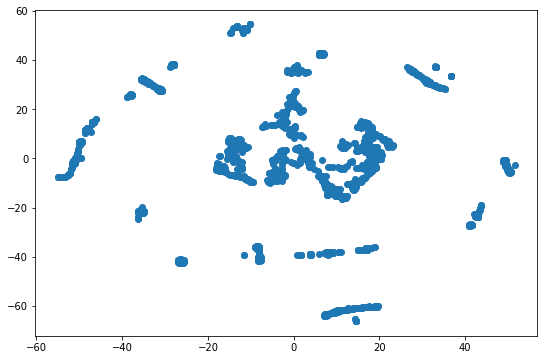

In [ ]:
#TSNE(2) == StandardScaler( TSNE(2) )
x, y = list(zip(*(TSNE(n_components=2, random_state=0).fit_transform(X_train[:1500]))))

plt.figure(figsize=(9, 6))
plt.scatter(x, y)
plt.show()

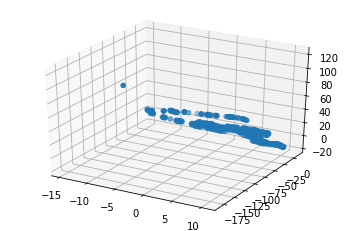

In [ ]:
#TSNE(3)
data = TSNE(n_components=3, random_state=12).fit_transform(X_train[:900])
x, y, z = list(zip(*data))

fig = pylab.figure()
ax = fig.add_subplot(111, projection = '3d')
sc = ax.scatter(x,y,z)

<Figure size 648x432 with 0 Axes>

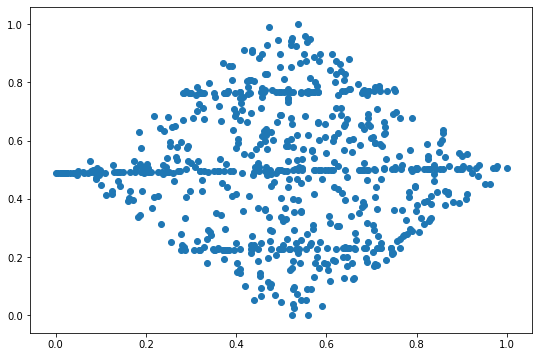

In [ ]:
# PCA(2) # little difference from StandardScaler vs MinMaxScaler
x, y = list(zip(*MinMaxScaler().fit_transform(PCA(2).fit_transform(X_train[:1500]))))

plt.figure(figsize=(9, 6))
plt.scatter(x, y)
plt.show()

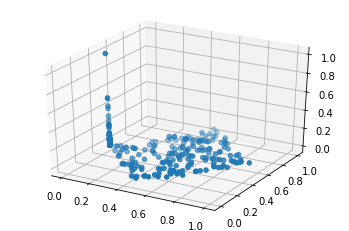

In [ ]:
# PCA(3)
x, y, z = list(zip(*MinMaxScaler().fit_transform(PCA(3).fit_transform(X_train[:400]))))

fig = pylab.figure()
ax = fig.add_subplot(111, projection = '3d')
sc = ax.scatter(x,y,z)